In [58]:
library(ggplot2)
library(ggpubr)
library(reshape2)
library(dplyr)
library(data.table)
library(Seurat)
setwd('/home/wyh/scdata/combined_data/Epithelial')

Warning message:
“package ‘reshape2’ was built under R version 4.0.5”

Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union



Attaching package: ‘data.table’


The following objects are masked from ‘package:dplyr’:

    between, first, last


The following objects are masked from ‘package:reshape2’:

    dcast, melt


Attaching SeuratObject

Attaching sp



In [2]:
library(SeuratDisk)

Registered S3 method overwritten by 'SeuratDisk':
  method            from  
  as.sparse.H5Group Seurat



In [110]:
Convert("/home/wyh/scdata/combined_data/Epithelial/adata_adeno_P.h5ad","h5seurat",assay = "RNA",overwrite = TRUE)

Warning message:
“Unknown file type: h5ad”
Creating h5Seurat file for version 3.1.5.9900

Adding X as data

Adding X as counts

Adding meta.features from var

Adding X_cnv as cell embeddings for cnv

Adding X_cnv_pca as cell embeddings for cnv_pca

Adding X_cnv_umap as cell embeddings for cnv_umap

Adding X_pca as cell embeddings for pca

Adding X_umap as cell embeddings for umap

Adding miscellaneous information for cnv

Adding miscellaneous information for pca

Adding standard deviations for pca

Adding miscellaneous information for umap

Adding XGC_colors to miscellaneous data

Adding cnv_leiden_colors to miscellaneous data

Adding cnv_neighbors to miscellaneous data

Adding cnv_status_colors to miscellaneous data

Adding hvg to miscellaneous data

Adding leiden to miscellaneous data

Adding leiden_colors to miscellaneous data

Adding log1p to miscellaneous data

Adding metastasis.type_colors to miscellaneous data

Adding layer counts as data in assay counts

Adding layer counts as 

In [111]:
seuratObject <- LoadH5Seurat("/home/wyh/scdata/combined_data/Epithelial/adata_adeno_P.h5seurat",assays = "RNA",meta.data = FALSE, misc = FALSE)

Validating h5Seurat file

Initializing RNA with data

Adding counts for RNA

Adding feature-level metadata for RNA



ERROR: Error: Missing required datasets 'levels' and 'values'


In [ ]:
# 直接找到原始的counts数据

In [2]:
data = readRDS("../RDS_file/combine_final0609.RDS")

In [7]:
data

An object of class Seurat 
32137 features across 1204396 samples within 1 assay 
Active assay: RNA (32137 features, 0 variable features)

In [4]:
max(GetAssayData(data,slot = "counts"))

[1] 28429

In [5]:
metadata = read.csv("./adata_adeno_P.obs_df.csv",row.names = 1)

In [6]:
head(metadata)

B.cells.corr Cell.Type   CellCycle.score
GBC_035_P_CTGTACCCATGCGGTC 0.19384991   B.cells      0.02045746    
GBC_043_P_AATGGCTAGAATGTTG 0.11739842   B.cells     -0.04476881    
GBC_043_P_AATTTCCTCGGAATGG 0.10611630   T.cells.CD4 -0.03928553    
GBC_043_P_ACGTCCTCACTGGACC 0.08656662   Unknown     -0.03589544    
GBC_043_P_ATATCCTTCGCGGTAC 0.14594676   T.cells.CD4 -0.02675651    
GBC_043_P_ATGAGTCCACCAAATC 0.09600296   Unknown      0.03622348    
                           Endothelial.corr Epithelial.corr Fibroblast.corr
GBC_035_P_CTGTACCCATGCGGTC 0.16952424       0.18727629      0.14893681     
GBC_043_P_AATGGCTAGAATGTTG 0.10143996       0.10226834      0.08760509     
GBC_043_P_AATTTCCTCGGAATGG 0.09566198       0.09006396      0.07989555     
GBC_043_P_ACGTCCTCACTGGACC 0.07751338       0.08595588      0.06889843     
GBC_043_P_ATATCCTTCGCGGTAC 0.09911810       0.10208816      0.08592414     
GBC_043_P_ATGAGTCCACCAAATC 0.08857079       0.08170163      0.07486292     
                           GS__ADIPOGENESIS GS__ALLOGRAFT_REJECTION
GBC_035_P_CTGTACCCATGCGGTC -0.5531901       -0.58099173            
GBC_043_P_AATGGCTAGAATGTTG -0.1020399       -0.17755052            
GBC_043_P_AATTTCCTCGGAATGG -0.7257339       -0.09571037            
GBC_043_P_ACGTCCTCACTGGACC -1.1264987       -0.04947742            
GBC_043_P_ATATCCTTCGCGGTAC  0.7693161        0.82970019            
GBC_043_P_ATGAGTCCACCAAATC -1.1876239       -0.82149196            
                           GS__ANDROGEN_RESPONSE GS__ANGIOGENESIS ⋯ cnv_score  
GBC_035_P_CTGTACCCATGCGGTC -0.2115330             0.18630780      ⋯ 0.006990672
GBC_043_P_AATGGCTAGAATGTTG -0.6569412            -0.32577096      ⋯ 0.005796016
GBC_043_P_AATTTCCTCGGAATGG  1.2770150             1.71037709      ⋯ 0.005796016
GBC_043_P_ACGTCCTCACTGGACC  0.6364826            -0.74116205      ⋯ 0.005796016
GBC_043_P_ATATCCTTCGCGGTAC -0.4398451            -0.40877604      ⋯ 0.005796016
GBC_043_P_ATGAGTCCACCAAATC -0.1142114             0.04235586      ⋯ 0.005796016
                           cnv_status score_GM1 score_GM5 score_GM8 score_GM16
GBC_035_P_CTGTACCCATGCGGTC tumor      score_GM1 score_GM5 score_GM8 score_GM16
GBC_043_P_AATGGCTAGAATGTTG tumor      score_GM1 score_GM5 score_GM8 score_GM16
GBC_043_P_AATTTCCTCGGAATGG tumor      score_GM1 score_GM5 score_GM8 score_GM16
GBC_043_P_ACGTCCTCACTGGACC tumor      score_GM1 score_GM5 score_GM8 score_GM16
GBC_043_P_ATATCCTTCGCGGTAC tumor      score_GM1 score_GM5 score_GM8 score_GM16
GBC_043_P_ATGAGTCCACCAAATC tumor      score_GM1 score_GM5 score_GM8 score_GM16
                           score_GM3 score_GM7 score_GM6 cell_state
GBC_035_P_CTGTACCCATGCGGTC score_GM3 score_GM7 score_GM6 GM5       
GBC_043_P_AATGGCTAGAATGTTG score_GM3 score_GM7 score_GM6 GM7       
GBC_043_P_AATTTCCTCGGAATGG score_GM3 score_GM7 score_GM6 GM7       
GBC_043_P_ACGTCCTCACTGGACC score_GM3 score_GM7 score_GM6 GM7       
GBC_043_P_ATATCCTTCGCGGTAC score_GM3 score_GM7 score_GM6 GM7       
GBC_043_P_ATGAGTCCACCAAATC score_GM3 score_GM7 score_GM6 GM7

In [8]:
expr_adeno_P = data[,rownames(metadata)]

In [10]:
expr_adeno_P@meta.data = metadata

In [11]:
saveRDS(expr_adeno_P,"./adata_adeno_P.RDS")

In [112]:
library("Seurat")
library("anndata")
data <- read_h5ad("adata_adeno_P.h5ad")

In [ ]:
data <- CreateSeuratObject(counts = t(data$X), meta.data = data$obs)

In [121]:
dim((data$X))

[1] 142544  31906

# 20230215 定位到单个基因上面，比较基因表达的差异

## 原位不同的转移类型比较表达量的差异

In [4]:
setwd('/home/wyh/scdata/combined_data/Epithelial')

In [181]:
patient_info = read.csv("/home/wyh/scdata/patient_info/xzh_220109_final_wyh_220426.csv",row.names = 1)

In [13]:
patient_info$metastasis.type[patient_info$metastasis.type=="P_LI"] = "P"
patient_info$metastasis.type = factor(patient_info$metastasis.type,levels = c("P","P_LN","P_LM"))

In [39]:
CEACAM5 = read.csv("./ANXA1.csv",row.names = 1)

In [149]:
# 这一步主要是过滤用的，暂且可以不保留

# patient_num = as.data.frame.array(table(CEACAM5$patient_ID))
# patient_left = rownames(patient_num)[patient_num[,1]>50]
# CEACAM5 = CEACAM5[CEACAM5$patient_ID %in% patient_left,]

In [24]:
CEACAM5_mean = aggregate(expr ~ patient_ID+cell_state,data = CEACAM5,FUN = mean)
CEACAM5_mean$metastasis_type = patient_info[CEACAM5_mean$patient_ID,"metastasis.type"]
data_plot_melt = CEACAM5_mean

Warning message in wilcox.test.default(c(2.11334496153846, 0, 0.604350973617021, :
“cannot compute exact p-value with ties”
Warning message in wilcox.test.default(c(0.50736858, 2.84863350913988, 0.127069753846154, :
“cannot compute exact p-value with ties”
Warning message in wilcox.test.default(c(0, 2.22498144983359, 0.0285651917145791, :
“cannot compute exact p-value with ties”
Warning message in wilcox.test.default(c(0, 2.22498144983359, 0.0285651917145791, :
“cannot compute exact p-value with ties”
Warning message in wilcox.test.default(c(0.315223061, 0.187639578241206, 0.388691587526444, :
“cannot compute exact p-value with ties”
Warning message in wilcox.test.default(c(0, 1.32570916538462, 0.0379321333898305, :
“cannot compute exact p-value with ties”
Warning message in wilcox.test.default(c(0, 1.32570916538462, 0.0379321333898305, :
“cannot compute exact p-value with ties”
Warning message in wilcox.test.default(c(0.345543296587031, 0.132490167317561, 0.37180304944, :
“cannot comp

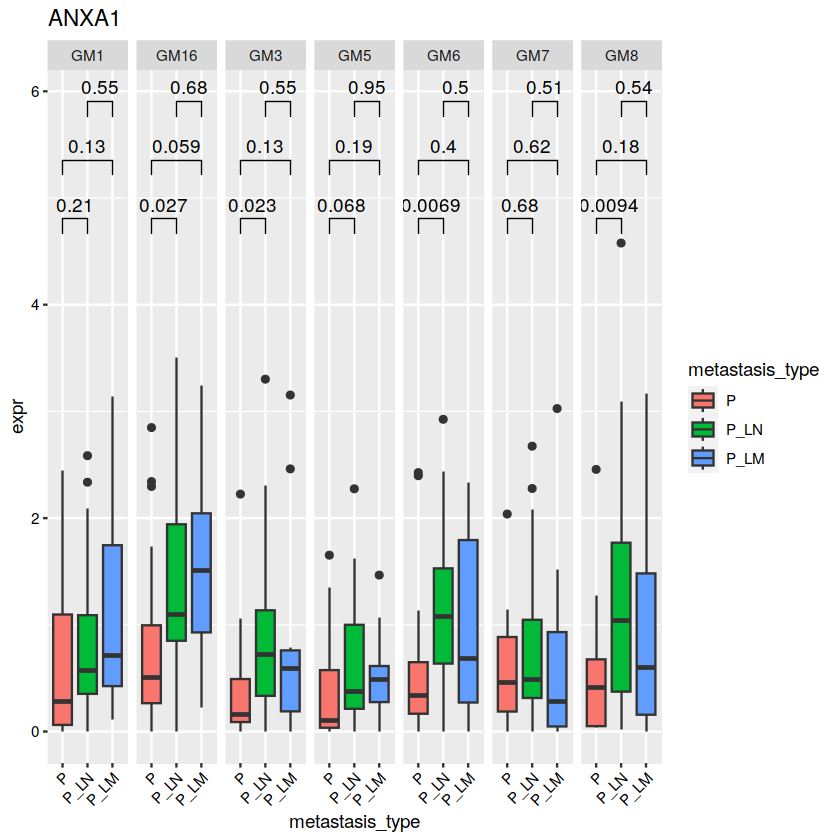

In [167]:
#pdf("/home/wyh/scdata/combined_data//fibroblast/group_compare/fibroblast2.pdf",width = 15,height = 10)
print(ggplot(data_plot_melt, aes( y=expr, x=metastasis_type,fill = metastasis_type)) + geom_boxplot()+facet_grid(.~cell_state)+
    theme(axis.text.x = element_text(angle = 45, hjust = 1, vjust = 1,color="black"),
         axis.text.y = element_text(color="black"),
         axis.title=element_text())+ggtitle("")+
   stat_compare_means(comparisons = list(
   c("P","P_LN"),c("P","P_LM"),c("P_LN","P_LM")
  ),method = "wilcox.test")+ggtitle("ANXA1"))
#dev.off()

In [620]:
CEACAM5_mean = aggregate(expr ~ patient_ID+cell_state,data = CEACAM5,FUN = mean)
# CEACAM5_mean$metastasis_type = patient_info[CEACAM5_mean$patient_ID,"metastasis.type"]

In [593]:
# 看单个的基因分布，而不是以病人作为整体
# CEACAM5_mean = CEACAM5
# CEACAM5_mean$metastasis_type = patient_info[CEACAM5_mean$patient_ID,"metastasis.type"]

In [621]:
data_plot_melt = CEACAM5_mean

In [25]:
data_plot_melt$metastasis_type = as.character(data_plot_melt$metastasis_type)
data_plot_melt$metastasis_type[data_plot_melt$metastasis_type %in% c("P_LN","P_LM")] ="P_Mets"

In [26]:
data_plot_melt = data_plot_melt[data_plot_melt$cell_state=="GM16",]

In [27]:
pdf("/home/wyh/scdata/combined_data/Epithelial/submit/figure/ANXA1.pdf",width = 4,height = 4)
text_size = 20
print(ggplot(data_plot_melt, aes( y=expr, x=metastasis_type,fill = metastasis_type)) + geom_violin()+geom_jitter(width = 0.2)+scale_fill_manual(values = c("#0073C2","#EFC000"), guide=FALSE)+
theme(panel.grid.major = element_blank(),panel.grid.minor = element_blank(),panel.background = element_blank(), 
                                               axis.line = element_line(colour = "black"),
                                               legend.position = "none",
                                               axis.text.x = element_text(color="black", size=text_size),
                                               axis.text.y = element_text(color="black", size=text_size),
                                               axis.title=element_text(size=text_size),
                                               legend.text=element_text(size=text_size),
                                               legend.title=element_text(size=text_size),
                                               plot.title =element_text(hjust = 0.5, size = 20))+
   stat_compare_means(comparisons = list(
   c("P","P_Mets")
  ),method = "wilcox.test",label="p.signif",size = 8,label.y = 3.8)+ggtitle("ANXA1")+ylab("Expression Level"))
dev.off()

png 
  2

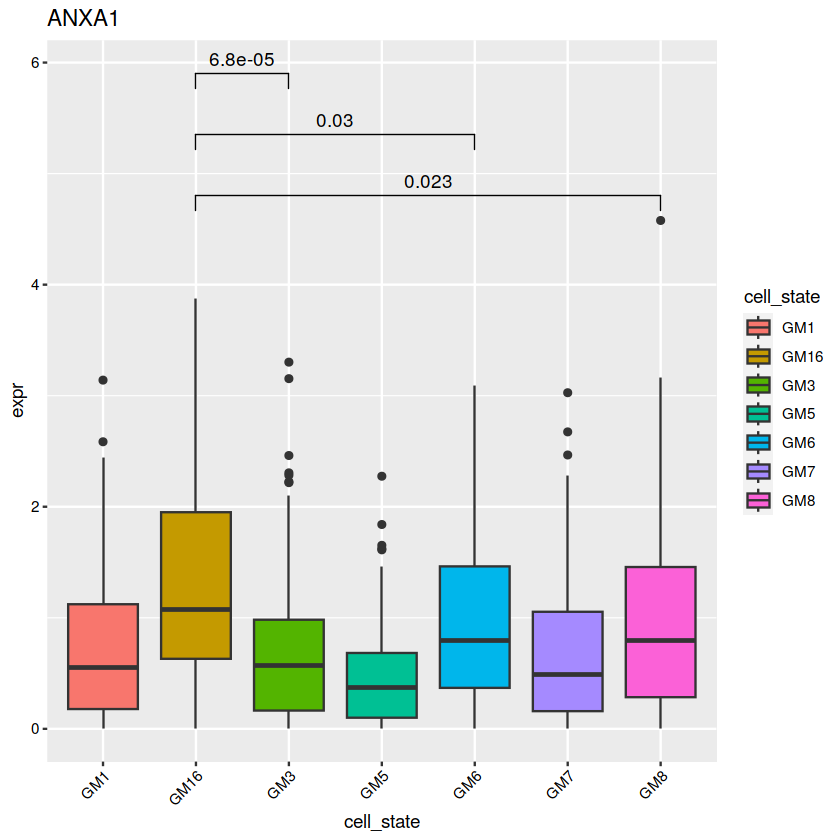

In [105]:
print(ggplot(data_plot_melt, aes( y=expr, x=cell_state,fill = cell_state)) + geom_boxplot()+
    theme(axis.text.x = element_text(angle = 45, hjust = 1, vjust = 1,color="black"),
         axis.text.y = element_text(color="black"),
         axis.title=element_text())+   stat_compare_means(comparisons = list(
   c("GM16","GM8"),c("GM16","GM6"),c("GM16","GM3")
  ),method = "wilcox.test")+ggtitle("")+ggtitle("ANXA1"))

## 肿瘤和非肿瘤

In [6]:
patient_info = read.csv("/home/wyh/scdata/patient_info/xzh_220109_final_wyh_220426.csv",row.names = 1)

In [7]:
patient_info$metastasis.type[patient_info$metastasis.type=="P_LI"] = "P"
patient_info$metastasis.type = factor(patient_info$metastasis.type,levels = c("P","P_LN","P_LM"))

In [16]:
CEACAM5 = read.csv("./ANXA1.Epi_state.csv",row.names = 1)
CEACAM5_mean = aggregate(expr ~ patient_ID+Epi_state,,data = CEACAM5,FUN = mean)
CEACAM5_mean = CEACAM5_mean[CEACAM5_mean$Epi_state %in% c("GM16","Normal"),]

In [20]:
data_plot_melt = CEACAM5_mean

In [21]:
data_plot_melt$Epi_state = factor(data_plot_melt$Epi_state,levels = c("Normal","GM16"))

Warning message:
“Computation failed in `stat_signif()`
Caused by error in `if (scales$x$map(comp[1]) == data$group[1] | manual) ...`:
! missing value where TRUE/FALSE needed”


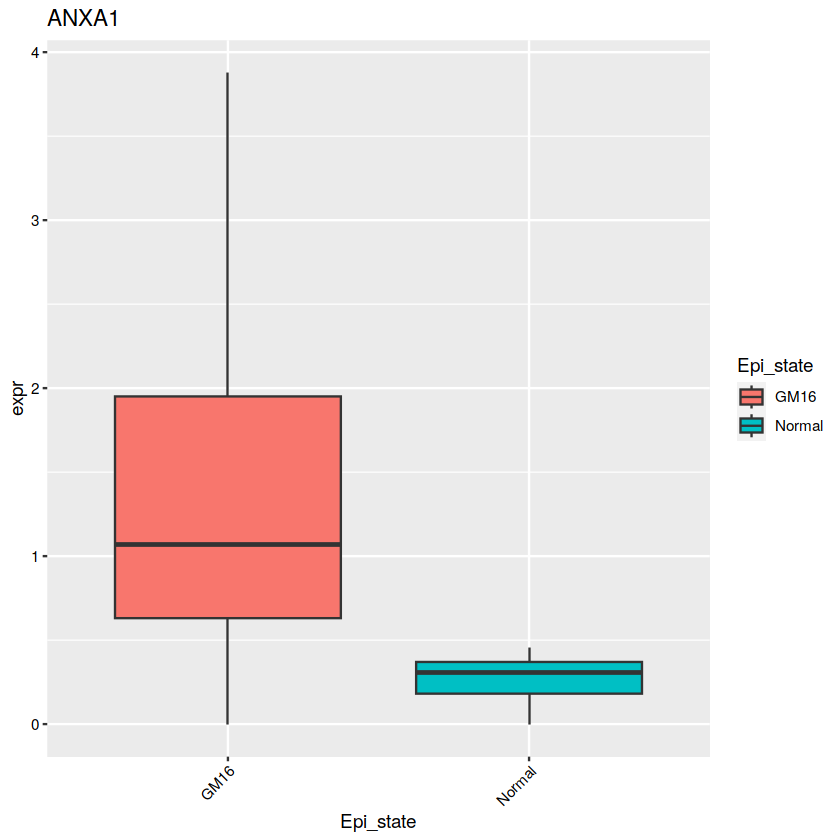

In [642]:
#pdf("/home/wyh/scdata/combined_data//fibroblast/group_compare/fibroblast2.pdf",width = 15,height = 10)
print(ggplot(data_plot_melt, aes( y=expr, x=Epi_state,fill = Epi_state)) + geom_boxplot()+
    theme(axis.text.x = element_text(angle = 45, hjust = 1, vjust = 1,color="black"),
         axis.text.y = element_text(color="black"),
         axis.title=element_text())+ggtitle("")+
   stat_compare_means(comparisons = list(
   c("GM16","Normal"),c("GM1","Normal"),c("GM6","Normal"),c("GM7","Normal"),c("GM3","Normal"),c("GM5","Normal"),c("GM8","Normal")
  ),method = "wilcox.test")+ggtitle("ANXA1"))
#dev.off()

In [22]:
text_size = 20
pdf("/home/wyh/scdata/combined_data/Epithelial/submit/figure/ANXA1_T_Normal.pdf",width = 4,height = 4)
print(ggplot(data_plot_melt, aes( y=expr, x=Epi_state,fill = Epi_state)) + geom_violin()+geom_jitter(width=0.2)+scale_fill_manual(values = c("#0073C2","#EFC000"), guide=FALSE)+
theme(panel.grid.major = element_blank(),panel.grid.minor = element_blank(),panel.background = element_blank(), 
                                               axis.line = element_line(colour = "black"),
                                               legend.position = "none",
                                               axis.text.x = element_text(color="black", size=text_size),
                                               axis.text.y = element_text(color="black", size=text_size),
                                               axis.title=element_text(size=text_size),
                                               legend.text=element_text(size=text_size),
                                               legend.title=element_text(size=text_size),
                                               plot.title =element_text(hjust = 0.5, size = 20))+ggtitle("")+
   stat_compare_means(comparisons = list(
   c("GM16","Normal")),method = "wilcox.test",label="p.signif",size = 8,label.y = 3.8)+ggtitle("ANXA1")+ylab("Expression Level"))
dev.off()

png 
  2

# plot the motif

### 装包不容易

In [77]:
install.packages("/home/wyh/R_package/devtools_2.4.3.tar.gz")

inferring 'repos = NULL' from 'pkgs'



In [15]:
devtools::install_github("aertslab/RcisTarget")


✔  checking for file ‘/tmp/RtmpgV2NvS/remotes22726b45529bba/aertslab-RcisTarget-3eeab75/DESCRIPTION’
─  preparing ‘RcisTarget’:
✔  checking DESCRIPTION meta-information
─  checking for LF line-endings in source and make files and shell scripts
─  checking for empty or unneeded directories
─  looking to see if a ‘data/datalist’ file should be added
     NB: this package now depends on R (>= 3.5.0)
─  building ‘RcisTarget_1.15.3.tar.gz’
   


In [13]:
options(
  HTTPUserAgent =
    sprintf(
      "R/%s R (%s)",
      getRversion(),
      paste(getRversion(), R.version["platform"], R.version["arch"], R.version["os"])
    )
)

install.packages("arrow", repos = "https://packagemanager.rstudio.com/all/__linux__/focal/latest")

Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done



In [73]:
library(devtools)

Loading required package: usethis



## 正式开始尝试

In [44]:
library(RcisTarget)
data(motifAnnotations_hgnc)
motifRankings <- importRankings("/home/wyh/scdata/combined_data/database/hg38__refseq-r80__500bp_up_and_100bp_down_tss.mc9nr.genes_vs_motifs.rankings.feather",indexCol = 'motifs')      #这里假如数据下载不全读取R会奔溃并restart，不是电脑的配置问题

In [41]:
genelists = c("TRIM29","KLK10","LAMC2","ST14","SEMA3B","KLK11","SCNN1A","FLNB","PLAAT3","MYOF")

In [52]:
genelists = read.csv("/home/wyh/scdata/combined_data/Epithelial/NMF/top_genes_23.csv",row.names = 1)
genelists = genelists[1:100,"X1"]

In [45]:
motifEnrichmentTable_wGenes <- cisTarget(genelists, 
                                         motifRankings,
                                         motifAnnot=motifAnnotations_hgnc)#一步搞定分析


Genes in the gene sets NOT available in the dataset: 
	geneSet: 	1 (10% of 10)



[1] 27015


In [82]:
length(motifEnrichmentTable_wGenes$TF_highConf)

[1] 327

In [84]:
unique(motifEnrichmentTable_wGenes$TF_highConf)

[1] "KLF1 (inferredBy_Orthology). "                                                                                             
  [2] ""                                                                                                                          
  [3] "KLF5 (inferredBy_Orthology). "                                                                                             
  [4] "KLF4 (inferredBy_Orthology). "                                                                                             
  [5] "KLF5 (directAnnotation). "                                                                                                 
  [6] "KLF6 (directAnnotation). "                                                                                                 
  [7] "KLF17 (directAnnotation). "                                                                                                
  [8] "ZNF148 (directAnnotation). "                                                                                               
  [9] "KLF8 (directAnnotation). "                                                                                                 
 [10] "VDR (directAnnotation). "                                                                                                  
 [11] "KLF4 (directAnnotation). "                                                                                                 
 [12] "KLF12 (inferredBy_Orthology). "                                                                                            
 [13] "ZEB1 (directAnnotation). "                                                                                                 
 [14] "ZXDB (directAnnotation). "                                                                                                 
 [15] "KLF6; KLF7 (inferredBy_Orthology). "                                                                                       
 [16] "KLF12; KLF3; KLF8 (inferredBy_Orthology). "                                                                                
 [17] "ZXDA (directAnnotation). "                                                                                                 
 [18] "SREBF2 (directAnnotation). "                                                                                               
 [19] "KLF1 (directAnnotation). "                                                                                                 
 [20] "ZNF442 (directAnnotation). "                                                                                               
 [21] "EBF1; MZF1 (directAnnotation). "                                                                                           
 [22] "FOS; FOSB; FOSL1; JUN; JUNB; JUND; KLF4 (directAnnotation). "                                                              
 [23] "MESP1 (directAnnotation). "                                                                                                
 [24] "TCF4 (directAnnotation). "                                                                                                 
 [25] "SNAI1 (directAnnotation). "                                                                                                
 [26] "ZIC1 (directAnnotation). "                                                                                                 
 [27] "KLF8 (inferredBy_Orthology). "                                                                                             
 [28] "ZIC3 (directAnnotation). "                                                                                                 
 [29] "KLF10; KLF11 (inferredBy_Orthology). "                                                                                     
 [30] "RUNX3 (directAnnotation). "                                                                                                
 [31] "ZNF674 (directAnnotation). "                                     

In [58]:
write.csv(motifEnrichmentTable_wGenes,"/home/wyh/scdata/combined_data/Epithelial/gene_module/adeno/motifEnrichmentTable_wGenes.csv")

In [27]:
setdiff(genelists,colnames(motifRankings))

[1] "PLAAT3"

In [91]:
head(colnames(motifRankings))

[1] "A1BG"     "A1BG-AS1" "A1CF"     "A2M"      "A2M-AS1"  "A2ML1"

In [94]:
which(colnames(motifRankings)=="ESRR1") 

integer(0)

In [55]:
motifEnrichmentTable_wGenes_wLogo <- addLogo(motifEnrichmentTable_wGenes)

resultsSubset <- motifEnrichmentTable_wGenes_wLogo[1:10,]    #

library(DT)
datatable(resultsSubset[,-c("enrichedGenes", "TF_lowConf"), with=FALSE], 
          escape = FALSE, # To show the logo
          filter="top", options=list(pageLength=5))

HTML widgets cannot be represented in plain text (need html)

[1] 27015


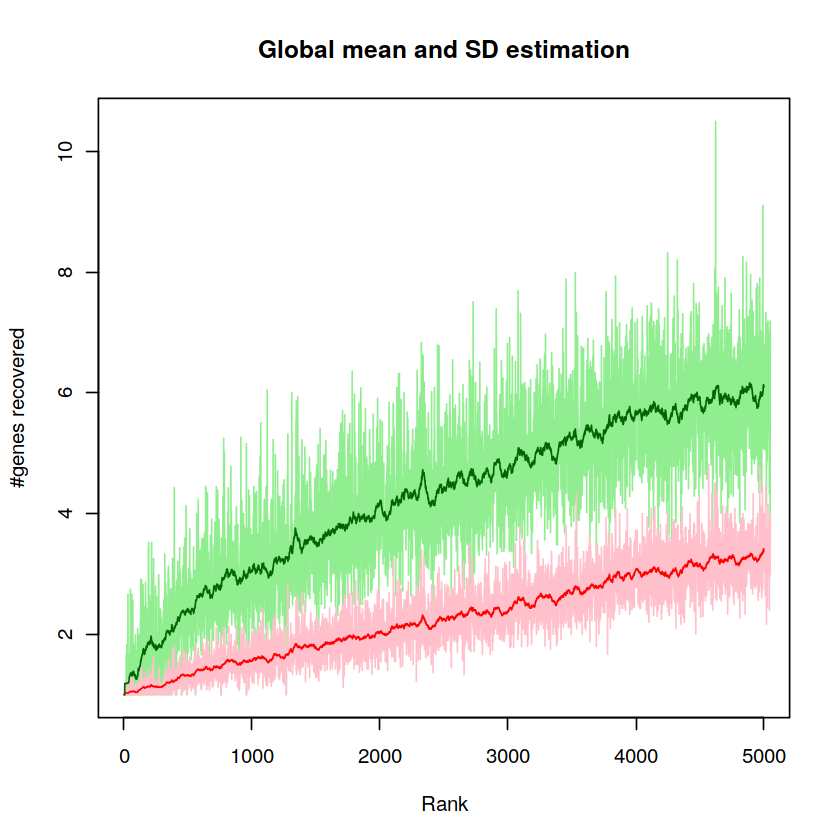

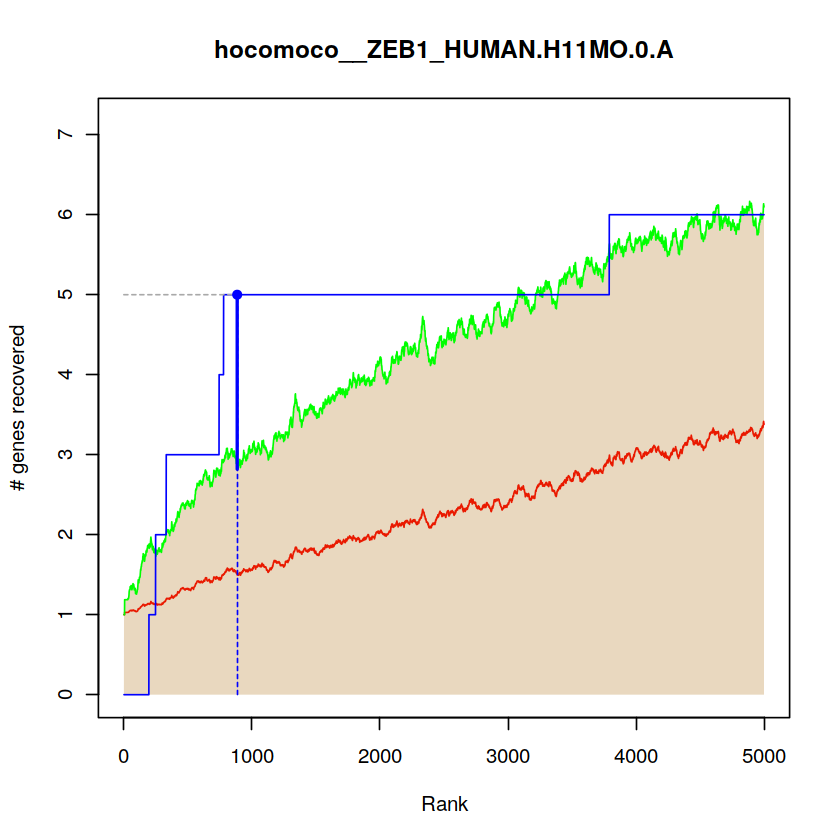

In [88]:
getSignificantGenes(genelists, 
                    motifRankings,
                    signifRankingNames='hocomoco__ZEB1_HUMAN.H11MO.0.A',
                    plotCurve=TRUE, maxRank=5000, genesFormat="none",
                    method="aprox")

# plot the malignant ratio 

In [112]:
cell_status = read.csv("/home/wyh/scdata/combined_data/Epithelial/malignant_status.csv",row.names = 1)
cell_status$barcodes = rownames(cell_status)
cell_status$histological.type.short = patient_info[cell_status$orig.ident,"histological.type.short"]
saveRDS(cell_status,"/home/wyh/scdata/combined_data/meta_data/celltype/cell_status.RDS")

In [2]:
cell_status = read.csv("/home/wyh/scdata/combined_data/Epithelial/malignant_status.csv",row.names = 1)
head(cell_status)

cnv_status orig.ident
GBC_035_P_CTGTACCCATGCGGTC tumor      GBC_035_P 
GBC_043_P_AATGGCTAGAATGTTG tumor      GBC_043_P 
GBC_043_P_AATTTCCTCGGAATGG tumor      GBC_043_P 
GBC_043_P_ACGTCCTCACTGGACC tumor      GBC_043_P 
GBC_043_P_ATATCCTTCGCGGTAC tumor      GBC_043_P 
GBC_043_P_ATGAGTCCACCAAATC tumor      GBC_043_P

In [103]:
cell_status = read.csv("/home/wyh/scdata/combined_data/Epithelial/malignant_status.csv",row.names = 1)
cell_status =  t(as.data.frame.array(table(cell_status)))

cell_status_plot = reshape2::melt(cell_status)
colnames(cell_status_plot) = c("orig.ident","status","number")
cell_status_plot$status = factor(cell_status_plot$status ,levels = c("tumor","normal"))

In [164]:
library(reshape2)
sample_name = unique(rownames(cell_status))
mm = split(sample_name, ceiling(seq_along(1:length(sample_name))/20))

$`1`
 [1] "CC_004"     "CC_006"     "CC_007"     "GB_001_HG"  "GB_001_LG" 
 [6] "GB_002_LG"  "GBC_001_LI" "GBC_002_P"  "GBC_003_P"  "GBC_004_P" 
[11] "GBC_005_P"  "GBC_006_P"  "GBC_007_P"  "GBC_008_P"  "GBC_008_PO"
[16] "GBC_009_P"  "GBC_010_P"  "GBC_011_P"  "GBC_012_LI" "GBC_012_P" 

$`2`
 [1] "GBC_013_P"  "GBC_014_P"  "GBC_015_P"  "GBC_016_P"  "GBC_017_LI"
 [6] "GBC_017_P"  "GBC_018_P"  "GBC_019_P"  "GBC_020_P"  "GBC_021_P" 
[11] "GBC_022_P"  "GBC_023_P"  "GBC_024_LM" "GBC_024_P"  "GBC_025_LI"
[16] "GBC_025_P"  "GBC_026_P"  "GBC_027_P"  "GBC_028_OM" "GBC_028_P" 

$`3`
 [1] "GBC_029_P"  "GBC_030_P"  "GBC_031_P"  "GBC_032_P"  "GBC_033_P" 
 [6] "GBC_034_P"  "GBC_035_P"  "GBC_036_LI" "GBC_036_P"  "GBC_037_LN"
[11] "GBC_037_P"  "GBC_038_P"  "GBC_039_P"  "GBC_040_LN" "GBC_040_P" 
[16] "GBC_041_P"  "GBC_042_LI" "GBC_042_LM" "GBC_042_P"  "GBC_043_P" 

$`4`
 [1] "GBC_044_P"  "GBC_045_P"  "GBC_046_LN" "GBC_046_P"  "GBC_047_P" 
 [6] "GBC_047_PO" "GBC_048_P"  "GBC_049_P"  "GBC_050_P"  "GBC_051_P" 
[11] "GBC_052_P"  "GBC_053_P"  "GBC_054_LI" "GBC_054_P"  "GBC_055_P" 
[16] "GBC_056_LN" "GBC_056_P"  "GBC_057_P"  "GBC_058_LI" "GBC_058_LN"

$`5`
 [1] "GBC_058_P"  "GBC_059_P"  "GBC_060_P"  "GBC_061_P"  "GBC_062_LN"
 [6] "GBC_062_P"  "GBC_063_LN" "GBC_063_P"  "GBC_064_LM" "GBC_064_P" 
[11] "GBC_065_P"  "GBC_066_P"  "GBC_067_OM" "GBC_067_P"  "GBC_068_P" 
[16] "GBC_069_LI" "GBC_069_LM" "GBC_069_LN" "GBC_069_P"  "GBC_070_P" 

$`6`
 [1] "GBC_071_LI" "GBC_071_LN" "GBC_071_P"  "GBC_072_P"  "GBC_073_P" 
 [6] "GBC_074_LI" "GBC_074_LN" "GBC_074_P"  "GBC_075_P"  "GBC_076_P" 
[11] "GBC_077_LM" "GBC_077_P"  "GBC_078_LN" "GBC_078_P"  "GBC_079_LN"
[16] "GBC_079_P"  "GBC_080_P"  "GBC_081_P"  "GBC_082_P"  "GBC_083_P" 

$`7`
 [1] "GBC_084_LM" "GBC_084_P"  "GBC_085_P"  "GBC_086_P"  "GBC_087_P" 
 [6] "XGC_004"    "XGC_005"    "XGC_007"    "XGC_008"    "XGC_009"   
[11] "XGC_010"    "XGC_011"    "XGC_012"

In [176]:
data_plot_all = cell_status_plot # 这个确实是没有分病人的
pdf("/home/wyh/scdata/combined_data/Epithelial/figures/malignant_ratio.pdf")
for(i in 1:length(mm)){
    data_plot = data_plot_all[data_plot_all$orig.ident %in% mm[[i]],]
    print(ggplot(data_plot, aes(fill=status, y=number, x=orig.ident)) + 
  geom_bar(position="stack", stat="identity")+theme(axis.text.x = element_text(angle = 45, hjust = 1, vjust = 1,color="black", size=15)))
}
dev.off()


png 
  2

# 配对样本

In [336]:
patient_info = read.csv("/home/wyh/scdata/patient_info/xzh_220109_final_wyh_220426.csv",row.names = 1)

In [32]:
CL_sample = read.csv("/home/wyh/scdata/patient_info/chenlei_sample.csv",row.names = 1)

In [36]:
patient_info = patient_info[patient_info$NewSample.ID %in% CL_sample[,1],]

In [37]:
pair_patient_index = (patient_info$patient.index[duplicated(patient_info$patient.index)]) #一共33个配对样本

pair_patient_info = patient_info[patient_info$patient.index %in% pair_patient_index,]


In [16]:
# 找到里面配对样本是转移癌症的
pair_patient_info = pair_patient_info[pair_patient_info$Tumors.for.scRNA.seq.unify %in% c('Liver invasion','Primary','Liver metastatic lesion','Omentum','Lymphonodus metastatic lesion'),]

pair_patient_primary_index = pair_patient_info$patient.index[pair_patient_info$Tumors.for.scRNA.seq.unify=="Primary"]

pair_patient_info = pair_patient_info[pair_patient_info$patient.index %in% (pair_patient_info$patient.index[duplicated(pair_patient_info$patient.index)]),]

In [38]:
pair_patient_info$Sample.ID

[1] "GBC8"          "GBC8N"         "GBC16PRI"      "GBC16INV"     
 [5] "GBC21PRI"      "GBC21INV"      "GBC29PRI"      "GBC29MAT"     
 [9] "GBC31PRI"      "GBC31INV"      "GBC34PRI"      "GBC34MAT"     
[13] "GBC46PRI"      "GBC46MAT"      "GBC47PRI"      "GBC47MAT"     
[17] "GBC51PRI"      "GBC51MAT"      "GBC53PRI"      "GBC53INV"     
[21] "GBC53MAT"      "GBC58PRI"      "GBC58MAT"      "GBC60"        
[25] "GBC60N"        "GBC67PRI"      "GBC67MAT"      "GBC69PRI"     
[29] "GBC69MAT"      "GBC71PRI"      "GBC71INV"      "GBC71MAT"     
[33] "GBC77PRI"      "GBC77MAT"      "GBC78PRI"      "GBC78MAT"     
[37] "GBC79PRI"      "GBC79MAT"      "GBC83PRI"      "GBC83MAT"     
[41] "GBC86PRI"      "GBC86INV"      "GBC86MATliver" "GBC86MATLyn"  
[45] "GBC89PRI"      "GBC89INV"      "GBC89MAT"      "GBC93PRI"     
[49] "GBC93INV"      "GBC93MAT"      "GBC96PRI"      "GBC96MAT"     
[53] "GBC97PRI"      "GBC97MAT"      "GBC98PRI"      "GBC98MAT"     
[57] "GBC103PRI"     "GBC103MAT"

In [46]:
pair_patient_info

Sample.ID     NewSample.ID Tumors.for.scRNA.seq          Sex Age
GBC_008_P  GBC8          GBC_008_P    Primary.carcinoma             F   67 
GBC_008_PO GBC8N         GBC_008_PO   Primary.polyp                 F   67 
GBC_012_P  GBC16PRI      GBC_012_P    Primary                       F   56 
GBC_012_LI GBC16INV      GBC_012_LI   Liver invasion                F   56 
GBC_017_P  GBC21PRI      GBC_017_P    Primary                       F   65 
GBC_017_LI GBC21INV      GBC_017_LI   liver invasion                F   65 
GBC_024_P  GBC29PRI      GBC_024_P    Primary                       F   65 
GBC_024_LM GBC29MAT      GBC_024_LM   liver metastatic lesion       F   65 
GBC_025_P  GBC31PRI      GBC_025_P    Primary                       M   50 
GBC_025_LI GBC31INV      GBC_025_LI   liver invasion                M   50 
GBC_028_P  GBC34PRI      GBC_028_P    Primary                       M   71 
GBC_028_OM GBC34MAT      GBC_028_OM   Omentum                       M   71 
GBC_036_P  GBC46PRI      GBC_036_P    Primary                       F   67 
GBC_036_LI GBC46MAT      GBC_036_LI   liver invasion lesion         F   67 
GBC_037_P  GBC47PRI      GBC_037_P    Primary                       F   50 
GBC_037_LN GBC47MAT      GBC_037_LN   lymphonodus metastatic lesion F   50 
GBC_040_P  GBC51PRI      GBC_040_P    Primary                       F   62 
GBC_040_LN GBC51MAT      GBC_040_LN   lymphonodus metastatic lesion F   62 
GBC_042_P  GBC53PRI      GBC_042_P    Primary                       F   68 
GBC_042_LI GBC53INV      GBC_042_LI   liver invasion                F   68 
GBC_042_LM GBC53MAT      GBC_042_LM   liver metastatic lesion       F   68 
GBC_046_P  GBC58PRI      GBC_046_P    Primary                       F   49 
GBC_046_LN GBC58MAT      GBC_046_LN   lymphonodus metastatic lesion F   49 
GBC_047_P  GBC60         GBC_047_P    Primary.carcinoma             M   75 
GBC_047_PO GBC60N        GBC_047_PO   Primary.polyp                 M   75 
GBC_054_P  GBC67PRI      GBC_054_P    Primary                       M   65 
GBC_054_LI GBC67MAT      GBC_054_LI   liver invasion lesion         M   65 
GBC_056_P  GBC69PRI      GBC_056_P    Primary                       F   69 
GBC_056_LN GBC69MAT      GBC_056_LN   lymphonodus metastatic lesion F   69 
GBC_058_P  GBC71PRI      GBC_058_P    Primary                       F   70 
GBC_058_LI GBC71INV      GBC_058_LI   liver invasion                F   70 
GBC_058_LN GBC71MAT      GBC_058_LN   lymphonodus metastatic lesion F   70 
GBC_062_P  GBC77PRI      GBC_062_P    Primary                       F   74 
GBC_062_LN GBC77MAT      GBC_062_LN   lymphonodus metastatic lesion F   74 
GBC_063_P  GBC78PRI      GBC_063_P    Primary                       F   68 
GBC_063_LN GBC78MAT      GBC_063_LN   lymphonodus metastatic lesion F   68 
GBC_064_P  GBC79PRI      GBC_064_P    Primary                       F   63 
GBC_064_LM GBC79MAT      GBC_064_LM   liver metastatic lesion       F   63 
GBC_067_P  GBC83PRI      GBC_067_P    Primary                       F   64 
GBC_067_OM GBC83MAT      GBC_067_OM   Omentum                       F   64 
GBC_069_P  GBC86PRI      GBC_069_P    Primary                       F   67 
GBC_069_LI GBC86INV      GBC_069_LI   liver invasion                F   67 
GBC_069_LM GBC86MATliver GBC_069_LM   liver metastatic lesion       F   67 
GBC_069_LN GBC86MATLyn   GBC_069_LN   lymphonodus metastatic lesion F   67 
GBC_071_P  GBC89PRI      GBC_071_P    Primary                       F   59 
GBC_071_LI GBC89INV      GBC_071_LI   liver invasion                F   59 
GBC_071_LN GBC89MAT      GBC_071_LN   lymphonodus metastatic lesion F   59 
GBC_074_P  GBC93PRI      GBC_074_P    Primary                       M   62 
GBC_074_LI GBC93INV      GBC_074_LI   liver invasion                M   62 
GBC_074_LN GBC93MAT      GBC_074_LN   lymphonodus metastatic lesion M   62 
GBC_077_P  GBC96PRI      GBC_077_P    Primary                       F   52 
GBC_077_LM GBC96MAT      GBC_077_LM   liver metastatic lesi

In [40]:
table(pair_patient_info$patient.index)


237898 238795 239204 239494 240686 240727 242796 242915 243532 243593 244315 
     2      2      2      2      2      2      2      2      2      2      2 
244437 244795 366256 367548 369048 369719 369792 372359 372461 372619 373463 
     2      2      2      2      2      2      2      2      2      4      2 
540296 550169 554603 555261 
     3      3      3      3 

In [55]:
# 挑选出LI对应的病人
LI_patient = pair_patient_info[pair_patient_info$Tumors.for.scRNA.seq.unify=="Liver invasion",]$patient.index
LI_patient_info = pair_patient_info[pair_patient_info$patient.index %in% LI_patient,]
LI_patient_info

Sample.ID     NewSample.ID Tumors.for.scRNA.seq          Sex Age
GBC_012_P  GBC16PRI      GBC_012_P    Primary                       F   56 
GBC_012_LI GBC16INV      GBC_012_LI   Liver invasion                F   56 
GBC_017_P  GBC21PRI      GBC_017_P    Primary                       F   65 
GBC_017_LI GBC21INV      GBC_017_LI   liver invasion                F   65 
GBC_025_P  GBC31PRI      GBC_025_P    Primary                       M   50 
GBC_025_LI GBC31INV      GBC_025_LI   liver invasion                M   50 
GBC_036_P  GBC46PRI      GBC_036_P    Primary                       F   67 
GBC_036_LI GBC46MAT      GBC_036_LI   liver invasion lesion         F   67 
GBC_042_P  GBC53PRI      GBC_042_P    Primary                       F   68 
GBC_042_LI GBC53INV      GBC_042_LI   liver invasion                F   68 
GBC_042_LM GBC53MAT      GBC_042_LM   liver metastatic lesion       F   68 
GBC_054_P  GBC67PRI      GBC_054_P    Primary                       M   65 
GBC_054_LI GBC67MAT      GBC_054_LI   liver invasion lesion         M   65 
GBC_058_P  GBC71PRI      GBC_058_P    Primary                       F   70 
GBC_058_LI GBC71INV      GBC_058_LI   liver invasion                F   70 
GBC_058_LN GBC71MAT      GBC_058_LN   lymphonodus metastatic lesion F   70 
GBC_069_P  GBC86PRI      GBC_069_P    Primary                       F   67 
GBC_069_LI GBC86INV      GBC_069_LI   liver invasion                F   67 
GBC_069_LM GBC86MATliver GBC_069_LM   liver metastatic lesion       F   67 
GBC_069_LN GBC86MATLyn   GBC_069_LN   lymphonodus metastatic lesion F   67 
GBC_071_P  GBC89PRI      GBC_071_P    Primary                       F   59 
GBC_071_LI GBC89INV      GBC_071_LI   liver invasion                F   59 
GBC_071_LN GBC89MAT      GBC_071_LN   lymphonodus metastatic lesion F   59 
GBC_074_P  GBC93PRI      GBC_074_P    Primary                       M   62 
GBC_074_LI GBC93INV      GBC_074_LI   liver invasion                M   62 
GBC_074_LN GBC93MAT      GBC_074_LN   lymphonodus metastatic lesion M   62 
           TNM    Clinical.stage histological.type       Differentiation
GBC_012_P  T4N1M1 IVB            adenocarcinoma          Moderate       
GBC_012_LI T4N1M1 IVB            adenocarcinoma          Moderate       
GBC_017_P  T3N1M0 IIIB           adenocarcinoma          Moderate & poor
GBC_017_LI T3N1M0 IIIB           adenocarcinoma          Moderate & poor
GBC_025_P  T4N2M0 IVB            adenocarcinoma          Moderate & poor
GBC_025_LI T4N2M0 IVB            adenocarcinoma          Moderate & poor
GBC_036_P  T3N1M0 IIIB           adenocarcinoma          Moderate & poor
GBC_036_LI T3N1M0 IIIB           adenocarcinoma          Moderate & poor
GBC_042_P  T3NxM1 IVB            adenosquamous carcinoma NA             
GBC_042_LI T3NxM1 IVB            adenosquamous carcinoma NA             
GBC_042_LM T3NxM1 IVB            adenosquamous carcinoma NA             
GBC_054_P  T4N1M0 IVA            adenocarcinoma          Moderate & poor
GBC_054_LI T4N1M0 IVA            adenocarcinoma          Moderate & poor
GBC_058_P  T3N1M0 IIIB           adenocarcinoma          Moderate & poor
GBC_058_LI T3N1M0 IIIB           adenocarcinoma          Moderate & poor
GBC_058_LN T3N1M0 IIIB           adenocarcinoma          Moderate & poor
GBC_069_P  T4NxM1 IVB            adenocarcinoma          Moderate & poor
GBC_069_LI T4NxM1 IVB            adenocarcinoma          Moderate & poor
GBC_069_LM T4NxM1 IVB            adenocarcinoma          Moderate & poor
GBC_069_LN T4NxM1 IVB            adenocarcinoma          Moderate & poor
GBC_071_P  T4N1M0 IVA            adenocarcinoma          Moderate & poor
GBC_071_LI T4N1M0 IVA            adenocarcinoma          Moderate & poor
GBC_071_LN T4N1M0 IVA            adenocarcinoma          Moderate & poor
GBC_074_P  T3N1M1 IVB            adenocarcinoma          Poor           
GBC_074_LI T3N1M1 IVB            adenocarcinoma          Poor           
GBC_074_LN T3N1M1 IVB            adenocarcinoma          Poor

In [57]:
LI_patient = pair_patient_info[pair_patient_info$Tumors.for.scRNA.seq.unify=="Lymphonodus metastatic lesion",]$patient.index
LI_patient_info = pair_patient_info[pair_patient_info$patient.index %in% LI_patient,]
LI_patient_info

Sample.ID     NewSample.ID Tumors.for.scRNA.seq          Sex Age
GBC_037_P  GBC47PRI      GBC_037_P    Primary                       F   50 
GBC_037_LN GBC47MAT      GBC_037_LN   lymphonodus metastatic lesion F   50 
GBC_040_P  GBC51PRI      GBC_040_P    Primary                       F   62 
GBC_040_LN GBC51MAT      GBC_040_LN   lymphonodus metastatic lesion F   62 
GBC_046_P  GBC58PRI      GBC_046_P    Primary                       F   49 
GBC_046_LN GBC58MAT      GBC_046_LN   lymphonodus metastatic lesion F   49 
GBC_056_P  GBC69PRI      GBC_056_P    Primary                       F   69 
GBC_056_LN GBC69MAT      GBC_056_LN   lymphonodus metastatic lesion F   69 
GBC_058_P  GBC71PRI      GBC_058_P    Primary                       F   70 
GBC_058_LI GBC71INV      GBC_058_LI   liver invasion                F   70 
GBC_058_LN GBC71MAT      GBC_058_LN   lymphonodus metastatic lesion F   70 
GBC_062_P  GBC77PRI      GBC_062_P    Primary                       F   74 
GBC_062_LN GBC77MAT      GBC_062_LN   lymphonodus metastatic lesion F   74 
GBC_063_P  GBC78PRI      GBC_063_P    Primary                       F   68 
GBC_063_LN GBC78MAT      GBC_063_LN   lymphonodus metastatic lesion F   68 
GBC_069_P  GBC86PRI      GBC_069_P    Primary                       F   67 
GBC_069_LI GBC86INV      GBC_069_LI   liver invasion                F   67 
GBC_069_LM GBC86MATliver GBC_069_LM   liver metastatic lesion       F   67 
GBC_069_LN GBC86MATLyn   GBC_069_LN   lymphonodus metastatic lesion F   67 
GBC_071_P  GBC89PRI      GBC_071_P    Primary                       F   59 
GBC_071_LI GBC89INV      GBC_071_LI   liver invasion                F   59 
GBC_071_LN GBC89MAT      GBC_071_LN   lymphonodus metastatic lesion F   59 
GBC_074_P  GBC93PRI      GBC_074_P    Primary                       M   62 
GBC_074_LI GBC93INV      GBC_074_LI   liver invasion                M   62 
GBC_074_LN GBC93MAT      GBC_074_LN   lymphonodus metastatic lesion M   62 
GBC_078_P  GBC97PRI      GBC_078_P    Primary                       F   43 
GBC_078_LN GBC97MAT      GBC_078_LN   lymphonodus metastatic lesion F   43 
GBC_079_P  GBC98PRI      GBC_079_P    Primary                       M   67 
GBC_079_LN GBC98MAT      GBC_079_LN   lymphonodus metastatic lesion M   67 
           TNM     Clinical.stage histological.type        Differentiation
GBC_037_P  T4N1M0  IVA            adenocarcinoma           Moderate       
GBC_037_LN T4N1M0  IVA            adenocarcinoma           Moderate       
GBC_040_P  T3N2M1  IVB            adenocarcinoma           Moderate & poor
GBC_040_LN T3N2M1  IVB            adenocarcinoma           Moderate & poor
GBC_046_P  T4N2M1  IVB            adenocarcinoma           Moderate & poor
GBC_046_LN T4N2M1  IVB            adenocarcinoma           Moderate & poor
GBC_056_P  T3N2M1  IVB            neuroendocrine carcinoma NA             
GBC_056_LN T3N2M1  IVB            neuroendocrine carcinoma NA             
GBC_058_P  T3N1M0  IIIB           adenocarcinoma           Moderate & poor
GBC_058_LI T3N1M0  IIIB           adenocarcinoma           Moderate & poor
GBC_058_LN T3N1M0  IIIB           adenocarcinoma           Moderate & poor
GBC_062_P  T3N2M0  IVB            adenocarcinoma           Moderate & poor
GBC_062_LN T3N2M0  IVB            adenocarcinoma           Moderate & poor
GBC_063_P  T4N1M0  IVA            adenocarcinoma           Poor           
GBC_063_LN T4N1M0  IVA            adenocarcinoma           Poor           
GBC_069_P  T4NxM1  IVB            adenocarcinoma           Moderate & poor
GBC_069_LI T4NxM1  IVB            adenocarcinoma           Moderate & poor
GBC_069_LM T4NxM1  IVB            adenocarcinoma           Moderate & poor
GBC_069_LN T4NxM1  IVB            adenocarcinoma           Moderate & poor
GBC_071_P  T4N1M0  IVA            adenocarcinoma           Moderate & poor
GBC_071_LI T4N1M0  IVA            adenocarcinoma           Moderate & poor
GBC_071_LN T4N1M0  IVA            adenocarcinoma           Moderate & poor
GBC_07

In [58]:
LI_patient = pair_patient_info[pair_patient_info$Tumors.for.scRNA.seq.unify=="Liver metastatic lesion",]$patient.index
LI_patient_info = pair_patient_info[pair_patient_info$patient.index %in% LI_patient,]
LI_patient_info

Sample.ID     NewSample.ID Tumors.for.scRNA.seq          Sex Age
GBC_024_P  GBC29PRI      GBC_024_P    Primary                       F   65 
GBC_024_LM GBC29MAT      GBC_024_LM   liver metastatic lesion       F   65 
GBC_042_P  GBC53PRI      GBC_042_P    Primary                       F   68 
GBC_042_LI GBC53INV      GBC_042_LI   liver invasion                F   68 
GBC_042_LM GBC53MAT      GBC_042_LM   liver metastatic lesion       F   68 
GBC_064_P  GBC79PRI      GBC_064_P    Primary                       F   63 
GBC_064_LM GBC79MAT      GBC_064_LM   liver metastatic lesion       F   63 
GBC_069_P  GBC86PRI      GBC_069_P    Primary                       F   67 
GBC_069_LI GBC86INV      GBC_069_LI   liver invasion                F   67 
GBC_069_LM GBC86MATliver GBC_069_LM   liver metastatic lesion       F   67 
GBC_069_LN GBC86MATLyn   GBC_069_LN   lymphonodus metastatic lesion F   67 
GBC_077_P  GBC96PRI      GBC_077_P    Primary                       F   52 
GBC_077_LM GBC96MAT      GBC_077_LM   liver metastatic lesion       F   52 
GBC_084_P  GBC103PRI     GBC_084_P    Primary                       F   48 
GBC_084_LM GBC103MAT     GBC_084_LM   Liver metastatic lesion       F   48 
           TNM    Clinical.stage histological.type       Differentiation
GBC_024_P  T3N0M1 IVB            adenocarcinoma          Poor           
GBC_024_LM T3N0M1 IVB            adenocarcinoma          Poor           
GBC_042_P  T3NxM1 IVB            adenosquamous carcinoma NA             
GBC_042_LI T3NxM1 IVB            adenosquamous carcinoma NA             
GBC_042_LM T3NxM1 IVB            adenosquamous carcinoma NA             
GBC_064_P  T3N0M1 IVB            adenocarcinoma          Poor           
GBC_064_LM T3N0M1 IVB            adenocarcinoma          Poor           
GBC_069_P  T4NxM1 IVB            adenocarcinoma          Moderate & poor
GBC_069_LI T4NxM1 IVB            adenocarcinoma          Moderate & poor
GBC_069_LM T4NxM1 IVB            adenocarcinoma          Moderate & poor
GBC_069_LN T4NxM1 IVB            adenocarcinoma          Moderate & poor
GBC_077_P  T3N2M1 IVB            adenocarcinoma          Poor           
GBC_077_LM T3N2M1 IVB            adenocarcinoma          Poor           
GBC_084_P  T3N0M1 IVB            adenocarcinoma          Moderate       
GBC_084_LM T3N0M1 IVB            adenocarcinoma          Moderate       
           CA.19.9..U.ml. ⋯ Adenomyomatosis XGC chronic.cholecystitis
GBC_024_P  Negative       ⋯ NA              NA  NA                   
GBC_024_LM Negative       ⋯ NA              NA  NA                   
GBC_042_P  Negative       ⋯ NA              NA  NA                   
GBC_042_LI Negative       ⋯ NA              NA  NA                   
GBC_042_LM Negative       ⋯ NA              NA  NA                   
GBC_064_P  69.8           ⋯ NA              NA  NA                   
GBC_064_LM 69.8           ⋯ NA              NA  NA                   
GBC_069_P  80.64          ⋯ NA              NA  NA                   
GBC_069_LI 80.64          ⋯ NA              NA  NA                   
GBC_069_LM 80.64          ⋯ NA              NA  NA                   
GBC_069_LN 80.64          ⋯ NA              NA  NA                   
GBC_077_P  >1000          ⋯ NA              NA  NA                   
GBC_077_LM >1000          ⋯ NA              NA  NA                   
GBC_084_P  787            ⋯ NA              NA  NA                   
GBC_084_LM 787            ⋯ NA              NA  NA                   
           Tumors.for.scRNA.seq.unify    histological.type.short patient.index
GBC_024_P  Primary                       adeno                   367548       
GBC_024_LM Liver metastatic lesion       adeno                   367548       
GBC_042_P  Primary                       adeno squa              540296       
GBC_042_LI Liver invasion                adeno squa              540296       
GBC_042_LM Liver metastatic lesion       adeno squa              540296       
GBC_064_P  Primary               

In [60]:
LI_patient = pair_patient_info[pair_patient_info$Tumors.for.scRNA.seq.unify=="Omentum",]$patient.index
LI_patient_info = pair_patient_info[pair_patient_info$patient.index %in% LI_patient,]
LI_patient_info

Sample.ID NewSample.ID Tumors.for.scRNA.seq Sex Age TNM   
GBC_028_P  GBC34PRI  GBC_028_P    Primary              M   71  T3NxM1
GBC_028_OM GBC34MAT  GBC_028_OM   Omentum              M   71  T3NxM1
GBC_067_P  GBC83PRI  GBC_067_P    Primary              F   64  T4NxM1
GBC_067_OM GBC83MAT  GBC_067_OM   Omentum              F   64  T4NxM1
           Clinical.stage histological.type Differentiation CA.19.9..U.ml. ⋯
GBC_028_P  IVB            adenocarcinoma    Moderate & poor 388            ⋯
GBC_028_OM IVB            adenocarcinoma    Moderate & poor 388            ⋯
GBC_067_P  IVB            adenocarcinoma    Moderate & poor >1000          ⋯
GBC_067_OM IVB            adenocarcinoma    Moderate & poor >1000          ⋯
           Adenomyomatosis XGC chronic.cholecystitis Tumors.for.scRNA.seq.unify
GBC_028_P  NA              NA  NA                    Primary                   
GBC_028_OM NA              NA  NA                    Omentum                   
GBC_067_P  NA              NA  NA                    Primary                   
GBC_067_OM NA              NA  NA                    Omentum                   
           histological.type.short patient.index Tumors.for.scRNA.seq.short
GBC_028_P  adeno                   239494        P                         
GBC_028_OM adeno                   239494        OM                        
GBC_067_P  adeno                   243532        P                         
GBC_067_OM adeno                   243532        OM                        
           metastasis.type progression.type progression.type.short
GBC_028_P  P_LN            Inflammatory     Inflam                
GBC_028_OM NA              Inflammatory     Inflam                
GBC_067_P  P_LM            Inflammatory     Inflam                
GBC_067_OM NA              Inflammatory     Inflam

In [ ]:
# 画出配对病人在一起的UMAP图

## 转换配对样本的顺序

In [110]:
pair_name = read.csv("/home/wyh/scdata/combined_data/Epithelial/figures/excel/pair_name.csv",row.names = 1)[,1]

In [111]:
pair_name = gsub(pattern = "PO",replacement = 2,x = pair_name)
pair_name = gsub(pattern = "P",replacement = 1,x = pair_name)
pair_name = gsub(pattern = "LI",replacement = 3,x = pair_name)
pair_name = gsub(pattern = "LN",replacement = 4,x = pair_name)
pair_name = gsub(pattern = "LM",replacement = 5,x = pair_name)
pair_name = gsub(pattern = "OM",replacement = 6,x = pair_name)

In [112]:
pair_name = sort(pair_name)

In [113]:
pair_name = gsub(pattern = "_2",replacement = "_PO",x = pair_name)
pair_name = gsub(pattern = "_1",replacement = "_P",x = pair_name)
pair_name = gsub(pattern = "_3",replacement = "_LI",x = pair_name)
pair_name = gsub(pattern = "_4",replacement = "_LN",x = pair_name)
pair_name = gsub(pattern = "_5",replacement = "_LM",x = pair_name)
pair_name = gsub(pattern = "_6",replacement = "_OM",x = pair_name)

In [115]:
length(pair_name)

[1] 51

In [116]:
write.csv(pair_name,"/home/wyh/scdata/combined_data/Epithelial/figures/excel/pair_name_reorder.csv")

# 根据得分进行聚类

In [497]:
setwd("/home/wyh/scdata/combined_data/Epithelial/group_compare/")
patient_info = read.csv("/home/wyh/scdata/patient_info/xzh_220109_final_wyh_220426.csv",row.names = 1)
celltype_info = read.csv("/home/wyh/scdata/combined_data/Epithelial/gene_module/adeno/patient_GM_score_23GM_100genes.csv",row.names = 1)
celltype_info = celltype_info[,paste0("score_GM",c(1,2,3,4,5,8,9,11,22,23))]
celltype_info$barcode = rownames(celltype_info)

In [498]:
celltype_info # 输入的是每个样本的得分

score_GM1    score_GM2    score_GM3    score_GM4   
GBC_035_P_CTGTACCCATGCGGTC   0.088790134  0.142877131 -0.086834065  0.161316112
GBC_043_P_AATGGCTAGAATGTTG   0.093576352  0.192118775 -0.059914986  0.173029944
GBC_043_P_AATTTCCTCGGAATGG   0.031541344  0.070386965 -0.019256291  0.267211290
GBC_043_P_ACGTCCTCACTGGACC   0.106018061  0.020221379 -0.057442137  0.250687484
GBC_043_P_ATATCCTTCGCGGTAC   0.004622732 -0.151729631 -0.100428202  0.423479258
GBC_043_P_ATGAGTCCACCAAATC   0.073144286 -0.321562819 -0.070392792  0.176677715
GBC_043_P_GGAGGATAGCATGAAT   0.008263469 -0.263849754 -0.014500138  0.375742393
GBC_043_P_GGCTTGGGTGAAAGTT  -0.067852250 -0.086013708 -0.082834619  0.023965051
GBC_043_P_TTATTGCCAAGTGACG   0.021687813  0.241215545 -0.006707990 -0.051687030
GBC_064_P_GTCGAATAGGGTGAGG  -0.031808177  0.196807439 -0.021424333  0.247880012
GBC_071_P_TAGACTGGTTTCGCTC  -0.079387728  0.811411508  0.571681902 -0.058616292
GBC_082_P_CGAGGCTCATTAAAGG  -0.005127464  0.464135900 -0.074476049  0.082173030
GBC_009_P_GAATCGTAGAATTGTG   0.035019792  0.501654531  0.005552839  0.099246521
GBC_018_P_AATGGCTAGTACTCGT  -0.034796060 -0.155159934 -0.096300776  0.292913741
GBC_020_P_AAGACTCTCAGACTGT  -0.032243191  0.950454068  0.044337261 -0.006433336
GBC_025_P_TGAATCGGTCAGTTTG  -0.073029113  0.664681304  0.036108200  0.013536517
GBC_028_OM_CCGCAAGGTGACAGCA  0.165547690  0.380894863  0.018203421  0.174215019
GBC_028_P_ATTCTTGAGGTAAGAG  -0.100841044  0.450407601 -0.009216941 -0.037618122
GBC_031_P_CAGCCAGTCCTACGAA   0.088024058  0.844166802 -0.063769279  0.172350432
GBC_031_P_CTACAGAAGCTTGTGT   0.011207835  0.887381169 -0.118433894  0.132118454
GBC_031_P_GCACTAAGTGGGCTCT   0.048158760  0.394826666 -0.120650806  0.513217352
GBC_031_P_GCATCTCAGAGGGTAA   0.183389440  0.320935397 -0.248433038 -0.012353157
GBC_031_P_GCTGCAGCAACACAGG   0.091603048  0.722293931 -0.102309858  0.206128763
GBC_043_P_CAAGACTGTCGAGTTT  -0.002126400 -0.008631272 -0.101317524  0.133367554
GBC_043_P_TCTATCATCTTCCCAG   0.151762458 -0.054768822 -0.122827997  0.103197469
GBC_043_P_TGTGAGTAGTCTGGTT   0.081167387 -0.175764338 -0.063030868  0.166625620
GBC_063_LN_CAAGACTGTTCGGTCG -0.041598715  0.343638381 -0.073265734  0.016470697
GBC_064_LM_CATGAGTCAGCGTACC  0.107207280  0.592754913 -0.150313379 -0.014173971
GBC_064_LM_TCGCTTGTCCAATGCA  0.082942633  0.679697323 -0.210281688 -0.084645637
GBC_069_LN_ATCTTCAAGATACAGT  0.168539013 -0.013912043 -0.068226535  0.215450164
⋮                           ⋮            ⋮            ⋮            ⋮           
GBC_043_P_GCGGATCCACTCATAG   0.214087541 -0.02544596   0.189051213 -0.018244967
GBC_043_P_GGTGGCTTCTCGTCAC   0.074402669  0.03059818  -0.055459019  0.139430048
GBC_043_P_GTAGCTATCTTCTAAC  -0.082706388 -0.24592719  -0.060254534 -0.050834616
GBC_043_P_GTCGTAAAGAAGCCTG  -0.006141452 -0.23309528  -0.065096484  0.007373354
GBC_043_P_GTTCGCTCACAGCATT  -0.012992867  0.05512286  -0.042165398  0.029627996
GBC_043_P_GTTGTAGCACAACGAG   0.057607835 -0.04094693  -0.054347069  0.248895260
GBC_043_P_TACCTGCCAGCTATAC   0.334870816 -0.16100291   0.043908201 -0.057902017
GBC_043_P_TACGTCCAGGCTCTCG   0.022268874 -0.46886792   0.465287128 -0.131093686
GBC_043_P_TCAAGCAGTACTTCCC   0.033952888 -0.18839612  -0.072939393  0.055843164
GBC_043_P_TCATGCCAGCGTATAA  -0.092500454 -0.24154694   0.203842453 -0.043143205
GBC_043_P_TCCATCGAGCAACAAT   0.032173321 -0.37893884  -0.103158752 -0.031201275
GBC_043_P_TCCCAGTCATGTTACG  -0.017203207 -0.09470474   0.013318759  0.235768048
GBC_043_P_TCCCATGTCAGGAACG  -0.030342215  0.25041891   0.274375083  0.012082425
GBC_043_P_TCTTGCGTCGGCCTTT   0.131288451 -0.23246364  -0.106259970  0.050739013
GBC_043_P_TGATCAGGTTTACTTC   0.049229944 -0.23133693  -0.070989699  0.019489118
GBC_043_P_TGGGCTGTCTCTAGGA   0.027223224 -0.21824906   0.004948626 -0.087745743
GBC_043_P_TTACAGGGTACACGTT   0.070707261 -0.06079426  -0.052826962 -0.022987073
GBC_043_P_TTACTGTTCAGTCACA  -0.081365847 -0.06269617  -0.073132445  0.126372580
GBC_043_P_TTCTAGTAGGCATCTT  

In [499]:
cluster_num = 10

In [500]:
orig.ident = lapply(rownames(celltype_info),
    FUN = function(i){
    data_split = unlist(strsplit(i,split = "_"))
    name = paste(data_split[1:(length(data_split)-1)],collapse = '_')
    #name = do.call(data_split[paste,args = data_split[1:(length(data_split)-1)]])
        return(name)
                      })
orig.ident = unlist(orig.ident)
celltype_info$orig.ident = orig.ident
celltype_info = as.data.frame(celltype_info)

In [502]:
head(celltype_info)

score_GM1   score_GM2   score_GM3   score_GM4
GBC_035_P_CTGTACCCATGCGGTC 0.088790134  0.14287713 -0.08683406 0.1613161
GBC_043_P_AATGGCTAGAATGTTG 0.093576352  0.19211877 -0.05991499 0.1730299
GBC_043_P_AATTTCCTCGGAATGG 0.031541344  0.07038696 -0.01925629 0.2672113
GBC_043_P_ACGTCCTCACTGGACC 0.106018061  0.02022138 -0.05744214 0.2506875
GBC_043_P_ATATCCTTCGCGGTAC 0.004622732 -0.15172963 -0.10042820 0.4234793
GBC_043_P_ATGAGTCCACCAAATC 0.073144286 -0.32156282 -0.07039279 0.1766777
                           score_GM5  score_GM8 score_GM9 score_GM11  
GBC_035_P_CTGTACCCATGCGGTC 0.09551446 0.8605871 0.4038455 -0.009458966
GBC_043_P_AATGGCTAGAATGTTG 0.15544883 0.4246585 0.1827733  0.030321114
GBC_043_P_AATTTCCTCGGAATGG 0.02690651 0.1756563 0.1972122  0.029992071
GBC_043_P_ACGTCCTCACTGGACC 0.16844042 0.1108170 0.1850031 -0.002204860
GBC_043_P_ATATCCTTCGCGGTAC 0.06903295 0.1394708 0.2975750  0.095733950
GBC_043_P_ATGAGTCCACCAAATC 0.10796279 0.2327728 0.1140750  0.051546480
                           score_GM22   score_GM23  barcode                   
GBC_035_P_CTGTACCCATGCGGTC  0.138525897  0.31436062 GBC_035_P_CTGTACCCATGCGGTC
GBC_043_P_AATGGCTAGAATGTTG  0.098034125  0.10062616 GBC_043_P_AATGGCTAGAATGTTG
GBC_043_P_AATTTCCTCGGAATGG  0.021829687  0.08157732 GBC_043_P_AATTTCCTCGGAATGG
GBC_043_P_ACGTCCTCACTGGACC  0.016323957 -0.02511168 GBC_043_P_ACGTCCTCACTGGACC
GBC_043_P_ATATCCTTCGCGGTAC  0.047488878  0.21347041 GBC_043_P_ATATCCTTCGCGGTAC
GBC_043_P_ATGAGTCCACCAAATC -0.007290463  0.04827462 GBC_043_P_ATGAGTCCACCAAATC
                           orig.ident
GBC_035_P_CTGTACCCATGCGGTC GBC_035_P 
GBC_043_P_AATGGCTAGAATGTTG GBC_043_P 
GBC_043_P_AATTTCCTCGGAATGG GBC_043_P 
GBC_043_P_ACGTCCTCACTGGACC GBC_043_P 
GBC_043_P_ATATCCTTCGCGGTAC GBC_043_P 
GBC_043_P_ATGAGTCCACCAAATC GBC_043_P

In [503]:
patient_info$orig.ident = patient_info$NewSample.ID
celltype_info = left_join(celltype_info,patient_info)
rownames(celltype_info) = celltype_info$barcode

Joining, by = "orig.ident"


In [512]:
# 将得分归一化一下，直接ndims.print = 

[1] 10

In [506]:
expr = CreateSeuratObject(counts = t(celltype_info[,1:cluster_num]),meta.data = celltype_info[,(cluster_num+1):ncol(celltype_info)])

Warning message:
“Feature names cannot have underscores ('_'), replacing with dashes ('-')”


In [515]:
# 
expr = ScaleData(expr,features = rownames(expr))
expr <- RunPCA(expr, features = rownames(expr),ndims = 9)
expr = FindNeighbors(expr,assay = "RNA",dims = 1:9)
expr <- FindClusters(expr, resolution = 0.5)
expr <- RunUMAP(expr, dims = 1:9)

Centering and scaling data matrix

Warning message in irlba(A = t(x = object), nv = npcs, ...):
“You're computing too large a percentage of total singular values, use a standard svd instead.”
Warning message in irlba(A = t(x = object), nv = npcs, ...):
“did not converge--results might be invalid!; try increasing work or maxit”
Warning message:
“Requested number is larger than the number of available items (10). Setting to 10.”
PC_ 9 
Positive:  score-GM1, score-GM2, score-GM4, score-GM8, score-GM5 
Negative:  score-GM23, score-GM9, score-GM11, score-GM3, score-GM22 

Computing nearest neighbor graph



Rasterizing points since number of points exceeds 100,000.
To disable this behavior set `raster=FALSE`



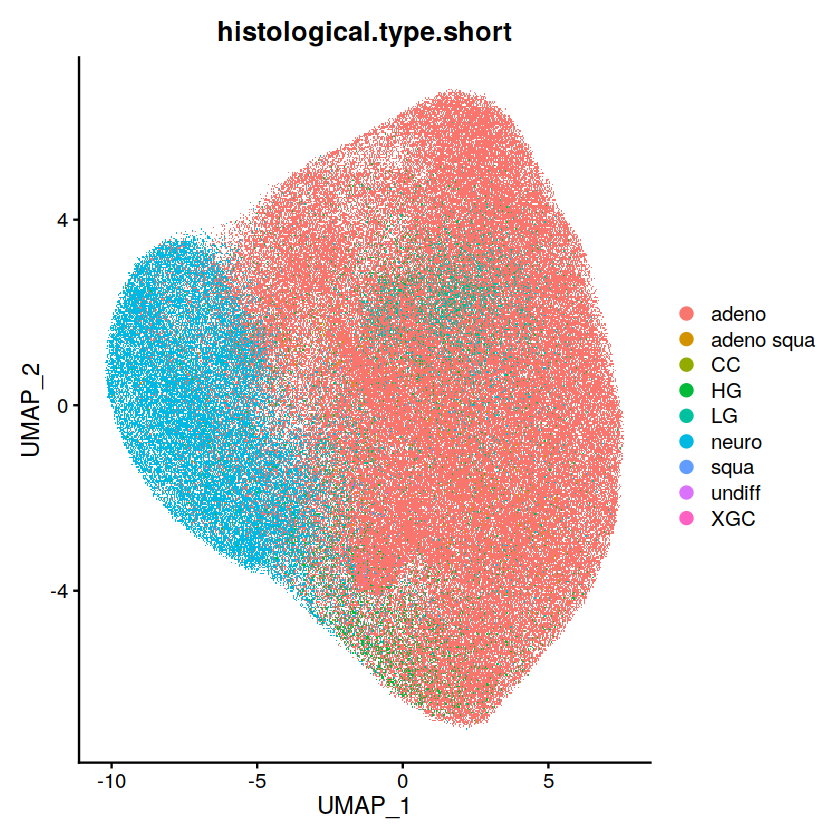

In [39]:
DimPlot(expr,group.by = "histological.type.short") # 这部分再看一下

Rasterizing points since number of points exceeds 100,000.
To disable this behavior set `raster=FALSE`

Rasterizing points since number of points exceeds 100,000.
To disable this behavior set `raster=FALSE`

Rasterizing points since number of points exceeds 100,000.
To disable this behavior set `raster=FALSE`

Rasterizing points since number of points exceeds 100,000.
To disable this behavior set `raster=FALSE`

Rasterizing points since number of points exceeds 100,000.
To disable this behavior set `raster=FALSE`

Rasterizing points since number of points exceeds 100,000.
To disable this behavior set `raster=FALSE`

Rasterizing points since number of points exceeds 100,000.
To disable this behavior set `raster=FALSE`

Rasterizing points since number of points exceeds 100,000.
To disable this behavior set `raster=FALSE`



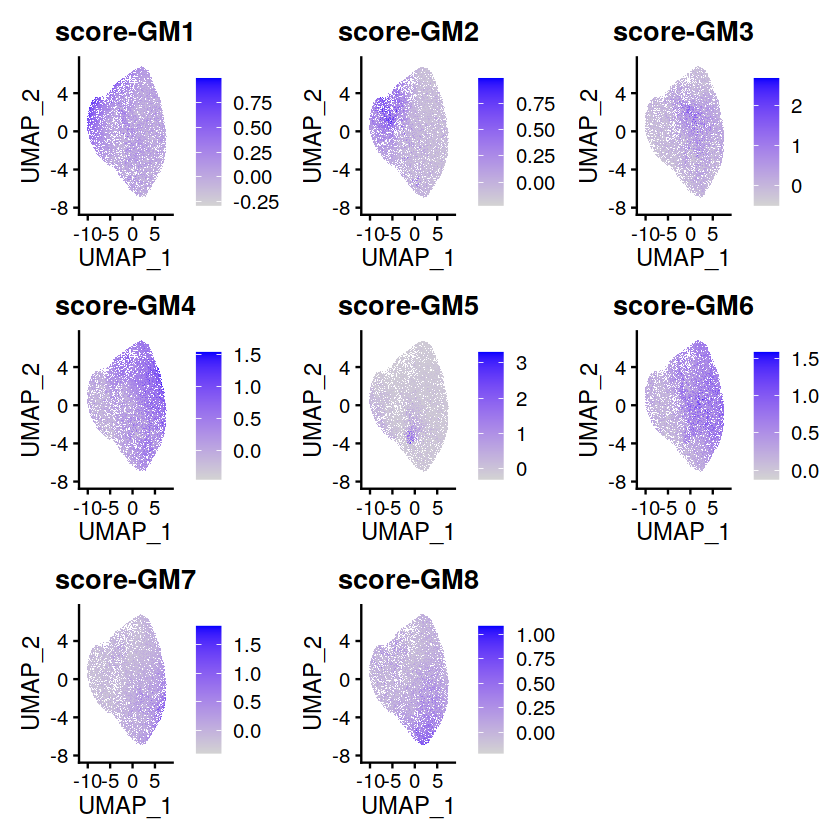

In [40]:
FeaturePlot(expr,paste0("score-GM",c(1:8)))

In [525]:
patient_info['GB_001_LG',]

Sample.ID NewSample.ID Tumors.for.scRNA.seq Sex Age TNM
GB_001_LG GBC11     GB_001_LG    Primary              F   59  NA 
          Clinical.stage histological.type                   Differentiation
GB_001_LG NA             low-grade intraepithelial neoplasia NA             
          CA.19.9..U.ml. ⋯ XGC chronic.cholecystitis Tumors.for.scRNA.seq.unify
GB_001_LG NA             ⋯ NA  NA                    Primary                   
          histological.type.short patient.index Tumors.for.scRNA.seq.short
GB_001_LG LG                      366656        P                         
          metastasis.type progression.type progression.type.short orig.ident
GB_001_LG NA              Mixture          Mix                    GB_001_LG

In [30]:
saveRDS(expr,"../Epithelial_score.RDS")

In [ ]:
DimPlot(expr,group.by = "histological.type.short",label = TRUE) # 这部分再看一下

# calculate porpotions

In [8]:
setwd("/home/wyh/scdata/combined_data/Epithelial/group_compare/")

## IQR直接定阈值

In [107]:
# 计算share的状态并且将share的状态分组比较

patient_info = read.csv("/home/wyh/scdata/patient_info/xzh_220109_final_wyh_220426.csv",row.names = 1)
patient_info$orig.ident = patient_info$NewSample.ID

patient_info$metastasis.type[patient_info$metastasis.type %in% c("P","P_LI")] = "P"
patient_info$metastasis.type = factor(patient_info$metastasis.type, levels = c("P","P_LN","P_LM"))
patient_info$progression.type.short = factor(patient_info$progression.type.short, levels = c("Inflam","Proli","Mix","None"))

ngenes = 100
K_range = c(23,26,32,36,44,46)
K_range = c(23)
for(K in K_range){
    program_num = K

    #celltype_info = read.csv(paste0("/home/wyh/scdata/combined_data/Epithelial/gene_module/adeno/patient_GM_score_",program_num,"GM_100genes.csv"),row.names = 1)
    celltype_info = read.csv(paste0("/home/wyh/scdata/combined_data/Epithelial/gene_module/adeno_p/normalize/patient_GM_score_",program_num,"GM_",ngenes,"genes.csv"),row.names = 1)
    colnames(celltype_info) = paste0("score_GM",1:program_num)
    orig.ident = lapply(rownames(celltype_info),
        FUN = function(i){
        data_split = unlist(strsplit(i,split = "_"))
        name = paste(data_split[1:(length(data_split)-1)],collapse = '_')
        #name = do.call(data_split[paste,args = data_split[1:(length(data_split)-1)]])
            return(name)
                          })
    orig.ident = unlist(orig.ident)
    celltype_info$orig.ident = orig.ident
    celltype_info = as.data.frame(celltype_info)
    celltype_info$barcode = rownames(celltype_info)


    # 计算得分
    GM_index = c(1:program_num)
    sample_score = array(0,dim = c(length(unique(celltype_info$orig.ident)),ncol(celltype_info)-2),dimnames = list(unique(celltype_info$orig.ident),paste0("score_GM",GM_index)))
    for(iGM in paste0("score_GM",GM_index)){
        data_analysis = celltype_info[,c(iGM,"orig.ident")]
        colnames(data_analysis) = c("GM","orig.ident")
        score_summary = setDT(data_analysis)[,list(Mean=mean(GM), Max=max(GM), Min=min(GM), Median=as.numeric(median(GM)), Std=sd(GM)), by=orig.ident]
        score_summary = as.data.frame(score_summary)
        rownames(score_summary) = score_summary[,"orig.ident"]
        sample_score[rownames(score_summary),iGM] = score_summary[,"Mean"]
    }
    sample_score = as.data.frame(sample_score)
    #colnames(sample_score) = c("score_GM1_E2F","score_GM2_G2M","score_GM3_Metal","score_GM4_Glandular","score_GM5_cEMT","score_GM6_Interferon","score_GM7_Hypoxia","score_GM8_P53")
    sample_score$NewSample.ID = rownames(sample_score)

    # 先把得分归一化一下到0-1的范围，减去最小值，除以范围，再计算IQR
    myfun = function(i){
        i = (i-min(i))/(max(i)-min(i))
    }

    for(i in 1:program_num){
        sample_score[,i] = myfun(sample_score[,i])
    }

    program_score = sort(apply(sample_score[,1:program_num],MARGIN = 2,FUN = IQR),decreasing = TRUE)
    patient_shares = names(program_score[program_score>0.1])
    patient_shares = gsub("score_GM","",patient_shares)
    patient_shares = as.numeric(patient_shares)
    write.csv(program_score,paste0("/home/wyh/scdata/combined_data/Epithelial/gene_module/adeno_p/share_state/program_score_",program_num,"GM_",ngenes,"genes.csv"))  

    write.csv(patient_shares,paste0("/home/wyh/scdata/combined_data/Epithelial/gene_module/adeno_p/share_state/patient_shared_state_",program_num,"GM_",ngenes,"genes.csv")) 
    
    sample_score$NewSample.ID = rownames(sample_score)
    fibroblast_ratio_all = left_join(sample_score,patient_info[rownames(sample_score),])

    #fibroblast_ratio_all = fibroblast_ratio_all[fibroblast_ratio_all$Tumors.for.scRNA.seq.short=="P",]
    #fibroblast_ratio_all = fibroblast_ratio_all[fibroblast_ratio_all$histological.type.short %in% "adeno",]

    fibroblast_ratio_all$number =  as.data.frame.array(table(celltype_info$orig.ident))[fibroblast_ratio_all$NewSample.ID,]
    fibroblast_ratio_all$orig.ident = fibroblast_ratio_all$NewSample.ID
    rownames(fibroblast_ratio_all) = fibroblast_ratio_all$orig.ident
    fibroblast_little_patient = rownames(fibroblast_ratio_all)[fibroblast_ratio_all$number<50]

    fibroblast_ratio_all = fibroblast_ratio_all[!fibroblast_ratio_all$orig.ident %in% fibroblast_little_patient,]
    
    
    fibroblast_ratio = fibroblast_ratio_all[fibroblast_ratio_all$Tumors.for.scRNA.seq.short=="P",]
    fibroblast_ratio = fibroblast_ratio[fibroblast_ratio$histological.type.short %in% "adeno",]
    data_plot = fibroblast_ratio[,c(paste0("score_GM",patient_shares),"metastasis.type")]
    data_plot_melt = reshape2::melt(data_plot)
    colnames(data_plot_melt) = c("metastasis.type","variable","Freq")

    pdf(paste0("/home/wyh/scdata/combined_data//Epithelial/group_compare/adeno_p/adeno_epithelial_metastasis.type_",program_num,"_",ngenes,"genes.pdf"),width = 30,height = 5)
    print(ggplot(data_plot_melt, aes( y=Freq, x=metastasis.type)) + geom_boxplot()+facet_grid(. ~variable)+
        theme(axis.text.x = element_text(angle = 45, hjust = 1, vjust = 1,color="black"),
             axis.text.y = element_text(color="black"),
             axis.title=element_text())+ggtitle("")+
          stat_compare_means(comparisons = list(
       c("P","P_LN"),c("P","P_LM"),c("P_LN","P_LM")
      ),method = "wilcox.test",label="p.signif"))
    dev.off()
}


Joining, by = "NewSample.ID"
Using metastasis.type as id variables



In [ ]:
# 某些特异的基因

In [137]:
# 计算share的状态并且将share的状态分组比较

patient_info = read.csv("/home/wyh/scdata/patient_info/xzh_220109_final_wyh_220426.csv",row.names = 1)
patient_info$orig.ident = patient_info$NewSample.ID

patient_info$metastasis.type[patient_info$metastasis.type %in% c("P","P_LI")] = "P"
patient_info$metastasis.type = factor(patient_info$metastasis.type, levels = c("P","P_LN","P_LM"))
patient_info$progression.type.short = factor(patient_info$progression.type.short, levels = c("Inflam","Proli","Mix","None"))

ngenes = 100
K_range = c(23,26,32,36,44,46)
K_range = 8
for(K in K_range){
    program_num = K

    #celltype_info = read.csv(paste0("/home/wyh/scdata/combined_data/Epithelial/gene_module/adeno/patient_GM_score_",program_num,"GM_100genes.csv"),row.names = 1)
    celltype_info = read.csv(paste0("/home/wyh/scdata/combined_data/Epithelial/gene_module/adeno_p/hallmarks_enrich_program_num",23,"GM_",ngenes,"genes.csv"),row.names = 1)
    colnames_temp = colnames(celltype_info)
    colnames(celltype_info) = paste0("score_GM",1:program_num)
    orig.ident = lapply(rownames(celltype_info),
        FUN = function(i){
        data_split = unlist(strsplit(i,split = "_"))
        name = paste(data_split[1:(length(data_split)-1)],collapse = '_')
        #name = do.call(data_split[paste,args = data_split[1:(length(data_split)-1)]])
            return(name)
                          })
    orig.ident = unlist(orig.ident)
    celltype_info$orig.ident = orig.ident
    celltype_info = as.data.frame(celltype_info)
    celltype_info$barcode = rownames(celltype_info)


    # 计算得分
    GM_index = c(1:program_num)
    sample_score = array(0,dim = c(length(unique(celltype_info$orig.ident)),ncol(celltype_info)-2),dimnames = list(unique(celltype_info$orig.ident),paste0("score_GM",GM_index)))
    for(iGM in paste0("score_GM",GM_index)){
        data_analysis = celltype_info[,c(iGM,"orig.ident")]
        colnames(data_analysis) = c("GM","orig.ident")
        score_summary = setDT(data_analysis)[,list(Mean=mean(GM), Max=max(GM), Min=min(GM), Median=as.numeric(median(GM)), Std=sd(GM)), by=orig.ident]
        score_summary = as.data.frame(score_summary)
        rownames(score_summary) = score_summary[,"orig.ident"]
        sample_score[rownames(score_summary),iGM] = score_summary[,"Mean"]
    }
    sample_score = as.data.frame(sample_score)
    #colnames(sample_score) = c("score_GM1_E2F","score_GM2_G2M","score_GM3_Metal","score_GM4_Glandular","score_GM5_cEMT","score_GM6_Interferon","score_GM7_Hypoxia","score_GM8_P53")
    sample_score$NewSample.ID = rownames(sample_score)

    # 先把得分归一化一下到0-1的范围，减去最小值，除以范围，再计算IQR
    myfun = function(i){
        i = (i-min(i))/(max(i)-min(i))
    }

    for(i in 1:program_num){
        sample_score[,i] = myfun(sample_score[,i])
    }


    sample_score$NewSample.ID = rownames(sample_score)
    fibroblast_ratio_all = left_join(sample_score,patient_info[rownames(sample_score),])

    #fibroblast_ratio_all = fibroblast_ratio_all[fibroblast_ratio_all$Tumors.for.scRNA.seq.short=="P",]
    #fibroblast_ratio_all = fibroblast_ratio_all[fibroblast_ratio_all$histological.type.short %in% "adeno",]

    fibroblast_ratio_all$number =  as.data.frame.array(table(celltype_info$orig.ident))[fibroblast_ratio_all$NewSample.ID,]
    fibroblast_ratio_all$orig.ident = fibroblast_ratio_all$NewSample.ID
    rownames(fibroblast_ratio_all) = fibroblast_ratio_all$orig.ident
    fibroblast_little_patient = rownames(fibroblast_ratio_all)[fibroblast_ratio_all$number<50]

    fibroblast_ratio_all = fibroblast_ratio_all[!fibroblast_ratio_all$orig.ident %in% fibroblast_little_patient,]
    
    
    fibroblast_ratio = fibroblast_ratio_all[fibroblast_ratio_all$Tumors.for.scRNA.seq.short=="P",]
    fibroblast_ratio = fibroblast_ratio[fibroblast_ratio$histological.type.short %in% "adeno",]
    data_plot = fibroblast_ratio[,c(paste0("score_GM",c(1:8)),"metastasis.type")]
    colnames(data_plot) = c(colnames_temp,"metastasis.type")
    data_plot_melt = reshape2::melt(data_plot)
    colnames(data_plot_melt) = c("metastasis.type","variable","Freq")

    pdf(paste0("/home/wyh/scdata/combined_data//Epithelial/group_compare/adeno_p/hallmarks_enrich_program_num_",program_num,"_",ngenes,"genes.pdf"),width = 30,height = 5)
    print(ggplot(data_plot_melt, aes( y=Freq, x=metastasis.type)) + geom_boxplot()+facet_grid(. ~variable)+
        theme(axis.text.x = element_text(angle = 45, hjust = 1, vjust = 1,color="black"),
             axis.text.y = element_text(color="black"),
             axis.title=element_text())+ggtitle("")+
          stat_compare_means(comparisons = list(
       c("P","P_LN"),c("P","P_LM"),c("P_LN","P_LM")
      ),method = "wilcox.test",label="p.signif"))
    dev.off()
}

Joining, by = "NewSample.ID"
Using metastasis.type as id variables



In [141]:
    pdf(paste0("/home/wyh/scdata/combined_data//Epithelial/group_compare/adeno_p/hallmarks_enrich_program_num_",program_num,"_",ngenes,"genes.pdf"),width = 20,height = 10)
    print(ggplot(data_plot_melt, aes( y=Freq, x=metastasis.type)) + geom_boxplot()+facet_grid(. ~variable)+
        theme(axis.text.x = element_text(angle = 45, hjust = 1, vjust = 1,color="black"),
             axis.text.y = element_text(color="black"),
             axis.title=element_text())+ggtitle("")+
          stat_compare_means(comparisons = list(
       c("P","P_LN"),c("P","P_LM"),c("P_LN","P_LM")
      ),method = "wilcox.test",label="p.signif"))
    dev.off()

png 
  2

## 病人得分的heatmap

In [12]:
patient_info = read.csv("/home/wyh/scdata/patient_info/xzh_220109_final_wyh_220426.csv",row.names = 1)
patient_info$orig.ident = patient_info$NewSample.ID

patient_info$metastasis.type[patient_info$metastasis.type %in% c("P","P_LI")] = "P"
patient_info$metastasis.type = factor(patient_info$metastasis.type, levels = c("P","P_LN","P_LM"))
patient_info$progression.type.short = factor(patient_info$progression.type.short, levels = c("Inflam","Proli","Mix","None"))

In [13]:
ngenes = 100
K_range = c(23,26,32,36,44,46)
K_range = c(23)
for(K in K_range){
    program_num = K

    #celltype_info = read.csv(paste0("/home/wyh/scdata/combined_data/Epithelial/gene_module/adeno/patient_GM_score_",program_num,"GM_100genes.csv"),row.names = 1)
    celltype_info = read.csv(paste0("/home/wyh/scdata/combined_data/Epithelial/gene_module/adeno_p/normalize/patient_GM_score_",program_num,"GM_",ngenes,"genes.csv"),row.names = 1)
    colnames(celltype_info) = paste0("score_GM",1:program_num)
    orig.ident = lapply(rownames(celltype_info),
        FUN = function(i){
        data_split = unlist(strsplit(i,split = "_"))
        name = paste(data_split[1:(length(data_split)-1)],collapse = '_')
        #name = do.call(data_split[paste,args = data_split[1:(length(data_split)-1)]])
            return(name)
                          })
    orig.ident = unlist(orig.ident)
    celltype_info$orig.ident = orig.ident
    celltype_info = as.data.frame(celltype_info)
    celltype_info$barcode = rownames(celltype_info)


    # 计算得分
    GM_index = c(1:program_num)
    sample_score = array(0,dim = c(length(unique(celltype_info$orig.ident)),ncol(celltype_info)-2),dimnames = list(unique(celltype_info$orig.ident),paste0("score_GM",GM_index)))
    for(iGM in paste0("score_GM",GM_index)){
        data_analysis = celltype_info[,c(iGM,"orig.ident")]
        colnames(data_analysis) = c("GM","orig.ident")
        score_summary = setDT(data_analysis)[,list(Mean=mean(GM), Max=max(GM), Min=min(GM), Median=as.numeric(median(GM)), Std=sd(GM)), by=orig.ident]
        score_summary = as.data.frame(score_summary)
        rownames(score_summary) = score_summary[,"orig.ident"]
        sample_score[rownames(score_summary),iGM] = score_summary[,"Mean"]
    }
    sample_score = as.data.frame(sample_score)
    #colnames(sample_score) = c("score_GM1_E2F","score_GM2_G2M","score_GM3_Metal","score_GM4_Glandular","score_GM5_cEMT","score_GM6_Interferon","score_GM7_Hypoxia","score_GM8_P53")
    sample_score$NewSample.ID = rownames(sample_score)

    # 先把得分归一化一下到0-1的范围，减去最小值，除以范围，再计算IQR
    myfun = function(i){
        i = (i-min(i))/(max(i)-min(i))
    }

    for(i in 1:program_num){
        sample_score[,i] = myfun(sample_score[,i])
    }
}

In [14]:
library(pheatmap)
library(data.table)

In [61]:
write.csv(sample_score,"../submit/figure_data/heatmap_GM_score.csv")

In [15]:
setwd("/home/wyh/scdata/combined_data/Epithelial/group_compare/")

In [16]:
sample_score = read.csv("../submit/figure_data/heatmap_GM_score.csv",row.names = 1)
sample_score = sample_score[,1:23]
sample_score$metastasis.type = patient_info[rownames(sample_score),"metastasis.type"]
sample_score = sample_score[c(which(sample_score$metastasis.type=="P"),which(sample_score$metastasis.type=="P_LN"),which(sample_score$metastasis.type=="P_LM")),]

In [17]:
shared_state = c(1,3,5,6,7,8,16)

In [18]:
row_annotation = rep("patient_specific",23)
names(row_annotation) = paste0("score_GM",c(1:23))
row_annotation[shared_state] = "patient_shared"
col_annotation = sample_score$metastasis.type

In [23]:
col_annotation

[1] P    P    P    P    P    P    P    P    P    P    P    P    P    P    P   
[16] P    P    P    P    P    P_LN P_LN P_LN P_LN P_LN P_LN P_LN P_LN P_LN P_LN
[31] P_LN P_LN P_LN P_LN P_LN P_LN P_LN P_LN P_LN P_LN P_LN P_LN P_LN P_LN P_LN
[46] P_LN P_LN P_LN P_LN P_LN P_LN P_LN P_LN P_LN P_LN P_LN P_LN P_LN P_LN P_LN
[61] P_LN P_LN P_LN P_LM P_LM P_LM P_LM P_LM P_LM P_LM P_LM P_LM P_LM P_LM P_LM
Levels: P P_LN P_LM

In [19]:
# 第一个版本的图，暂且不动
annoCol<-list(GM_state=c(patient_shared = "#FC8D62", patient_specific="#FFD92F"),
             metastasis.type = c(P = "#8DA0CB",P_LN = "#E78AC3",P_LM = "#A6D854"))

In [20]:
# 第二个版本的图，暂且不动
annoCol<-list(GM_state=c(patient_shared = "#CD3333", patient_specific="#2078B5"),
             metastasis.type = c(P = "#0073C2",P_LN = "#EFC000",P_LM = "#868686"))

In [24]:
# 第三个版本的图
col_annotation = as.character(col_annotation)
col_annotation[col_annotation %in% c("P_LN","P_LM")] = "P_Metas"

annoCol<-list(GM_state=c(patient_shared = "#CD3333", patient_specific="#2078B5"),
             metastasis.type = c(P = "#0073C2",P_Metas = "#EFC000"))

In [21]:
library(pheatmap)

In [37]:
pheatmap(t(sample_score[,1:23]),clustering_method = "ward.D",annotation_row = data.frame(GM_state = row_annotation,row.names = colnames(sample_score)),
         annotation_col = data.frame(metastasis.type = col_annotation,row.names = rownames(sample_score)), labels_col = rep("",nrow(sample_score)),
         color = colorRampPalette(c("white","firebrick3"))(50),
         border = NULL,
         annotation_colors = annoCol,
         filename = "./adeno_p/heatmap_GM_scoreV4.pdf",width = 8,height=8,border_color = NA)

In [27]:
table(col_annotation)

col_annotation
      P P_Metas 
     20      55 

In [81]:
## 列不聚类
sample_score = sample_score[,1:23]
pheatmap(t(sample_score),clustering_method = "ward.D",annotation_row = data.frame(GM_state = row_annotation,row.names = colnames(sample_score)),
         annotation_col = data.frame(metastasis.type = col_annotation,row.names = rownames(sample_score)), labels_col = rep("",nrow(sample_score)),
         color = colorRampPalette(c("white","firebrick3"))(50),cluster_cols = FALSE,
         border = NULL,gaps_col = c(20,63),gaps_row = 16,
         annotation_colors = annoCol,
         filename = "./adeno_p/heatmap_GM_scoreV7.pdf",width = 9,height=8,border_color = NA)

In [372]:
# 第一个版本的图，暂且先不动
pheatmap(t(sample_score),clustering_method = "ward.D",annotation_row = data.frame(GM_state = row_annotation,row.names = colnames(sample_score)),
         annotation_col = data.frame(metastasis.type = col_annotation,row.names = rownames(sample_score)), labels_col = rep("",nrow(sample_score)),
         color = colorRampPalette(c("white","firebrick3"))(50),
         border = NULL,
         annotation_colors = annoCol,
         filename = "./adeno_p/heatmap_GM_score.pdf",width = 12,height=12)

In [ ]:
# 手动排序，每个组内部

ERROR: Error in parse(text = x, srcfile = src): <text>:1:97: unexpected ','
1: annotation_col = data.frame(metastasis.type = col_annotation,row.names = rownames(sample_score)),
                                                                                                    ^


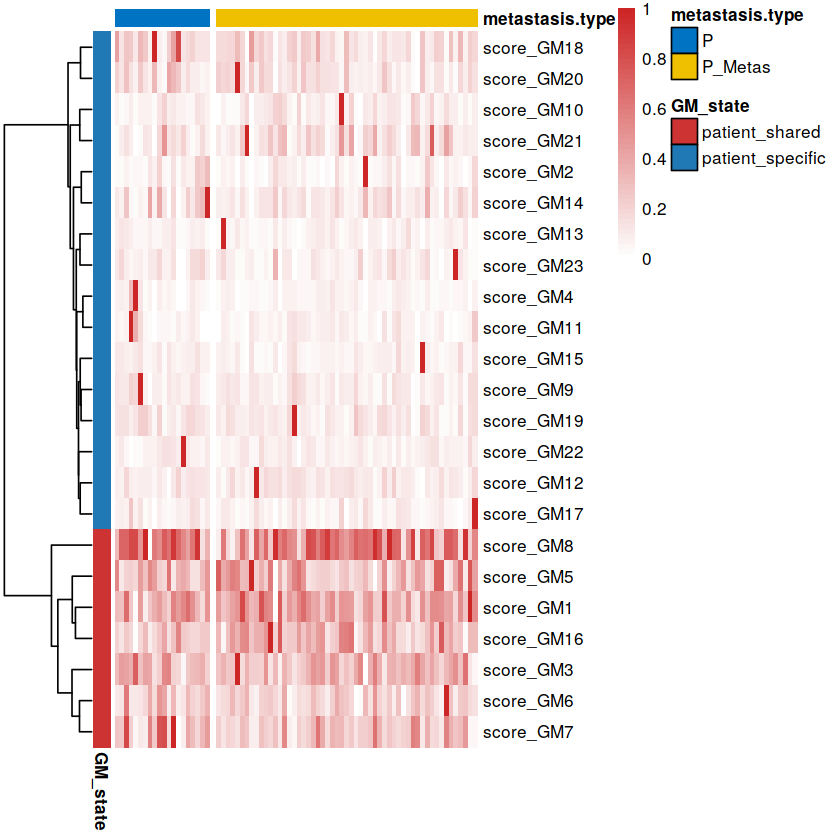

In [34]:
sample_score = sample_score[,1:23]
pheatmap(t(sample_score),clustering_method = "ward.D",annotation_row = data.frame(GM_state = row_annotation,row.names = colnames(sample_score)),
         annotation_col = data.frame(metastasis.type = col_annotation,row.names = rownames(sample_score)), labels_col = rep("",nrow(sample_score)),
         color = colorRampPalette(c("white","firebrick3"))(50),cluster_cols = FALSE,
         border = NULL,gaps_col = c(20),gaps_row = 16,
         annotation_colors = annoCol,width = 9,height=8,border_color = NA)

In [ ]:
# https://jokergoo.github.io/2021/03/05/cluster-groups-in-complexheatmap/

In [35]:
library(ComplexHeatmap)

Loading required package: grid

ComplexHeatmap version 2.13.1
Bioconductor page: http://bioconductor.org/packages/ComplexHeatmap/
Github page: https://github.com/jokergoo/ComplexHeatmap
Documentation: http://jokergoo.github.io/ComplexHeatmap-reference

If you use it in published research, please cite either one:
- Gu, Z. Complex heatmaps reveal patterns and correlations in multidimensional 
    genomic data. Bioinformatics 2016.
- Gu, Z. Complex Heatmap Visualization. iMeta 2022.


The new InteractiveComplexHeatmap package can directly export static 
complex heatmaps into an interactive Shiny app with zero effort. Have a try!

This message can be suppressed by:
  suppressPackageStartupMessages(library(ComplexHeatmap))
! pheatmap() has been masked by ComplexHeatmap::pheatmap(). Most of the arguments
   in the original pheatmap() are identically supported in the new function. You 
   can still use the original function by explicitly calling pheatmap::pheatmap().



Attaching package: ‘Co

In [50]:
fa = col_annotation
fa_col = c("P" = "#0073C2", "P_Metas" = "#EFC000")
# dend1 = cluster_between_groups(m, fa)
# Heatmap(m, cluster_columns = dend1, column_split = 3,
#         row_title = "cluster_between_groups",
#         top_annotation = HeatmapAnnotation(foo = fa, col = list(foo = fa_col)))

GM_state_color = c(patient_shared = "#CD3333", patient_specific="#2078B5")

In [ ]:
row_annotation

score_GM1          score_GM2          score_GM3          score_GM4 
  "patient_shared" "patient_specific"   "patient_shared" "patient_specific" 
         score_GM5          score_GM6          score_GM7          score_GM8 
  "patient_shared"   "patient_shared"   "patient_shared"   "patient_shared" 
         score_GM9         score_GM10         score_GM11         score_GM12 
"patient_specific" "patient_specific" "patient_specific" "patient_specific" 
        score_GM13         score_GM14         score_GM15         score_GM16 
"patient_specific" "patient_specific" "patient_specific"   "patient_shared" 
        score_GM17         score_GM18         score_GM19         score_GM20 
"patient_specific" "patient_specific" "patient_specific" "patient_specific" 
        score_GM21         score_GM22         score_GM23 
"patient_specific" "patient_specific" "patient_specific"

In [52]:
col_fun = colorRampPalette(c("white","firebrick3"))(50)

In [55]:
col_fun

[1] "#FFFFFF" "#FDFAFA" "#FCF6F6" "#FBF1F1" "#FAEDED" "#F9E8E8" "#F8E4E4"
 [8] "#F7E0E0" "#F6DBDB" "#F5D7D7" "#F4D2D2" "#F3CECE" "#F2C9C9" "#F1C5C5"
[15] "#F0C1C1" "#EFBCBC" "#EEB8B8" "#EDB3B3" "#ECAFAF" "#EBAAAA" "#EAA6A6"
[22] "#E9A2A2" "#E89D9D" "#E79999" "#E69494" "#E59090" "#E48B8B" "#E38787"
[29] "#E28383" "#E17E7E" "#E07A7A" "#DF7575" "#DE7171" "#DD6C6C" "#DC6868"
[36] "#DB6464" "#DA5F5F" "#D95B5B" "#D85656" "#D75252" "#D64D4D" "#D54949"
[43] "#D44545" "#D34040" "#D23C3C" "#D13737" "#D03333" "#CF2E2E" "#CE2A2A"
[50] "#CD2626"

[1] 23 22 21 20 19 18 17 16 15 14 13 12 11 10  9  8  7  6  5  4  3  2  1

In [65]:
pdf("./adeno_p/heatmap_GM_scoreV8.pdf",height = 8,width = 9)
dend2 = cluster_within_group(t(sample_score), fa)
Heatmap(t(sample_score), cluster_columns = dend2, column_split = 2,col = col_fun,show_column_names = FALSE,
    row_title = "cluster_within_group",
    top_annotation = HeatmapAnnotation(foo = fa, col = list(foo = fa_col)),
       left_annotation = rowAnnotation(GM_state = row_annotation,col = list(GM_state = GM_state_color)))
dev.off()

png 
  2

In [66]:
getwd()

[1] "/home/wyh/scdata/combined_data/Epithelial/group_compare"

## 富集分析

In [67]:
library(clusterProfiler)
library(ggplot2)

# go_bp = read.gmt("D:/postgraduate/database/msigdb/c5.go.bp.v2022.1.Hs.symbols.gmt")
for(K in c(23)){
  gene_list = read.csv(paste0("/home/wyh/scdata/combined_data/Epithelial/NMFV2/top_genes_",K,".csv"),row.names = 1)
  
  patient_shared = read.csv(paste0("/home/wyh/scdata/combined_data/Epithelial/gene_module/adeno_p/share_state/patient_shared_state_",K,"GM_100genes.csv"),row.names = 1)

  gene_list = gene_list[1:100,]
  gene_list = as.list(gene_list)
  #gene_list = gene_list[patient_shared[,1]]
  names(gene_list) = gsub("X","GM",names(gene_list))
  HALL_marks = read.csv("/home/wyh/scdata/knowledge_based/hallmarks.csv",row.names = 1)
  HALL_marks$term = gsub(pattern = "HALLMARK_",replacement = "",x = HALL_marks$term)
  gene_list = gene_list[c(1,3,5,6,7,8,16)]
  
  a = compareCluster(geneClusters = gene_list,fun = enricher,TERM2GENE = HALL_marks)
  # ggsave(paste0("./epithelial/group_compare/adeno_p/enrich_GM_",K,'.png'),dotplot(a),width = 15,height = 10) 
}

In [56]:
library(clusterProfiler)
library(ggplot2)

# go_bp = read.gmt("D:/postgraduate/database/msigdb/c5.go.bp.v2022.1.Hs.symbols.gmt")
for(K in c(23)){
  gene_list = read.csv(paste0("/home/wyh/scdata/combined_data/Epithelial/NMFV2/top_genes_",K,".csv"),row.names = 1)
  
  patient_shared = read.csv(paste0("/home/wyh/scdata/combined_data/Epithelial/gene_module/adeno_p/share_state/patient_shared_state_",K,"GM_100genes.csv"),row.names = 1)

  gene_list = gene_list[1:100,]
  gene_list = as.list(gene_list)
  #gene_list = gene_list[patient_shared[,1]]
  names(gene_list) = gsub("X","GM",names(gene_list))
  HALL_marks = read.csv("/home/wyh/scdata/knowledge_based/hallmarks.csv",row.names = 1)
  HALL_marks$term = gsub(pattern = "HALLMARK_",replacement = "",x = HALL_marks$term)
  # gene_list = gene_list[c(1,3,5,6,7,8,16)]
  
  a = compareCluster(geneClusters = gene_list[c(8,1,16,5,3,7,6,18,20,21,10,14,2,12,17,22,19,9,15,11,4,23,13)],fun = enricher,TERM2GENE = HALL_marks)
  # ggsave(paste0("./epithelial/group_compare/adeno_p/enrich_GM_",K,'.png'),dotplot(a),width = 15,height = 10) 
}

In [1]:
library(clusterProfiler)
library(ggplot2)

# go_bp = read.gmt("D:/postgraduate/database/msigdb/c5.go.bp.v2022.1.Hs.symbols.gmt")
for(K in c(23)){
  gene_list = read.csv(paste0("/home/wyh/scdata/combined_data/Epithelial/NMFV2/top_genes_",K,".csv"),row.names = 1)
  
  patient_shared = read.csv(paste0("/home/wyh/scdata/combined_data/Epithelial/gene_module/adeno_p/share_state/patient_shared_state_",K,"GM_100genes.csv"),row.names = 1)

  gene_list = gene_list[1:100,]
  gene_list = as.list(gene_list)
  #gene_list = gene_list[patient_shared[,1]]
  names(gene_list) = gsub("X","GM",names(gene_list))
  HALL_marks = read.csv("/home/wyh/scdata/knowledge_based/hallmarks.csv",row.names = 1)
  HALL_marks$term = gsub(pattern = "HALLMARK_",replacement = "",x = HALL_marks$term)
  gene_list = gene_list[setdiff(c(1:23),c(1,3,5,6,7,8,16))]
  
  a = compareCluster(geneClusters = gene_list,fun = enricher,TERM2GENE = HALL_marks)
  # ggsave(paste0("./epithelial/group_compare/adeno_p/enrich_GM_",K,'.png'),dotplot(a),width = 15,height = 10) 
}



clusterProfiler v3.18.1  For help: https://guangchuangyu.github.io/software/clusterProfiler

If you use clusterProfiler in published research, please cite:
Guangchuang Yu, Li-Gen Wang, Yanyan Han, Qing-Yu He. clusterProfiler: an R package for comparing biological themes among gene clusters. OMICS: A Journal of Integrative Biology. 2012, 16(5):284-287.


Attaching package: ‘clusterProfiler’


The following object is masked from ‘package:stats’:

    filter




In [300]:
gene_list = lapply(gene_list,FUN = function(i){i[1:30]})

gene_list

$GM1
 [1] "LEFTY1"  "PLA2G10" "CLDN10"  "IFI6"    "TNFSF10" "CTSS"    "IFIT1"  
 [8] "MIA"     "IFI44L"  "MX1"     "OAS2"    "TSPAN8"  "ITM2B"   "HLA-C"  
[15] "HLA-B"   "FOLR1"   "MUC1"    "GOLM1"   "HLA-DMA" "FAM3D"   "PIGR"   
[22] "TFF2"    "TSPAN1"  "AGR3"    "ABI3BP"  "CYSTM1"  "XAF1"    "SULT1B1"
[29] "IFI44"   "IFI27"  

$GM3
 [1] "TOP2A"  "ASPM"   "CENPF"  "TPX2"   "NUSAP1" "MKI67"  "GTSE1"  "DLGAP5"
 [9] "CDC20"  "CCNB1"  "CEP55"  "HMMR"   "DEPDC1" "PRC1"   "NUF2"   "UBE2C" 
[17] "BIRC5"  "PTTG1"  "CDK1"   "NEK2"   "KIF2C"  "KIF23"  "CENPE"  "CDKN3" 
[25] "CENPA"  "CCNB2"  "HMGB2"  "NDC80"  "KIF4A"  "KIFC1" 

$GM5
 [1] "HEXIM1"     "PIK3R3"     "PPP1R10"    "NEAT1"      "AC023157.3"
 [6] "CATSPERG"   "INTS6"      "MALAT1"     "MAFB"       "Z93241.1"  
[11] "KCNQ1OT1"   "AL365436.2" "Z99127.4"   "HIST1H2BG"  "AC020916.1"
[16] "SNHG5"      "CSKMT"      "AL021155.5" "AL137077.2" "AL355075.4"
[21] "AC025164.1" "ARGLU1"     "GOLGB1"     "NKTR"       "RRBP1"     
[26] "AP001160.1" "MAFA"       "HIST1H2AG"  "HIST1H2BH"  "POU3F1"    

$GM6
 [1] "FMR1NB"     "PAGE5"      "SPANXB1"    "PAGE2"      "STARD3"    
 [6] "PAGE2B"     "PGAP3"      "LINC01444"  "KRT81"      "KRT6A"     
[11] "SAA1"       "MIEN1"      "PRSS2"      "LCP1"       "KLRC2"     
[16] "ERBB2"      "TSPY10"     "PSMD3"      "ORMDL3"     "SAA2"      
[21] "LINC01287"  "LINC02802"  "AL356515.1" "COL6A2"     "DCAF4L2"   
[26] "SSX1"       "PRSS1"      "PIP"        "PAEP"       "TSPY4"     

$GM7
 [1] "FCER1G"  "SRGN"    "RGS1"    "CCL4"    "C1QA"    "TYROBP"  "HCST"   
 [8] "LAPTM5"  "C1QB"    "C1QC"    "CCL3"    "AIF1"    "PTPRC"   "ALOX5AP"
[15] "GZMA"    "CORO1A"  "CCL5"    "CD69"    "CD3D"    "MS4A6A"  "CD14"   
[22] "DUSP2"   "TRAC"    "CD53"    "SAMSN1"  "NKG7"    "FCGR3A"  "CCL4L2" 
[29] "CD2"     "CD52"   

$GM8
 [1] "NME1"    "NME2"    "UQCRH"   "TXN"     "PSMB3"   "SLC25A5" "PRELID1"
 [8] "SNRPG"   "LDHB"    "ATP5MF"  "PRDX2"   "NPM1"    "ATP5MC3" "BTF3"   
[15] "NACA"    "PPIA"    "NDUFA4"  "PSMA2"   "PCBD1"   "NDUFB3"  "NHP2"   
[22] "EIF3K"   "RAN"     "PARK7"   "RACK1"   "ATP5PD"  "HINT1"   "CHCHD2" 
[29] "SF3B6"   "APRT"   

$GM16
 [1] "LMO7"    "CEACAM6" "CEACAM5" "GPRC5A"  "ADGRF1"  "MUC16"   "SLC2A1" 
 [8] "ERO1A"   "DUSP5"   "DUOXA2"  "F3"      "LAMB3"   "KLK10"   "TACSTD2"
[15] "COL17A1" "IGFBP3"  "KLK7"    "TIMP2"   "DUOX2"   "TM4SF1"  "EMP1"   
[22] "CD55"    "SLC6A14" "PLAUR"   "FHL2"    "EPS8L1"  "KRT17"   "EPHA2"  
[29] "GCNT3"   "PADI1"

In [301]:
a = compareCluster(geneClusters = gene_list,fun = enricher,TERM2GENE = HALL_marks)

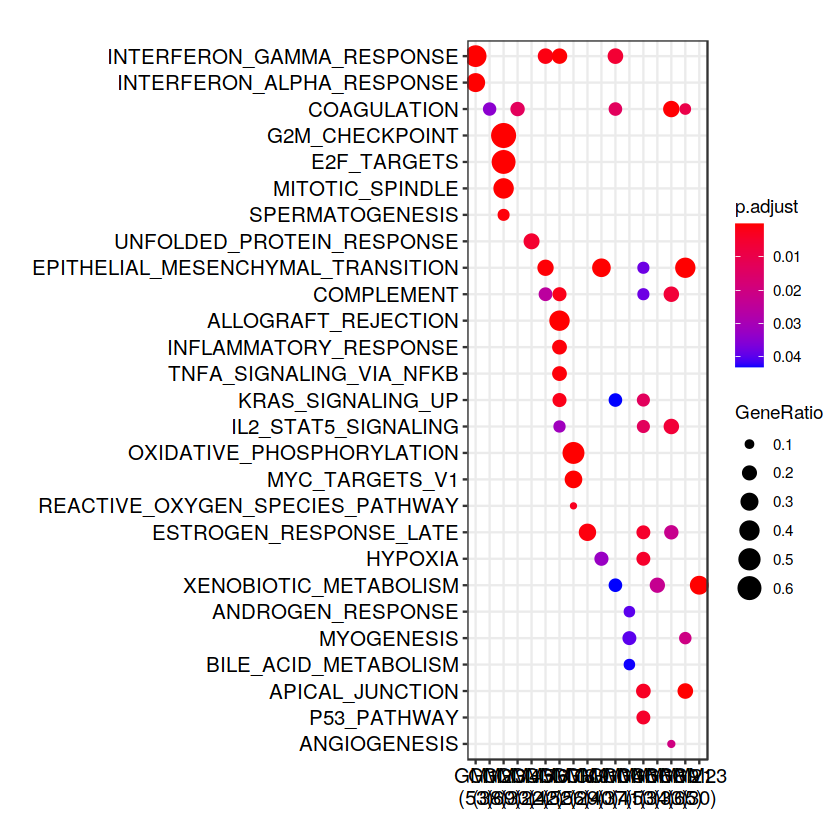

In [69]:
dotplot(a)

In [313]:
head(a@compareClusterResult,n = 20)

Cluster ID                                Description                      
1  GM1     INTERFERON_GAMMA_RESPONSE         INTERFERON_GAMMA_RESPONSE        
2  GM1     INTERFERON_ALPHA_RESPONSE         INTERFERON_ALPHA_RESPONSE        
3  GM3     G2M_CHECKPOINT                    G2M_CHECKPOINT                   
4  GM3     E2F_TARGETS                       E2F_TARGETS                      
5  GM3     MITOTIC_SPINDLE                   MITOTIC_SPINDLE                  
6  GM3     SPERMATOGENESIS                   SPERMATOGENESIS                  
7  GM5     UNFOLDED_PROTEIN_RESPONSE         UNFOLDED_PROTEIN_RESPONSE        
8  GM6     EPITHELIAL_MESENCHYMAL_TRANSITION EPITHELIAL_MESENCHYMAL_TRANSITION
9  GM6     INTERFERON_GAMMA_RESPONSE         INTERFERON_GAMMA_RESPONSE        
10 GM6     COMPLEMENT                        COMPLEMENT                       
11 GM7     ALLOGRAFT_REJECTION               ALLOGRAFT_REJECTION              
12 GM7     INTERFERON_GAMMA_RESPONSE         INTERFERON_GAMMA_RESPONSE        
13 GM7     INFLAMMATORY_RESPONSE             INFLAMMATORY_RESPONSE            
14 GM7     TNFA_SIGNALING_VIA_NFKB           TNFA_SIGNALING_VIA_NFKB          
15 GM7     COMPLEMENT                        COMPLEMENT                       
16 GM7     KRAS_SIGNALING_UP                 KRAS_SIGNALING_UP                
17 GM7     IL2_STAT5_SIGNALING               IL2_STAT5_SIGNALING              
18 GM8     OXIDATIVE_PHOSPHORYLATION         OXIDATIVE_PHOSPHORYLATION        
19 GM8     MYC_TARGETS_V1                    MYC_TARGETS_V1                   
20 GM8     REACTIVE_OXYGEN_SPECIES_PATHWAY   REACTIVE_OXYGEN_SPECIES_PATHWAY  
   GeneRatio BgRatio  pvalue       p.adjust     qvalue      
1  25/53     200/4383 2.030935e-20 5.280431e-19 4.275652e-19
2  18/53     97/4383  1.100286e-17 1.430371e-16 1.158195e-16
3  46/69     200/4383 5.181844e-47 6.736397e-46 4.363658e-46
4  41/69     200/4383 9.489969e-39 6.168480e-38 3.995776e-38
5  28/69     199/4383 1.270963e-20 5.507508e-20 3.567616e-20
6  9/69      135/4383 2.254279e-04 7.326405e-04 4.745850e-04
7  5/22      113/4383 1.933096e-04 5.219360e-03 4.883612e-03
8  10/42     200/4383 1.278864e-05 3.836591e-04 3.230814e-04
9  9/42      200/4383 8.598929e-05 1.289839e-03 1.086181e-03
10 7/42      200/4383 2.562751e-03 2.562751e-02 2.158106e-02
11 21/52     200/4383 1.371067e-15 3.564774e-14 2.597811e-14
12 11/52     200/4383 1.578836e-05 2.052487e-04 1.495740e-04
13 10/52     200/4383 9.213613e-05 5.988849e-04 4.364343e-04
14 10/52     200/4383 9.213613e-05 5.988849e-04 4.364343e-04
15 9/52      200/4383 4.770821e-04 2.067356e-03 1.506575e-03
16 9/52      200/4383 4.770821e-04 2.067356e-03 1.506575e-03
17 7/52      199/4383 8.421317e-03 3.127918e-02 2.279454e-02
18 27/56     200/4383 2.581673e-22 6.196015e-21 5.435101e-21
19 16/56     200/4383 1.615310e-09 1.938373e-08 1.700327e-08
20 5/56      49/4383  3.529050e-04 2.823240e-03 2.476526e-03
   geneID                                                                                                                                                                                                                                                                  
1  TNFSF10/IFIT1/IFI44L/MX1/OAS2/HLA-B/HLA-DMA/XAF1/IFI44/IFI27/LGALS3BP/HLA-A/IFIT3/HLA-DRB1/B2M/LY6E/TXNIP/ISG15/RTP4/BST2/CD74/MX2/CMPK2/CFB/PLSCR1                                                                                                                     
2  IFI44L/MX1/HLA-C/IFI44/IFI27/LGALS3BP/IFIT3/B2M/LY6E/IFITM1/TXNIP/ISG15/RTP4/BST2/CD74/CMPK2/OAS1/PLSCR1                                                                                                                                                                
3  TOP2A/CENPF/TPX2/NUSAP1/MKI67/CDC20/HMMR/PRC1/UBE2C/BIRC5/PTTG1/CDK1/NEK2/KIF2C/KIF23/CENPE/CDKN3/CENPA/CCNB2/NDC80/KIF4A/PLK1/CCNA2/KIF20B/KIF11/BUB1/AURKB/KNL1/PBK/TROAP/TACC3/AURKA/SMC4/RACGAP1/TTK/MAD2L1/LMNB1/KPNA2/KIF15/STMN1/CCNF/UBE2S/CKS2/HMGB3/DT

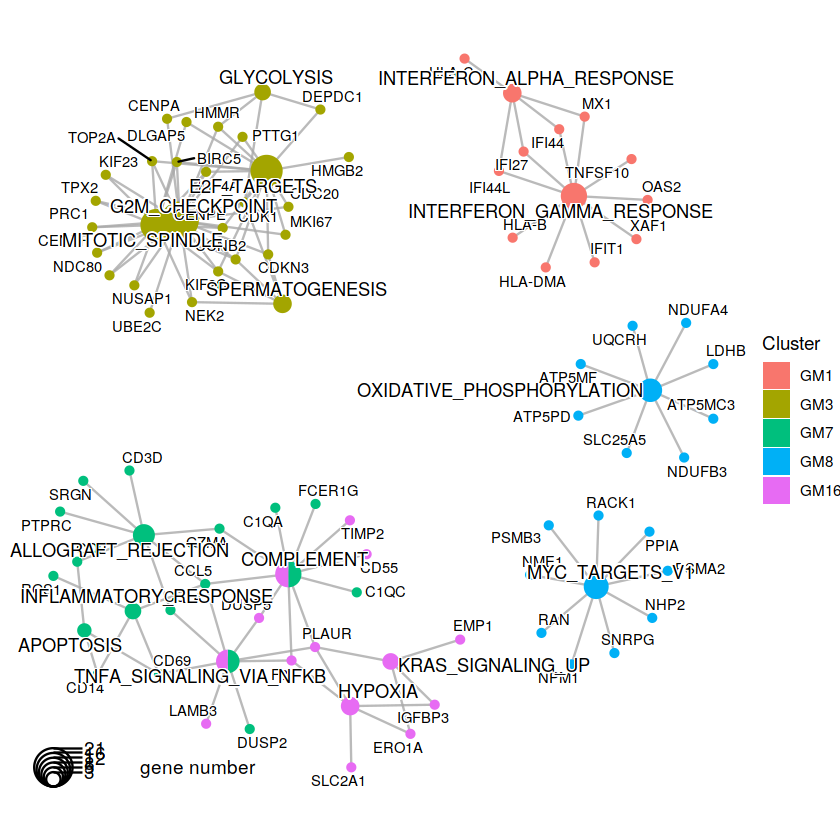

In [303]:
cnetplot(a,showCategory = 17,max.overlaps = 1,repel = TRUE,cex_label_gene = 1.2,cex_label_category = 1.5,cex_gene = 2)

In [305]:
gene_list = lapply(gene_list,FUN = function(i){i[1:30]})


In [308]:
pdf("./submit/figure/enrichmentcneplotV3.pdf")
cnetplot(a,showCategory = 17,max.overlaps = 1,repel = TRUE,cex_label_gene = 1.5,cex_label_category = 1.7)
dev.off()

png 
  2

In [277]:
pdf("./submit/figure/enrichmentcneplotV2.pdf")
cnetplot(a,showCategory = 17,max.overlaps = 10,repel = TRUE,cex_label_gene = 1.5,cex_label_category = 1.5)
dev.off()

png 
  2

In [13]:
head(a@compareClusterResult,n = 15)

Cluster ID                                Description                      
1  GM1     INTERFERON_GAMMA_RESPONSE         INTERFERON_GAMMA_RESPONSE        
2  GM1     INTERFERON_ALPHA_RESPONSE         INTERFERON_ALPHA_RESPONSE        
3  GM3     G2M_CHECKPOINT                    G2M_CHECKPOINT                   
4  GM3     E2F_TARGETS                       E2F_TARGETS                      
5  GM3     MITOTIC_SPINDLE                   MITOTIC_SPINDLE                  
6  GM3     SPERMATOGENESIS                   SPERMATOGENESIS                  
7  GM5     UNFOLDED_PROTEIN_RESPONSE         UNFOLDED_PROTEIN_RESPONSE        
8  GM6     EPITHELIAL_MESENCHYMAL_TRANSITION EPITHELIAL_MESENCHYMAL_TRANSITION
9  GM6     INTERFERON_GAMMA_RESPONSE         INTERFERON_GAMMA_RESPONSE        
10 GM6     COMPLEMENT                        COMPLEMENT                       
11 GM7     ALLOGRAFT_REJECTION               ALLOGRAFT_REJECTION              
12 GM7     INTERFERON_GAMMA_RESPONSE         INTERFERON_GAMMA_RESPONSE        
13 GM7     INFLAMMATORY_RESPONSE             INFLAMMATORY_RESPONSE            
14 GM7     TNFA_SIGNALING_VIA_NFKB           TNFA_SIGNALING_VIA_NFKB          
15 GM7     COMPLEMENT                        COMPLEMENT                       
   GeneRatio BgRatio  pvalue       p.adjust     qvalue      
1  25/53     200/4383 2.030935e-20 5.280431e-19 4.275652e-19
2  18/53     97/4383  1.100286e-17 1.430371e-16 1.158195e-16
3  46/69     200/4383 5.181844e-47 6.736397e-46 4.363658e-46
4  41/69     200/4383 9.489969e-39 6.168480e-38 3.995776e-38
5  28/69     199/4383 1.270963e-20 5.507508e-20 3.567616e-20
6  9/69      135/4383 2.254279e-04 7.326405e-04 4.745850e-04
7  5/22      113/4383 1.933096e-04 5.219360e-03 4.883612e-03
8  10/42     200/4383 1.278864e-05 3.836591e-04 3.230814e-04
9  9/42      200/4383 8.598929e-05 1.289839e-03 1.086181e-03
10 7/42      200/4383 2.562751e-03 2.562751e-02 2.158106e-02
11 21/52     200/4383 1.371067e-15 3.564774e-14 2.597811e-14
12 11/52     200/4383 1.578836e-05 2.052487e-04 1.495740e-04
13 10/52     200/4383 9.213613e-05 5.988849e-04 4.364343e-04
14 10/52     200/4383 9.213613e-05 5.988849e-04 4.364343e-04
15 9/52      200/4383 4.770821e-04 2.067356e-03 1.506575e-03
   geneID                                                                                                                                                                                                                                                                  
1  TNFSF10/IFIT1/IFI44L/MX1/OAS2/HLA-B/HLA-DMA/XAF1/IFI44/IFI27/LGALS3BP/HLA-A/IFIT3/HLA-DRB1/B2M/LY6E/TXNIP/ISG15/RTP4/BST2/CD74/MX2/CMPK2/CFB/PLSCR1                                                                                                                     
2  IFI44L/MX1/HLA-C/IFI44/IFI27/LGALS3BP/IFIT3/B2M/LY6E/IFITM1/TXNIP/ISG15/RTP4/BST2/CD74/CMPK2/OAS1/PLSCR1                                                                                                                                                                
3  TOP2A/CENPF/TPX2/NUSAP1/MKI67/CDC20/HMMR/PRC1/UBE2C/BIRC5/PTTG1/CDK1/NEK2/KIF2C/KIF23/CENPE/CDKN3/CENPA/CCNB2/NDC80/KIF4A/PLK1/CCNA2/KIF20B/KIF11/BUB1/AURKB/KNL1/PBK/TROAP/TACC3/AURKA/SMC4/RACGAP1/TTK/MAD2L1/LMNB1/KPNA2/KIF15/STMN1/CCNF/UBE2S/CKS2/HMGB3/DTYMK/SMC2
4  TOP2A/MKI67/DLGAP5/CDC20/HMMR/DEPDC1/BIRC5/PTTG1/CDK1/KIF2C/CENPE/CDKN3/CCNB2/HMGB2/KIF4A/PLK1/AURKB/CDCA8/CDCA3/TACC3/AURKA/SMC4/RACGAP1/RRM2/MAD2L1/LMNB1/SPC25/BUB1B/KPNA2/SPAG5/STMN1/KIF18B/RAD51AP1/UBE2T/UBE2S/NCAPD2/DIAPH3/CIT/CKS2/HMGB3/TK1                  
5  TOP2A/CENPF/TPX2/NUSAP1/DLGAP5/PRC1/BIRC5/CDK1/NEK2/KIF2C/KIF23/CENPE/CCNB2/NDC80/KIF4A/PLK1/KIF20B/KIF11/BUB1/ANLN/AURKA/SMC4/RACGAP1/TTK/LMNB1/ECT2/KIF15/PIF1                                                                                                        
6  CDK1/NEK2/KIF2C/CDKN3/CCNB2/BUB1/AURKA/TTK/NCAPH                                                                                                        

In [470]:
pdf("../submit/figure/enrichment.pdf",height = 6,width = 8)
dotplot(a)
dev.off()

png 
  2

In [468]:
pdf("../submit/figure/enrichment.pdf")
dotplot(a)
dev.off()

png 
  2

In [125]:
pdf("../submit/figure/enrichment_allV2.pdf",height = 8,width = 12.5)
dotplot(a)
dev.off()

png 
  2

In [11]:
pdf("./submit/figure/enrichment_allV3.pdf",height = 5,width = 10)
dotplot(a)
dev.off()

png 
  2

In [61]:
pdf("./submit/figure/enrichment_allV5.pdf",height = 5,width = 10)
dotplot(a)+theme(axis.text.x = element_text(angle = 45, hjust = 1, vjust = 1,color="black"))
dev.off()

png 
  2

## 找出GM16高的病人做空转实验

In [1]:
sample_score = read.csv("/home/wyh/scdata/combined_data/Epithelial/submit/figure_data/heatmap_GM_score.csv",row.names = 1)[,1:23]
shared_state = read.csv("/home/wyh/scdata/combined_data/Epithelial/gene_module/adeno_p/share_state/pvalue_patient_shared_state_23GM_100genes.csv",row.names = 1)[,1]

In [4]:
head(sample_score)

score_GM1 score_GM2  score_GM3 score_GM4  score_GM5 score_GM6
GBC_035_P 0.4586925 0.02840488 0.2780742 0.03438038 0.7267642 0.1293505
GBC_043_P 0.3182066 0.02032881 0.3156719 0.06218493 0.5463800 0.1055279
GBC_064_P 0.5031656 0.06865425 0.4166301 0.03097786 0.4103061 0.1659757
GBC_071_P 0.2695804 0.06431136 0.3410233 0.06988886 0.3956535 0.1706530
GBC_082_P 0.2849555 0.03943362 0.4433895 0.08962813 0.1125226 0.1237556
GBC_009_P 0.3339466 0.05515302 0.2516520 0.09205186 0.4710810 0.1956098
          score_GM7 score_GM8  score_GM9  score_GM10 ⋯ score_GM14 score_GM15
GBC_035_P 0.2321376 0.08996219 0.09981393 0.01890455 ⋯ 0.09856125 0.06034987
GBC_043_P 0.2662599 0.31809487 0.12102445 0.06709888 ⋯ 0.11001130 0.10040963
GBC_064_P 0.1112382 0.73032513 0.11435648 0.05006593 ⋯ 0.09141954 1.00000000
GBC_071_P 0.1259309 0.61623754 0.11850162 0.06646982 ⋯ 0.06312833 0.09961307
GBC_082_P 0.2404007 0.71075341 0.11147916 0.03042192 ⋯ 0.06829810 0.10432344
GBC_009_P 0.2116509 0.19753259 0.14174943 0.03757614 ⋯ 0.08685188 0.07724677
          score_GM16 score_GM17 score_GM18 score_GM19 score_GM20 score_GM21
GBC_035_P 0.32241957 0.05059309 0.1681024  0.11121276 0.2237764  0.11416991
GBC_043_P 0.20065705 0.06447177 0.4230563  0.12965145 0.2025931  0.02358529
GBC_064_P 0.16894142 0.03675231 0.2727616  0.20654213 0.2624108  0.06917116
GBC_071_P 0.05663718 0.10044587 0.1722419  0.06317858 0.1821336  0.04144993
GBC_082_P 0.13227326 0.08174981 0.1294929  0.15757397 0.1218395  0.09246023
GBC_009_P 0.28958321 0.10556544 0.1989283  0.17920380 0.2038088  0.09740246
          score_GM22 score_GM23
GBC_035_P 0.03545301 0.11218794
GBC_043_P 0.06558911 0.10702875
GBC_064_P 0.09725947 0.12366556
GBC_071_P 0.07506250 0.19246169
GBC_082_P 0.10883879 0.19486861
GBC_009_P 0.07133085 0.09721158

In [3]:
freq = readRDS("/home/wyh/scdata/combined_data/zt/Freq.RDS")

In [4]:
sum(endo_freq[2,])

ERROR: Error in eval(expr, envir, enclos): object 'endo_freq' not found


In [5]:
endo_freq = readRDS("/home/wyh/scdata/combined_data/zt/Endo_freq.RDS")

In [6]:
head(endo_freq)

N_C0_S100A8 N_C1_MIF N_C2_ISG15 N_C3_FKBP5 N_C4_DEFA5
GBC_051_P  0           0        0          0          0         
GBC_052_P  0           0        0          0          0         
GBC_053_P  0           0        0          0          0         
GBC_054_LI 0           0        0          0          0         
GBC_054_P  0           0        0          0          0         
GBC_055_P  0           0        0          0          0         
           N_C5_MIF_S100A10 DC_C0_cDC2_IL1B DC_C1_cDC2_others DC_C2_cDC3_FSCN1
GBC_051_P  0                0               0                 0               
GBC_052_P  0                0               0                 0               
GBC_053_P  0                0               0                 0               
GBC_054_LI 0                0               0                 0               
GBC_054_P  0                0               0                 0               
GBC_055_P  0                0               0                 0               
           DC_C3_cDC2_FCGBP ⋯ M_C8_MMP9 EC_C0_ACKR1 EC_C1_KDR EC_C2_CXCR4
GBC_051_P  0                ⋯ 0         17.24       10.34     22.41      
GBC_052_P  0                ⋯ 0          9.09       63.64     18.18      
GBC_053_P  0                ⋯ 0          3.41        7.95      3.41      
GBC_054_LI 0                ⋯ 0         13.04       21.74     30.43      
GBC_054_P  0                ⋯ 0         42.45       19.81      4.72      
GBC_055_P  0                ⋯ 0         56.00        4.00     16.00      
           EC_C3_GJA5 EC_C4_TMSB4X EC_C5_PROX1 EC_C6_MKI67 EC_C7_FCN3
GBC_051_P  20.69      29.31        0.00        0.00         0.00     
GBC_052_P   0.00       0.00        0.00        9.09         0.00     
GBC_053_P  11.36       9.09        5.68        1.14        57.95     
GBC_054_LI 17.39       8.70        0.00        8.70         0.00     
GBC_054_P  16.98       6.60        8.49        0.94         0.00     
GBC_055_P  12.00       8.00        0.00        4.00         0.00     
           EC_C8_ACKR1_MT1X
GBC_051_P  0               
GBC_052_P  0               
GBC_053_P  0               
GBC_054_LI 0               
GBC_054_P  0               
GBC_055_P  0

In [7]:
shared_patient = intersect(rownames(freq),rownames(sample_score))
shared_patient

[1] "GBC_026_P" "GBC_043_P" "GBC_045_P" "GBC_050_P" "GBC_058_P" "GBC_059_P"
 [7] "GBC_062_P" "GBC_066_P" "GBC_078_P" "GBC_002_P" "GBC_008_P" "GBC_009_P"
[13] "GBC_011_P" "GBC_014_P" "GBC_016_P" "GBC_020_P" "GBC_057_P" "GBC_024_P"
[19] "GBC_025_P" "GBC_027_P" "GBC_029_P" "GBC_032_P" "GBC_046_P" "GBC_070_P"
[25] "GBC_012_P" "GBC_013_P" "GBC_052_P" "GBC_041_P" "GBC_080_P" "GBC_004_P"
[31] "GBC_006_P" "GBC_018_P" "GBC_053_P" "GBC_037_P" "GBC_044_P" "GBC_049_P"
[37] "GBC_068_P" "GBC_083_P" "GBC_017_P" "GBC_051_P" "GBC_054_P" "GBC_055_P"
[43] "GBC_028_P" "GBC_030_P" "GBC_031_P" "GBC_035_P" "GBC_036_P" "GBC_040_P"
[49] "GBC_060_P" "GBC_063_P" "GBC_067_P" "GBC_069_P" "GBC_071_P" "GBC_074_P"
[55] "GBC_079_P" "GBC_081_P" "GBC_084_P" "GBC_087_P" "GBC_003_P" "GBC_010_P"
[61] "GBC_022_P" "GBC_039_P" "GBC_048_P" "GBC_064_P" "GBC_065_P" "GBC_072_P"
[67] "GBC_076_P" "GBC_077_P" "GBC_082_P" "GBC_085_P" "GBC_015_P" "GBC_019_P"
[73] "GBC_021_P" "GBC_061_P" "GBC_007_P"

In [8]:
cor.test(sample_score[shared_patient,"score_GM16"],rowSums(freq[shared_patient,1:6]))


	Pearson's product-moment correlation

data:  sample_score[shared_patient, "score_GM16"] and rowSums(freq[shared_patient, 1:6])
t = 0.66659, df = 73, p-value = 0.5071
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 -0.1518610  0.2994571
sample estimates:
       cor 
0.07778173 


In [9]:
GM16_cor = c()
for(itype in colnames(freq)){
    GM16_cor = c(GM16_cor,cor(sample_score[shared_patient,"score_GM16"],freq[shared_patient,itype]))
}

Warning message in cor(sample_score[shared_patient, "score_GM16"], freq[shared_patient, :
“the standard deviation is zero”
Warning message in cor(sample_score[shared_patient, "score_GM16"], freq[shared_patient, :
“the standard deviation is zero”
Warning message in cor(sample_score[shared_patient, "score_GM16"], freq[shared_patient, :
“the standard deviation is zero”
Warning message in cor(sample_score[shared_patient, "score_GM16"], freq[shared_patient, :
“the standard deviation is zero”
Warning message in cor(sample_score[shared_patient, "score_GM16"], freq[shared_patient, :
“the standard deviation is zero”
Warning message in cor(sample_score[shared_patient, "score_GM16"], freq[shared_patient, :
“the standard deviation is zero”
Warning message in cor(sample_score[shared_patient, "score_GM16"], freq[shared_patient, :
“the standard deviation is zero”
Warning message in cor(sample_score[shared_patient, "score_GM16"], freq[shared_patient, :
“the standard deviation is zero”
Warning message 

In [10]:
names(GM16_cor) = colnames(freq)

In [11]:
GM16_cor = sort(GM16_cor,decreasing = TRUE)
GM16_cor

N_C1_MIF     DC_C7_cDC3_ACY3          DC_C5_cDC1           M_C2_SPP1 
        0.303567861         0.203537478         0.148726021         0.148135919 
   N_C5_MIF_S100A10 DC_C4_cDC2_PPP1R14A   DC_C1_cDC2_others         M_C1_S100A8 
        0.136369896         0.112700351         0.105403819         0.089252914 
         N_C3_FKBP5         N_C0_S100A8           DC_C6_pDC     DC_C0_cDC2_IL1B 
        0.066574968         0.059785463         0.051664146        -0.006571128 
          M_C7_AGR2          M_C0_FOLR2          N_C4_DEFA5          M_C3_FCGBP 
       -0.038800619        -0.052891738        -0.058135460        -0.058976939 
        M_C4_others          M_C5_PCLAF    DC_C3_cDC2_FCGBP          M_C6_CCL18 
       -0.072720185        -0.095558153        -0.108128028        -0.109837837 
   DC_C2_cDC3_FSCN1          N_C2_ISG15           M_C8_MMP9 
       -0.128471766        -0.188320569        -0.218134650

In [12]:
cor.test(sample_score[shared_patient,"score_GM16"],freq[shared_patient,"DC_C0_cDC2_IL1B"])


	Pearson's product-moment correlation

data:  sample_score[shared_patient, "score_GM16"] and freq[shared_patient, "DC_C0_cDC2_IL1B"]
t = -0.056145, df = 73, p-value = 0.9554
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 -0.2331852  0.2207199
sample estimates:
         cor 
-0.006571128 


In [13]:
cor.test(sample_score[shared_patient,"score_GM16"],freq[shared_patient,"N_C1_MIF"])


	Pearson's product-moment correlation

data:  sample_score[shared_patient, "score_GM16"] and freq[shared_patient, "N_C1_MIF"]
t = 2.7221, df = 73, p-value = 0.008106
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 0.0822746 0.4963332
sample estimates:
      cor 
0.3035679 


In [14]:
data_plot = data.frame(score_GM16 = sample_score[shared_patient,"score_GM16"],
                       score_GM6 = sample_score[shared_patient,"score_GM6"],
                       N_C1_MIF_freq = as.data.frame.array(freq[shared_patient,"N_C1_MIF"])[,1]*0.01,
                       endo_freq = rowSums(endo_freq[shared_patient,c(24:27,29)])*0.01,row.names = shared_patient)

In [15]:
head(data_plot[order(-data_plot$score_GM16),])

score_GM16 score_GM6  N_C1_MIF_freq endo_freq
GBC_055_P 1.0000000  0.25993151 0.5596        0.8800   
GBC_039_P 0.7484983  0.10991031 0.0063        0.9572   
GBC_067_P 0.7483942  0.07444306 0.1770        0.9846   
GBC_053_P 0.6249557  0.19966538 0.1003        0.3181   
GBC_016_P 0.5830125  0.25483104 0.0662        0.9616   
GBC_063_P 0.5748044  0.29870371 0.0793        0.9304

In [16]:
head(data_plot[order(-data_plot$score_GM6),])

score_GM16 score_GM6 N_C1_MIF_freq endo_freq
GBC_004_P 0.3022835  1.0000000 0.0093        0.8988   
GBC_031_P 0.2570141  0.6111279 0.0153        0.9744   
GBC_058_P 0.1481042  0.4949741 0.1166        0.8334   
GBC_002_P 0.2713187  0.4850323 0.5600        0.8065   
GBC_008_P 0.4055966  0.4094920 0.0089        0.7334   
GBC_046_P 0.2050861  0.3946032 0.3900        0.7692

In [17]:
head(freq)

N_C0_S100A8 N_C1_MIF N_C2_ISG15 N_C3_FKBP5 N_C4_DEFA5
GBC_026_P 15.18       22.09    16.66      0.00       0.00      
GBC_043_P 53.53        6.27     0.96      0.09       0.70      
GBC_045_P  8.08       17.44    23.34      0.00       0.00      
GBC_047_P 18.16        5.81     0.64      0.30       0.44      
GBC_050_P  0.00        0.61     4.88      0.00       0.00      
XGC_004    1.74        0.88     1.12      0.06       0.02      
          N_C5_MIF_S100A10 DC_C0_cDC2_IL1B DC_C1_cDC2_others DC_C2_cDC3_FSCN1
GBC_026_P 16.26            1.20            0.83              0.19            
GBC_043_P  4.25            3.16            2.54              0.26            
GBC_045_P  1.67            0.76            0.85              0.82            
GBC_047_P  0.96            4.45            0.67              0.37            
GBC_050_P  0.00            0.91            0.00              1.83            
XGC_004    0.14            3.92            0.20              0.92            
          DC_C3_cDC2_FCGBP ⋯ M_C8_MMP9 EC_C0_ACKR1 EC_C1_KDR EC_C2_CXCR4
GBC_026_P 0.00             ⋯ 0.00      0           0         0          
GBC_043_P 0.00             ⋯ 0.00      0           0         0          
GBC_045_P 0.38             ⋯ 0.00      0           0         0          
GBC_047_P 0.00             ⋯ 0.05      0           0         0          
GBC_050_P 0.00             ⋯ 0.00      0           0         0          
XGC_004   0.06             ⋯ 0.00      0           0         0          
          EC_C3_GJA5 EC_C4_TMSB4X EC_C5_PROX1 EC_C6_MKI67 EC_C7_FCN3
GBC_026_P 0          0            0           0           0         
GBC_043_P 0          0            0           0           0         
GBC_045_P 0          0            0           0           0         
GBC_047_P 0          0            0           0           0         
GBC_050_P 0          0            0           0           0         
XGC_004   0          0            0           0           0         
          EC_C8_ACKR1_MT1X
GBC_026_P 0               
GBC_043_P 0               
GBC_045_P 0               
GBC_047_P 0               
GBC_050_P 0               
XGC_004   0

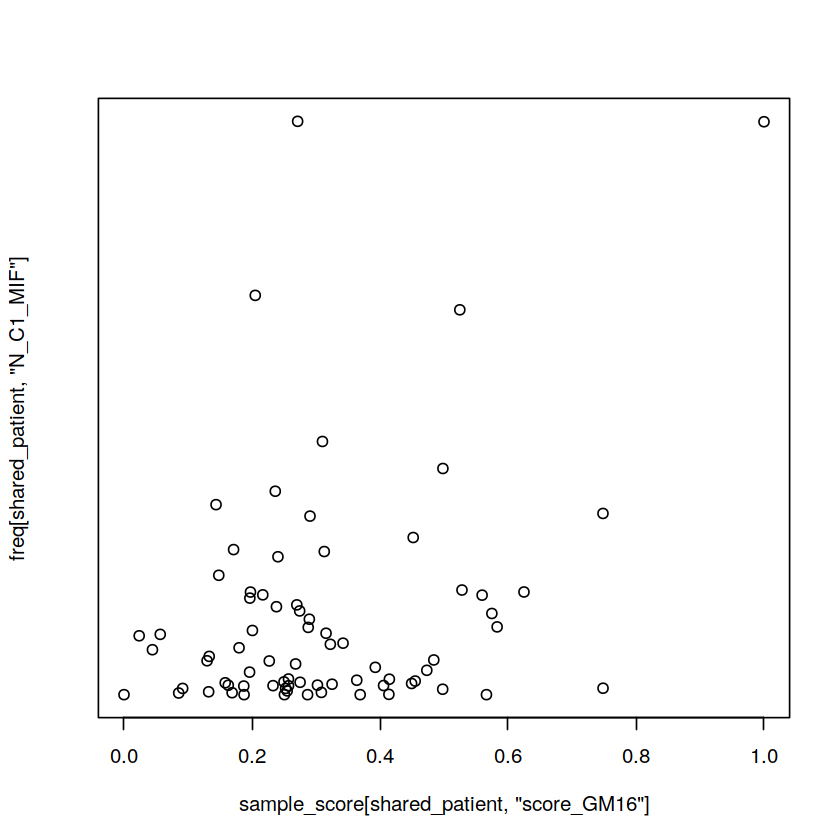

In [36]:
plot(sample_score[shared_patient,"score_GM16"],freq[shared_patient,"N_C1_MIF"])

In [50]:
getwd()

[1] "/home/wyh/scdata/code/r"

In [54]:
pdf("/home/wyh/scdata/submit/figures/GM16_Neu1_ratio.pdf",height = 4,width = 4)
ggscatter(data_plot, x = 'Score', y = 'N_C1_MIF',
            fill ='#8491B4FF',color='darkgrey',size = 2,shape = 21, # Points color, shape and size
            add = "reg.line",# Add regressin line
            add.params = list(color = "#7E6148FF", fill = "#B09C85FF"), # Customize reg. line
            conf.int = TRUE, # Add confidence interval
            cor.coef = T, # Add correlation coefficient. see ?stat_cor
            cor.coeff.args = list(method = "pearson", label.x.npc = "left", label.y.npc = "top",label.sep = "\n"))+xlab('GM16_score')+ylab('Neu1_ratio')
dev.off()

`geom_smooth()` using formula = 'y ~ x'


png 
  2

`geom_smooth()` using formula = 'y ~ x'


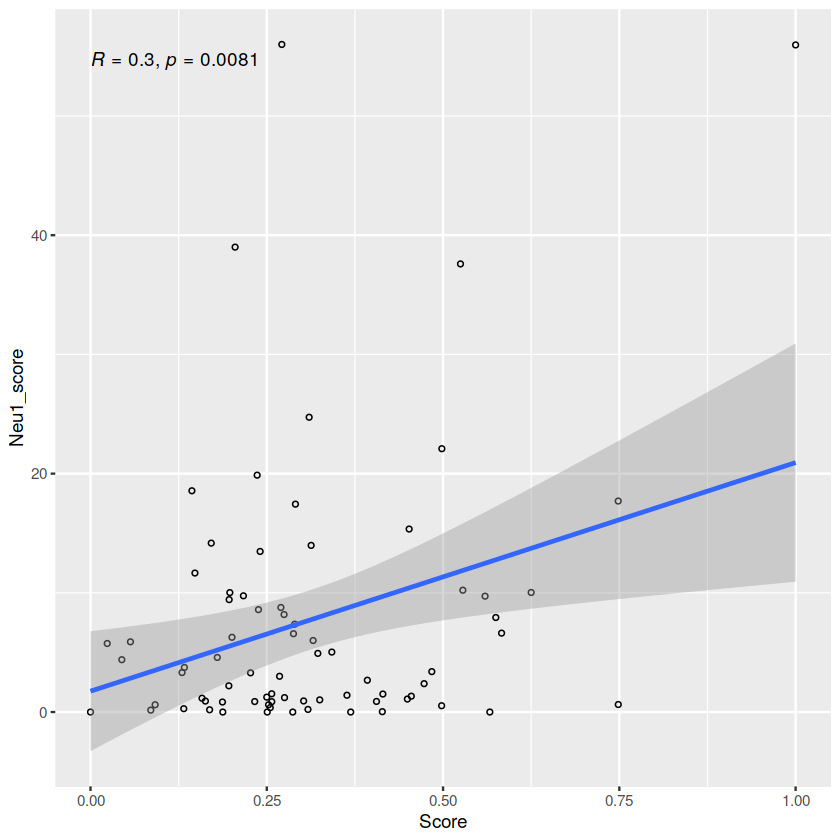

In [48]:
library(ggplot2)
library(ggpubr)
data_plot = data.frame(Score = sample_score[shared_patient,"score_GM16"],
                       N_C1_MIF = as.data.frame(freq[shared_patient,"N_C1_MIF"])[,2])

ggplot(data_plot, aes(Score,N_C1_MIF))+
  geom_point(size=1,shape=1)+
  geom_smooth(method = "lm")+stat_cor( method = "pearson")+ylab("Neu1_score")+

[1] 22.09  6.27 17.44  0.61 11.66 13.47  8.77  0.88  6.57 56.00  0.89  7.37
[13]  0.03  0.53  6.62  5.03 18.56  3.29 37.59  9.43  9.75  3.74 39.00 10.22
[25]  1.51 13.98  8.59  2.20 14.17  0.93  3.00  2.38 10.03 15.35 24.73  0.37
[37] 10.02  0.61  0.87  1.25  4.39 55.96  9.72  0.00  1.53  4.92  1.02 19.87
[49]  3.39  7.93 17.70  8.18  5.89  5.75  2.67  4.58  6.00  0.84  1.21  1.41
[61]  1.09  0.63  0.00  0.19  0.92  0.00  1.33  0.22  0.28  0.16  0.00  3.31
[73]  1.16  0.00  0.00

In [69]:
cor.test(sample_score[shared_patient,"score_GM16"],freq[shared_patient,"N_C1_MIF"])


	Pearson's product-moment correlation

data:  sample_score[shared_patient, "score_GM16"] and freq[shared_patient, "N_C1_MIF"]
t = 2.7221, df = 73, p-value = 0.008106
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 0.0822746 0.4963332
sample estimates:
      cor 
0.3035679 


## 病人特异的亚群的免疫微环境是否有什特别的地方

In [70]:
setwd("/home/wyh/scdata/combined_data/Epithelial/group_compare/")
sample_score = read.csv("/home/wyh/scdata/combined_data/Epithelial//submit/figure_data/heatmap_GM_score.csv",row.names = 1)

In [71]:
patient_shares = read.csv(paste0("/home/wyh/scdata/combined_data/Epithelial/gene_module/adeno_p/share_state/pvalue_patient_shared_state_",23,"GM_",100,"genes.csv"),row.names = 1)

In [72]:
patient_shares[,1]

[1]  1  5  8 16  3  7  6

In [73]:
patient_specific_GM = apply(sample_score[,1:23],2,
                            FUN = function(i){rownames(sample_score)[which(i==max(i))]})[setdiff(c(1:23),patient_shares[,1])]

In [74]:
total = read.csv("/home/wyh/scdata/combined_data/meta_data/total.csv",row.names = 1)
total$a = "NA"
total = total[!(grepl("T_",rownames(total)) | grepl("NK_",rownames(total))),]

In [75]:
shangzhi = read.csv("/home/wyh/scdata/combined_data/meta_data/celltype0104/shangzhi.csv",row.names = 1)
shangzhi = shangzhi[,1:2]
colnames(shangzhi) = c("V1","a")
shangzhi$a = "NA"

In [76]:
total = rbind(total,shangzhi)

In [77]:
patient_specific_subtype = rownames(total)[total<0.625]

In [78]:
celltype_info = readRDS("/home/wyh/scdata/combined_data/meta_data/celltype0104/combined_celltype_include_normal0104.RDS")

In [79]:
orig.ident = lapply(rownames(celltype_info),
    FUN = function(i){
    data_split = unlist(strsplit(i,split = "_"))
    name = paste(data_split[1:(length(data_split)-1)],collapse = '_')
    #name = do.call(data_split[paste,args = data_split[1:(length(data_split)-1)]])
        return(name)
                      })
orig.ident = unlist(orig.ident)
celltype_info$orig.ident = orig.ident
celltype_info = as.data.frame(celltype_info)

In [80]:
length(grep("1$",rownames(celltype_info)))

[1] 0

In [81]:
gene_file = read.csv("/home/wyh/scdata/combined_data/Epithelial/infercnv/gene_position.txt",sep = "",header = FALSE)

In [82]:
rownames(gene_file) = gene_file[,1]

In [83]:
gene_file

V1         V2         V3        V4       
AL627309.1 AL627309.1 chr1         89295    133723  
AL627309.5 AL627309.5 chr1        141474    173862  
AP006222.2 AP006222.2 chr1        266855    268655  
LINC01409  LINC01409  chr1        778747    810065  
FAM87B     FAM87B     chr1        817371    819837  
LINC01128  LINC01128  chr1        825138    868202  
LINC00115  LINC00115  chr1        826206    827522  
FAM41C     FAM41C     chr1        868071    876903  
AL645608.2 AL645608.2 chr1        911435    914948  
LINC02593  LINC02593  chr1        916865    921016  
SAMD11     SAMD11     chr1        923928    944581  
NOC2L      NOC2L      chr1        944203    959309  
KLHL17     KLHL17     chr1        960584    965719  
PLEKHN1    PLEKHN1    chr1        966482    975865  
PERM1      PERM1      chr1        975204    982093  
AL645608.7 AL645608.7 chr1        995966    998051  
HES4       HES4       chr1        998962   1000172  
ISG15      ISG15      chr1       1001138   1014540  
AL645608.1 AL645608.1 chr1       1011997   1013193  
AGRN       AGRN       chr1       1020120   1056118  
RNF223     RNF223     chr1       1070967   1074306  
C1orf159   C1orf159   chr1       1081818   1116361  
AL390719.3 AL390719.3 chr1       1097585   1104598  
LINC01342  LINC01342  chr1       1137017   1144056  
AL390719.2 AL390719.2 chr1       1169357   1170343  
TTLL10-AS1 TTLL10-AS1 chr1       1173056   1179555  
TTLL10     TTLL10     chr1       1173884   1197935  
TNFRSF18   TNFRSF18   chr1       1203508   1206592  
TNFRSF4    TNFRSF4    chr1       1211340   1214153  
SDF4       SDF4       chr1       1216908   1232067  
⋮          ⋮          ⋮          ⋮         ⋮        
AC009119.2 AC009119.2 chr16       83929796  83931223
AC092377.1 AC092377.1 chr16       85345271  85352961
CETN1      CETN1      chr18         580380    582114
AC073539.1 AC073539.1 chr19       22243254  22245347
AC006504.2 AC006504.2 chr19       27849635  27889222
AC005597.1 AC005597.1 chr19       30219666  30228715
AC025809.1 AC025809.1 chr19       31348881  31417794
BSPH1      BSPH1      chr19       47968046  47992170
DEFB127    DEFB127    chr20         157454    159163
AL034548.1 AL034548.1 chr20         267186    268857
CST8       CST8       chr20       23491101  23496010
AL109984.1 AL109984.1 chr20       52072685  52096480
FP475955.1 FP475955.1 chr21        6858539   6897263
CR382287.2 CR382287.2 chr21       10122273  10129029
LINC00308  LINC00308  chr21       22098616  22116605
LINC01692  LINC01692  chr21       24840550  25057746
AP001599.1 AP001599.1 chr21       26889376  26939742
KRTAP20-3  KRTAP20-3  chr21       30642864  30643136
FAM230D    FAM230D    chr22       18178038  18205915
BX324167.2 BX324167.2 chr22       45875932  45879247
FAM47A     FAM47A     chrX        34129756  34132314
LINC01496  LINC01496  chrX        51498490  51511005
PABPC1L2B  PABPC1L2B  chrX        73003517  73005713
NXF2B      NXF2B      chrX       102360396 102439932
CT47A12    CT47A12    chrX       120930250 120932301
CT45A3     CT45A3     chrX       135759846 135768191
CT45A9     CT45A9     chrX       135863418 135871812
VCY1B      VCY1B      chrY        14056227  14056958
AC213203.1 AC213203.1 KI270713.1     35407     35916
OR2G2      OR2G2      chr1       247588360 247589313

In [84]:
gene_file[c("MT1X","MT1E","MT1A","MT1B","MT1F","MT1G"),]

V1   V2    V3       V4      
MT1X MT1X chr16 56682470 56684196
MT1E MT1E chr16 56625475 56627112
MT1A MT1A chr16 56638666 56640087
MT1B MT1B chr16 56651886 56653204
MT1F MT1F chr16 56657731 56660698
MT1G MT1G chr16 56666731 56668065

In [85]:
gene_file[c("CD24","THEMIS","HDDC2","SEC63","ATG5"),]

V1     V2   V3        V4       
CD24   CD24   chr6 106969831 106975627
THEMIS THEMIS chr6 127708072 127918631
HDDC2  HDDC2  chr6 125219962 125302078
SEC63  SEC63  chr6 107867756 107958208
ATG5   ATG5   chr6 106045423 106325791

In [86]:
celltype_info$subtype = as.character(celltype_info$subtype)

In [87]:
table(celltype_info[celltype_info$orig.ident=="GBC_051_P",]$subtype)


                      B_C0_GPR183+                         B_C1_naive 
                                12                                  8 
                B_C10_GPR183/MT2A+                       B_C11_RGS13+ 
                               500                                 10 
                         C4_Unknow                DC_C0_cDC2_CLEC10A+ 
                                 7                                 16 
DC_C1_cDC2_CLEC10A/FCGBP/PPP1R14A-                  DC_C2_cDC3_FSCN1+ 
                                 4                                  6 
              DC_C4_cDC2_PPP1R14A+                    DC_C7_cDC3_CA2+ 
                                30                                  1 
               EC_C0/8_Vein_ACKR1+               EC_C1_Capillary_KDR+ 
                                10                                  6 
                  EC_C2_Tip_CXCR4+                 EC_C3_Artery_GJA5+ 
                                13                                 12 
     

In [88]:
patient_specific_TME_num = as.data.frame.array(table(celltype_info[celltype_info$subtype %in% patient_specific_subtype,][,c('orig.ident',"subtype")]))

In [89]:
patient_TME_num = as.data.frame.array(table(celltype_info[,c('orig.ident',"subtype")]))

In [90]:
total["N_C2_IFIT1/2/3+",]

V1        a 
N_C2_IFIT1/2/3+ 0.7061345 NA

In [85]:
write.csv(t(patient_specific_TME_num['GBC_015_P',]),"/home/wyh/scdata/combined_data/Epithelial/patient_specific/GBC_015_P.csv")

In [98]:
write.csv(t(patient_specific_TME_num[patient_specific_GM,]),"/home/wyh/scdata/combined_data/Epithelial/patient_specific/patient_specific_GM.csv")

In [91]:
patient_specific_GM

score_GM2   score_GM4   score_GM9  score_GM10  score_GM11  score_GM12 
"GBC_036_P" "GBC_015_P" "GBC_030_P" "GBC_063_P" "GBC_087_P" "GBC_007_P" 
 score_GM13  score_GM14  score_GM15  score_GM17  score_GM18  score_GM19 
"GBC_071_P" "GBC_083_P" "GBC_064_P" "GBC_084_P" "GBC_065_P" "GBC_072_P" 
 score_GM20  score_GM21  score_GM22  score_GM23 
"GBC_020_P" "GBC_028_P" "GBC_051_P" "GBC_024_P"

In [97]:
write.csv(t(patient_TME_num['GBC_015_P',]),"/home/wyh/scdata/combined_data/Epithelial/patient_specific/GBC_015_P_all_num.csv")

In [86]:
write.csv((patient_specific_TME_num["T_CD8+_C19_CD24+"]),"/home/wyh/scdata/combined_data/Epithelial/patient_specific/T_CD8+_C19_CD24.csv")

In [53]:
patient_specific_TME = apply(patient_specific_TME_num,2,
                            FUN = function(i){rownames(patient_specific_TME_num)[which(i==max(i))]})

In [ ]:
patient_specific_TME

B_C10_GPR183/MT2A+         B_C6_GPR183/APOE+         DC_C3_cDC2_FCGBP+ 
                "XGC_005"                 "XGC_004"               "GBC_046_P" 
              F_C10_MT1X+               F_C14_VCAN+              F_C5_IGFBP2+ 
              "GBC_011_P"               "GBC_004_P"              "GBC_028_OM" 
               F_C6_CCN5+               F_C7_KRT19+                F_C8_MMP1+ 
                "XGC_008"               "GBC_012_P"                 "XGC_011" 
            M_C6_CYP27A1+                M_C8_CTSK+      NK_C10_HLA-DRA/CD74+ 
                "XGC_004"               "GBC_038_P"               "GBC_002_P" 
            NK_C11_TGFB1+               NK_C5_IFI6+               NK_C9_GZMK+ 
              "GBC_028_P"              "GBC_074_LI"              "GBC_017_LI" 
          NKT_C7_S100A13+        Plasma_C12_IgG_SHM        Plasma_C13_IgM_SHM 
             "GBC_001_LI"               "GBC_083_P"               "GBC_083_P" 
        Plasma_C9_IgA_SHM           T_CD4+_C6_APOE+         T_CD4+_C9_COL1A1+ 
              "GBC_084_P"                 "XGC_004"                 "XGC_008" 
         T_CD8+_C10_SPP1+  T_CD8+_C13_CXCL13/PDCD1+       T_CD8+_C14_Unassign 
              "GBC_004_P"              "GBC_071_LI"               "GBC_023_P" 
T_CD8+_C15_COL1A1/COL1A2+          T_CD8+_C16_GNLY+   T_CD8+_C18_IFIT1/IFIT2+ 
                "XGC_011"               "GBC_002_P"                  "CC_004" 
         T_CD8+_C19_CD24+        T_CD8+_C20_HAVCR2+     T_CD8+_C4_IFI27/IFI6+ 
              "GBC_051_P"               "GBC_042_P"              "GBC_074_LI" 
       T_CD8+_C5_TNFRSF9+           T_CD8+_C7_APOE+ 
             "GBC_058_LI"                 "XGC_004"

In [89]:
write.csv(patient_specific_TME,"/home/wyh/scdata/combined_data/Epithelial/patient_specific/patient_specific_TME.csv")

In [92]:
write.csv(patient_specific_GM,"/home/wyh/scdata/combined_data/Epithelial/patient_specific/patient_specific_GMV2.csv")

In [55]:
patient_intersect = intersect(patient_specific_TME,patient_specific_GM)
patient_intersect

[1] "GBC_028_P" "GBC_083_P" "GBC_084_P" "GBC_051_P"

In [ ]:
patient_specific_GM

score_GM2   score_GM4   score_GM9  score_GM10  score_GM11  score_GM12 
"GBC_036_P" "GBC_015_P" "GBC_030_P" "GBC_063_P" "GBC_087_P" "GBC_007_P" 
 score_GM13  score_GM14  score_GM15  score_GM17  score_GM18  score_GM19 
"GBC_071_P" "GBC_083_P" "GBC_064_P" "GBC_084_P" "GBC_065_P" "GBC_072_P" 
 score_GM20  score_GM21  score_GM22  score_GM23 
"GBC_020_P" "GBC_028_P" "GBC_051_P" "GBC_024_P"

In [84]:
length(patient_specific_GM)

[1] 16

In [58]:
total["NK_C11_TGFB1+",]

V1        a 
NK_C11_TGFB1+ 0.4735591 NA

## GM之间的相关性

In [417]:
celltype_all = readRDS("/home/wyh/scdata/combined_data/meta_data/celltype0104/combined_celltype_include_normal0104.RDS")

In [418]:
program_num = 23
ngenes = 100
#celltype_info = read.csv(paste0("/home/wyh/scdata/combined_data/Epithelial/gene_module/adeno/patient_GM_score_",program_num,"GM_100genes.csv"),row.names = 1)
celltype_info = read.csv(paste0("/home/wyh/scdata/combined_data/Epithelial/gene_module/adeno_p/normalize/patient_GM_score_",program_num,"GM_",ngenes,"genes.csv"),row.names = 1)
colnames(celltype_info) = paste0("score_GM",1:program_num)
orig.ident = lapply(rownames(celltype_info),
    FUN = function(i){
    data_split = unlist(strsplit(i,split = "_"))
    name = paste(data_split[1:(length(data_split)-1)],collapse = '_')
    #name = do.call(data_split[paste,args = data_split[1:(length(data_split)-1)]])
        return(name)
                      })
orig.ident = unlist(orig.ident)
celltype_info$orig.ident = orig.ident
celltype_info = as.data.frame(celltype_info)
celltype_info$barcode = rownames(celltype_info)

In [420]:
celltype_info = celltype_info[,shared_state]

In [421]:
celltype_info_cor = cor(celltype_info)

In [422]:
celltype_info_cor

score_GM1   score_GM5   score_GM8   score_GM16  score_GM3   
score_GM1   1.00000000 -0.08756667  0.04505651  0.39726195 -0.244410899
score_GM5  -0.08756667  1.00000000 -0.65029736  0.06362762 -0.108374654
score_GM8   0.04505651 -0.65029736  1.00000000 -0.15453586  0.103408043
score_GM16  0.39726195  0.06362762 -0.15453586  1.00000000 -0.206928552
score_GM3  -0.24441090 -0.10837465  0.10340804 -0.20692855  1.000000000
score_GM7   0.08617193 -0.22323287 -0.01875280  0.01194253  0.085053736
score_GM6   0.42831902 -0.26319946  0.15229510  0.16695829  0.001300447
           score_GM7   score_GM6   
score_GM1   0.08617193  0.428319019
score_GM5  -0.22323287 -0.263199458
score_GM8  -0.01875280  0.152295097
score_GM16  0.01194253  0.166958286
score_GM3   0.08505374  0.001300447
score_GM7   1.00000000  0.588952338
score_GM6   0.58895234  1.000000000

In [427]:
pheatmap(celltype_info_cor,file = "../submit/figure/GM_corr.pdf",height = 10,wight = 12)

In [104]:
setwd("/home/wyh/scdata/combined_data/Epithelial/group_compare/")
sample_score = read.csv("../submit/figure_data/heatmap_GM_score.csv",row.names = 1)

In [105]:
shared_state = read.csv("/home/wyh/scdata/combined_data/Epithelial/gene_module/adeno_p/share_state/pvalue_patient_shared_state_23GM_100genes.csv",row.names = 1)[,1]

In [106]:
shared_state

[1]  1  5  8 16  3  7  6

In [107]:
sample_score_shared = sample_score[,shared_state]

In [108]:
sample_score_shared_cor = cor(sample_score_shared)

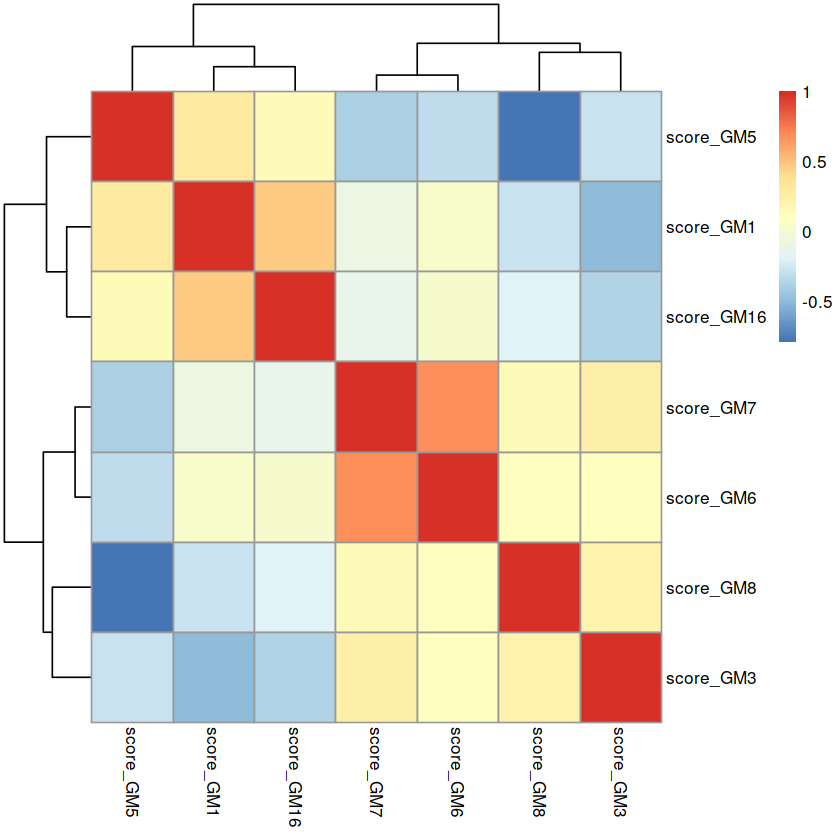

In [109]:
pheatmap::pheatmap(sample_score_shared_cor)

## 随机实验计算p-value，比较鲁棒

In [160]:
# 计算share的状态并且将share的状态分组比较

patient_info = read.csv("/home/wyh/scdata/patient_info/xzh_220109_final_wyh_220426.csv",row.names = 1)
patient_info$orig.ident = patient_info$NewSample.ID

patient_info$metastasis.type[patient_info$metastasis.type %in% c("P","P_LI")] = "P"
patient_info$metastasis.type = factor(patient_info$metastasis.type, levels = c("P","P_LN","P_LM"))
patient_info$progression.type.short = factor(patient_info$progression.type.short, levels = c("Inflam","Proli","Mix","None"))



ngenes = 100
# K_range = c(23,26,32,36,44,46)
K_range = c(23)

premutation_time = 500
for(K in K_range){
    program_num = K
    program_score = matrix(0,nrow = K,ncol = premutation_time+1)
    #celltype_info = read.csv(paste0("/home/wyh/scdata/combined_data/Epithelial/gene_module/adeno/patient_GM_score_",program_num,"GM_100genes.csv"),row.names = 1)
    celltype_info = read.csv(paste0("/home/wyh/scdata/combined_data/Epithelial/gene_module/adeno_p/normalize/patient_GM_score_",program_num,"GM_",ngenes,"genes.csv"),row.names = 1)
    colnames(celltype_info) = paste0("score_GM",1:program_num)
    orig.ident = lapply(rownames(celltype_info),
        FUN = function(i){
        data_split = unlist(strsplit(i,split = "_"))
        name = paste(data_split[1:(length(data_split)-1)],collapse = '_')
        #name = do.call(data_split[paste,args = data_split[1:(length(data_split)-1)]])
            return(name)
                          })
    orig.ident = unlist(orig.ident)
    celltype_info$orig.ident = orig.ident
    celltype_info = as.data.frame(celltype_info)
    celltype_info$barcode = rownames(celltype_info)
    for(isample_time in 1:(premutation_time+1)){
        if(isample_time==(premutation_time+1)){
            celltype_info$orig.ident_new = celltype_info$orig.ident
        }else{
            celltype_info$orig.ident_new = sample(celltype_info$orig.ident,length(celltype_info$orig.ident))
        }
       
        # 计算得分
        GM_index = c(1:program_num)
        sample_score = array(0,dim = c(length(unique(celltype_info$orig.ident_new)),ncol(celltype_info)-3),dimnames = list(unique(celltype_info$orig.ident_new),paste0("score_GM",GM_index)))
        for(iGM in paste0("score_GM",GM_index)){
            data_analysis = celltype_info[,c(iGM,"orig.ident_new")]
            colnames(data_analysis) = c("GM","orig.ident_new")
            score_summary = setDT(data_analysis)[,list(Mean=mean(GM), Max=max(GM), Min=min(GM), Median=as.numeric(median(GM)), Std=sd(GM)), by=orig.ident_new]
            score_summary = as.data.frame(score_summary)
            rownames(score_summary) = score_summary[,"orig.ident_new"]
            sample_score[rownames(score_summary),iGM] = score_summary[,"Mean"]
        }
        sample_score = as.data.frame(sample_score)
        #colnames(sample_score) = c("score_GM1_E2F","score_GM2_G2M","score_GM3_Metal","score_GM4_Glandular","score_GM5_cEMT","score_GM6_Interferon","score_GM7_Hypoxia","score_GM8_P53")
        sample_score$NewSample.ID = rownames(sample_score)

        # 先把得分归一化一下到0-1的范围，减去最小值，除以范围，再计算IQR
        myfun = function(i){
            i = (i-min(i))/(max(i)-min(i))
        }

        for(i in 1:program_num){
            sample_score[,i] = myfun(sample_score[,i])
        }

        program_score[,isample_time] = apply(sample_score[,1:program_num],MARGIN = 2,FUN = IQR)
        
    }
    rownames(program_score) = paste0("score_GM",c(1:K))
    program_score = as.data.frame(program_score)
    score_pvalue = c()
    for(iGM in 1:K){
        gene_module = paste0("score_GM",iGM)
        score_pvalue[iGM] = sum(program_score[gene_module,1:premutation_time]>program_score[gene_module,(premutation_time+1)])/premutation_time
    }
    names(score_pvalue) =  paste0("score_GM",1:K)
    score_pvalue = sort(score_pvalue)
    patient_shares = names(score_pvalue[score_pvalue<=0.05])
    patient_shares = gsub("score_GM","",patient_shares)
    patient_shares = as.numeric(patient_shares)
    write.csv(score_pvalue,paste0("/home/wyh/scdata/combined_data/Epithelial/gene_module/adeno_p/share_state/pvalue_score_",program_num,"GM_",ngenes,"genes.csv"))  

    write.csv(patient_shares,paste0("/home/wyh/scdata/combined_data/Epithelial/gene_module/adeno_p/share_state/pvalue_patient_shared_state_",program_num,"GM_",ngenes,"genes.csv")) 

    
    sample_score$NewSample.ID = rownames(sample_score)
    fibroblast_ratio_all = left_join(sample_score,patient_info[rownames(sample_score),])

    #fibroblast_ratio_all = fibroblast_ratio_all[fibroblast_ratio_all$Tumors.for.scRNA.seq.short=="P",]
    #fibroblast_ratio_all = fibroblast_ratio_all[fibroblast_ratio_all$histological.type.short %in% "adeno",]

    fibroblast_ratio_all$number =  as.data.frame.array(table(celltype_info$orig.ident))[fibroblast_ratio_all$NewSample.ID,]
    fibroblast_ratio_all$orig.ident = fibroblast_ratio_all$NewSample.ID
    rownames(fibroblast_ratio_all) = fibroblast_ratio_all$orig.ident
    fibroblast_little_patient = rownames(fibroblast_ratio_all)[fibroblast_ratio_all$number<50]

    fibroblast_ratio_all = fibroblast_ratio_all[!fibroblast_ratio_all$orig.ident %in% fibroblast_little_patient,]
    
    
    fibroblast_ratio = fibroblast_ratio_all[fibroblast_ratio_all$Tumors.for.scRNA.seq.short=="P",]
    fibroblast_ratio = fibroblast_ratio[fibroblast_ratio$histological.type.short %in% "adeno",]
    data_plot = fibroblast_ratio[,c(paste0("score_GM",patient_shares),"metastasis.type")]
    data_plot_melt = reshape2::melt(data_plot)
    colnames(data_plot_melt) = c("metastasis.type","variable","Freq")

    pdf(paste0("/home/wyh/scdata/combined_data//Epithelial/group_compare/adeno_p/pvalue_adeno_epithelial_metastasis.type_",program_num,"_",ngenes,"genes.pdf"),width = 30,height = 5)
    print(ggplot(data_plot_melt, aes( y=Freq, x=metastasis.type)) + geom_boxplot()+facet_grid(. ~variable)+
        theme(axis.text.x = element_text(angle = 45, hjust = 1, vjust = 1,color="black"),
             axis.text.y = element_text(color="black"),
             axis.title=element_text())+ggtitle("")+
          stat_compare_means(comparisons = list(
       c("P","P_LN"),c("P","P_LM"),c("P_LN","P_LM")
      ),method = "wilcox.test",label="p.signif"))
    dev.off()
    
}


Joining, by = "NewSample.ID"
Using metastasis.type as id variables



In [63]:
celltype_info = read.csv(paste0("/home/wyh/scdata/combined_data/Epithelial/gene_module/adeno_p/normalize/patient_GM_score_","23","GM_","100","genes.csv"),row.names = 1)


In [158]:
pdf(paste0("/home/wyh/scdata/combined_data//Epithelial/group_compare/adeno_p/pvalue_adeno_epithelial_metastasis.type_",program_num,"_",ngenes,"genes.pdf"),width = 30,height = 5)
    print(ggplot(data_plot_melt, aes( y=Freq, x=metastasis.type)) + geom_boxplot()+facet_grid(. ~variable)+
        theme(axis.text.x = element_text(angle = 45, hjust = 1, vjust = 1,color="black"),
             axis.text.y = element_text(color="black"),
             axis.title=element_text())+ggtitle("")+
          stat_compare_means(comparisons = list(
       c("P","P_LN"),c("P","P_LM"),c("P_LN","P_LM")
      ),method = "wilcox.test",label="p.signif"))
    dev.off()

png 
  2

In [159]:
patient_shares = names(score_pvalue[score_pvalue<=0.07])
patient_shares = gsub("score_GM","",patient_shares)
patient_shares = as.numeric(patient_shares)
write.csv(score_pvalue,paste0("/home/wyh/scdata/combined_data/Epithelial/gene_module/adeno_p/share_state/pvalue_score_",program_num,"GM_",ngenes,"genes.csv"))  

write.csv(patient_shares,paste0("/home/wyh/scdata/combined_data/Epithelial/gene_module/adeno_p/share_state/pvalue_patient_shared_state_",program_num,"GM_",ngenes,"genes.csv")) 


In [153]:
score_pvalue = c()
for(iGM in 1:K){
    gene_module = paste0("score_GM",iGM)
    score_pvalue[iGM] = sum(program_score[gene_module,2:(premutation_time+1)]>program_score[gene_module,1])/premutation_time
}
names(score_pvalue) =  paste0("score_GM",1:K)
score_pvalue = sort(score_pvalue)
patient_shares = names(score_pvalue[score_pvalue<=0.05])
patient_shares = gsub("score_GM","",patient_shares)
patient_shares = as.numeric(patient_shares)
write.csv(score_pvalue,paste0("/home/wyh/scdata/combined_data/Epithelial/gene_module/adeno_p/share_state/pvalue_score_",program_num,"GM_",ngenes,"genes.csv"))  

write.csv(patient_shares,paste0("/home/wyh/scdata/combined_data/Epithelial/gene_module/adeno_p/share_state/pvalue_patient_shared_state_",program_num,"GM_",ngenes,"genes.csv")) 

sample_score$NewSample.ID = rownames(sample_score)
fibroblast_ratio_all = left_join(sample_score,patient_info[rownames(sample_score),])

#fibroblast_ratio_all = fibroblast_ratio_all[fibroblast_ratio_all$Tumors.for.scRNA.seq.short=="P",]
#fibroblast_ratio_all = fibroblast_ratio_all[fibroblast_ratio_all$histological.type.short %in% "adeno",]

fibroblast_ratio_all$number =  as.data.frame.array(table(celltype_info$orig.ident))[fibroblast_ratio_all$NewSample.ID,]
fibroblast_ratio_all$orig.ident = fibroblast_ratio_all$NewSample.ID
rownames(fibroblast_ratio_all) = fibroblast_ratio_all$orig.ident
fibroblast_little_patient = rownames(fibroblast_ratio_all)[fibroblast_ratio_all$number<50]

fibroblast_ratio_all = fibroblast_ratio_all[!fibroblast_ratio_all$orig.ident %in% fibroblast_little_patient,]


fibroblast_ratio = fibroblast_ratio_all[fibroblast_ratio_all$Tumors.for.scRNA.seq.short=="P",]
fibroblast_ratio = fibroblast_ratio[fibroblast_ratio$histological.type.short %in% "adeno",]
data_plot = fibroblast_ratio[,c(paste0("score_GM",patient_shares),"metastasis.type")]
data_plot_melt = reshape2::melt(data_plot)
colnames(data_plot_melt) = c("metastasis.type","variable","Freq")

pdf(paste0("/home/wyh/scdata/combined_data//Epithelial/group_compare/adeno_p/pvalue_adeno_epithelial_metastasis.type_",program_num,"_",ngenes,"genes.pdf"),width = 30,height = 5)
print(ggplot(data_plot_melt, aes( y=Freq, x=metastasis.type)) + geom_boxplot()+facet_grid(. ~variable)+
    theme(axis.text.x = element_text(angle = 45, hjust = 1, vjust = 1,color="black"),
         axis.text.y = element_text(color="black"),
         axis.title=element_text())+ggtitle("")+
      stat_compare_means(comparisons = list(
   c("P","P_LN"),c("P","P_LM"),c("P_LN","P_LM")
  ),method = "wilcox.test",label="p.signif"))
dev.off()

Joining, by = "NewSample.ID"
Using metastasis.type as id variables



png 
  2

In [139]:
program_score

V1         V2         V3         V4         V5         V6        
score_GM1  0.21898016 0.06828777 0.06461583 0.11524706 0.09630161 0.06524578
score_GM2  0.04689163 0.08791740 0.14652998 0.15897942 0.06607626 0.06928156
score_GM3  0.16706632 0.05835057 0.09168225 0.06571277 0.11770524 0.10078579
score_GM4  0.03713953 0.08115137 0.08838999 0.07175369 0.04024705 0.11164028
score_GM5  0.26025871 0.05563755 0.06531707 0.07121683 0.06713604 0.11706134
score_GM6  0.13920938 0.05468769 0.15698845 0.10455386 0.07942145 0.10236925
score_GM7  0.14685922 0.14544779 0.03947162 0.07811800 0.06286784 0.08822650
score_GM8  0.42623628 0.05992252 0.08774933 0.06465087 0.08296204 0.13536809
score_GM9  0.03801301 0.12816717 0.08405363 0.12136259 0.10921208 0.07877542
score_GM10 0.07864926 0.09880687 0.10558703 0.11957449 0.18288789 0.11338318
score_GM11 0.05234676 0.07800198 0.04859594 0.07147450 0.03324435 0.06979329
score_GM12 0.05181131 0.09944135 0.06833764 0.07276831 0.09004774 0.09124610
score_GM13 0.01542244 0.03366602 0.07851462 0.14470880 0.16982874 0.06811959
score_GM14 0.09632867 0.14117258 0.07779742 0.06911329 0.09706764 0.04805515
score_GM15 0.04861003 0.08127939 0.08101810 0.12026828 0.06411781 0.11421881
score_GM16 0.19215858 0.05307996 0.10894680 0.10511983 0.08514524 0.05920406
score_GM17 0.06035062 0.12681272 0.09333909 0.07658485 0.07651998 0.06033498
score_GM18 0.08925475 0.08025373 0.05683084 0.07968721 0.07765773 0.11811114
score_GM19 0.07910397 0.09672511 0.05454133 0.08402999 0.05235443 0.13599321
score_GM20 0.09176279 0.10382242 0.07972815 0.08198140 0.06420048 0.08041307
score_GM21 0.09944535 0.04731575 0.14217764 0.09292691 0.10898786 0.05796366
score_GM22 0.04480105 0.08853868 0.13534809 0.05514164 0.04863801 0.10038481
score_GM23 0.03382091 0.14657708 0.07681925 0.08001957 0.10213369 0.10928974
           V7         V8         V9         V10        ⋯ V192       V193      
score_GM1  0.09140569 0.10900008 0.11177541 0.06539042 ⋯ 0.09852844 0.07494065
score_GM2  0.07948200 0.12105943 0.10844330 0.08100624 ⋯ 0.12468754 0.11616232
score_GM3  0.08463164 0.06549288 0.12228503 0.12848104 ⋯ 0.10640486 0.09175934
score_GM4  0.09543902 0.12726404 0.18353913 0.07391383 ⋯ 0.07895934 0.10657445
score_GM5  0.05287695 0.08597809 0.10465630 0.09355887 ⋯ 0.04734916 0.03918729
score_GM6  0.07112942 0.10019638 0.06921330 0.09019587 ⋯ 0.11305873 0.06382830
score_GM7  0.07890609 0.09327962 0.08486977 0.15343677 ⋯ 0.17492063 0.04917129
score_GM8  0.04625307 0.10286987 0.15194518 0.07239274 ⋯ 0.11016035 0.10308797
score_GM9  0.09296620 0.08394009 0.08275222 0.10615769 ⋯ 0.13725063 0.06386255
score_GM10 0.12738611 0.12479160 0.04095655 0.09916253 ⋯ 0.07718965 0.13778301
score_GM11 0.07293498 0.14624327 0.15224697 0.08825921 ⋯ 0.06859659 0.11380147
score_GM12 0.09247681 0.11806769 0.10491712 0.12966914 ⋯ 0.07873025 0.06846704
score_GM13 0.16068164 0.10181195 0.14842041 0.08941426 ⋯ 0.12049647 0.12232968
score_GM14 0.08579881 0.08415785 0.08919051 0.15126162 ⋯ 0.12947583 0.09965778
score_GM15 0.10993458 0.10092532 0.17227742 0.05490992 ⋯ 0.05364411 0.08536003
score_GM16 0.07826518 0.06896062 0.09086234 0.20918864 ⋯ 0.07318102 0.08539572
score_GM17 0.08327670 0.19872045 0.05579895 0.07070843 ⋯ 0.11290304 0.10775519
score_GM18 0.09699926 0.07961955 0.07690027 0.06905707 ⋯ 0.08660161 0.06757380
score_GM19 0.15028151 0.09025389 0.11234520 0.08742192 ⋯ 0.07962578 0.07340960
score_GM20 0.04230637 0.09079811 0.05898508 0.14303191 ⋯ 0.10971099 0.11859870
score_GM21 0.08189228 0.09045544 0.09850541 0.10402990 ⋯ 0.07070012 0.07628951
score_GM22 0.05148812 0.06471653 0.10976011 0.10295945 ⋯ 0.06145596 0.09519399
score_GM23 0.11700602 0.09235438 0.09508824 0.07368548 ⋯ 0.09964348 0.09816578
           V194       V195       V196       V197       V198       V199      
score_GM1  0.06137446 0.03522157 0.11201179 0.08654634 0.08393262 0.05098722
score_GM2  0.04506948 0.12410499 0.06734380 0.17445697 0.08994902 0.06246800
score_GM3  0.08576514 0.11363642 0.1

In [147]:
score_pvalue = c()
for(iGM in 1:K){
    gene_module = paste0("score_GM",iGM)
    score_pvalue[iGM] = sum(program_score[gene_module,2:(premutation_time+1)]>program_score[gene_module,1])/premutation_time
}
names(score_pvalue) =  paste0("score_GM",1:K)
score_pvalue
patient_shares = names(score_pvalue[score_pvalue<=0.05])

patient_shares

score_GM1  score_GM2  score_GM3  score_GM4  score_GM5  score_GM6  score_GM7 
     0.000      0.940      0.005      0.975      0.000      0.085      0.040 
 score_GM8  score_GM9 score_GM10 score_GM11 score_GM12 score_GM13 score_GM14 
     0.000      0.970      0.700      0.945      0.920      1.000      0.425 
score_GM15 score_GM16 score_GM17 score_GM18 score_GM19 score_GM20 score_GM21 
     0.960      0.010      0.885      0.475      0.620      0.470      0.370 
score_GM22 score_GM23 
     0.935      0.970

[1] "score_GM1"  "score_GM3"  "score_GM5"  "score_GM7"  "score_GM8" 
[6] "score_GM16"

In [142]:
sum(program_score[gene_module,2:(premutation_time+1)]>program_score[gene_module,1])

[1] 194

In [89]:
apply(sample_score[,1:program_num],MARGIN = 2,FUN = IQR)

score_GM1  score_GM2  score_GM3  score_GM4  score_GM5  score_GM6  score_GM7 
0.21898016 0.04689163 0.16706632 0.03713953 0.26025871 0.13920938 0.14685922 
 score_GM8  score_GM9 score_GM10 score_GM11 score_GM12 score_GM13 score_GM14 
0.42623628 0.03801301 0.07864926 0.05234676 0.05181131 0.01542244 0.09632867 
score_GM15 score_GM16 score_GM17 score_GM18 score_GM19 score_GM20 score_GM21 
0.04861003 0.19215858 0.06035062 0.08925475 0.07910397 0.09176279 0.09944535 
score_GM22 score_GM23 
0.04480105 0.03382091

In [123]:
program_score = read.csv(paste0("/home/wyh/scdata/combined_data/Epithelial/gene_module/adeno_p/share_state/program_score_",program_num,"GM_",ngenes,"genes.csv"),row.names = 1)

In [120]:
program_score_permutation = program_score


In [134]:
 score_pvalue = c()
    for(iGM in 1:K){
        gene_module = paste0("score_GM",i)
        score_pvalue[gene_module] = sum(program_score[gene_module,2:(premutation_time+1)]>program_score[gene_module,1])/premutation_time
    }
score_pvalue

score_GM23 
      0.97

In [122]:
dim(program_score_permutation)

[1]  23 500

In [129]:
score_pvalue = c()
for(i in 1:K){
    gene_module = paste0("score_GM",i)
    score_pvalue[gene_module] = sum(program_score_permutation[gene_module,1:100]>program_score[gene_module,1])/100
}
score_pvalue

score_GM1  score_GM2  score_GM3  score_GM4  score_GM5  score_GM6  score_GM7 
      0.00       0.97       0.01       0.97       0.00       0.03       0.04 
 score_GM8  score_GM9 score_GM10 score_GM11 score_GM12 score_GM13 score_GM14 
      0.00       1.00       0.74       0.89       0.89       1.00       0.35 
score_GM15 score_GM16 score_GM17 score_GM18 score_GM19 score_GM20 score_GM21 
      0.97       0.00       0.86       0.34       0.55       0.49       0.30 
score_GM22 score_GM23 
      0.88       0.99

In [128]:
names(score_pvalue) = paste0("score_GM",1:K)
score_pvalue = sort(score_pvalue,decreasing = TRUE)
score_pvalue

score_GM9 score_GM13 score_GM23  score_GM2  score_GM4 score_GM15 score_GM11 
      1.00       1.00       0.99       0.97       0.97       0.97       0.89 
score_GM12 score_GM22 score_GM17 score_GM10 score_GM19 score_GM20 score_GM14 
      0.89       0.88       0.86       0.74       0.55       0.49       0.35 
score_GM18 score_GM21  score_GM7  score_GM6  score_GM3  score_GM1  score_GM5 
      0.34       0.30       0.04       0.03       0.01       0.00       0.00 
 score_GM8 score_GM16 
      0.00       0.00

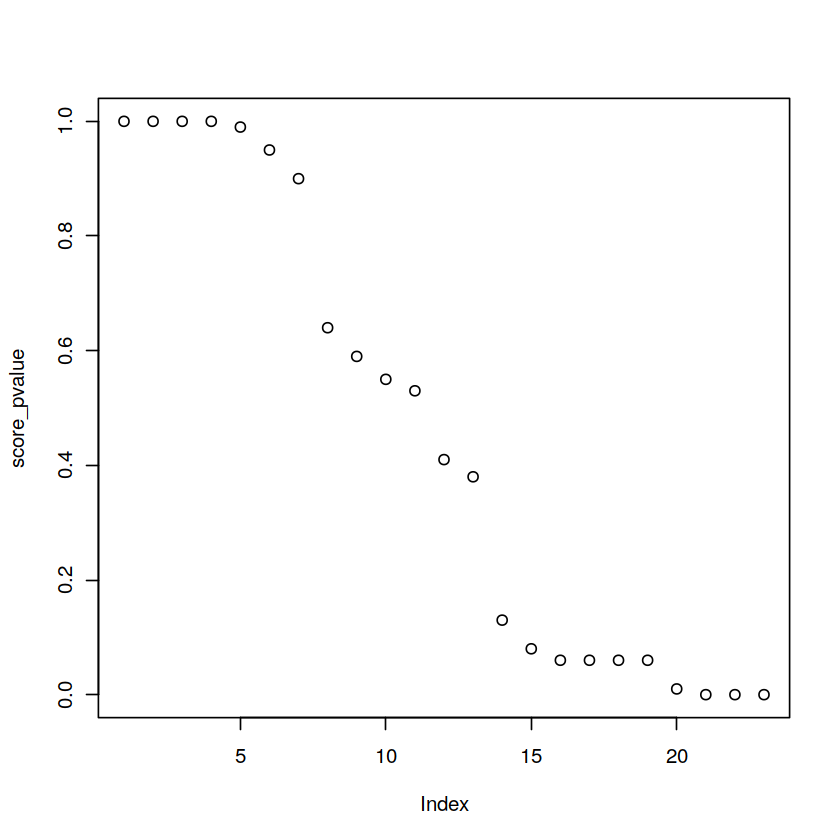

In [116]:
plot(score_pvalue)

In [104]:
sum(score_pvalue>0.05)

[1] 11

In [37]:
program_score["score_GM1",1]

[1] 0.2189802

In [18]:
program_score = apply(sample_score[,1:program_num],MARGIN = 2,FUN = IQR)
program_score

score_GM1  score_GM2  score_GM3  score_GM4  score_GM5  score_GM6  score_GM7 
0.21898016 0.04689163 0.16706632 0.03713953 0.26025871 0.13920938 0.14685922 
 score_GM8  score_GM9 score_GM10 score_GM11 score_GM12 score_GM13 score_GM14 
0.42623628 0.03801301 0.07864926 0.05234676 0.05181131 0.01542244 0.09632867 
score_GM15 score_GM16 score_GM17 score_GM18 score_GM19 score_GM20 score_GM21 
0.04861003 0.19215858 0.06035062 0.08925475 0.07910397 0.09176279 0.09944535 
score_GM22 score_GM23 
0.04480105 0.03382091

In [35]:
setwd("/home/wyh/scdata/combined_data/Epithelial/group_compare/")

In [179]:
celltype_info = read.csv(paste0("/home/wyh/scdata/combined_data/Epithelial/gene_module/adeno/patient_GM_score_",program_num,"GM_100genes.csv"),row.names = 1)

In [304]:
head(celltype_info)

score_GM1 score_GM2 score_GM3 score_GM4 score_GM5
GBC_035_P_CTGTACCCATGCGGTC 0         0         0         0.000000  0        
GBC_043_P_AATGGCTAGAATGTTG 0         0         0         2.845343  0        
GBC_043_P_AATTTCCTCGGAATGG 0         0         0         0.000000  0        
GBC_043_P_ACGTCCTCACTGGACC 0         0         0         0.000000  0        
GBC_043_P_ATATCCTTCGCGGTAC 0         0         0         0.000000  0        
GBC_043_P_ATGAGTCCACCAAATC 0         0         0         3.437866  0        
                           score_GM6 score_GM7 score_GM8 score_GM9 score_GM10
GBC_035_P_CTGTACCCATGCGGTC 1.903266  0         0         0         0         
GBC_043_P_AATGGCTAGAATGTTG 0.000000  0         0         0         0         
GBC_043_P_AATTTCCTCGGAATGG 0.000000  0         0         0         0         
GBC_043_P_ACGTCCTCACTGGACC 0.000000  0         0         0         0         
GBC_043_P_ATATCCTTCGCGGTAC 0.000000  0         0         0         0         
GBC_043_P_ATGAGTCCACCAAATC 0.000000  0         0         0         0         
                           orig.ident barcode                   
GBC_035_P_CTGTACCCATGCGGTC GBC_035_P  GBC_035_P_CTGTACCCATGCGGTC
GBC_043_P_AATGGCTAGAATGTTG GBC_043_P  GBC_043_P_AATGGCTAGAATGTTG
GBC_043_P_AATTTCCTCGGAATGG GBC_043_P  GBC_043_P_AATTTCCTCGGAATGG
GBC_043_P_ACGTCCTCACTGGACC GBC_043_P  GBC_043_P_ACGTCCTCACTGGACC
GBC_043_P_ATATCCTTCGCGGTAC GBC_043_P  GBC_043_P_ATATCCTTCGCGGTAC
GBC_043_P_ATGAGTCCACCAAATC GBC_043_P  GBC_043_P_ATGAGTCCACCAAATC

In [182]:
celltype_info2 = read.csv("/home/wyh/scdata/combined_data/Epithelial/gene_module/adeno/ESRRA_expr.csv")

In [197]:
program_num = 23
patient_info = read.csv("/home/wyh/scdata/patient_info/xzh_220109_final_wyh_220426.csv",row.names = 1)
patient_info$orig.ident = patient_info$NewSample.ID

patient_info$metastasis.type[patient_info$metastasis.type %in% c("P","P_LI")] = "P"
patient_info$metastasis.type = factor(patient_info$metastasis.type, levels = c("P","P_LN","P_LM"))
patient_info$progression.type.short = factor(patient_info$progression.type.short, levels = c("Inflam","Proli","Mix","None"))


#celltype_info = read.csv(paste0("/home/wyh/scdata/combined_data/Epithelial/gene_module/adeno/patient_GM_score_",program_num,"GM_100genes.csv"),row.names = 1)
celltype_info = read.csv("/home/wyh/scdata/combined_data/Epithelial/gene_module/adeno/patient_GM_score_23GM_100genes.csv",row.names = 1)
colnames(celltype_info) = paste0("score_GM",1:program_num)
orig.ident = lapply(rownames(celltype_info),
    FUN = function(i){
    data_split = unlist(strsplit(i,split = "_"))
    name = paste(data_split[1:(length(data_split)-1)],collapse = '_')
    #name = do.call(data_split[paste,args = data_split[1:(length(data_split)-1)]])
        return(name)
                      })
orig.ident = unlist(orig.ident)
celltype_info$orig.ident = orig.ident
celltype_info = as.data.frame(celltype_info)
celltype_info$barcode = rownames(celltype_info)

In [198]:
head(celltype_info)

score_GM1   score_GM2   score_GM3   score_GM4
GBC_035_P_CTGTACCCATGCGGTC 0.088790134  0.14287713 -0.08683406 0.1613161
GBC_043_P_AATGGCTAGAATGTTG 0.093576352  0.19211877 -0.05991499 0.1730299
GBC_043_P_AATTTCCTCGGAATGG 0.031541344  0.07038696 -0.01925629 0.2672113
GBC_043_P_ACGTCCTCACTGGACC 0.106018061  0.02022138 -0.05744214 0.2506875
GBC_043_P_ATATCCTTCGCGGTAC 0.004622732 -0.15172963 -0.10042820 0.4234793
GBC_043_P_ATGAGTCCACCAAATC 0.073144286 -0.32156282 -0.07039279 0.1766777
                           score_GM5  score_GM6    score_GM7    score_GM8
GBC_035_P_CTGTACCCATGCGGTC 0.09551446  0.007017346 -0.087805586 0.8605871
GBC_043_P_AATGGCTAGAATGTTG 0.15544883  0.117135618 -0.040103424 0.4246585
GBC_043_P_AATTTCCTCGGAATGG 0.02690651  0.061441697 -0.001925457 0.1756563
GBC_043_P_ACGTCCTCACTGGACC 0.16844042  0.020797157 -0.044865406 0.1108170
GBC_043_P_ATATCCTTCGCGGTAC 0.06903295  0.107761230 -0.055029253 0.1394708
GBC_043_P_ATGAGTCCACCAAATC 0.10796279 -0.048777433  0.017124628 0.2327728
                           score_GM9 score_GM10   ⋯ score_GM16   score_GM17  
GBC_035_P_CTGTACCCATGCGGTC 0.4038455 -0.024147900 ⋯ -0.039123526 -0.030707622
GBC_043_P_AATGGCTAGAATGTTG 0.1827733 -0.060229175 ⋯ -0.011953806 -0.011649998
GBC_043_P_AATTTCCTCGGAATGG 0.1972122  0.022399785 ⋯  0.028891622 -0.065432947
GBC_043_P_ACGTCCTCACTGGACC 0.1850031 -0.004163797 ⋯  0.006135942  0.062407782
GBC_043_P_ATATCCTTCGCGGTAC 0.2975750  0.059022354 ⋯  0.074921704 -0.002778567
GBC_043_P_ATGAGTCCACCAAATC 0.1140750 -0.032029809 ⋯ -0.002237664  0.017124628
                           score_GM18   score_GM19   score_GM20    score_GM21  
GBC_035_P_CTGTACCCATGCGGTC -0.035319547  0.006059515  0.0008320341 -0.005324792
GBC_043_P_AATGGCTAGAATGTTG  0.016651904  0.025041820  0.0654207276  0.015294576
GBC_043_P_AATTTCCTCGGAATGG  0.040300637  0.022560788  0.0586316268 -0.011596230
GBC_043_P_ACGTCCTCACTGGACC -0.009277193  0.092169606 -0.0033936555 -0.003393655
GBC_043_P_ATATCCTTCGCGGTAC  0.031150109  0.021102699  0.1304278584  0.050687239
GBC_043_P_ATGAGTCCACCAAATC  0.085816761 -0.005554314 -0.0253703496 -0.059749012
                           score_GM22   score_GM23  orig.ident
GBC_035_P_CTGTACCCATGCGGTC  0.138525897  0.31436062 GBC_035_P 
GBC_043_P_AATGGCTAGAATGTTG  0.098034125  0.10062616 GBC_043_P 
GBC_043_P_AATTTCCTCGGAATGG  0.021829687  0.08157732 GBC_043_P 
GBC_043_P_ACGTCCTCACTGGACC  0.016323957 -0.02511168 GBC_043_P 
GBC_043_P_ATATCCTTCGCGGTAC  0.047488878  0.21347041 GBC_043_P 
GBC_043_P_ATGAGTCCACCAAATC -0.007290463  0.04827462 GBC_043_P 
                           barcode                   
GBC_035_P_CTGTACCCATGCGGTC GBC_035_P_CTGTACCCATGCGGTC
GBC_043_P_AATGGCTAGAATGTTG GBC_043_P_AATGGCTAGAATGTTG
GBC_043_P_AATTTCCTCGGAATGG GBC_043_P_AATTTCCTCGGAATGG
GBC_043_P_ACGTCCTCACTGGACC GBC_043_P_ACGTCCTCACTGGACC
GBC_043_P_ATATCCTTCGCGGTAC GBC_043_P_ATATCCTTCGCGGTAC
GBC_043_P_ATGAGTCCACCAAATC GBC_043_P_ATGAGTCCACCAAATC

In [199]:
# 计算得分
GM_index = c(1:program_num)
sample_score = array(0,dim = c(length(unique(celltype_info$orig.ident)),ncol(celltype_info)-2),dimnames = list(unique(celltype_info$orig.ident),paste0("score_GM",GM_index)))
for(iGM in paste0("score_GM",GM_index)){
    print(iGM)
    data_analysis = celltype_info[,c(iGM,"orig.ident")]
    colnames(data_analysis) = c("GM","orig.ident")
    score_summary = setDT(data_analysis)[,list(Mean=mean(GM), Max=max(GM), Min=min(GM), Median=as.numeric(median(GM)), Std=sd(GM)), by=orig.ident]
    score_summary = as.data.frame(score_summary)
    rownames(score_summary) = score_summary[,"orig.ident"]
    sample_score[rownames(score_summary),iGM] = score_summary[,"Mean"]
}
sample_score = as.data.frame(sample_score)
#colnames(sample_score) = c("score_GM1_E2F","score_GM2_G2M","score_GM3_Metal","score_GM4_Glandular","score_GM5_cEMT","score_GM6_Interferon","score_GM7_Hypoxia","score_GM8_P53")
sample_score$NewSample.ID = rownames(sample_score)

[1] "score_GM1"
[1] "score_GM2"
[1] "score_GM3"
[1] "score_GM4"
[1] "score_GM5"
[1] "score_GM6"
[1] "score_GM7"
[1] "score_GM8"
[1] "score_GM9"
[1] "score_GM10"
[1] "score_GM11"
[1] "score_GM12"
[1] "score_GM13"
[1] "score_GM14"
[1] "score_GM15"
[1] "score_GM16"
[1] "score_GM17"
[1] "score_GM18"
[1] "score_GM19"
[1] "score_GM20"
[1] "score_GM21"
[1] "score_GM22"
[1] "score_GM23"


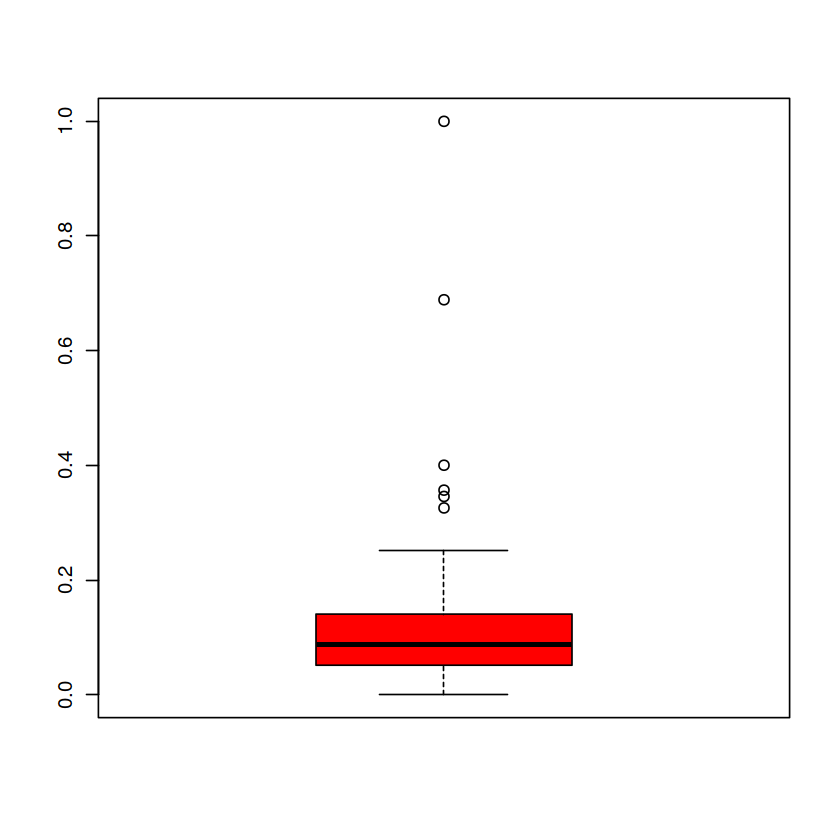

In [108]:
boxplot(sample_score[,18],col = "red")   # 移除某个病人之后，

In [109]:
IQR(sample_score[,18])

[1] 0.08925475

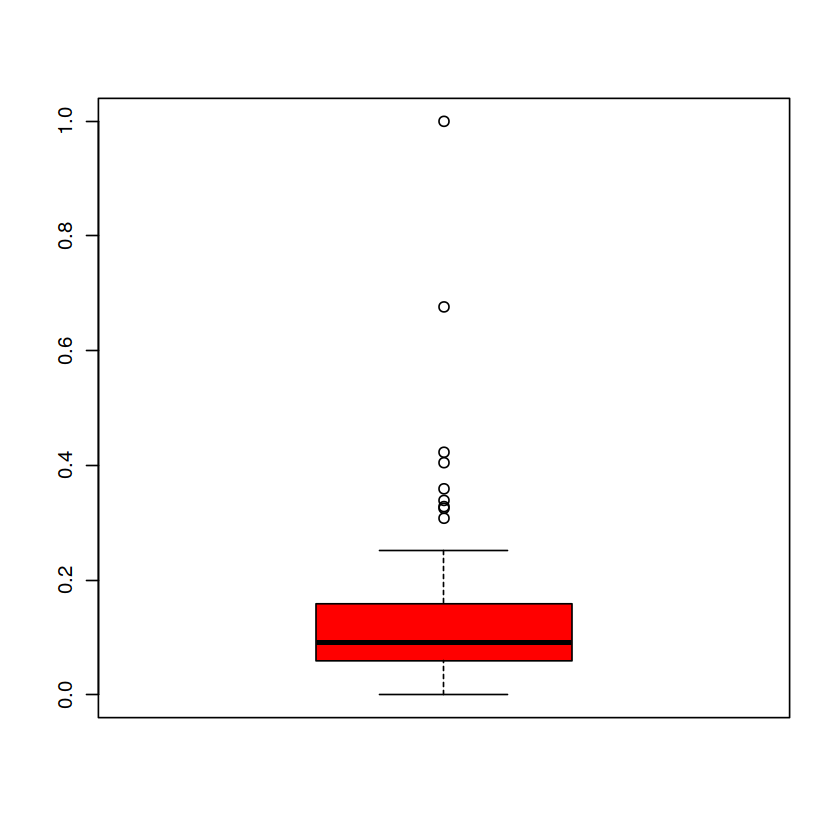

In [12]:
boxplot(sample_score[,21],col = "red")   # 移除某个病人之后，

In [13]:
dim(sample_score)

[1] 75 24

In [56]:

data_plot = sample_score[,c(colnames(sample_score)[c(2,19)])]
data_plot_melt = reshape2::melt(data_plot)
#colnames(data_plot_melt) = c("patient_shared","patient_specific")
#colnames(data_plot_melt) = c("patient_shared","patient_specific")

No id variables; using all as measure variables



In [59]:
data_plot_melt$variable = as.character(data_plot_melt$variable)
data_plot_melt$variable[data_plot_melt$variable=='score_GM2'] = "patient-shared" 
data_plot_melt$variable[data_plot_melt$variable=='score_GM19'] = "patient-specific" 

In [51]:
head(data_plot_melt)

variable       value      
1 patient-shared  0.55657260
2 patient-shared  0.36516260
3 patient-shared  0.25527977
4 patient-shared  0.24128057
5 patient-shared -0.02270046
6 patient-shared  0.33843944

In [ ]:
 # 9，5

In [91]:
pdf(paste0("/home/wyh/scdata/combined_data//Epithelial/group_compare/patient_program.pdf"),width = 4,height = 2.5)
ggplot(data_plot_melt, aes(y=value,fill = variable)) + geom_boxplot(show.legend = FALSE)+
 scale_fill_manual(values = rep(c("#669900","#6a7dc9")))+theme_bw()+
    theme(axis.text.x = element_text(angle = 45, hjust = 1, vjust = 1,color="black"),
         axis.text.y = element_text(color="black"),
        legend.text=element_text(),
        legend.key=element_blank(),
         axis.title=element_text())+ggtitle("")+facet_grid(. ~variable)+
      ylab("Mean gene module score")
dev.off()

png 
  2

In [85]:
pdf(paste0("/home/wyh/scdata/combined_data//Epithelial/group_compare/patient_program.pdf"),width = 4,height = 2.5)
ggplot(data_plot_melt, aes(y=value,fill = variable)) + geom_boxplot(show.legend = FALSE)+
    theme(axis.text.x=element_blank(angle = 45, hjust = 1, vjust = 1,color="black"),
      axis.text.y=element_blank(),
      axis.ticks.y=element_blank())+ggtitle("")+
      ylab("Mean gene module score")
dev.off()

png 
  2

In [7]:
# 先把得分归一化一下到0-1的范围，减去最小值，除以范围，再计算IQR
myfun = function(i){
    i = (i-min(i))/(max(i)-min(i))
}

for(i in 1:23){
    sample_score[,i] = myfun(sample_score[,i])
}

sort(apply(sample_score[,1:23],MARGIN = 2,FUN = IQR),decreasing = TRUE)

score_GM8  score_GM5  score_GM1 score_GM16  score_GM3  score_GM7  score_GM6 
0.35274238 0.28689038 0.23707777 0.21330755 0.18820575 0.17373185 0.15941327 
score_GM18 score_GM21 score_GM20 score_GM14 score_GM19 score_GM10  score_GM9 
0.13211561 0.12421148 0.12274002 0.10625370 0.08482650 0.07159601 0.07116376 
score_GM23 score_GM12  score_GM2 score_GM17 score_GM11 score_GM13 score_GM22 
0.07019720 0.06138249 0.05955784 0.05862376 0.05295053 0.05260723 0.04921692 
score_GM15  score_GM4 
0.04130655 0.03494548

In [ ]:
# 保留1，2，3，4，11几个模块，提出一个指标

In [ ]:
sample_score = 

In [200]:
fibroblast_ratio_all = left_join(sample_score,patient_info[rownames(sample_score),])

Joining, by = "NewSample.ID"


In [83]:
library(tidyverse)

In [161]:
fibroblast_ratio_all = as.data.frame.array(table(celltype_info[,c("orig.ident","subtype")]))
#write.csv(fibroblast_ratio_all,"./group_compare/sample_fibroblast_subtype_number.csv")
fibroblast_ratio_all = fibroblast_ratio_all/rowSums(fibroblast_ratio_all)
# fibroblast_ratio_all = cbind(fibroblast_ratio_all,patient_info[rownames(fibroblast_ratio_all),])

#fibroblast_ratio_all$number =  rowSums(as.data.frame.array(table(celltype_info[,c("orig.ident","celltype")])))

In [444]:
cor(fibroblast_ratio["score_GM1"][,1],fibroblast_ratio["score_GM11"][,1],method=c("spearman"))

[1] 0.4292713

In [526]:
fibroblast_ratio

score_GM1  score_GM2  score_GM3  score_GM4  score_GM5  score_GM6  score_GM7 
1  0.33633456 0.05404398 0.29416436 0.22996938 0.24842859 0.13462740 0.07950590
2  0.21920440 0.23614795 0.33580558 0.25523808 0.50756581 0.17960238 0.08427423
3  0.18824788 0.56939270 0.41909805 0.12238735 0.35558596 0.23026611 0.05599413
4  0.12904442 0.52783459 0.35330847 0.10979263 0.23239516 0.09620711 0.08661805
5  0.14731681 0.60804511 0.42452607 0.21391868 0.17683013 0.20449370 0.10857524
6  0.27614141 0.13802792 0.27206946 0.21179462 0.30183199 0.17702989 0.07209809
7  0.44721087 0.04781073 0.29497443 0.20155755 0.28331036 0.14737691 0.07507412
8  0.49638744 0.58823589 0.19075540 0.27689822 0.26479464 0.14821706 0.03008299
9  0.23878227 0.66383826 0.43660188 0.67720678 0.37377971 0.23144370 0.08093385
10 0.18523802 0.75346924 0.41437335 0.22666422 0.32616335 0.16054569 0.05170856
11 0.30708737 0.10425735 0.21329593 0.09976905 0.59570049 0.19270221 0.05846371
12 0.43360436 0.67006350 0.23295980 0.14230661 0.30742796 0.22043917 0.05198771
13 0.36748586 0.29690313 0.25276221 0.27123005 0.32452725 0.17835525 0.02910777
14 0.05439451 0.72741267 0.66760523 0.09525249 0.15302236 0.15024422 0.04866407
15 0.22082144 0.35590113 0.31037926 0.10988596 0.40852728 0.22195571 0.04982054
16 0.23874611 0.80292659 0.41480544 0.13098920 0.31998542 0.27763467 0.03984334
17 0.17527367 0.59115186 0.36665632 0.43568148 0.12961307 0.08145266 0.08379122
18 0.24549509 0.42930588 0.25810865 0.12261619 0.29443893 0.24870566 0.06690353
19 0.49454776 0.69386966 0.37847518 0.13267350 0.15953551 0.08725558 0.02832329
20 0.79503118 0.17238140 0.16735668 0.11878003 0.29273251 0.07709650 0.02414462
21 0.27380813 0.40993944 0.17865699 0.06357820 0.33055093 1.00000000 0.01694538
22 0.53097229 0.11419015 0.22179585 0.20694410 0.15264270 0.10899330 0.03884791
23 0.25851311 0.46389344 0.28073923 0.66828285 0.12863172 0.22691981 0.10317644
24 0.27789074 0.29460182 0.23592264 0.18042754 0.32605404 0.15048885 0.03471334
25 0.27668806 0.63547374 0.32465513 0.48546005 0.07053772 0.04872685 0.06026782
26 0.35449827 0.66980281 0.55760581 0.63782655 0.06891773 0.05745760 0.04969099
27 0.28920513 0.67911306 0.48498720 0.28844621 0.24849745 0.10350580 0.10201923
28 0.19599995 0.59788824 0.57315902 0.13833287 0.29932186 0.11643543 0.05700281
29 0.39539217 0.48123954 0.43294391 0.52672278 0.43792618 0.11345995 0.08008825
30 0.21985202 0.61051043 0.50334006 0.27092526 0.15676763 0.07311839 0.59754274
31 0.41126434 0.59686134 0.45830796 0.34685344 0.23371803 0.05469736 0.06455392
32 0.25850410 0.54076635 0.48337917 0.30464705 0.29618820 0.15044544 0.07362040
33 0.46905348 0.55574803 0.17011562 0.03996274 0.88668526 0.12841908 0.01140708
34 0.49664529 0.36207217 0.30165068 0.19328520 0.42746094 0.06436996 0.05486500
35 0.26976656 0.49578040 0.05803758 0.08841574 0.21214108 0.20396268 0.00000000
36 0.25143551 0.39025672 0.27858590 0.35573263 0.26535271 0.23259561 0.04616794
37 0.67686077 0.47141982 0.22474604 0.20361706 0.18119424 0.09584622 0.05475481
38 0.10663993 0.64078727 0.38775421 0.14156076 0.21517636 0.32095095 0.06948157
39 0.16425104 0.56681767 0.31122123 0.29636113 0.26866394 0.23963558 0.09378376
40 0.26175543 0.61120823 0.00000000 0.21341704 0.12309916 0.14473445 0.01368589
41 0.41113188 0.52339952 0.38551123 0.23499715 0.17667028 0.11264022 0.05424492
42 0.15194800 0.79851591 0.59902108 0.46448246 0.03553679 0.07870508 0.07072239
43 0.27379147 0.07258753 0.27548164 0.27052340 0.39251748 0.20767037 0.08545021
44 0.51288943 0.28610778 0.15097116 0.17483094 0.26628422 0.24700346 0.03399902
45 0.26755562 0.85970742 0.37084128 0.25325378 0.14068461 0.18424637 0.09940300
46 0.34209050 0.61630913 0.35706946 0.18345198 0.16778565 0.10972800 0.16283889
47 0.17978999 0.58819142 0.30101716 0.18494578 0.19028861 0.18672531 0.05918212
48 0.23103126 0.13734221 0.36305277 0.19481424 0.19909810 0.11176347 0.09577191
49 0.28414644 0.42661481 0.07622009 0.08351676 0.25329414 0.18984462 0.01964392
50 

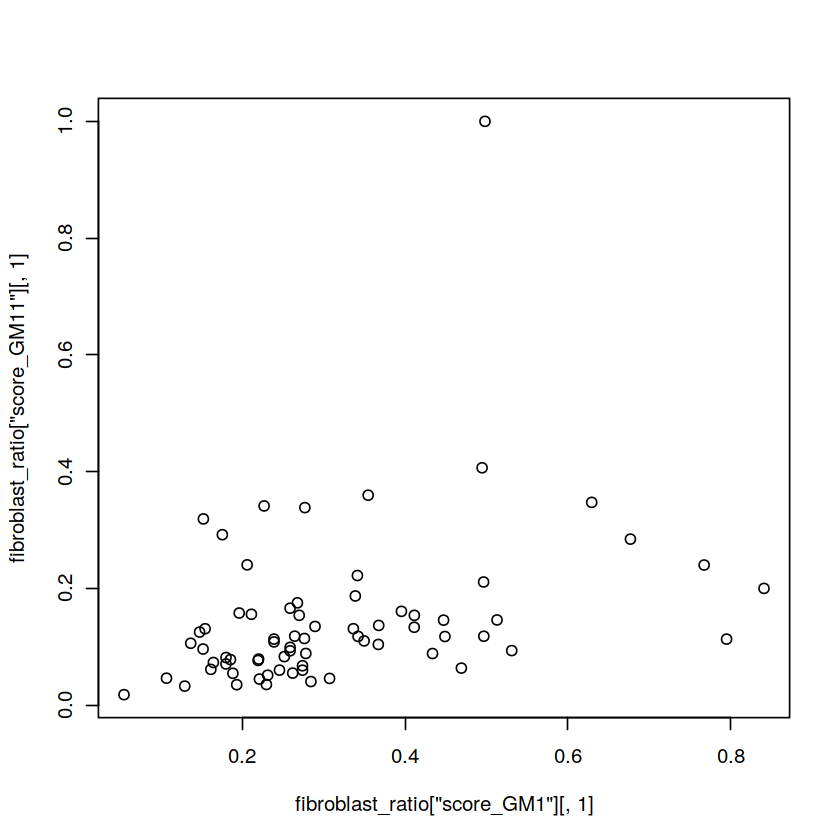

In [450]:
fibroblast_ratio = fibroblast_ratio_all[fibroblast_ratio_all$Tumors.for.scRNA.seq.short=="P",]
fibroblast_ratio = fibroblast_ratio[fibroblast_ratio$histological.type.short %in% "adeno",]
plot(fibroblast_ratio["score_GM1"][,1],fibroblast_ratio["score_GM11"][,1])

In [455]:
table(celltype_info[celltype_info['score_GM11']>1,]['orig.ident'])


GBC_028_OM  GBC_028_P 
       680        145 

In [434]:
fibroblast_ratio = fibroblast_ratio_all[fibroblast_ratio_all$Tumors.for.scRNA.seq.short=="P",]
fibroblast_ratio = fibroblast_ratio[fibroblast_ratio$histological.type.short %in% "adeno",]
data_plot = fibroblast_ratio[,c(colnames(fibroblast_ratio)[1:length(GM_index)],"metastasis.type")]
data_plot_melt = reshape2::melt(data_plot)
colnames(data_plot_melt) = c("metastasis.type","variable","Freq")

pdf(paste0("/home/wyh/scdata/combined_data//Epithelial/group_compare/adeno_epithelial_metastasis.type_",program_num,"_100genesV1.pdf"),width = 30,height = 5)
print(ggplot(data_plot_melt, aes( y=Freq, x=metastasis.type)) + geom_boxplot()+facet_grid(. ~variable)+
    theme(axis.text.x = element_text(angle = 45, hjust = 1, vjust = 1,color="black"),
         axis.text.y = element_text(color="black"),
         axis.title=element_text())+ggtitle("")+
      stat_compare_means(comparisons = list(
   c("P","P_LN"),c("P","P_LM"),c("P_LN","P_LM")
  ),method = "wilcox.test",label="p.signif"))
dev.off()

Using metastasis.type as id variables



png 
  2

In [305]:
colnames(fibroblast_ratio_all)[1:10] =  c("TRIM29","KLK10","LAMC2","ST14","SEMA3B","KLK11","SCNN1A","FLNB","PLAAT3","MYOF")

In [71]:
data_plot

KLF1         KLF3       KLF5      KLF7        KLF8         KLF10     
GBC_035_P 0.0043704239 0.5625823  0.6836784 0.10276173  0.0003998715 0.2929836 
GBC_043_P 0.0014423942 0.6316444  0.9323927 0.07426523  0.0011942516 0.2398269 
GBC_064_P 0.0012158370 0.5698818  0.8617482 0.11174373  0.0599923865 0.6815238 
GBC_071_P 0.0012578210 0.5056149  0.7400975 0.15109960  0.0219783242 0.2989695 
GBC_082_P 0.0000000000 0.2710236  0.4291440 0.06787348  0.0000000000 0.1398161 
GBC_009_P 0.0000000000 0.2827280  0.7693662 0.09698737  0.0036944934 0.1311847 
GBC_018_P 0.0000000000 0.3267215  0.8542845 0.17752563  0.0504307578 0.2134308 
GBC_020_P 0.0005815010 0.7048049  1.3390826 0.24686999  0.0112973558 0.3562860 
GBC_025_P 0.0000000000 0.4533231  0.7102890 0.19691853  0.0194318719 0.3983949 
GBC_028_P 0.0000000000 0.2611631  0.6743547 0.16430360  0.0196573492 0.8172478 
GBC_031_P 0.0017422039 0.2283437  0.3885546 0.10655662  0.0011793491 0.1418592 
GBC_087_P 0.0009514739 0.4846153  0.9768698 0.05070898  0.0040199983 0.3228454 
GBC_006_P 0.0005885303 0.5311817  1.3909119 0.16285866  0.0152352703 0.3527448 
GBC_007_P 0.0006451999 0.4052987  1.5501561 0.13757694  0.0686573259 0.4014801 
GBC_010_P 0.0006280608 0.4928146  0.8987658 0.12201351  0.0059745012 0.4267611 
GBC_014_P 0.0006436422 0.3837781  0.8113343 0.08160371  0.0028402852 0.4660605 
GBC_015_P 0.0012682754 0.2236104  1.0219752 0.05654043  0.0064391479 0.1752120 
GBC_055_P 0.0000000000 0.5203832  1.0673781 0.19586761  0.0054951743 0.2383581 
GBC_029_P 0.0000000000 0.0941508  0.2186876 0.07023199  0.0249212603 0.1331071 
GBC_030_P 0.0003707873 0.5263825  0.9027353 0.03599481  0.0010123615 0.3550576 
GBC_039_P 0.0006041796 0.8210941  1.3918530 0.11230651  0.0028356852 0.4477466 
GBC_044_P 0.0004812833 0.3638254  1.2915484 0.13113543  0.0260201689 0.4184182 
GBC_045_P 0.0000000000 0.2267217  0.3082886 0.00000000  0.0033257973 0.1845600 
GBC_046_P 0.0000000000 0.2168230  0.2636839 0.07653429  0.0077962666 0.1489594 
GBC_059_P 0.0000000000 0.6995314  1.4236251 0.05507337  0.0010883512 0.1841115 
GBC_060_P 0.0000000000 0.3441565  0.4049155 0.09158449  0.0011412643 0.2556783 
GBC_065_P 0.0002609968 0.5218136  1.0713977 0.17833179  0.0067404597 0.3428745 
GBC_066_P 0.0000000000 0.5121564  1.1965430 0.08015172  0.0000000000 0.4101711 
GBC_067_P 0.0000000000 0.8846141  1.0555265 0.30390179  0.0468801567 0.2127205 
GBC_072_P 0.0003482746 0.3972861  1.4868375 0.18484277  0.0419110914 0.6710686 
⋮         ⋮            ⋮          ⋮         ⋮           ⋮            ⋮         
GBC_024_P 0.0000000000 0.45631525 0.5847740 0.128430110 0.003772685  0.35410531
GBC_026_P 0.0000000000 0.23514174 0.7247299 0.060023281 0.000000000  0.29845733
GBC_032_P 0.0007502625 0.51779916 0.8079656 0.103416567 0.003364618  0.37074297
GBC_040_P 0.0000000000 0.08704857 0.3636136 0.032117210 0.011195426  0.08298542
GBC_061_P 0.0013139857 0.54077067 1.3874550 0.105102539 0.003886279  0.29468140
GBC_062_P 0.0000000000 0.20892774 0.3736127 0.059177799 0.032755801  0.15224219
GBC_063_P 0.0000000000 0.38230612 0.6808110 0.112184307 0.000000000  0.22083286
GBC_016_P 0.0000000000 0.31953427 0.5880243 0.211102950 0.016703419  0.33364181
GBC_051_P 0.0000000000 0.43502748 1.2386596 0.166660973 0.109600934  0.28473865
GBC_052_P 0.0000000000 0.29135074 0.5495657 0.122398731 0.000000000  0.14667268
GBC_053_P 0.0000000000 0.31890309 0.4164039 0.138362324 0.000000000  0.21171761
GBC_054_P 0.0000000000 0.31777488 0.6686007 0.073181458 0.004972007  0.15698719
GBC_057_P 0.0000000000 0.33297593 0.6856114 0.124219956 0.012419248  0.54171221
GBC_027_P 0.0000000000 0.22147441 0.4363541 0.006046470 0.000000000  0.12055614
GBC_036_P 0.0000000000 0.70334351 0.6434400 0.000000000 0.006150640  0.23253680
GBC_037_P 0.0000000000 0.37415221 0.5674865 0.069160400 0.000000000  0.13090935
GBC_041_P 0.0046265219 0.32896968 0.5197249 0.009077699 0.003440345  0.34767998
GBC_058_P 0.0000000000 0.17351339 0.1193015 0.042036433 0.000000000  0.10491246
GBC_069_P 

In [80]:
fibroblast_ratio = fibroblast_ratio_all[fibroblast_ratio_all$Tumors.for.scRNA.seq.short=="P",]
fibroblast_ratio = fibroblast_ratio[fibroblast_ratio$histological.type.short=="adeno",]
data_plot = fibroblast_ratio[,c(colnames(fibroblast_ratio)[1:length(GM_index)],"metastasis.type")]
#colnames(data_plot) = c("KLF1","KLF3","KLF5","KLF7","KLF8","KLF10","KLF11","KLF12","KLF13","KLF15","KLF16","KLF17","metastasis.type")
colnames(data_plot) = c("ESR1","ESR2","metastasis.type")
data_plot_melt = reshape2::melt(data_plot)
colnames(data_plot_melt) = c("metastasis.type","variable","Freq")

pdf(paste0("/home/wyh/scdata/combined_data//Epithelial/group_compare/adeno_epithelial_metastasis.type_",program_num,"TF_ESR.pdf"),width = 15,height = 5)
print(ggplot(data_plot_melt, aes( y=Freq, x=metastasis.type)) + geom_boxplot()+facet_grid(. ~variable)+
    theme(axis.text.x = element_text(angle = 45, hjust = 1, vjust = 1,color="black"),
         axis.text.y = element_text(color="black"),
         axis.title=element_text())+ggtitle("")+
      stat_compare_means(comparisons = list(
   c("P","P_LN"),c("P","P_LM"),c("P_LN","P_LM")
  ),method = "wilcox.test"))
dev.off()

Using metastasis.type as id variables

Warning message in wilcox.test.default(c(0.000354845363686841, 0, 0.00108364652465398, :
“cannot compute exact p-value with ties”
Warning message in wilcox.test.default(c(0.000354845363686841, 0, 0.00108364652465398, :
“cannot compute exact p-value with ties”
Warning message in wilcox.test.default(c(0, 0.000411923570948218, 0, 0, 0.000964177285067873, :
“cannot compute exact p-value with ties”
Warning message in wilcox.test.default(c(0.000709192531926707, 0.00369215756676558, :
“cannot compute exact p-value with ties”
Warning message in wilcox.test.default(c(0.000709192531926707, 0.00369215756676558, :
“cannot compute exact p-value with ties”
Warning message in wilcox.test.default(c(0.00484458579492004, 0.0115128415736382, :
“cannot compute exact p-value with ties”


png 
  2

In [37]:
fibroblast_ratio = fibroblast_ratio_all[fibroblast_ratio_all$Tumors.for.scRNA.seq.short=="P",]
fibroblast_ratio = fibroblast_ratio[fibroblast_ratio$histological.type.short=="adeno",]
data_plot = fibroblast_ratio[,c(colnames(fibroblast_ratio)[1:length(GM_index)],"metastasis.type")]
data_plot = data_plot[,c(2,3)]
colnames(data_plot) = c("KLF5","metastasis.type")
data_plot_melt = reshape2::melt(data_plot)
colnames(data_plot_melt) = c("metastasis.type","variable","Freq")

pdf(paste0("/home/wyh/scdata/combined_data//Epithelial/group_compare/adeno_epithelial_metastasis.type_",program_num,"TF3.pdf"),width = 5,height = 5)
print(ggplot(data_plot_melt, aes( y=Freq, x=metastasis.type)) + geom_boxplot()+facet_grid(. ~variable)+
    theme(axis.text.x = element_text(angle = 45, hjust = 1, vjust = 1,color="black"),
         axis.text.y = element_text(color="black"),
         axis.title=element_text())+ggtitle("")+
      stat_compare_means(comparisons = list(
   c("P","P_LN"),c("P","P_LM"),c("P_LN","P_LM")
  ),method = "wilcox.test"))
dev.off()

Using metastasis.type as id variables



png 
  2

In [ ]:
fibroblast_ratio[42,]

score_GM1 NewSample.ID Sample.ID Tumors.for.scRNA.seq Sex Age TNM
53 0.1938446 GB_001_LG    GBC11     Primary              F   59  NA 
   Clinical.stage histological.type                   Differentiation ⋯ XGC
53 NA             low-grade intraepithelial neoplasia NA              ⋯ NA 
   chronic.cholecystitis Tumors.for.scRNA.seq.unify histological.type.short
53 NA                    Primary                    LG                     
   patient.index Tumors.for.scRNA.seq.short metastasis.type progression.type
53 366656        P                          NA              Mixture         
   progression.type.short orig.ident
53 Mix                    GB_001_LG

In [261]:
table(data_plot_melt['metastasis.type'])


   P P_LN P_LM 
  23   50   14 

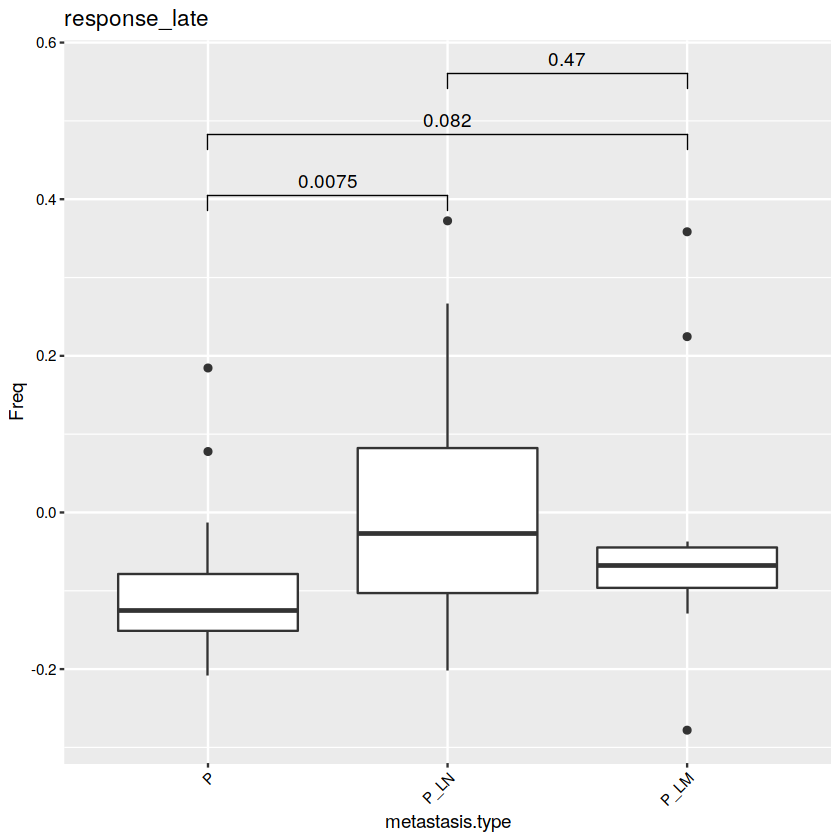

In [543]:
ggplot(data_plot_melt, aes( y=Freq, x=metastasis.type)) + geom_boxplot()+
    theme(axis.text.x = element_text(angle = 45, hjust = 1, vjust = 1,color="black"),
         axis.text.y = element_text(color="black"),
         axis.title=element_text())+ggtitle("")+
      stat_compare_means(comparisons = list(
   c("P","P_LN"),c("P","P_LM"),c("P_LN","P_LM")
  ),method = "wilcox.test")+ggtitle("response_late")

In [ ]:
scale_fill_manual(values = rep(c("grey50","#6a7dc9","blue"),2))+

      scale_fill_brewer(palette = "Set1"
                    , name = "age_group")+

In [477]:
fibroblast_ratio = fibroblast_ratio_all[fibroblast_ratio_all$Tumors.for.scRNA.seq.short=="P",]
data_plot = fibroblast_ratio[,c(colnames(fibroblast_ratio)[c(1,11)],"metastasis.type")]
data_plot_melt = reshape2::melt(data_plot)
colnames(data_plot_melt) = c("metastasis.type","variable","Freq")

pdf(paste0("/home/wyh/scdata/combined_data//Epithelial/group_compare/adeno_epithelial_metastasis.type_",program_num,"_100genesV2.pdf"),width = 8,height = 5)
print(ggplot(data_plot_melt, aes(y=Freq, x=metastasis.type,fill = metastasis.type)) + geom_boxplot()+facet_wrap(. ~variable)+
 scale_fill_manual(values = rep(c("grey50","#6a7dc9","#9999CC"),2))+
    theme(axis.text.x = element_text(angle = 45, hjust = 1, vjust = 1,color="black"),
         axis.text.y = element_text(color="black"),
          panel.grid.major = element_blank(),
          panel.grid.minor = element_blank(),
        legend.text=element_text(),
        legend.key=element_blank(),
         axis.title=element_text())+ggtitle("")+
      stat_compare_means(comparisons = list(
   c("P","P_LN"),c("P","P_LM"),c("P_LN","P_LM")
  ),method = "wilcox.test",label="p.signif")+ylab("Mean gene module score")+theme_bw())
dev.off()

Using metastasis.type as id variables



png 
  2

In [417]:
rep(c("grey50","#6a7dc9","blue"),2)

[1] "grey50"  "#6a7dc9" "blue"    "grey50"  "#6a7dc9" "blue"

In [406]:
fontsize  = 22
pdf(paste0("/home/wyh/scdata/combined_data//Epithelial/group_compare/adeno_epithelial_metastasis.type_",program_num,"_100genesV2.pdf"),width = 8,height = 5)
print(ggplot(data_plot_melt, aes(y=Freq, x=variable,fill = metastasis.type)) + geom_boxplot()+scale_fill_manual(values = c("grey50","#6a7dc9","blue"))+
    theme(axis.text.x = element_text(angle = 45, hjust = 1, vjust = 1,color="black"),
         axis.text.y = element_text(color="black"),
         axis.title=element_text(),
         panel.grid.major = element_blank(),
        panel.grid.minor = element_blank(),
        panel.background = element_blank(), 
        axis.line = element_line(colour = "black"),
        legend.text=element_text(),
          legend.position="right",
        legend.key=element_blank())+ggtitle("")+
   stat_compare_means(comparisons = list(
   c("P","P_LN"),c("P","P_LM"),c("P_LN","P_LM")
  ),method = "wilcox.test",label="p.signif")+xlab("")+ylab("Fraction in Fibroblast"))
dev.off()

Warning message:
“Computation failed in `stat_signif()`:
missing value where TRUE/FALSE needed”


png 
  2

In [178]:
theme(axis.text.x = element_text(angle = 45, hjust = 1, vjust = 1,color="black"),
         axis.text.y = element_text(color="black"),
         axis.title=element_text(),
         panel.grid.major = element_blank(),
        panel.grid.minor = element_blank(),
        panel.background = element_blank(), 
        axis.line = element_line(colour = "black"),
        legend.text=element_text(),
          legend.position="right",
        legend.key=element_blank())+ggtitle("")+
   stat_compare_means(method = "wilcox.test",label =  "p.signif", label.x = 1.5)+xlab("")+ylab("Fraction in Fibroblast")

score_GM1     score_GM6     score_GM11    score_GM15  
GBC_035_P  0.16717297    0.0323723689  0.017599395  -0.006747633
GBC_043_P  0.08688498    0.0793408698 -0.027757270   0.010432614
GBC_064_P  0.05202184    0.1362956392 -0.052248414   0.810589955
GBC_071_P -0.01009339   -0.0411697745 -0.073446218   0.004713468
GBC_082_P  0.01378080    0.0902842220 -0.001870023   0.035210515
GBC_009_P  0.12208299    0.0759923892  0.003141255   0.004999893
GBC_018_P  0.24645405    0.0429412438  0.023515919  -0.016569884
GBC_020_P  0.19264665    0.0166046729 -0.004621046   0.027901487
GBC_025_P  0.22803510    0.0496368028  0.071899011  -0.067812704
GBC_028_P  0.30201169   -0.0434224638  0.850377171  -0.058939087
GBC_031_P  0.09751591    0.1305012609 -0.010247209  -0.005276689
GBC_087_P  0.05138827    0.0629369090 -0.036272198  -0.013469852
GBC_006_P  0.14593850    0.0922598099 -0.056306758   0.058905822
GBC_007_P  0.25480794    0.1203645948 -0.017738929  -0.060121571
GBC_010_P  0.18220918    0.0704368430  0.008082026  -0.039121890
GBC_014_P  0.24513024   -0.0025343113  0.005996243  -0.032723336
GBC_015_P -0.03535131    0.0534348377 -0.087656475  -0.015267660
GBC_055_P  0.53010162    0.0005150807  0.075733297  -0.047338213
GBC_029_P  0.01983448    0.0973814098 -0.016003318   0.001628451
GBC_030_P  0.09140486    0.1229562831 -0.056983360   0.063116375
GBC_039_P  0.50761939    0.0174214266  0.095239139  -0.070830680
GBC_044_P  0.09075373    0.1745827089 -0.002256627  -0.017828955
GBC_045_P  0.10211766    0.1052363717  0.004029068  -0.006516909
GBC_046_P  0.03270185   -0.0150988722  0.161449787  -0.042633946
GBC_059_P  0.09510676    0.1433537527 -0.045401783   0.036384158
GBC_060_P  0.28966627   -0.0206151107  0.273122655  -0.042550697
GBC_065_P  0.05620173    0.0474599711 -0.067676714   0.003414331
GBC_066_P  0.11374488    0.0743322980 -0.013417764  -0.011785905
GBC_067_P  0.47836547   -0.0226877943 -0.011277836  -0.030046147
GBC_072_P  0.13422631    0.8990994026 -0.043191457   0.059478815
⋮         ⋮             ⋮             ⋮             ⋮           
GBC_024_P  0.0003205122 -0.033937342  -0.0301791458 -0.024134198
GBC_026_P  0.2239390248 -0.041281500   0.0373615688 -0.020292955
GBC_032_P  0.0249759887  0.098209511  -0.0470073638 -0.019712065
GBC_040_P  0.1079851265  0.044619789  -0.0177228342 -0.020282854
GBC_061_P  0.2536941611  0.034008013  -0.0494460048 -0.036463679
GBC_062_P  0.0699158507  0.002818837   0.0341907328 -0.025423176
GBC_063_P  0.3554689963  0.019159057   0.1988805501 -0.019159184
GBC_016_P  0.2744290437 -0.036370365  -0.0011394966 -0.034892616
GBC_051_P  0.1204601085  0.099027045   0.0205912533 -0.011040443
GBC_052_P  0.1079741764  0.121608937  -0.0248376050 -0.001693804
GBC_053_P  0.4063329620 -0.001980986   0.1164719690 -0.033379797
GBC_054_P -0.0065886956  0.211360534  -0.0559877471  0.033543637
GBC_057_P  0.0164022086  0.095655099  -0.0003194050  0.009303727
GBC_027_P  0.0400033835  0.132263634  -0.0298140031  0.006404722
GBC_036_P  0.1165257637  0.053286872  -0.0536690435 -0.050353539
GBC_037_P  0.1613538090  0.011912504   0.0141188096 -0.034001185
GBC_041_P  0.0397119713  0.076785729  -0.0352256346  0.028887336
GBC_058_P  0.0079203585 -0.016951145   0.1721145772 -0.024511588
GBC_069_P  0.1072142241  0.106516414  -0.0377296986  0.092215353
GBC_070_P  0.3014860477  0.108428988   0.0326707837 -0.029140958
GBC_077_P  0.1754005910  0.083091660  -0.0002500171 -0.045838664
GBC_078_P  0.1198363818  0.074170842   0.0483085208 -0.016382844
GBC_079_P  0.1527939630  0.018451523   0.0103196901 -0.052392002
GBC_080_P  0.0485589878  0.079784828  -0.0396579137  0.068306899
GBC_081_P  0.0903265767  0.011535154  -0.0497089524 -0.001738948
GBC_083_P  0.0999700668  0.021521901  -0.0658709935 -0.015931497
GBC_084_P  0.1440487319  0.079305375  -0.0603313665  0.022880157
GBC_085_P  0.0356329784  0.077588893  -0.0100155639 -0.007914739
GBC_017_P  0.0716652314 -0.066360103   0.1157924411 -0.043614793
GBC_019_P  0.0975827653 -0.055142730   0.2033

In [169]:
# 看一下性别
fibroblast_ratio = fibroblast_ratio_all[fibroblast_ratio_all$Tumors.for.scRNA.seq.short=="P",]
data_plot = fibroblast_ratio[,c(colnames(fibroblast_ratio)[c(1,6,11,15)],"Sex")]
data_plot_melt = reshape2::melt(data_plot)
colnames(data_plot_melt) = c("Sex","variable","Freq")

pdf(paste0("/home/wyh/scdata/combined_data//Epithelial/group_compare/adeno_epithelial_metastasis.type_",program_num,"sex.pdf"),width = 10,height = 5)
print(ggplot(data_plot_melt, aes( y=Freq, x=Sex)) + geom_boxplot()+facet_grid(. ~variable)+
    theme(axis.text.x = element_text(angle = 45, hjust = 1, vjust = 1,color="black"),
         axis.text.y = element_text(color="black"),
         axis.title=element_text())+ggtitle("")+
      stat_compare_means(comparisons = list(
   c("F","M")
  ),method = "wilcox.test",label="p.signif"))
dev.off()

Using Sex as id variables



png 
  2

In [174]:
table(patient_info$metastasis.type,patient_info$Sex)

      
        F  M
  P    16 11
  P_LN 34 22
  P_LM 10  6

In [173]:
unique(patient_info$metastasis.type)

[1] <NA> P    P_LN P_LM
Levels: P P_LN P_LM

# 原位的和癌症的比较

In [99]:
# 分组看一下，只要CC XGC P的样本
fibroblast_ratio = fibroblast_ratio_all[fibroblast_ratio_all$Tumors.for.scRNA.seq.short %in% c("CC","XGC","P"),]

In [17]:
cluster_num = length(unique(celltype_info$subtype))

In [79]:
data_plot = fibroblast_ratio[,c(colnames(fibroblast_ratio)[1:cluster_num],"Tumors.for.scRNA.seq.short")]

In [80]:
data_plot_melt = melt(data_plot)
colnames(data_plot_melt) = c("Tumors.for.scRNA.seq.short","variable","Freq")

Using Tumors.for.scRNA.seq.short as id variables



In [82]:
pdf("/home/wyh/scdata/combined_data//fibroblast/group_compare/fibroblast2.pdf",width = 15,height = 10)
print(ggplot(data_plot_melt, aes( y=Freq, x=variable,fill = Tumors.for.scRNA.seq.short)) + geom_boxplot()+
    theme(axis.text.x = element_text(angle = 45, hjust = 1, vjust = 1,color="black"),
         axis.text.y = element_text(color="black"),
         axis.title=element_text())+ggtitle("")+
   stat_compare_means(method = "anova"))
dev.off()

png 
  2

In [75]:
data_plot_melt

metastasis.type variable       Freq       
1   P               C0-myCAF-MMP11 0.708053691
2   P_LN            C0-myCAF-MMP11 0.032432432
3   P_LM            C0-myCAF-MMP11 0.653936087
4   P_LN            C0-myCAF-MMP11 0.415282392
5   P_LN            C0-myCAF-MMP11 0.034090909
6   P               C0-myCAF-MMP11 0.210873147
7   P_LN            C0-myCAF-MMP11 0.088888889
8   P_LN            C0-myCAF-MMP11 0.323843416
9   P_LN            C0-myCAF-MMP11 0.014470284
10  P_LM            C0-myCAF-MMP11 0.002782252
11  P_LN            C0-myCAF-MMP11 0.608355091
12  P_LN            C0-myCAF-MMP11 0.686635945
13  P               C0-myCAF-MMP11 0.135064935
14  P_LN            C0-myCAF-MMP11 0.118226601
15  P_LN            C0-myCAF-MMP11 0.760765550
16  P_LN            C0-myCAF-MMP11 0.732571879
17  P_LN            C0-myCAF-MMP11 0.842105263
18  P_LN            C0-myCAF-MMP11 0.100000000
19  P_LI            C0-myCAF-MMP11 0.680998613
20  P_LN            C0-myCAF-MMP11 0.148148148
21  P_LM            C0-myCAF-MMP11 0.214285714
22  P_LN            C0-myCAF-MMP11 0.398370672
23  P_LN            C0-myCAF-MMP11 0.132352941
24  P               C0-myCAF-MMP11 0.105263158
25  P_LN            C0-myCAF-MMP11 0.695364238
26  P_LN            C0-myCAF-MMP11 0.823083404
27  P               C0-myCAF-MMP11 0.016393443
28  P               C0-myCAF-MMP11 0.019867550
29  P_LN            C0-myCAF-MMP11 0.079701121
30  P_LN            C0-myCAF-MMP11 0.052287582
⋮   ⋮               ⋮              ⋮          
421 P_LN            C5-vCAF-MCEM   0.030303030
422 P_LN            C5-vCAF-MCEM   0.022988506
423 P_LN            C5-vCAF-MCEM   0.000000000
424 P_LN            C5-vCAF-MCEM   0.000000000
425 P_LN            C5-vCAF-MCEM   0.006493506
426 P_LM            C5-vCAF-MCEM   0.029962547
427 P_LI            C5-vCAF-MCEM   0.059523810
428 P_LN            C5-vCAF-MCEM   0.000000000
429 P_LN            C5-vCAF-MCEM   0.000000000
430 P_LM            C5-vCAF-MCEM   0.243055556
431 P               C5-vCAF-MCEM   0.092150171
432 P_LM            C5-vCAF-MCEM   0.018927445
433 P_LM            C5-vCAF-MCEM   0.033149171
434 P_LN            C5-vCAF-MCEM   0.013157895
435 P_LM            C5-vCAF-MCEM   0.026315789
436 P_LN            C5-vCAF-MCEM   0.018404908
437 P_LN            C5-vCAF-MCEM   0.004807692
438 P_LN            C5-vCAF-MCEM   0.170454545
439 P_LM            C5-vCAF-MCEM   0.000000000
440 P_LN            C5-vCAF-MCEM   0.002861230
441 P_LM            C5-vCAF-MCEM   0.000000000
442 P_LN            C5-vCAF-MCEM   0.011467890
443 P_LN            C5-vCAF-MCEM   0.000000000
444 P_LN            C5-vCAF-MCEM   0.000771010
445 P_LN            C5-vCAF-MCEM   0.105527638
446 P_LI            C5-vCAF-MCEM   0.007153076
447 P               C5-vCAF-MCEM   0.025423729
448 P_LM            C5-vCAF-MCEM   0.054878049
449 P_LN            C5-vCAF-MCEM   0.001584786
450 P_LI            C5-vCAF-MCEM   0.204685573

## 看临床分期的趋势

In [14]:
setwd("/home/wyh/scdata/combined_data/Epithelial/group_compare/")
sample_score = read.csv("../submit/figure_data/heatmap_GM_score.csv",row.names = 1)

In [19]:
sample_score = left_join(sample_score,patient_info)

Joining with `by = join_by(NewSample.ID)`


In [20]:
rownames(sample_score) = sample_score$NewSample.ID

In [21]:
fibroblast_ratio_all = sample_score

In [22]:
fibroblast_ratio = fibroblast_ratio_all
fibroblast_ratio$Clinical.stage[fibroblast_ratio$Clinical.stage %in% c("IIA","IIB")] = "II"
fibroblast_ratio$Clinical.stage = factor(fibroblast_ratio$Clinical.stage,levels = c("I","II","IIIA","IIIB","IVA","IVB"))
#fibroblast_ratio = fibroblast_ratio[fibroblast_ratio$Tumors.for.scRNA.seq.short %in% c("CC","XGC","P","LI","LN","LM"),]
fibroblast_ratio = fibroblast_ratio[fibroblast_ratio$histological.type.short %in% c("adeno"),]

In [23]:
colnames(fibroblast_ratio)[1:7]

[1] "score_GM1" "score_GM2" "score_GM3" "score_GM4" "score_GM5" "score_GM6"
[7] "score_GM7"

In [24]:
lm_eqn <- function(df){
  model.lm <- lm(Cell.Type ~ value, df);
  l <- list(a = as.numeric(format(coef(model.lm)[1], digits = 4)),
          b = as.numeric(format(coef(model.lm)[2], digits = 4)),
          r2 = format(summary(model.lm)$r.squared, digits = 4),
          p = format(summary(model.lm)$coefficients[2,4], digits = 4))

eq <- substitute(italic(y) == a + b %.% italic(x)~","~italic(R)^2~"="~r2~","~italic(P)~"="~p, l)

  as.character(as.expression(eq));
}

In [25]:
getwd()

[1] "/home/wyh/scdata/combined_data/Epithelial"

In [16]:
pdf("./adeno_p/GM_score_with_clinical_stage.pdf")
for(itype in colnames(fibroblast_ratio)[1:23]){
    data_plot = fibroblast_ratio[,c("Clinical.stage",itype)]

    colnames(data_plot) = c("Clinical.stage","Cell.Type")
data_plot$value = as.numeric(data_plot$Clinical.stage)
    print(ggplot(data_plot,aes(x = Clinical.stage,y = Cell.Type))+geom_point()+geom_smooth(method = "lm", se=TRUE, 
              color="black", aes(as.numeric(Clinical.stage), Cell.Type))+theme_bw()+ylab(itype)+geom_text(x = 3, y = max(data_plot$Cell.Type)/2, 
            label = lm_eqn(data_plot), parse = TRUE))
}   
dev.off()



`geom_smooth()` using formula = 'y ~ x'
`geom_smooth()` using formula = 'y ~ x'
`geom_smooth()` using formula = 'y ~ x'
`geom_smooth()` using formula = 'y ~ x'
`geom_smooth()` using formula = 'y ~ x'
`geom_smooth()` using formula = 'y ~ x'
`geom_smooth()` using formula = 'y ~ x'
`geom_smooth()` using formula = 'y ~ x'
`geom_smooth()` using formula = 'y ~ x'
`geom_smooth()` using formula = 'y ~ x'
`geom_smooth()` using formula = 'y ~ x'
`geom_smooth()` using formula = 'y ~ x'
`geom_smooth()` using formula = 'y ~ x'
`geom_smooth()` using formula = 'y ~ x'
`geom_smooth()` using formula = 'y ~ x'
`geom_smooth()` using formula = 'y ~ x'
`geom_smooth()` using formula = 'y ~ x'
`geom_smooth()` using formula = 'y ~ x'
`geom_smooth()` using formula = 'y ~ x'
`geom_smooth()` using formula = 'y ~ x'
`geom_smooth()` using formula = 'y ~ x'
`geom_smooth()` using formula = 'y ~ x'
`geom_smooth()` using formula = 'y ~ x'


png 
  2

In [26]:
data_plot = fibroblast_ratio[,c("Clinical.stage","score_GM16")]

In [27]:
agg_tbl <- data_plot %>% group_by(Clinical.stage) %>% 
  summarise(score_GM16=median(score_GM16),
            .groups = 'drop')

In [28]:
agg_tbl = as.data.frame(agg_tbl)
agg_tbl

Clinical.stage score_GM16
1 I              0.2006571 
2 II             0.2453503 
3 IIIA           0.1795742 
4 IIIB           0.3422472 
5 IVA            0.2593902 
6 IVB            0.2906346

In [29]:
table(sample_score$Clinical.stage)


   I  IIA  IIB IIIA IIIB  IVA  IVB 
   3    1    7    4   15   16   29 

In [30]:
p_compare = ggplot(agg_tbl, aes(x = Clinical.stage, y = score_GM16,group = 1))

In [237]:
# data_plot[data_plot$Clinical.stage=="I","Clinical.stage"] = "II"

In [ ]:
c("#51574a","#e9d78e","#1F77B4FF","#FF7F0EFF","#2CA02CFF","#D62728FF")


In [252]:
pdf("/home/wyh/scdata/combined_data/Epithelial/submit/figure/GM16_Clinical_stageV2.pdf",width = 5,height = 4)
ggplot(agg_tbl, aes(x = Clinical.stage, y = score_GM16,group = 1)) + geom_boxplot(data = data_plot,aes(group = Clinical.stage,color = Clinical.stage))+scale_color_manual(breaks = data_plot$Clinical.stage,
                    values = c("#51574a","#e9d78e","#1F77B4FF","#FF7F0EFF","#2CA02CFF","#D62728FF"))+
geom_point()+geom_line()+theme_bw()+
theme(legend.position = "none",panel.grid.major = element_blank(),panel.grid.minor = element_blank(),
            panel.background = element_rect(color = "white"),
                                               axis.text.x = element_text(color="black", size=text_size),
                                               axis.text.y = element_text(color="black", size=text_size),
                                               axis.title=element_text(size=text_size),
                                               strip.text.x = element_text(size = text_size-5),
                                               legend.text=element_text(size=text_size),
                                               legend.title=element_text(size=text_size),
                                               plot.title =element_text(hjust = 0.5, size = 20))
dev.off()

png 
  2

In [265]:
pdf("/home/wyh/scdata/combined_data/Epithelial/submit/figure/GM16_Clinical_stageV3.pdf",width = 4,height = 4)
ggboxplot(data = data_plot,x = "Clinical.stage", y = "score_GM16",group = "Clinical.stage",color = "Clinical.stage")+
stat_compare_means(comparisons = list(c("II","I"),c("IIIA","I"),c("IIIB","I"),c("IVA","I"),c("IVB","I")),method = "wilcox.test")+
  stat_summary(fun=median, geom="line", aes(group=1)) +theme_bw()+scale_color_manual(breaks = data_plot$Clinical.stage,
                    values = c("#51574a","#e9d78e","#1F77B4FF","#FF7F0EFF","#2CA02CFF","#D62728FF"))+
theme_bw()+
theme(legend.position = "none",panel.grid.major = element_blank(),panel.grid.minor = element_blank(),
            panel.background = element_rect(color = "white"),
                                               axis.text.x = element_text(color="black", size=text_size),
                                               axis.text.y = element_text(color="black", size=text_size),
                                               axis.title=element_text(size=text_size),
                                               strip.text.x = element_text(size = text_size-5),
                                               legend.text=element_text(size=text_size),
                                               legend.title=element_text(size=text_size),
                                               plot.title =element_text(hjust = 0.5, size = 20))
dev.off()

png 
  2

In [54]:
pdf("/home/wyh/scdata/combined_data/Epithelial/submit/figure/GM16_Clinical_stageV5.pdf",width = 4,height = 4)
text_size = 20
ggboxplot(data = data_plot,x = "Clinical.stage", y = "score_GM16",group = "Clinical.stage",color = "Clinical.stage")+
stat_compare_means(comparisons = list(c("IIIB","I")),method = "wilcox.test",size= 7,label.y = 0.8)+
  stat_summary(fun=median, geom="line", aes(group=1)) +theme_bw()+scale_color_manual(breaks = data_plot$Clinical.stage,
                    values = c("#51574a","#e9d78e","#1F77B4FF","#FF7F0EFF","#2CA02CFF","#D62728FF"))+
theme_bw()+
theme(legend.position = "none",panel.grid.major = element_blank(),panel.grid.minor = element_blank(),
            panel.background = element_rect(color = "white"),
                                               axis.text.x = element_text(color="black", size=text_size),
                                               axis.text.y = element_text(color="black", size=text_size),
                                               axis.title=element_text(size=text_size),
                                               strip.text.x = element_text(size = text_size-5),
                                               legend.text=element_text(size=text_size),
                                               legend.title=element_text(size=text_size),
                                               plot.title =element_text(hjust = 0.5, size = 20))
dev.off()

png 
  2

## 看看和免疫细胞的比例之间的关系

In [1]:
# setwd("/home/wyh/scdata/combined_data/Epithelial/group_compare/")
sample_score = read.csv("/home/wyh/scdata/combined_data/Epithelial/submit/figure_data/heatmap_GM_score.csv",row.names = 1)

In [2]:
shared_state = read.csv("/home/wyh/scdata/combined_data/Epithelial/gene_module/adeno_p/share_state/pvalue_patient_shared_state_23GM_100genes.csv",row.names = 1)[,1]

In [3]:
celltype_info= readRDS("/home/wyh/scdata/combined_data/meta_data/celltype0104/combined_celltype_include_normal0104.RDS")

In [4]:
celltype_info= readRDS("/home/wyh/scdata/combined_data/meta_data/celltype20230610/combined_celltype_include_normal20230610.RDS")

In [5]:
head(celltype_info)

cellid                     subtype    celltype
GBC_051_P_AAACGAAGTAGGCAGT GBC_051_P_AAACGAAGTAGGCAGT B_C10_MT1G B cell  
GBC_051_P_AAACGCTGTGAATTGA GBC_051_P_AAACGCTGTGAATTGA B_C10_MT1G B cell  
GBC_051_P_AAAGGATGTTAAGACA GBC_051_P_AAAGGATGTTAAGACA B_C10_MT1G B cell  
GBC_051_P_AAAGGTAAGATCCTAC GBC_051_P_AAAGGTAAGATCCTAC B_C10_MT1G B cell  
GBC_051_P_AACAAAGAGACATCCT GBC_051_P_AACAAAGAGACATCCT B_C10_MT1G B cell  
GBC_051_P_AACAACCAGTCGCTAT GBC_051_P_AACAACCAGTCGCTAT B_C10_MT1G B cell

In [4]:
celltype_info = celltype_info[celltype_info$celltype == "fibroblast",]

In [41]:
unique(celltype_info[celltype_info$celltype == "fibroblast","subtype"])

[1] "F_C5_KRT19"    "Per_C0_RGS5"   "F_C0_MMP11"    "F_C3_IGFBP2"  
 [5] "Per_C3_STEAP4" "F_C4_CCN5"     "F_C1_CFD"      "F_C11_APOD"   
 [9] "Per_C2_VCAN"   "Per_C1_MYH11"  "F_C2_COLEC11"  "F_C7_COL4A2"  
[13] "F_C9_S100B"    "F_C6_MMP1"     "F_C10_ACTG2"   "F_C8_MT1X"

In [54]:
celltype_info$subtype = as.character(celltype_info$subtype)

In [6]:
orig.ident = lapply(rownames(celltype_info),
        FUN = function(i){
        data_split = unlist(strsplit(i,split = "_"))
        name = paste(data_split[1:(length(data_split)-1)],collapse = '_')
        #name = do.call(data_split[paste,args = data_split[1:(length(data_split)-1)]])
            return(name)
                          })
orig.ident = unlist(orig.ident)
celltype_info$orig.ident = orig.ident
celltype_info = as.data.frame(celltype_info)
celltype_info$barcode = rownames(celltype_info)

In [7]:
celltype_info = celltype_info[!grepl("GM",celltype_info$subtype),]

In [8]:
celltype_info = celltype_info[!grepl("Epithelial",celltype_info$subtype),]

In [58]:
# celltype_info = celltype_info[!grepl("Per",celltype_info$subtype),]

In [9]:
unique(celltype_info$celltype)

[1] "B cell"      "CD4 T cell"  "CD8 T cell"  "Plasma cell" "NK cell"    
 [6] "Mast"        "Neu"         "DC"          "Mono_Macro"  "Endothelium"
[11] "fibroblast"

In [40]:
fibroblast_ratio_all = as.data.frame.array(table(celltype_info[,c("orig.ident","subtype")]))
#write.csv(fibroblast_ratio_all,"./group_compare/sample_fibroblast_subtype_number.csv")
# fibroblast_ratio_all = fibroblast_ratio_all/rowSums(fibroblast_ratio_all)
# fibroblast_ratio_all = cbind(fibroblast_ratio_all,patient_info[rownames(fibroblast_ratio_all),])

#fibroblast_ratio_all$number =  rowSums(as.data.frame.array(table(celltype_info[,c("orig.ident","celltype")])))

In [41]:
# 筛选样本
fibroblast_ratio_all = fibroblast_ratio_all[rowSums(fibroblast_ratio_all)>50,]

In [42]:
sum(rowSums(fibroblast_ratio_all)>50)

[1] 133

In [43]:
fibroblast_ratio_all = fibroblast_ratio_all/rowSums(fibroblast_ratio_all)

In [20]:
fibroblast_ratio_all

B cell       CD4 T cell CD8 T cell  DC           Endothelium 
CC_004     0.0012180268 0.07201583 0.407734470 0.082521315  0.013093788 
CC_006     0.0314492138 0.14194645 0.203569911 0.038249044  0.015724607 
CC_007     0.1782345828 0.15199516 0.149697703 0.020918984  0.043409915 
CC_008     0.1481695568 0.22100193 0.408863198 0.006454721  0.070712909 
GB_001_HG  0.0144376900 0.30775076 0.308130699 0.003799392  0.048632219 
GB_001_LG  0.0166322690 0.16025252 0.203229331 0.039820323  0.002792279 
GB_002_LG  0.0775729647 0.14592934 0.121351767 0.070660522  0.046850998 
GBC_001_LI 0.0158940397 0.10415412 0.101745936 0.006983745  0.002167369 
GBC_002_P  0.0421978811 0.22415754 0.280361525 0.015682049  0.001855510 
GBC_003_P  0.0813878080 0.25043234 0.202118461 0.016536965  0.021508863 
GBC_004_P  0.0150906195 0.04170774 0.241904906 0.011071510  0.005990748 
GBC_005_P  0.0003111065 0.06740641 0.032977289 0.006844343  0.002799959 
GBC_006_P  0.0156382079 0.10312764 0.087912088 0.039729501  0.062552832 
GBC_007_P  0.0085324232 0.07423208 0.074232082 0.024744027  0.273890785 
GBC_008_P  0.0253292806 0.16531577 0.259371834 0.010807160  0.005065856 
GBC_008_PO 0.0073772960 0.06519121 0.063836194 0.008581752  0.003763927 
GBC_009_P  0.1484877046 0.14788793 0.159283695 0.013366464  0.001370919 
GBC_010_P  0.0595026643 0.22684598 0.147043897 0.017761989  0.046181172 
GBC_011_P  0.0167506671 0.05973910 0.059294397 0.011858879  0.047880225 
GBC_012_LI 0.0672804533 0.12623938 0.143413598 0.006373938  0.032932011 
GBC_012_P  0.0072275760 0.08589696 0.127965159 0.014084507  0.126667902 
GBC_013_P  0.0119942006 0.11163833 0.068801898 0.005535785  0.012785027 
GBC_014_P  0.0723439438 0.20773047 0.186647375 0.021083092  0.012401819 
GBC_015_P  0.0000000000 0.00353857 0.005661713 0.004246285  0.138711960 
GBC_016_P  0.0354697103 0.36611062 0.151536435 0.012115891  0.013696225 
GBC_017_LI 0.0029126214 0.21251348 0.222006472 0.015965480  0.002696872 
GBC_017_P  0.0167079208 0.16821370 0.309612211 0.007632013  0.002165842 
GBC_018_P  0.0945255474 0.16441606 0.222262774 0.003740876  0.008302920 
GBC_019_P  0.0030306857 0.05190049 0.034095214 0.006945321  0.000883950 
GBC_020_P  0.0315088757 0.26760355 0.253846154 0.019674556  0.012130178 
⋮          ⋮            ⋮          ⋮           ⋮            ⋮           
GBC_072_P  0.054303657  0.13446620 0.08237902  0.1004802364 0.1444403399
GBC_073_P  0.002357480  0.12966138 0.28118303  0.0027861123 0.0207886841
GBC_074_LI 0.000905469  0.12350598 0.79427744  0.0001810938 0.0000000000
GBC_074_LN 0.370491803  0.33005464 0.18251366  0.0010928962 0.0010928962
GBC_074_P  0.074560252  0.23378840 0.25610396  0.0039380415 0.0006563402
GBC_075_P  0.091794159  0.30319889 0.37134910  0.0069541029 0.0403337969
GBC_076_P  0.006468305  0.02889176 0.05778353  0.0099180681 0.0306166451
GBC_077_P  0.034890110  0.24642857 0.23626374  0.0206043956 0.0337912088
GBC_078_LN 0.122916248  0.25808395 0.43402290  0.0050210886 0.0000000000
GBC_078_P  0.085229808  0.25940800 0.26238286  0.0168079726 0.0050572661
GBC_079_LN 0.109141555  0.17751329 0.18536338  0.0058242593 0.0065839453
GBC_079_P  0.014262648  0.10145318 0.40742734  0.0043057051 0.0113024758
GBC_080_P  0.042228336  0.22090784 0.19270977  0.0081155433 0.0013755158
GBC_081_P  0.021125541  0.17748918 0.35030303  0.0240692641 0.0122943723
GBC_082_P  0.136795903  0.18023043 0.19065472  0.0113386979 0.0194769568
GBC_083_P  0.010172940  0.15381485 0.06429298  0.0084435402 0.0113936928
GBC_084_LM 0.042360340  0.27598964 0.19755827  0.0445800962 0.0188679245
GBC_084_P  0.063224782  0.43796664 0.06735504  0.0257347101 0.0312946783
GBC_085_P  0.029050910  0.10111409 0.20927937  0.0169228600 0.0823579185
GBC_086_P  0.000000000  0.02678571 0.01785714  0.0000000000 0.2410714286
GBC_087_P  0.001615509  0.03634895 0.03998384  0.0258481422 0.0286752827
XGC_003    0.098004094  0.29904469 0.23140566  0.0217502559 0.0048618219
XGC_004    0.061328417  0.16879582 0.32244611  0.0210281400 0.0031169

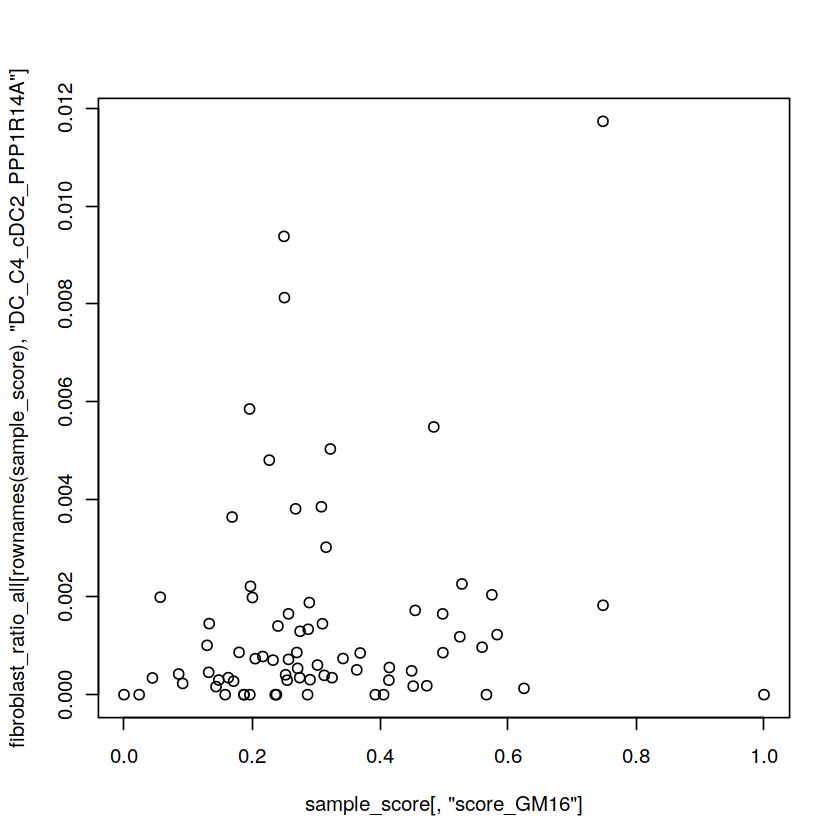

In [51]:
plot(sample_score[,"score_GM16"],fibroblast_ratio_all[rownames(sample_score),"DC_C4_cDC2_PPP1R14A"])

In [31]:
data_plot = data.frame(GM16 = sample_score[,"score_GM16"],fibroblast = fibroblast_ratio_all[rownames(sample_score),"fibroblast"])

In [34]:
data_plot$group = ifelse(data_plot$GM16>median(data_plot$GM16),"high","low")

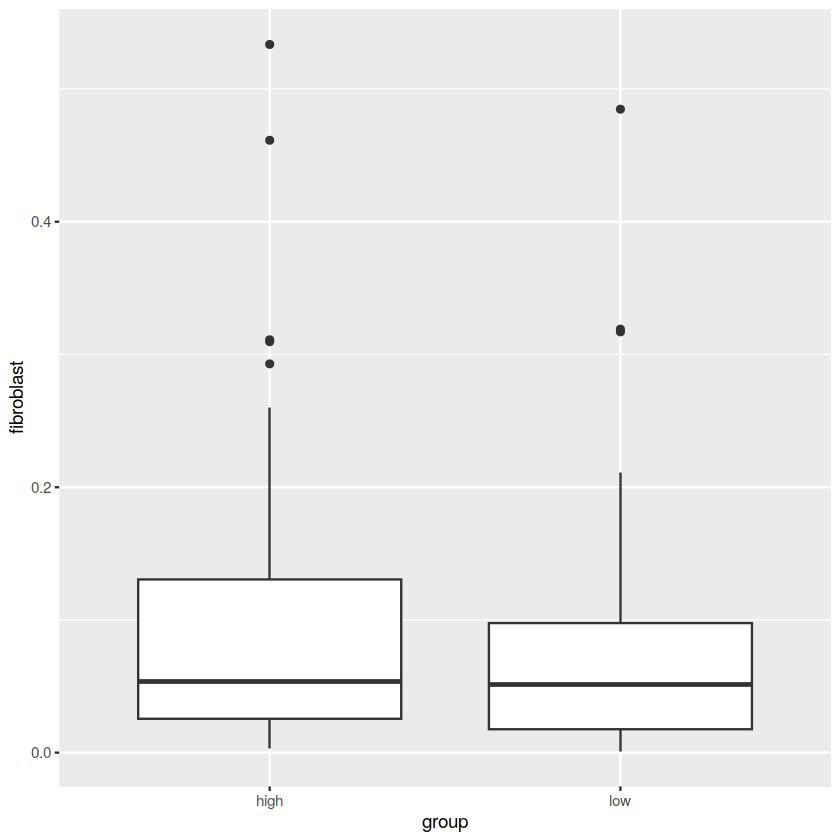

In [39]:
library(ggplot2)
ggplot(data_plot,aes(x = group,y = fibroblast))+geom_boxplot()

In [64]:
# 有可能上皮那边的比例为0呢，这部分也需要

In [65]:
fibroblast_ratio = fibroblast_ratio_all[rownames(sample_score),]
type_all_1 = cbind(fibroblast_ratio,sample_score[,shared_state])
type_all_1 = type_all_1[,colSums(type_all_1)!=0]

In [66]:
colnames(fibroblast_ratio)

[1] "B_C0_IGHA1"          "B_C1_IGHD"           "B_C10_MT1G"         
  [4] "B_C2_MT2A"           "B_C3_IGHG1"          "B_C4_AOPE"          
  [7] "B_C5_ISG15"          "B_C6_SOCS1"          "B_C7_RGS13"         
 [10] "B_C8_PCLAF"          "B_C9_MGP"            "CD4T_C0_ANXA1"      
 [13] "CD4T_C1_FOXP3"       "CD4T_C2_CCR7"        "CD4T_C3_CXCL13"     
 [16] "CD4T_C4_Unassign"    "CD4T_C5_MT1X"        "CD4T_C6_AOPE"       
 [19] "CD4T_C7_ISG15"       "CD4T_C8_MKI67"       "CD4T_C9_COL1A1"     
 [22] "CD8T_C0_CCR7_GZMK"   "CD8T_C1_CXCL13"      "CD8T_C10_SPP1"      
 [25] "CD8T_C11_PCLAF"      "CD8T_C13_PDCD1"      "CD8T_C14_Unassign"  
 [28] "CD8T_C15_COL1A1"     "CD8T_C16_GNLY"       "CD8T_C17_Unassign"  
 [31] "CD8T_C18_IFIT2"      "CD8T_C19_CD24"       "CD8T_C2_GZMK"       
 [34] "CD8T_C20_HAVCR2"     "CD8T_C3_KLRC1"       "CD8T_C4_IFI27"      
 [37] "CD8T_C5_TNFRSF9"     "CD8T_C6_LTB"         "CD8T_C7_APOE"       
 [40] "CD8T_C8_MKI67"       "CD8T_C9_MT1X_MT1E"   "DC_C0_cDC2_IL1B"    
 [43] "DC_C1_cDC2_others"   "DC_C2_cDC3_FSCN1"    "DC_C3_cDC2_FCGBP"   
 [46] "DC_C4_cDC2_PPP1R14A" "DC_C5_cDC1"          "DC_C6_pDC"          
 [49] "DC_C7_cDC3_ACY3"     "EC_C0_ACKR1"         "EC_C1_KDR"          
 [52] "EC_C2_CXCR4"         "EC_C3_GJA5"          "EC_C4_TMSB4X"       
 [55] "EC_C5_PROX1"         "EC_C6_MKI67"         "EC_C7_FCN3"         
 [58] "EC_C8_ACKR1_MT1X"    "F_C0_MMP11"          "F_C1_CFD"           
 [61] "F_C10_ACTG2"         "F_C11_APOD"          "F_C2_COLEC11"       
 [64] "F_C3_IGFBP2"         "F_C4_CCN5"           "F_C5_KRT19"         
 [67] "F_C6_MMP1"           "F_C7_COL4A2"         "F_C8_MT1X"          
 [70] "F_C9_S100B"          "M_C0_FOLR2"          "M_C1_S100A8"        
 [73] "M_C2_SPP1"           "M_C3_FCGBP"          "M_C4_others"        
 [76] "M_C5_PCLAF"          "M_C6_CCL18"          "M_C7_AGR2"          
 [79] "M_C8_MMP9"           "Mast"                "N_C0_N0"            
 [82] "N_C1_N2"             "N_C10_N0"            "N_C11_N3"           
 [85] "N_C2_N1"             "N_C3_N1"             "N_C4_N1"            
 [88] "N_C5_N4"             "N_C6_N2"             "N_C7_N0"            
 [91] "N_C8_N3"             "N_C9_Nc"             "NK_C0_FCGR3A"       
 [94] "NK_C1_AREG"          "NK_C10_HLA-DRA"      "NK_C11_TGFB1"       
 [97] "NK_C12_SRGAP3"       "NK_C13_CXCL8"        "NK_C4_IL7R_AREG"    
[100] "NK_C5_ISG15"         "NK_C6_MKI67"         "NK_C9_GZMK"         
[103] "NKT_C2_GZMH"         "NKT_C3_CAPG"         "NKT_C7_NDFIP2"      
[106] "NKT_C8_TRGC2"        "PC_C0_IGHG1_IGHA1"   "PC_C1_Unassign"     
[109] "PC_C2_IGHA1_PGC"     "PC_C3_IGHG2_IGKV"    "PC_C4_IGHM"         
[112] "PC_C5_STMN1"         "PC_C6_IGHG2_CST3"    "PC_C7_IGHG1_IGLV3"  
[115] "Per_C0_RGS5"         "Per_C1_MYH11"        "Per_C2_VCAN"        
[118] "Per_C3_STEAP4"       "γdT_C12_TRDC"

In [242]:
pheatmap::pheatmap(cor(type_all_1),filename = "celltype_epi_score.pdf",height = 15,width = 15)

In [69]:
cor(type_all_1[,"score_GM16"],type_all_1[,"F_C1_CFD"])

[1] 0.2767717

In [188]:
colnames(type_all_1)

[1] "F_C0_MMP11"    "F_C1_CFD"      "F_C10_APOD"    "F_C2_COLEC11" 
 [5] "F_C3_IGFBP2"   "F_C4_CCN5"     "F_C5_KRT19"    "F_C6_MMP1"    
 [9] "F_C7_COL4A2"   "F_C8_MT1X"     "F_C9_S100B"    "Per_C0_RGS5"  
[13] "Per_C1_MYH11"  "Per_C2_VCAN"   "Per_C3_STEAP4" "VSMC"         
[17] "score_GM1"     "score_GM5"     "score_GM8"     "score_GM16"   
[21] "score_GM3"     "score_GM7"     "score_GM6"

In [189]:
cor_GM16 = c()
for(i in colnames(type_all_1)){
    cor_GM16 = c(cor_GM16,cor(type_all_1[,"score_GM16"],type_all_1[,i]))
}

In [195]:
cor(type_all_1[,"score_GM16"],type_all_1[,"F_C0_MMP11"])

[1] -0.02023391

In [191]:
names(cor_GM16) = colnames(type_all_1)

In [192]:
cor_GM16 = sort(cor_GM16,decreasing = TRUE)

In [ ]:
plot()

In [193]:
as.data.frame(cor_GM16) # 

cor_GM16    
score_GM16     1.000000000
score_GM1      0.463901686
Per_C1_MYH11   0.352347957
F_C4_CCN5      0.202306492
score_GM5      0.156085423
F_C3_IGFBP2    0.122200894
Per_C3_STEAP4  0.102746164
F_C5_KRT19     0.079672072
F_C8_MT1X      0.070002001
F_C1_CFD       0.061831709
score_GM6      0.033686639
VSMC           0.032657112
Per_C2_VCAN    0.014166138
F_C6_MMP1      0.004563106
F_C7_COL4A2   -0.003145231
F_C0_MMP11    -0.020233910
F_C10_APOD    -0.060607711
F_C9_S100B    -0.103182540
Per_C0_RGS5   -0.106628127
score_GM7     -0.116201911
score_GM8     -0.183795029
F_C2_COLEC11  -0.191579875
score_GM3     -0.365445643

In [104]:
cor_GM6 = c()
for(i in colnames(type_all_1)){
    cor_GM6 = c(cor_GM6,cor(type_all_1[,"score_GM6"],type_all_1[,i]))
}

In [105]:
cor_GM6

[1] -0.067210095 -0.039579939 -0.168745616 -0.127433718  0.482530520
  [6] -0.043606462 -0.139588435 -0.026654392  0.002228185  0.076620129
 [11] -0.079621387 -0.115542803  0.020334981 -0.070094239  0.262358580
 [16] -0.047363060  0.026276218  0.377907257  0.020504038  0.347663753
 [21]  0.045630945  0.039202104 -0.071505986 -0.167339361 -0.074865529
 [26]  0.030405033  0.208155284 -0.162947529  0.296354657  0.228453110
 [31]  0.034733750  0.643483132  0.234865913 -0.201774952  0.128059835
 [36]  0.105567928  0.085239299  0.208475392 -0.024393241  0.001526825
 [41] -0.079611702 -0.033384947 -0.031052493  0.077682981  0.213230305
 [46] -0.037935329  0.100256121  0.261461583  0.111622302  0.105908037
 [51] -0.195573995 -0.290756713 -0.141436753 -0.136708277 -0.035032506
 [56]  0.056045180 -0.166676090 -0.116522456 -0.009813043  0.025803432
 [61] -0.019861613  0.101110855  0.034079043  0.014083048 -0.250216578
 [66] -0.039113903  0.095478197  0.016004877 -0.045416655 -0.112342175
 [71] -0.031369297 -0.225330475 -0.027170402  0.081708953  0.217252857
 [76] -0.241695672  0.005732371  0.085611507 -0.045455784  0.394708083
 [81] -0.009075641 -0.013891669  0.072834446  0.022629214  0.381259769
 [86] -0.120191613 -0.087168270 -0.097171089 -0.129370982 -0.245335085
 [91] -0.209658884 -0.240507963 -0.260401252  0.158000161 -0.142128572
 [96] -0.026998815 -0.046205486  0.047056607 -0.145760861  0.080047083
[101]  0.064723396 -0.193463638 -0.064897589 -0.158620083 -0.083692633
[106]  0.415329621 -0.178080839 -0.219015650 -0.167743106 -0.206599636
[111]  0.055132984  0.154651525 -0.046675397  0.042461087 -0.314615298
[116]  0.096564286  0.033686639  0.090534207  0.681291723  1.000000000

In [106]:
names(cor_GM6) = colnames(type_all_1)

In [107]:
cor_GM6 = sort(cor_GM6,decreasing = TRUE)

In [108]:
head(as.data.frame(cor_GM6))

cor_GM6  
score_GM6     1.0000000
score_GM7     0.6812917
CD8T_C10_SPP1 0.6434831
B_C4_AOPE     0.4825305
Per_C2_VCAN   0.4153296
M_C0_FOLR2    0.3947081

In [17]:
x = type_all_1[,"score_GM16"]
y = type_all_1[,"N_C1_MIF+_S100A10-"]

In [13]:
z =lm(y~x+I(x^2))

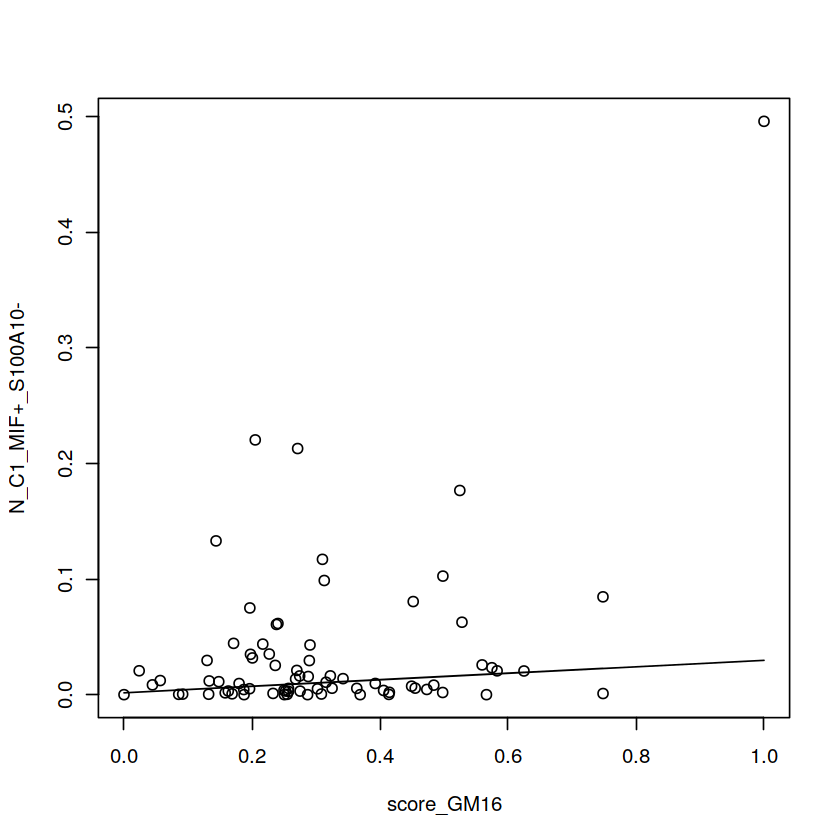

In [21]:
plot(x,y,xlab = "score_GM16",ylab = "N_C1_MIF+_S100A10-")
lines(x,fitted(z))

### 根据病人的类型分组

In [23]:
patient_info = read.csv("/home/wyh/scdata/patient_info/xzh_220109_final_wyh_220426.csv",row.names = 1)

In [24]:
patient_info$metastasis.type[patient_info$metastasis.type=="P_LI"] = "P"
patient_info$metastasis.type[patient_info$metastasis.type %in% c("P_LN","P_LM")] = "P_Metas"

In [25]:
patient_info$metastasis.type

[1] NA        "P"       "P_Metas" "P_Metas" "P_Metas" "P_Metas" "P_Metas"
  [8] "P"       NA        "P_Metas" "P_Metas" NA        "P_Metas" "P_Metas"
 [15] NA        "P_Metas" "P_Metas" "P"       "P_Metas" "P_Metas" NA       
 [22] "P_Metas" "P_Metas" "P_Metas" "P"       "P_Metas" "P_Metas" "P_Metas"
 [29] NA        "P_Metas" NA        "P_Metas" "P"       "P_Metas" NA       
 [36] "P_Metas" "P"       "P"       "P_Metas" "P_Metas" "P_Metas" "P_Metas"
 [43] "P_Metas" NA        "P_Metas" NA        "P_Metas" "P_Metas" "P_Metas"
 [50] NA        "P"       "P_Metas" NA        NA        "P"       "P"      
 [57] "P_Metas" "P_Metas" NA        "P_Metas" NA        "P"       "P"      
 [64] "P"       "P"       "P"       "P_Metas" "P_Metas" NA        "P_Metas"
 [71] "P_Metas" NA        "P_Metas" "P_Metas" NA        NA        "P_Metas"
 [78] "P_Metas" "P"       "P_Metas" NA        "P_Metas" NA        "P_Metas"
 [85] NA        "P"       "P_Metas" "P_Metas" NA        "P_Metas" "P_Metas"
 [92] NA        NA        NA        "P_Metas" "P_Metas" NA        NA       
 [99] "P_Metas" "P"       "P_Metas" NA        NA        "P"       "P_Metas"
[106] "P_Metas" NA        "P_Metas" NA        "P_Metas" NA        "P_Metas"
[113] "P_Metas" "P"       "P"       "P_Metas" NA        "P_Metas" "P_Metas"
[120] "P"       "P"       "P"       "P_Metas" "P_Metas" "P_Metas" "P_Metas"
[127] "P_Metas" NA        "P"       NA        "P_Metas" NA        NA       
[134] NA        "P_Metas" NA        NA        NA        "P_Metas" NA       
[141] NA        NA        NA        NA        NA        NA        NA       
[148] NA        NA        NA        NA        NA        NA        NA       
[155] NA        NA        NA        NA        NA        NA        NA       
[162] NA        NA        NA        "P"       "P"

In [52]:
total = read.csv("/home/wyh/scdata/combined_data/meta_data/celltype20230610/total.csv",row.names = 1)

In [94]:
total[13,] = c(total[13,"Cluster"],"γdT_C12_TRDC")

In [92]:
rownames(total)[13] = "γdT_C12_TRDC"

In [96]:
cluster_left = rownames(total)[total$Cluster>0.625]  # 名字改了一下，这部分手动改吧
cluster_left

[1] "CD8T_C0_CCR7_GZMK"   "CD8T_C1_CXCL13"      "CD8T_C2_GZMK"       
 [4] "CD8T_C3_KLRC1"       "CD8T_C6_LTB"         "CD8T_C8_MKI67"      
 [7] "CD8T_C9_MT1X_MT1E"   "CD8T_C11_PCLAF"      "γdT_C12_TRDC"       
[10] "CD8T_C17_Unassign"   "CD4T_C0_ANXA1"       "CD4T_C1_FOXP3"      
[13] "CD4T_C2_CCR7"        "CD4T_C3_CXCL13"      "CD4T_C4_Unassign"   
[16] "CD4T_C5_MT1X"        "CD4T_C7_ISG15"       "CD4T_C8_MKI67"      
[19] "NK_C0_FCGR3A"        "NK_C1_AREG"          "NKT_C2_GZMH"        
[22] "NKT_C3_CAPG"         "NK_C4_IL7R_AREG"     "NK_C6_MKI67"        
[25] "NKT_C8_TRGC2"        "NK_C12_SRGAP3"       "B_C0_IGHA1"         
[28] "B_C1_IGHD"           "B_C3_IGHG1"          "B_C5_ISG15"         
[31] "B_C8_PCLAF"          "PC_C0_IGHG1_IGHA1"   "PC_C1_Unassign"     
[34] "N_C0_N0"             "N_C1_N2"             "N_C2_N1"            
[37] "N_C7_N0"             "N_C9_Nc"             "DC_C0_cDC2_IL1B"    
[40] "DC_C1_cDC2_others"   "DC_C2_cDC3_FSCN1"    "DC_C4_cDC2_PPP1R14A"
[43] "DC_C5_cDC1"          "DC_C6_pDC"           "DC_C7_cDC3_ACY3"    
[46] "M_C0_FOLR2"          "M_C1_S100A8"         "M_C2_SPP1"          
[49] "M_C3_FCGBP"          "M_C4_others"         "M_C5_PCLAF"         
[52] "M_C7_AGR2"           "EC_C0_ACKR1"         "EC_C1_KDR"          
[55] "EC_C2_CXCR4"         "EC_C3_GJA5"          "EC_C4_TMSB4X"       
[58] "EC_C5_PROX1"         "EC_C6_MKI67"         "F_C0_MMP11"         
[61] "F_C1_CFD"            "Per_C0_RGS5"         "F_C2_COLEC11"       
[64] "Per_C1_MYH11"        "Per_C3_STEAP4"

In [97]:
setdiff(cluster_left,colnames(fibroblast_ratio_all))

character(0)

In [99]:
fibroblast_ratio = fibroblast_ratio_all[patient_info[rownames(fibroblast_ratio_all),"Tumors.for.scRNA.seq.short"]=="P" & patient_info[rownames(fibroblast_ratio_all),"histological.type.short"]=="adeno",]
fibroblast_ratio = fibroblast_ratio[,cluster_left]

In [100]:
fibroblast_ratio_P = fibroblast_ratio[patient_info[rownames(fibroblast_ratio),"metastasis.type"]=="P",]
fibroblast_ratio_P = fibroblast_ratio_P[,colSums(fibroblast_ratio_P)!=0]

In [101]:
library(corrplot)

In [102]:
testRes = cor.mtest(fibroblast_ratio_P, conf.level = 0.95)

In [103]:
pdf("/home/wyh/scdata/combined_data/figures/celltype_cor_PV2.pdf",height = 10,width = 10)
corrplot(cor(fibroblast_ratio_P), p.mat = testRes$p,order = 'hclust', addrect = 2,
         insig = 'label_sig', sig.level = c(0.001, 0.01, 0.05),method = 'color',
         pch.cex = 0.6, pch.col = 'grey20')
dev.off()

Warning message in strwidth(newrownames, cex = tl.cex):
“conversion failure on 'γdT_C12_TRDC' in 'mbcsToSbcs': dot substituted for <ce>”
Warning message in strwidth(newrownames, cex = tl.cex):
“conversion failure on 'γdT_C12_TRDC' in 'mbcsToSbcs': dot substituted for <b3>”
Warning message in strwidth(newcolnames, cex = tl.cex):
“conversion failure on 'γdT_C12_TRDC' in 'mbcsToSbcs': dot substituted for <ce>”
Warning message in strwidth(newcolnames, cex = tl.cex):
“conversion failure on 'γdT_C12_TRDC' in 'mbcsToSbcs': dot substituted for <b3>”
Warning message in strwidth(newrownames, cex = tl.cex):
“conversion failure on 'γdT_C12_TRDC' in 'mbcsToSbcs': dot substituted for <ce>”
Warning message in strwidth(newrownames, cex = tl.cex):
“conversion failure on 'γdT_C12_TRDC' in 'mbcsToSbcs': dot substituted for <b3>”
Warning message in strwidth(newcolnames, cex = tl.cex):
“conversion failure on 'γdT_C12_TRDC' in 'mbcsToSbcs': dot substituted for <ce>”
Warning message in strwidth(newcolnames, 

png 
  2

In [28]:
pheatmap::pheatmap(cor(fibroblast_ratio_P),filename = "/home/wyh/scdata/combined_data/figures/celltype_cor_P.pdf",height = 15,width = 15)

Warning message in strwidth(t, units = "in", cex = fontsize_col/fontsize):
“conversion failure on 'γdT_C12_TRDC' in 'mbcsToSbcs': dot substituted for <ce>”
Warning message in strwidth(t, units = "in", cex = fontsize_col/fontsize):
“conversion failure on 'γdT_C12_TRDC' in 'mbcsToSbcs': dot substituted for <b3>”
Warning message in strwidth(t, units = "in", cex = fontsize_row/fontsize):
“conversion failure on 'γdT_C12_TRDC' in 'mbcsToSbcs': dot substituted for <ce>”
Warning message in strwidth(t, units = "in", cex = fontsize_row/fontsize):
“conversion failure on 'γdT_C12_TRDC' in 'mbcsToSbcs': dot substituted for <b3>”
Warning message in strwidth(t, units = "in", cex = fontsize_col/fontsize):
“conversion failure on 'γdT_C12_TRDC' in 'mbcsToSbcs': dot substituted for <ce>”
Warning message in strwidth(t, units = "in", cex = fontsize_col/fontsize):
“conversion failure on 'γdT_C12_TRDC' in 'mbcsToSbcs': dot substituted for <b3>”
Warning message in strwidth(t, units = "in", cex = fontsize_row/

In [104]:
fibroblast_ratio_P_Metas = fibroblast_ratio[patient_info[rownames(fibroblast_ratio),"metastasis.type"]=="P_Metas",]
fibroblast_ratio_P_Metas = fibroblast_ratio_P_Metas[,colSums(fibroblast_ratio_P_Metas)!=0]
# pheatmap::pheatmap(cor((fibroblast_ratio_P_Metas)),filename = "/home/wyh/scdata/combined_data/figures/celltype_cor_P_Metas.pdf",height = 15,width = 15)

In [105]:
testRes_Metas = cor.mtest(fibroblast_ratio_P_Metas, conf.level = 0.95)

In [106]:
pdf("/home/wyh/scdata/combined_data/figures/celltype_cor_P_MetasV2.pdf",height = 10,width = 10)
corrplot(cor(fibroblast_ratio_P_Metas), p.mat = testRes_Metas$p,order = 'hclust', addrect = 2,
         insig = 'label_sig', sig.level = c(0.001, 0.01, 0.05),method = 'color',
         pch.cex = 0.6, pch.col = 'grey20')
dev.off()

Warning message in strwidth(newrownames, cex = tl.cex):
“conversion failure on 'γdT_C12_TRDC' in 'mbcsToSbcs': dot substituted for <ce>”
Warning message in strwidth(newrownames, cex = tl.cex):
“conversion failure on 'γdT_C12_TRDC' in 'mbcsToSbcs': dot substituted for <b3>”
Warning message in strwidth(newcolnames, cex = tl.cex):
“conversion failure on 'γdT_C12_TRDC' in 'mbcsToSbcs': dot substituted for <ce>”
Warning message in strwidth(newcolnames, cex = tl.cex):
“conversion failure on 'γdT_C12_TRDC' in 'mbcsToSbcs': dot substituted for <b3>”
Warning message in strwidth(newrownames, cex = tl.cex):
“conversion failure on 'γdT_C12_TRDC' in 'mbcsToSbcs': dot substituted for <ce>”
Warning message in strwidth(newrownames, cex = tl.cex):
“conversion failure on 'γdT_C12_TRDC' in 'mbcsToSbcs': dot substituted for <b3>”
Warning message in strwidth(newcolnames, cex = tl.cex):
“conversion failure on 'γdT_C12_TRDC' in 'mbcsToSbcs': dot substituted for <ce>”
Warning message in strwidth(newcolnames, 

png 
  2

## 按照比例来计算

In [41]:
celltype_info= readRDS("/home/wyh/scdata/combined_data/meta_data/celltype0104/combined_celltype_include_normal0104.RDS")

In [29]:
orig.ident = lapply(rownames(celltype_info),
        FUN = function(i){
        data_split = unlist(strsplit(i,split = "_"))
        name = paste(data_split[1:(length(data_split)-1)],collapse = '_')
        #name = do.call(data_split[paste,args = data_split[1:(length(data_split)-1)]])
            return(name)
                          })
orig.ident = unlist(orig.ident)
celltype_info$orig.ident = orig.ident
celltype_info = as.data.frame(celltype_info)
celltype_info$barcode = rownames(celltype_info)

In [ ]:
celltype_info_epi = celltype_info[grepl("GM",celltype_info$subtype),]
celltype_info_epi$subtype = as.character(celltype_info_epi$subtype)

In [289]:
celltype_info_immune = celltype_info[!grepl("GM",celltype_info$subtype),]
celltype_info_immune$subtype = as.character(celltype_info_immune$subtype)

In [290]:
fibroblast_ratio_epi = as.data.frame.array(table(celltype_info_epi[,c("orig.ident","subtype")]))
#write.csv(fibroblast_ratio_all,"./group_compare/sample_fibroblast_subtype_number.csv")
fibroblast_ratio_epi = fibroblast_ratio_epi/rowSums(fibroblast_ratio_epi)
# fibroblast_ratio_all = cbind(fibroblast_ratio_all,patient_info[rownames(fibroblast_ratio_all),])

#fibroblast_ratio_all$number =  rowSums(as.data.frame.array(table(celltype_info[,c("orig.ident","celltype")])))

In [291]:
fibroblast_ratio_epi

GM1         GM16        GM3        GM5         GM6         
GBC_002_P 0.000000000 0.048076923 0.04807692 0.009615385 0.442307692 
GBC_003_P 0.490107914 0.046762590 0.08992806 0.263489209 0.006294964 
GBC_004_P 0.004862237 0.003241491 0.01296596 0.001620746 0.935170178 
GBC_006_P 0.108373662 0.029916410 0.02918316 0.805836633 0.004546121 
GBC_007_P 0.075657895 0.386038012 0.08983918 0.045687135 0.003508772 
GBC_008_P 0.001454139 0.128747204 0.07393736 0.002908277 0.209843400 
GBC_009_P 0.145299145 0.150997151 0.03133903 0.430199430 0.099715100 
GBC_010_P 0.567000000 0.138000000 0.07300000 0.076000000 0.007000000 
GBC_011_P 0.181818182 0.262626263 0.08585859 0.040404040 0.040404040 
GBC_012_P 0.062500000 0.204687500 0.09843750 0.014062500 0.090625000 
GBC_013_P 0.073741007 0.088129496 0.15647482 0.080035971 0.266187050 
GBC_014_P 0.214621633 0.361693031 0.16203506 0.024796922 0.026507054 
GBC_015_P 0.007149047 0.004224437 0.42201040 0.063908146 0.032387348 
GBC_016_P 0.062906725 0.516268980 0.11279826 0.088937093 0.058568330 
GBC_017_P 0.074166667 0.083333333 0.10000000 0.064166667 0.072500000 
GBC_018_P 0.115089514 0.278772379 0.05370844 0.360613811 0.171355499 
GBC_019_P 0.000000000 0.000000000 0.20000000 0.272727273 0.227272727 
GBC_020_P 0.187104072 0.127828054 0.39796380 0.214253394 0.017647059 
GBC_021_P 0.022148916 0.034401508 0.21913289 0.446041470 0.005183789 
GBC_022_P 0.036930962 0.299668375 0.05878806 0.016731987 0.018540850 
GBC_024_P 0.185101580 0.074492099 0.21444695 0.173814898 0.000000000 
GBC_025_P 0.483617300 0.247706422 0.02621232 0.078636959 0.015727392 
GBC_026_P 0.003728561 0.405667412 0.07904549 0.047725578 0.013422819 
GBC_027_P 0.300411523 0.039094650 0.10082305 0.082304527 0.072016461 
GBC_028_P 0.055825243 0.378640777 0.08252427 0.111650485 0.266990291 
GBC_029_P 0.008875740 0.091715976 0.08431953 0.005917160 0.078402367 
GBC_030_P 0.292872625 0.029198011 0.11271197 0.372179013 0.018870330 
GBC_031_P 0.031466263 0.015679066 0.03233131 0.028546713 0.602941176 
GBC_032_P 0.251068791 0.033812670 0.07695297 0.111542946 0.007773028 
GBC_035_P 0.204139229 0.066792098 0.05644403 0.611006585 0.005174036 
⋮         ⋮           ⋮           ⋮          ⋮           ⋮           
GBC_054_P 0.08920188  0.01877934  0.22065728 0.20657277  0.0046948357
GBC_055_P 0.04560261  0.70032573  0.02280130 0.17589577  0.0130293160
GBC_057_P 0.07692308  0.03846154  0.34615385 0.11538462  0.0000000000
GBC_058_P 0.00000000  0.02000000  0.16000000 0.00000000  0.4400000000
GBC_059_P 0.27807018  0.10394737  0.09429825 0.23333333  0.0000000000
GBC_060_P 0.20428336  0.20757825  0.11532125 0.07248764  0.0296540362
GBC_061_P 0.08531935  0.50905624  0.07721640 0.11916111  0.0000000000
GBC_062_P 0.00000000  0.03164557  0.13291139 0.04430380  0.4620253165
GBC_063_P 0.14069264  0.44805195  0.03787879 0.03246753  0.1764069264
GBC_064_P 0.29700162  0.04011345  0.19732577 0.15579417  0.0143841167
GBC_065_P 0.14597075  0.03670777  0.03785489 0.33610553  0.0742758818
GBC_066_P 0.27040816  0.02040816  0.09693878 0.53061224  0.0051020408
GBC_067_P 0.10737813  0.48616601  0.04479578 0.32674572  0.0006587615
GBC_068_P 0.02325581  0.06976744  0.06976744 0.09302326  0.1162790698
GBC_069_P 0.28040541  0.04560811  0.05912162 0.39695946  0.0929054054
GBC_070_P 0.46761800  0.22502744  0.02524698 0.22941822  0.0021953897
GBC_071_P 0.17753867  0.03093477  0.13718897 0.27908541  0.0356422327
GBC_072_P 0.20880121  0.06084977  0.04188164 0.50242792  0.0021244310
GBC_074_P 0.03225806  0.00000000  0.19354839 0.06451613  0.1935483871
GBC_076_P 0.24096386  0.13253012  0.06024096 0.34939759  0.0602409639
GBC_077_P 0.58937824  0.01943005  0.05310881 0.31865285  0.0051813472
GBC_078_P 0.03205128  0.14423077  0.05448718 0.01923077  0.2339743590
GBC_079_P 0.14634146  0.24390244  0.12195122 0.09756098  0.0000000000
GBC_080_P 0.10059172  0.01775148  0.11242604 0.19526627  0.3195266272
GBC_081_P 0.10150376  0.06203008  0.14567669 0.53289474  0.0028195489
GBC_082_P 0.14243323

In [292]:
fibroblast_ratio_immune = as.data.frame.array(table(celltype_info_immune[,c("orig.ident","subtype")]))
#write.csv(fibroblast_ratio_all,"./group_compare/sample_fibroblast_subtype_number.csv")
fibroblast_ratio_immune = fibroblast_ratio_immune/rowSums(fibroblast_ratio_immune)
# fibroblast_ratio_all = cbind(fibroblast_ratio_all,patient_info[rownames(fibroblast_ratio_all),])

#fibroblast_ratio_all$number =  rowSums(as.data.frame.array(table(celltype_info[,c("orig.ident","celltype")])))

In [ ]:
# 直接看相关性就可以

In [293]:
fibroblast_ratio_immune = fibroblast_ratio_immune[rownames(fibroblast_ratio_epi),]
type_all = cbind(fibroblast_ratio_epi,fibroblast_ratio_immune)
type_all = type_all[,colSums(type_all)!=0]

In [296]:
pheatmap::pheatmap(cor(type_all),filename = "celltype_epi_ratio.pdf",height = 15,width = 15)

In [297]:
type_all

GM1         GM16        GM3        GM5         GM6         
GBC_002_P 0.000000000 0.048076923 0.04807692 0.009615385 0.442307692 
GBC_003_P 0.490107914 0.046762590 0.08992806 0.263489209 0.006294964 
GBC_004_P 0.004862237 0.003241491 0.01296596 0.001620746 0.935170178 
GBC_006_P 0.108373662 0.029916410 0.02918316 0.805836633 0.004546121 
GBC_007_P 0.075657895 0.386038012 0.08983918 0.045687135 0.003508772 
GBC_008_P 0.001454139 0.128747204 0.07393736 0.002908277 0.209843400 
GBC_009_P 0.145299145 0.150997151 0.03133903 0.430199430 0.099715100 
GBC_010_P 0.567000000 0.138000000 0.07300000 0.076000000 0.007000000 
GBC_011_P 0.181818182 0.262626263 0.08585859 0.040404040 0.040404040 
GBC_012_P 0.062500000 0.204687500 0.09843750 0.014062500 0.090625000 
GBC_013_P 0.073741007 0.088129496 0.15647482 0.080035971 0.266187050 
GBC_014_P 0.214621633 0.361693031 0.16203506 0.024796922 0.026507054 
GBC_015_P 0.007149047 0.004224437 0.42201040 0.063908146 0.032387348 
GBC_016_P 0.062906725 0.516268980 0.11279826 0.088937093 0.058568330 
GBC_017_P 0.074166667 0.083333333 0.10000000 0.064166667 0.072500000 
GBC_018_P 0.115089514 0.278772379 0.05370844 0.360613811 0.171355499 
GBC_019_P 0.000000000 0.000000000 0.20000000 0.272727273 0.227272727 
GBC_020_P 0.187104072 0.127828054 0.39796380 0.214253394 0.017647059 
GBC_021_P 0.022148916 0.034401508 0.21913289 0.446041470 0.005183789 
GBC_022_P 0.036930962 0.299668375 0.05878806 0.016731987 0.018540850 
GBC_024_P 0.185101580 0.074492099 0.21444695 0.173814898 0.000000000 
GBC_025_P 0.483617300 0.247706422 0.02621232 0.078636959 0.015727392 
GBC_026_P 0.003728561 0.405667412 0.07904549 0.047725578 0.013422819 
GBC_027_P 0.300411523 0.039094650 0.10082305 0.082304527 0.072016461 
GBC_028_P 0.055825243 0.378640777 0.08252427 0.111650485 0.266990291 
GBC_029_P 0.008875740 0.091715976 0.08431953 0.005917160 0.078402367 
GBC_030_P 0.292872625 0.029198011 0.11271197 0.372179013 0.018870330 
GBC_031_P 0.031466263 0.015679066 0.03233131 0.028546713 0.602941176 
GBC_032_P 0.251068791 0.033812670 0.07695297 0.111542946 0.007773028 
GBC_035_P 0.204139229 0.066792098 0.05644403 0.611006585 0.005174036 
⋮         ⋮           ⋮           ⋮          ⋮           ⋮           
GBC_054_P 0.08920188  0.01877934  0.22065728 0.20657277  0.0046948357
GBC_055_P 0.04560261  0.70032573  0.02280130 0.17589577  0.0130293160
GBC_057_P 0.07692308  0.03846154  0.34615385 0.11538462  0.0000000000
GBC_058_P 0.00000000  0.02000000  0.16000000 0.00000000  0.4400000000
GBC_059_P 0.27807018  0.10394737  0.09429825 0.23333333  0.0000000000
GBC_060_P 0.20428336  0.20757825  0.11532125 0.07248764  0.0296540362
GBC_061_P 0.08531935  0.50905624  0.07721640 0.11916111  0.0000000000
GBC_062_P 0.00000000  0.03164557  0.13291139 0.04430380  0.4620253165
GBC_063_P 0.14069264  0.44805195  0.03787879 0.03246753  0.1764069264
GBC_064_P 0.29700162  0.04011345  0.19732577 0.15579417  0.0143841167
GBC_065_P 0.14597075  0.03670777  0.03785489 0.33610553  0.0742758818
GBC_066_P 0.27040816  0.02040816  0.09693878 0.53061224  0.0051020408
GBC_067_P 0.10737813  0.48616601  0.04479578 0.32674572  0.0006587615
GBC_068_P 0.02325581  0.06976744  0.06976744 0.09302326  0.1162790698
GBC_069_P 0.28040541  0.04560811  0.05912162 0.39695946  0.0929054054
GBC_070_P 0.46761800  0.22502744  0.02524698 0.22941822  0.0021953897
GBC_071_P 0.17753867  0.03093477  0.13718897 0.27908541  0.0356422327
GBC_072_P 0.20880121  0.06084977  0.04188164 0.50242792  0.0021244310
GBC_074_P 0.03225806  0.00000000  0.19354839 0.06451613  0.1935483871
GBC_076_P 0.24096386  0.13253012  0.06024096 0.34939759  0.0602409639
GBC_077_P 0.58937824  0.01943005  0.05310881 0.31865285  0.0051813472
GBC_078_P 0.03205128  0.14423077  0.05448718 0.01923077  0.2339743590
GBC_079_P 0.14634146  0.24390244  0.12195122 0.09756098  0.0000000000
GBC_080_P 0.10059172  0.01775148  0.11242604 0.19526627  0.3195266272
GBC_081_P 0.10150376  0.06203008  0.14567669 0.53289474  0.0028195489
GBC_082_P 0.14243323

In [309]:
cor(type_all[,"GM16"],type_all[,"T_CD4+_C2_CCR7+"])

[1] -0.03450732

# 看转移的类型

In [1]:
patient_info = read.csv("/home/wyh/scdata/patient_info/xzh_220109_final_wyh_220426.csv",row.names = 1)
patient_info$metastasis.type[patient_info$metastasis.type=="P_LI"] = "P"
patient_info$metastasis.type = factor(patient_info$metastasis.type,levels = c("P","P_LN","P_LM"))

In [2]:
sample_score = read.csv("/home/wyh/scdata/combined_data/Epithelial/submit/figure_data/heatmap_GM_score.csv",row.names = 1)
sample_score$NewSample.ID = rownames(sample_score)
sample_score = merge(sample_score,patient_info)

In [3]:
shared_state = read.csv("/home/wyh/scdata/combined_data/Epithelial/gene_module/adeno_p/share_state/pvalue_patient_shared_state_23GM_100genes.csv",row.names = 1)[,1]

In [4]:
fibroblast_ratio = sample_score
fibroblast_ratio = fibroblast_ratio[fibroblast_ratio$Tumors.for.scRNA.seq.short=="P",]
fibroblast_ratio = fibroblast_ratio[fibroblast_ratio$histological.type.short %in% "adeno",]

In [5]:
#fibroblast_ratio = fibroblast_ratio_all[fibroblast_ratio$Tumors.for.scRNA.seq.short=="P",]
data_plot = fibroblast_ratio[,c(colnames(fibroblast_ratio)[17],"metastasis.type")]
data_plot_melt = reshape2::melt(data_plot)
colnames(data_plot_melt) = c("metastasis.type","variable","Freq")


Using metastasis.type as id variables



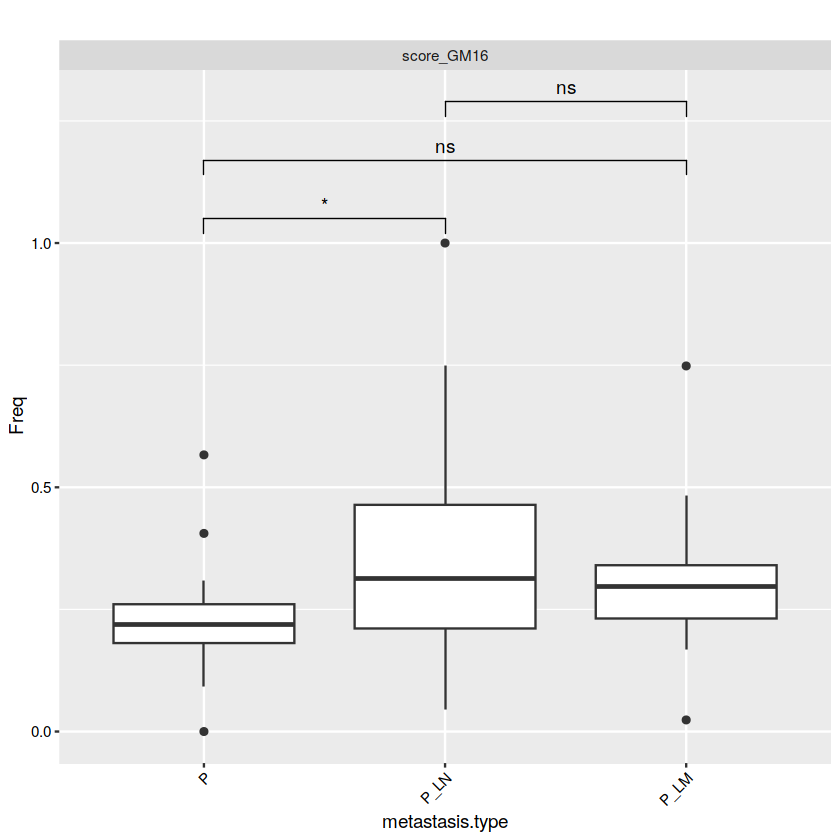

In [23]:

#pdf("/home/wyh/scdata/combined_data//Epithelial/group_compare/adeno_epithelial_metastasis.typeV3.pdf",width = 10,height = 5)
print(ggplot(data_plot_melt, aes( y=Freq, x=metastasis.type)) + geom_boxplot()+facet_grid(. ~variable)+
    theme(axis.text.x = element_text(angle = 45, hjust = 1, vjust = 1,color="black"),
         axis.text.y = element_text(color="black"),
         axis.title=element_text())+ggtitle("")+
      stat_compare_means(comparisons = list(
   c("P","P_LN"),c("P","P_LM"),c("P_LN","P_LM")
  ),method = "wilcox.test",label="p.signif"))
#dev.off()

In [24]:
data_plot_melt$metastasis.type = as.character(data_plot_melt$metastasis.type)
data_plot_melt$metastasis.type[data_plot_melt$metastasis.type %in% c("P_LN","P_LM")] = "P_Mets"

In [100]:
data_plot_melt

metastasis.type variable   Freq      
1  P               score_GM16 0.2713187 
2  P_Mets          score_GM16 0.2751562 
3  P_Mets          score_GM16 0.3022835 
4  P_Mets          score_GM16 0.2681334 
5  P_Mets          score_GM16 0.3690364 
6  P               score_GM16 0.4055966 
7  P_Mets          score_GM16 0.2895832 
8  P_Mets          score_GM16 0.3637067 
9  P_Mets          score_GM16 0.4138704 
10 P_Mets          score_GM16 0.4146267 
11 P_Mets          score_GM16 0.3128984 
12 P_Mets          score_GM16 0.4979559 
13 P               score_GM16 0.0000000 
14 P_Mets          score_GM16 0.5830125 
15 P_Mets          score_GM16 0.2570621 
16 P_Mets          score_GM16 0.4731283 
17 P_Mets          score_GM16 0.1297844 
18 P_Mets          score_GM16 0.3422472 
19 P               score_GM16 0.1581407 
20 P_Mets          score_GM16 0.4493945 
21 P_Mets          score_GM16 0.2269797 
22 P_Mets          score_GM16 0.5247118 
23 P_Mets          score_GM16 0.4982806 
24 P               score_GM16 0.1966476 
25 P_Mets          score_GM16 0.5595603 
26 P_Mets          score_GM16 0.2168638 
27 P               score_GM16 0.1876126 
28 P               score_GM16 0.2570141 
29 P_Mets          score_GM16 0.1331312 
30 P_Mets          score_GM16 0.3224196 
⋮  ⋮               ⋮          ⋮         
46 P_Mets          score_GM16 0.04442603
47 P_Mets          score_GM16 1.00000000
48 P_Mets          score_GM16 0.14381349
49 P_Mets          score_GM16 0.14810418
50 P_Mets          score_GM16 0.24054854
51 P_Mets          score_GM16 0.48404537
52 P               score_GM16 0.56634023
53 P_Mets          score_GM16 0.27002153
54 P_Mets          score_GM16 0.57480442
55 P_Mets          score_GM16 0.16894142
56 P               score_GM16 0.16294399
57 P_Mets          score_GM16 0.23288020
58 P_Mets          score_GM16 0.74839419
59 P_Mets          score_GM16 0.19760208
60 P_Mets          score_GM16 0.27449943
61 P_Mets          score_GM16 0.52809118
62 P_Mets          score_GM16 0.05663718
63 P_Mets          score_GM16 0.25064695
64 P_Mets          score_GM16 0.02372516
65 P_Mets          score_GM16 0.45497370
66 P_Mets          score_GM16 0.30842775
67 P_Mets          score_GM16 0.28786211
68 P_Mets          score_GM16 0.39262677
69 P_Mets          score_GM16 0.17122543
70 P_Mets          score_GM16 0.17981166
71 P               score_GM16 0.13227326
72 P               score_GM16 0.25251793
73 P_Mets          score_GM16 0.31572032
74 P_Mets          score_GM16 0.08547557
75 P               score_GM16 0.18714758

In [93]:
pdf("/home/wyh/scdata/combined_data/Epithelial/submit/figure/GM16_P_P_MetsV2.pdf",width = 4,height = 4)
text_size = 20
print(ggplot(data_plot_melt, aes( y=Freq, x=metastasis.type,fill = metastasis.type)) + geom_violin()+geom_jitter(width = 0.2)+scale_fill_manual(values = c("#0073C2","#EFC000"), guide=FALSE)+
    theme(panel.grid.major = element_blank(),panel.grid.minor = element_blank(),panel.background = element_blank(), 
                                               axis.line = element_line(colour = "black"),
                                               legend.position = "none",
                                               axis.text.x = element_text(color="black", size=text_size),
                                               axis.text.y = element_text(color="black", size=text_size),
                                               axis.title=element_text(size=text_size),
                                               legend.text=element_text(size=text_size),
                                               legend.title=element_text(size=text_size),
                                               plot.title =element_text(hjust = 0.5, size = 20))+
      stat_compare_means(comparisons = list(
   c("P","P_Mets")
  ),method = "wilcox.test",label="p.signif",,size = 8,label.y = 0.8)+ylab("score"))
dev.off()

png 
  2

In [ ]:
patient_info$metastasis.type[patient_info$metastasis.type=="P_LI"] = "P"
patient_info$metastasis.type = factor(patient_info$metastasis.type,levels = c("P","P_LN","P_LM"))

In [82]:
data_plot = fibroblast_ratio[,c(colnames(fibroblast_ratio)[1:cluster_num],"progression.type.short")]
data_plot_melt = reshape2::melt(data_plot)
colnames(data_plot_melt) = c("progression.type.short","variable","Freq")

pdf("/home/wyh/scdata/combined_data//Epithelial/group_compare/epithelial_progression.type.pdf",width = 10,height = 5)
print(ggplot(data_plot_melt, aes( y=Freq, x=progression.type.short)) + geom_boxplot()+facet_grid(. ~variable)+
    theme(axis.text.x = element_text(angle = 45, hjust = 1, vjust = 1,color="black"),
         axis.text.y = element_text(color="black"),
         axis.title=element_text())+ggtitle("")+
                  stat_compare_means(comparisons = list(
    c("Inflam","Proli"),c("Inflam","Mix"),c("Inflam","None"),
    c("Proli","Mix"),c("Proli","None")
  ),label="p.signif"))
dev.off()

Using progression.type.short as id variables



png 
  2

In [78]:
data_plot = fibroblast_ratio[,c(colnames(fibroblast_ratio)[1:cluster_num],"Clinical.stage")]
data_plot_melt = reshape2::melt(data_plot)
colnames(data_plot_melt) = c("Clinical.stage","variable","Freq")

pdf("/home/wyh/scdata/combined_data//Epithelial/group_compare/epithelial_Clinical.stage.pdf",width = 10,height = 5)
print(ggplot(data_plot_melt, aes( y=Freq, x=Clinical.stage)) + geom_boxplot()+facet_grid(. ~variable)+stat_summary(fun=median, geom="line", aes(group=1))  + 
  stat_summary(fun=median, geom="point")+
    theme(axis.text.x = element_text(angle = 45, hjust = 1, vjust = 1,color="black"),
         axis.text.y = element_text(color="black"),
         axis.title=element_text())+ggtitle(""))
dev.off()

Using Clinical.stage as id variables



png 
  2

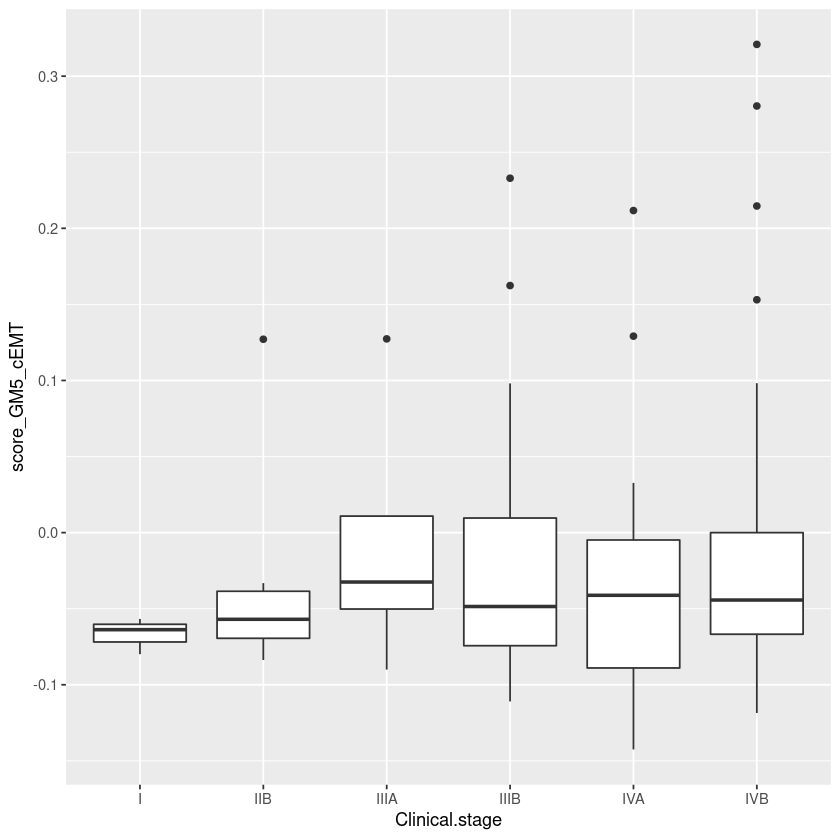

In [64]:
ggplot(fibroblast_ratio,aes(y = score_GM5_cEMT,x = Clinical.stage))+geom_boxplot()

# 在付老师的数据上进行验证

In [7]:
library(Seurat)

Attaching SeuratObject

Attaching sp



In [8]:
# 付老师的数据上验证我们的结论,一共有三个样本是原位没有转移的，另外的样本都是原位发生了转移的，可以看一下,这部分确认了
Malignant = readRDS("/home/wyh/scdata/Fu/Fig3.Malignant.rds")
gene_list = read.csv("/home/wyh/scdata/combined_data/Epithelial/NMFV2/top_genes_23.csv",row.names = 1)[,16]
Malignant = AddModuleScore(Malignant,features = list(c(gene_list)),name = "GM16")


Warning message:
“The following features are not present in the object: NECTIN4, TMEM265, TCIM, not searching for symbol synonyms”


In [9]:
GM16_score = data.frame(GM16_score = Malignant$GM161,patient = Malignant$Sample)

library(data.table)

data_analysis = GM16_score
colnames(data_analysis) = c("GM","orig.ident")
score_summary = setDT(data_analysis)[,list(Mean=mean(GM), Max=max(GM), Min=min(GM), Median=as.numeric(median(GM)), Std=sd(GM)), by=orig.ident]
score_summary = as.data.frame(score_summary)
rownames(score_summary) = score_summary[,"orig.ident"]
GM16_patient = score_summary[,c("orig.ident","Mean")]
GM16_patient$type = "P_Mets"
patient_num = as.data.frame.array(table(Malignant$Sample))
GM16_patient = GM16_patient[GM16_patient$orig.ident %in% rownames(patient_num)[patient_num$`table(Malignant$Sample)`>50],]
GM16_patient[GM16_patient$orig.ident %in% c("GBC1","GBC2"),"type"] = "P"
GM16_patient[grep("-",GM16_patient$orig.ident),"type"] = "Mets"
GM16_patient = GM16_patient[GM16_patient$type!="Mets",]


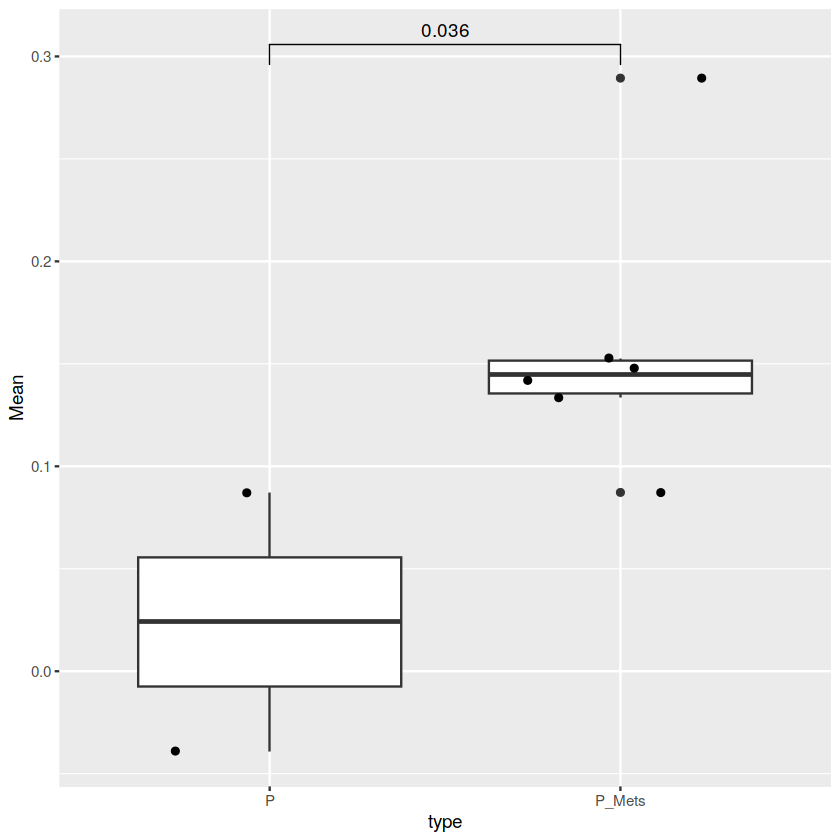

In [13]:
ggplot(GM16_patient, aes( y=Mean, x=type)) + geom_boxplot()+geom_jitter()+
  stat_compare_means(comparisons = list(
  c("P","P_Mets")),method = "wilcox.test",method.args = list(alternative = "less"))



In [14]:
GM16_patient$Mean = (GM16_patient$Mean-min(GM16_patient$Mean))/(max(GM16_patient$Mean)-min(GM16_patient$Mean))

In [15]:
GM16_patient$study = "Wang2022"

In [25]:
data_plot_melt$study = "This study"

In [26]:
colnames(GM16_patient) = c('orig.ident',"Freq",'metastasis.type','study')

In [27]:
head(GM16_patient)

orig.ident Freq      metastasis.type study   
GBC1  GBC1       0.0000000 P               Wang2022
GBC10 GBC10      0.5691669 P_Mets          Wang2022
GBC11 GBC11      1.0000000 P_Mets          Wang2022
GBC2  GBC2       0.3837802 P               Wang2022
GBC4  GBC4       0.5838771 P_Mets          Wang2022
GBC5  GBC5       0.5509303 P_Mets          Wang2022

In [28]:
head(data_plot_melt)

metastasis.type variable   Freq      study     
1 P               score_GM16 0.2713187 This study
2 P_Mets          score_GM16 0.2751562 This study
3 P_Mets          score_GM16 0.3022835 This study
4 P_Mets          score_GM16 0.2681334 This study
5 P_Mets          score_GM16 0.3690364 This study
6 P               score_GM16 0.4055966 This study

In [29]:
data_plot_melt_final = rbind(GM16_patient[,c(2,3,4)],data_plot_melt[,c(3,1,4)])

In [30]:
data_plot_melt_final

Freq       metastasis.type study     
GBC1  0.0000000  P               Wang2022  
GBC10 0.5691669  P_Mets          Wang2022  
GBC11 1.0000000  P_Mets          Wang2022  
GBC2  0.3837802  P               Wang2022  
GBC4  0.5838771  P_Mets          Wang2022  
GBC5  0.5509303  P_Mets          Wang2022  
GBC7  0.3843379  P_Mets          Wang2022  
GBC8  0.5249084  P_Mets          Wang2022  
1     0.2713187  P               This study
2     0.2751562  P_Mets          This study
3     0.3022835  P_Mets          This study
4     0.2681334  P_Mets          This study
5     0.3690364  P_Mets          This study
6     0.4055966  P               This study
7     0.2895832  P_Mets          This study
8     0.3637067  P_Mets          This study
9     0.4138704  P_Mets          This study
10    0.4146267  P_Mets          This study
11    0.3128984  P_Mets          This study
12    0.4979559  P_Mets          This study
13    0.0000000  P               This study
14    0.5830125  P_Mets          This study
15    0.2570621  P_Mets          This study
16    0.4731283  P_Mets          This study
17    0.1297844  P_Mets          This study
18    0.3422472  P_Mets          This study
19    0.1581407  P               This study
20    0.4493945  P_Mets          This study
21    0.2269797  P_Mets          This study
22    0.5247118  P_Mets          This study
⋮     ⋮          ⋮               ⋮         
46    0.04442603 P_Mets          This study
47    1.00000000 P_Mets          This study
48    0.14381349 P_Mets          This study
49    0.14810418 P_Mets          This study
50    0.24054854 P_Mets          This study
51    0.48404537 P_Mets          This study
52    0.56634023 P               This study
53    0.27002153 P_Mets          This study
54    0.57480442 P_Mets          This study
55    0.16894142 P_Mets          This study
56    0.16294399 P               This study
57    0.23288020 P_Mets          This study
58    0.74839419 P_Mets          This study
59    0.19760208 P_Mets          This study
60    0.27449943 P_Mets          This study
61    0.52809118 P_Mets          This study
62    0.05663718 P_Mets          This study
63    0.25064695 P_Mets          This study
64    0.02372516 P_Mets          This study
65    0.45497370 P_Mets          This study
66    0.30842775 P_Mets          This study
67    0.28786211 P_Mets          This study
68    0.39262677 P_Mets          This study
69    0.17122543 P_Mets          This study
70    0.17981166 P_Mets          This study
71    0.13227326 P               This study
72    0.25251793 P               This study
73    0.31572032 P_Mets          This study
74    0.08547557 P_Mets          This study
75    0.18714758 P               This study

In [163]:
pdf("/home/wyh/scdata/combined_data/Epithelial/submit/figure/GM16_P_P_MetsV4.pdf",width = 5,height = 3)
text_size = 20
print(ggplot(data_plot_melt_final, aes( y=Freq, x=metastasis.type,fill = metastasis.type)) + geom_boxplot(outlier.shape = NA)+theme_bw()+
      geom_jitter(width = 0.2)+scale_fill_manual(values = c("#0073C2","#EFC000"), guide=FALSE)+facet_grid(. ~study)+
      theme(legend.position = "none",panel.grid.major = element_blank(),panel.grid.minor = element_blank(),
            panel.background = element_rect(color = "white"),
                                               axis.text.x = element_text(color="black", size=text_size),
                                               axis.text.y = element_text(color="black", size=text_size),
                                               axis.title=element_text(size=text_size),
                                               strip.text.x = element_text(size = text_size-5),
                                               legend.text=element_text(size=text_size),
                                               legend.title=element_text(size=text_size),
                                               plot.title =element_text(hjust = 0.5, size = 20))+
      stat_compare_means(comparisons = list(
   c("P","P_Mets")
  ),method = "wilcox.test",label="p.signif",method.args = list(alternative = "less"),size = 8,label.y = 0.8)+ylab("score"))
dev.off()

png 
  2

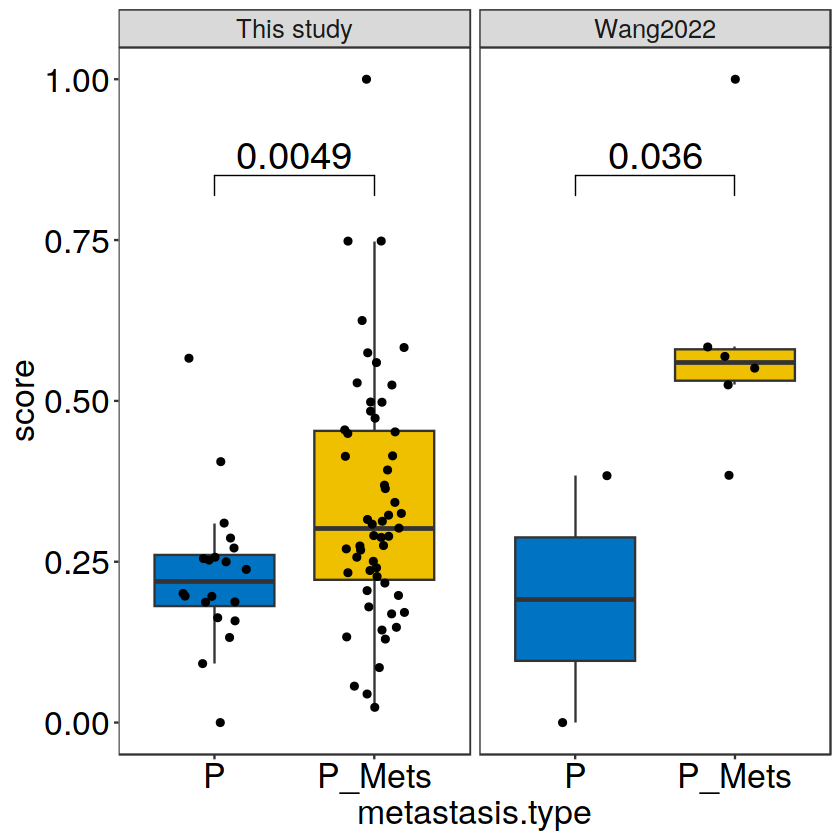

In [32]:
pdf("/home/wyh/scdata/combined_data/Epithelial/submit/figure/GM16_P_P_MetsV4.pdf",width = 5,height = 3)
text_size = 20
print(ggplot(data_plot_melt_final, aes( y=Freq, x=metastasis.type,fill = metastasis.type)) + geom_boxplot(outlier.shape = NA)+theme_bw()+
      geom_jitter(width = 0.2)+scale_fill_manual(values = c("#0073C2","#EFC000"), guide=FALSE)+facet_grid(. ~study)+
      theme(legend.position = "none",panel.grid.major = element_blank(),panel.grid.minor = element_blank(),
            panel.background = element_rect(color = "white"),
                                               axis.text.x = element_text(color="black", size=text_size),
                                               axis.text.y = element_text(color="black", size=text_size),
                                               axis.title=element_text(size=text_size),
                                               strip.text.x = element_text(size = text_size-5),
                                               legend.text=element_text(size=text_size),
                                               legend.title=element_text(size=text_size),
                                               plot.title =element_text(hjust = 0.5, size = 20))+
      stat_compare_means(comparisons = list(
   c("P","P_Mets")
  ),method = "wilcox.test",method.args = list(alternative = "less"),size = 8,label.y = 0.8)+ylab("score"))

# 看组织类型

In [79]:
fibroblast_ratio = fibroblast_ratio_all
fibroblast_ratio = fibroblast_ratio[fibroblast_ratio$Tumors.for.scRNA.seq.short %in% c("P","LI","LN","LM"),]
fibroblast_ratio = fibroblast_ratio[fibroblast_ratio$histological.type.short %in% c("adeno"),]

In [240]:
table(patient_info$histological.type.short)


     adeno adeno squa   adjacent         CC         HG         LG      neuro 
       126          6          1          8          2          2          6 
      squa     undiff        XGC 
         1          2         12 

In [204]:
fibroblast_ratio

score_GM1     score_GM2    score_GM3    score_GM4    score_GM5   
GBC_035_P   0.0467816966 -0.057701716  0.102818583  0.273079332 -0.094318977
GBC_043_P  -0.0299241901 -0.063051726  0.241787815  0.442839818 -0.079917979
GBC_064_P   0.0537981037 -0.007831398  0.334536727  0.397712618 -0.114587469
GBC_071_P   0.0847820183  0.015090081  0.050138210  0.036939822 -0.103171609
GBC_082_P  -0.0044482878 -0.020621288  0.661157588  0.177657783 -0.027984775
GBC_009_P  -0.0038659971 -0.074337063  0.050305892  0.383536631 -0.053396767
GBC_018_P   0.0056570155 -0.082602282  0.039340469  0.406860634  0.032712100
GBC_020_P   0.0562778541  0.102595991  0.205568129  0.256627919 -0.110921348
GBC_025_P   0.0102786862 -0.077675660  0.151470586  0.134335816  0.032884872
GBC_028_P   0.0569544000 -0.070385592  0.171595017  0.004269669  0.280384685
GBC_031_P   0.0631673024 -0.026879542  0.144961592  0.454863559 -0.056723524
GBC_063_LN -0.0366640777 -0.073224101  0.139319892  0.055795419  0.261798685
GBC_064_LM  0.0535105524  0.018147468  0.443108791  0.375212668 -0.101624320
GBC_069_LN  0.0023507418 -0.030488839  0.150735622  0.159161279 -0.014439039
GBC_087_P   0.0260787839 -0.030817986 -0.061424993  0.423033623 -0.044980448
GBC_006_P  -0.0342862292 -0.048295667  0.154819838  0.513699583 -0.092765868
GBC_007_P   0.0775134300 -0.088042757 -0.070330316  0.474700827 -0.118535141
GBC_010_P   0.0082542940 -0.074124031  0.409775741  0.267660817 -0.048556690
GBC_014_P   0.0530996079 -0.008906045  0.169668450  0.188631589 -0.076004794
GBC_015_P   0.0541332776  0.083340416  0.020955121  0.309790175 -0.063775719
GBC_054_LI  0.0059675747 -0.048329729  0.156781988  0.778005289 -0.095369065
GBC_055_P  -0.0281922601 -0.095706607  0.053011565  0.329688347 -0.042749221
GBC_024_LM  0.0828722094  0.111072706  0.277180980 -0.006072589 -0.004119834
GBC_025_LI  0.0062018813 -0.070171789  0.010787685  0.044981741 -0.043895625
GBC_029_P   0.0412672371 -0.052658044  0.441808190  0.175018874  0.129112647
GBC_030_P   0.0026758791 -0.025307639  0.200911512  0.551487408 -0.083712249
GBC_039_P   0.0251856146 -0.087974599  0.062825127  0.236432774 -0.069969410
GBC_044_P   0.0041464845 -0.023607649 -0.002804241  0.374422944 -0.072897531
GBC_045_P  -0.0006686822 -0.066968531  0.136479048  0.239309612 -0.021989306
GBC_046_LN  0.0575082646 -0.035878792 -0.006832895 -0.043150336 -0.030917579
⋮          ⋮             ⋮            ⋮            ⋮            ⋮           
GBC_027_P  -1.134964e-02 -0.06496641   0.510713140  0.35814329  -0.056951953
GBC_036_LI  4.330941e-02 -0.07024507  -0.053107743  0.09261679   0.059981820
GBC_036_P   4.834492e-03 -0.07101818  -0.065612204  0.11867312   0.031133219
GBC_037_P   3.327214e-02 -0.05391653   0.229826177  0.22803027  -0.041125757
GBC_041_P  -2.808133e-02 -0.05078395   0.143234761  0.26926928  -0.036934438
GBC_049_P  -3.268468e-02 -0.07836831   0.115344267  0.13016837  -0.033210738
XGC_009    -2.981249e-02 -0.06098296   0.168038530  0.16417756   0.009238255
GBC_058_P   6.134350e-02 -0.01223376   0.204782276 -0.01010566   0.098092680
GBC_062_LN  5.382954e-02 -0.01886355  -0.030813736  0.03089538   0.027256922
GBC_068_P  -4.988030e-03 -0.04587546   0.217411724  0.16868534  -0.044315042
GBC_069_LI  1.400948e-02 -0.06021194   0.192746296  0.18461881  -0.033356413
GBC_069_P  -4.850213e-03 -0.04882124   0.266032618  0.43589618  -0.052809735
GBC_070_P  -1.952010e-02 -0.07911986   0.027027012  0.41157980  -0.091474127
GBC_071_LI  9.847344e-02 -0.01010491   0.288300887  0.01244619   0.127099088
GBC_074_LI  2.808485e-02 -0.02933086   0.111221758 -0.01195053  -0.041330050
GBC_074_P   7.708153e-02  0.06125924   0.074664412 -0.03666993  -0.053231871
GBC_077_P  -2.936722e-02 -0.07930408   0.322957293  0.32812125  -0.114322425
GBC_078_LN  1.094623e-01  0.02831136  -0.052778770 -0.03508471  -0.036749286
GBC_078_P   6.600337e-02 -0.03088429   0.183733481  0.14590294  -0.017823745
GBC_079_LN  4.815955e-02 -0.01749974   0.140159123  0.05314273  -0.035544596
GBC_079

In [80]:
data_plot = fibroblast_ratio[,c(colnames(fibroblast_ratio)[1:cluster_num],"Tumors.for.scRNA.seq.short")]
data_plot_melt = reshape2::melt(data_plot)
colnames(data_plot_melt) = c("metastasis.type","variable","Freq")
data_plot_melt$metastasis.type = factor(data_plot_melt$metastasis.type,levels = c("CC","XGC","P","LI","LN","LM"))
pdf("/home/wyh/scdata/combined_data//Epithelial/group_compare/Tumors.for.scRNA.seq.short.pdf",width = 10,height = 5)
print(ggplot(data_plot_melt, aes( y=Freq, x=metastasis.type)) + geom_boxplot()+facet_grid(. ~variable)+
    theme(axis.text.x = element_text(angle = 45, hjust = 1, vjust = 1,color="black"),
         axis.text.y = element_text(color="black"),
         axis.title=element_text())+ggtitle("")+
           stat_compare_means(comparisons = list(
    c("P","LI"),c("P","LN"),c("P","LM")
  ),method = "wilcox.test",label="p.signif"))
dev.off()

Using Tumors.for.scRNA.seq.short as id variables



png 
  2

In [50]:
data_plot = fibroblast_ratio[,c(colnames(fibroblast_ratio)[1:cluster_num],"Tumors.for.scRNA.seq.short")]

In [201]:
data_plot

score_GM1     score_GM2    score_GM3    score_GM4    score_GM5   
GBC_035_P   0.0467816966 -0.057701716  0.102818583  0.273079332 -0.094318977
GBC_043_P  -0.0299241901 -0.063051726  0.241787815  0.442839818 -0.079917979
GBC_064_P   0.0537981037 -0.007831398  0.334536727  0.397712618 -0.114587469
GBC_071_P   0.0847820183  0.015090081  0.050138210  0.036939822 -0.103171609
GBC_082_P  -0.0044482878 -0.020621288  0.661157588  0.177657783 -0.027984775
GBC_009_P  -0.0038659971 -0.074337063  0.050305892  0.383536631 -0.053396767
GBC_018_P   0.0056570155 -0.082602282  0.039340469  0.406860634  0.032712100
GBC_020_P   0.0562778541  0.102595991  0.205568129  0.256627919 -0.110921348
GBC_025_P   0.0102786862 -0.077675660  0.151470586  0.134335816  0.032884872
GBC_028_P   0.0569544000 -0.070385592  0.171595017  0.004269669  0.280384685
GBC_031_P   0.0631673024 -0.026879542  0.144961592  0.454863559 -0.056723524
GBC_063_LN -0.0366640777 -0.073224101  0.139319892  0.055795419  0.261798685
GBC_064_LM  0.0535105524  0.018147468  0.443108791  0.375212668 -0.101624320
GBC_069_LN  0.0023507418 -0.030488839  0.150735622  0.159161279 -0.014439039
GBC_087_P   0.0260787839 -0.030817986 -0.061424993  0.423033623 -0.044980448
GBC_006_P  -0.0342862292 -0.048295667  0.154819838  0.513699583 -0.092765868
GBC_007_P   0.0775134300 -0.088042757 -0.070330316  0.474700827 -0.118535141
GBC_010_P   0.0082542940 -0.074124031  0.409775741  0.267660817 -0.048556690
GBC_014_P   0.0530996079 -0.008906045  0.169668450  0.188631589 -0.076004794
GBC_015_P   0.0541332776  0.083340416  0.020955121  0.309790175 -0.063775719
GBC_054_LI  0.0059675747 -0.048329729  0.156781988  0.778005289 -0.095369065
GBC_055_P  -0.0281922601 -0.095706607  0.053011565  0.329688347 -0.042749221
GBC_024_LM  0.0828722094  0.111072706  0.277180980 -0.006072589 -0.004119834
GBC_025_LI  0.0062018813 -0.070171789  0.010787685  0.044981741 -0.043895625
GBC_029_P   0.0412672371 -0.052658044  0.441808190  0.175018874  0.129112647
GBC_030_P   0.0026758791 -0.025307639  0.200911512  0.551487408 -0.083712249
GBC_039_P   0.0251856146 -0.087974599  0.062825127  0.236432774 -0.069969410
GBC_044_P   0.0041464845 -0.023607649 -0.002804241  0.374422944 -0.072897531
GBC_045_P  -0.0006686822 -0.066968531  0.136479048  0.239309612 -0.021989306
GBC_046_LN  0.0575082646 -0.035878792 -0.006832895 -0.043150336 -0.030917579
⋮          ⋮             ⋮            ⋮            ⋮            ⋮           
GBC_027_P  -1.134964e-02 -0.06496641   0.510713140  0.35814329  -0.056951953
GBC_036_LI  4.330941e-02 -0.07024507  -0.053107743  0.09261679   0.059981820
GBC_036_P   4.834492e-03 -0.07101818  -0.065612204  0.11867312   0.031133219
GBC_037_P   3.327214e-02 -0.05391653   0.229826177  0.22803027  -0.041125757
GBC_041_P  -2.808133e-02 -0.05078395   0.143234761  0.26926928  -0.036934438
GBC_049_P  -3.268468e-02 -0.07836831   0.115344267  0.13016837  -0.033210738
XGC_009    -2.981249e-02 -0.06098296   0.168038530  0.16417756   0.009238255
GBC_058_P   6.134350e-02 -0.01223376   0.204782276 -0.01010566   0.098092680
GBC_062_LN  5.382954e-02 -0.01886355  -0.030813736  0.03089538   0.027256922
GBC_068_P  -4.988030e-03 -0.04587546   0.217411724  0.16868534  -0.044315042
GBC_069_LI  1.400948e-02 -0.06021194   0.192746296  0.18461881  -0.033356413
GBC_069_P  -4.850213e-03 -0.04882124   0.266032618  0.43589618  -0.052809735
GBC_070_P  -1.952010e-02 -0.07911986   0.027027012  0.41157980  -0.091474127
GBC_071_LI  9.847344e-02 -0.01010491   0.288300887  0.01244619   0.127099088
GBC_074_LI  2.808485e-02 -0.02933086   0.111221758 -0.01195053  -0.041330050
GBC_074_P   7.708153e-02  0.06125924   0.074664412 -0.03666993  -0.053231871
GBC_077_P  -2.936722e-02 -0.07930408   0.322957293  0.32812125  -0.114322425
GBC_078_LN  1.094623e-01  0.02831136  -0.052778770 -0.03508471  -0.036749286
GBC_078_P   6.600337e-02 -0.03088429   0.183733481  0.14590294  -0.017823745
GBC_079_LN  4.815955e-02 -0.01749974   0.140159123  0.05314273  -0.035544596
GBC_079

# 看一下配对的样本

In [ ]:
# 找到配对样本的信息

In [26]:
patient_LI_info = read.csv("/home/wyh/scdata/patient_info/pair/patient_LI_info.csv",row.names = 1)

In [27]:
patient_LM_info = read.csv("/home/wyh/scdata/patient_info/pair/patient_LM_info.csv",row.names = 1)

In [28]:
patient_LN_info = read.csv("/home/wyh/scdata/patient_info/pair/patient_LN_info.csv",row.names = 1)

In [29]:
fibroblast_ratio = fibroblast_ratio_all

In [125]:
fibroblast_ratio

C0-mCAFs-POSTN C1-iCAFs-FBLN1 C2-vCAFs-MCAM C3-eCAFs-KRT19
CC_004     0.000000000    0.86979167     0.09027778    0.015625000   
CC_006     0.000000000    0.71475410     0.22295082    0.039344262   
CC_007     0.023653566    0.63682678     0.25909753    0.013100437   
CC_008     0.022857143    0.70000000     0.22571429    0.031428571   
GB_001_HG  0.016000000    0.33600000     0.56000000    0.040000000   
GB_001_LG  0.000000000    0.73758865     0.23404255    0.000000000   
GB_002_LG  0.000000000    0.81327801     0.17842324    0.004149378   
GBC_001_LI 0.022727273    0.80303030     0.09090909    0.022727273   
GBC_002_P  0.485623003    0.06709265     0.25559105    0.006389776   
GBC_003_P  0.004464286    0.55803571     0.35714286    0.031250000   
GBC_004_P  0.367454068    0.02572178     0.44409449    0.007874016   
GBC_005_P  0.800000000    0.02162162     0.04684685    0.000000000   
GBC_006_P  0.186046512    0.37674419     0.37209302    0.044186047   
GBC_007_P  0.000000000    0.67063492     0.31746032    0.007936508   
GBC_008_P  0.250666667    0.07466667     0.27200000    0.024000000   
GBC_008_PO 0.000000000    0.68750000     0.28409091    0.000000000   
GBC_009_P  0.000000000    0.77272727     0.11363636    0.000000000   
GBC_010_P  0.206896552    0.26724138     0.35775862    0.027298851   
GBC_011_P  0.005176471    0.77364706     0.11200000    0.072470588   
GBC_012_LI 0.233837689    0.37345254     0.11554333    0.256533700   
GBC_012_P  0.000000000    0.06461598     0.03211453    0.896498356   
GBC_013_P  0.402654867    0.28982301     0.21017699    0.024336283   
GBC_014_P  0.598654709    0.17264574     0.15695067    0.020179372   
GBC_015_P  0.004178273    0.11699164     0.83704735    0.000000000   
GBC_016_P  0.040650407    0.20596206     0.69376694    0.008130081   
GBC_017_LI 0.223684211    0.26644737     0.36184211    0.003289474   
GBC_017_P  0.700483092    0.08212560     0.14492754    0.012077295   
GBC_018_P  0.691207404    0.18510728     0.08119478    0.007572570   
GBC_019_P  0.632911392    0.06329114     0.06329114    0.012658228   
GBC_020_P  0.004016064    0.66265060     0.25702811    0.032128514   
⋮          ⋮              ⋮              ⋮             ⋮             
GBC_069_LN 0.0013333333   0.041333333    0.01600000    0.897333333   
GBC_069_P  0.0000000000   0.337078652    0.60674157    0.000000000   
GBC_070_P  0.0000000000   0.479166667    0.48263889    0.010416667   
GBC_071_P  0.1138211382   0.601626016    0.21951220    0.020325203   
GBC_072_P  0.0231213873   0.335260116    0.59537572    0.017341040   
GBC_073_P  0.6977491961   0.011254019    0.19774920    0.000000000   
GBC_075_P  0.0434782609   0.594202899    0.30434783    0.014492754   
GBC_076_P  0.0436507937   0.742063492    0.15476190    0.006613757   
GBC_077_P  0.0020920502   0.537656904    0.43723849    0.002092050   
GBC_078_P  0.0866141732   0.667322835    0.20078740    0.021653543   
GBC_079_LN 0.0465116279   0.325581395    0.60465116    0.000000000   
GBC_079_P  0.0000000000   0.470967742    0.45806452    0.000000000   
GBC_080_P  0.6796256299   0.116630670    0.15046796    0.001439885   
GBC_081_P  0.0418118467   0.477351916    0.44250871    0.027874564   
GBC_082_P  0.0394904459   0.686624204    0.23949045    0.006369427   
GBC_083_P  0.0663507109   0.303317536    0.54028436    0.000000000   
GBC_084_LM 0.0214285714   0.578571429    0.28571429    0.000000000   
GBC_084_P  0.0110294118   0.463235294    0.47426471    0.003676471   
GBC_085_P  0.0021862702   0.749016178    0.21993878    0.003498032   
GBC_086_P  0.0000000000   0.088235294    0.82352941    0.000000000   
GBC_087_P  0.0272108844   0.750566893    0.15986395    0.018140590   
XGC_003    0.7105263158   0.009868421    0.22368421    0.003289474   
XGC_004    0.8129744651   0.006901311    0.01794341    0.002070393   
XGC_005    0.0163998438   0.775087856    0.15423663    0.020695041   
XGC_007    0.5823529412   0.229411765    0.17352941    0.002941176   
XGC_008    0.00000000

In [30]:
 P <-fibroblast_ratio[patient_LN_info$patient_LN_P_names,itype]
      P[is.na(P)] = 0
      LN <-fibroblast_ratio[patient_LN_info$patient_LN_names,itype]
      LN[is.na(LN)] = 0
      d <- data.frame(P = P, LN = LN)
      print(ggpaired(d, cond1 = "P", cond2 = "LN", fill = "condition", palette = "jco")+stat_compare_means(label = "p.format", paired = TRUE)+ggtitle(itype)
)

ERROR: Error in `[.data.frame`(fibroblast_ratio, patient_LN_info$patient_LN_P_names, : object 'itype' not found


In [19]:
d

P         LN        
1  0.0000000 0.01307190
2  0.1025641 0.34705882
3  0.0000000 0.43859649
4  0.0000000 0.00000000
5  0.0000000 0.08333333
6  0.5639535 0.16666667
7  0.1428571 0.17073171
8  0.0000000 0.02857143
9  0.0000000 0.00000000
10 0.0000000 0.00000000
11 0.6422018 0.00000000
12 0.1237113 0.00000000

In [34]:
cluster_num

[1] 14

In [35]:
pdf("./group_compare/pair_sample_LN_immune2.pdf",height = 10,width = 15)

P <-fibroblast_ratio[patient_LN_info$patient_LN_P_names,1:cluster_num]
P[is.na(P)] = 0
P$cluster = "P"
LN <-fibroblast_ratio[patient_LN_info$patient_LN_names,1:cluster_num]
LN[is.na(LN)] = 0
LN$cluster = "LN"
d <- rbind(P = P, LN = LN)
d_melt = melt(d)
d_melt$ID = rep(1:nrow(P),cluster_num*2)
p <- ggpaired(d_melt, x = "cluster", y = "value", group = 1,
          color = "cluster", palette = "jco", id = "ID",
          line.color = "gray", line.size = 0.4,
          facet.by = "variable", short.panel.labs = FALSE,ncol=4)
# Use only p.format as label. Remove method name.
p + stat_compare_means(label = "p.format", paired = TRUE)
dev.off()

Using cluster as id variables

Warning message:
“Computation failed in `stat_compare_means()`:
arguments imply differing number of rows: 0, 1”


png 
  2

In [40]:
pdf("./group_compare/pair_sample_LM_immune2.pdf",height = 10,width = 15)

P <-fibroblast_ratio[patient_LM_info$patient_LM_P_names,1:cluster_num]
P[is.na(P)] = 0
P$cluster = "P"
LM <-fibroblast_ratio[patient_LM_info$patient_LM_names,1:cluster_num]
LM[is.na(LM)] = 0
LM$cluster = "LM"
d <- rbind(P = P, LM = LM)
d_melt = melt(d)
d_melt$ID = rep(1:nrow(P),cluster_num*2)
p <- ggpaired(d_melt, x = "cluster", y = "value", group = 1,
          color = "cluster", palette = "jco", id = "ID",
          line.color = "gray", line.size = 0.4,
          facet.by = "variable", short.panel.labs = FALSE,ncol=4)
# Use only p.format as label. Remove method name.
p + stat_compare_means(label = "p.format", paired = TRUE)
dev.off()

Using cluster as id variables

Warning message:
“Computation failed in `stat_compare_means()`:
arguments imply differing number of rows: 0, 1”
Warning message:
“Computation failed in `stat_compare_means()`:
arguments imply differing number of rows: 0, 1”


png 
  2

In [39]:
pdf("./group_compare/pair_sample_LI_immune2.pdf",height = 10,width = 15)

P <-fibroblast_ratio[patient_LI_info$patient_LI_P_names,1:cluster_num]
P[is.na(P)] = 0
P$cluster = "P"
LI <-fibroblast_ratio[patient_LI_info$patient_LI_names,1:cluster_num]
LI[is.na(LI)] = 0
LI$cluster = "LI"
d <- rbind(P = P, LI = LI)
d_melt = melt(d)
d_melt$ID = rep(1:nrow(P),cluster_num*2)
p <- ggpaired(d_melt, x = "cluster", y = "value", group = 1,
          color = "cluster", palette = "jco", id = "ID",
          line.color = "gray", line.size = 0.4,
          facet.by = "variable", short.panel.labs = FALSE,ncol=4)
# Use only p.format as label. Remove method name.
p + stat_compare_means(label = "p.format", paired = TRUE)
dev.off()

Using cluster as id variables

Warning message:
“Computation failed in `stat_compare_means()`:
arguments imply differing number of rows: 0, 1”


png 
  2

# EMT样的细胞类型主要来源于哪几个病人

In [270]:
fibroblast_ratio_EMT = fibroblast_ratio[,4]

In [271]:
names(fibroblast_ratio_EMT) = rownames(fibroblast_ratio)

In [272]:
fibroblast_ratio_EMT = sort(fibroblast_ratio_EMT,decreasing = TRUE)

In [273]:
fibroblast_ratio_EMT = as.data.frame(fibroblast_ratio_EMT)

In [274]:
fibroblast_ratio_EMT$number = rowSums(as.data.frame.array(table(celltype_info[,c("orig.ident","celltype")])))

In [279]:
fibroblast_ratio_EMT["GBC_024_P",]

fibroblast_ratio_EMT number
GBC_024_P 0.007936508          126

# 和预后关联一下,如果某个病人没有这种细胞类型，应该怎么办？不纳入进来还是但当成是0

In [77]:
library(dplyr)
library(survminer)
library(survival)

Loading required package: ggplot2

Loading required package: ggpubr

Warning message:
“package ‘survival’ was built under R version 4.0.5”

Attaching package: ‘survival’


The following object is masked from ‘package:survminer’:

    myeloma




In [78]:
setwd("/home/wyh/scdata/combined_data/Epithelial/group_compare")

In [79]:
patient_info = read.csv("/home/wyh/scdata/patient_info/xzh_220109_final_wyh_220426.csv",row.names = 1)
patient_info$metastasis.type[patient_info$metastasis.type=="P_LI"] = "P"
patient_info$metastasis.type = factor(patient_info$metastasis.type,levels = c("P","P_LN","P_LM"))

In [80]:
survival_info = read.csv("/home/wyh/scdata/patient_info/survival/survival_0411.csv",row.names = 1)
head(survival_info)

Sample.ID NewSample.ID Tumors.for.scRNA.seq Sex Age TNM    
GBC_001_LI GBC1      GBC_001_LI   liver invasion       M   67  T4NxM1 
GBC_002_P  GBC2      GBC_002_P    Primary              F   85  T2bN0M0
GBC_003_P  GBC3      GBC_003_P    Primary              F   71  T4NxM0 
GBC_004_P  GBC4      GBC_004_P    Primary              M   71  T3N1M1 
GBC_005_P  GBC5      GBC_005_P    Primary              M   68  T4NxM0 
GBC_006_P  GBC6      GBC_006_P    Primary              M   59  T4N1M0 
           Clinical.stage histological.type       Differentiation
GBC_001_LI IVB            adenocarcinoma          Moderate       
GBC_002_P  IIB            adenocarcinoma          Moderate       
GBC_003_P  IVA            adenocarcinoma          Moderate       
GBC_004_P  IVB            adenocarcinoma          Poor           
GBC_005_P  IVA            adenosquamous carcinoma Poor           
GBC_006_P  IVA            adenocarcinoma          Moderate       
           CA.19.9..U.ml. ⋯ histological.type.short patient.index
GBC_001_LI >1000          ⋯ adeno                   237090       
GBC_002_P  Negative       ⋯ adeno                   365687       
GBC_003_P  57.38          ⋯ adeno                   365672       
GBC_004_P  386            ⋯ adeno                   237543       
GBC_005_P  Negative       ⋯ adeno squa              237456       
GBC_006_P  61.09          ⋯ adeno                   365681       
           Tumors.for.scRNA.seq.short metastasis.type progression.type
GBC_001_LI LI                         NA              Inflammatory    
GBC_002_P  P                          P               Inflammatory    
GBC_003_P  P                          P_LN            Proliferative   
GBC_004_P  P                          P_LM            Inflammatory    
GBC_005_P  P                          P_LN            Inflammatory    
GBC_006_P  P                          P_LN            Proliferative   
           progression.type.short DFS_month OS_month event        patient_index
GBC_001_LI Inflam                   NA       6.0     dead         237090       
GBC_002_P  Inflam                 11.8      11.8     norecurrence 365687       
GBC_003_P  Proli                    NA       5.0     dead         365672       
GBC_004_P  Inflam                 11.6      11.6     norecurrence 237543       
GBC_005_P  Inflam                  1.6       3.5     dead         237456       
GBC_006_P  Proli                    NA       8.4     dead         365681

In [82]:
sample_score = read.csv("/home/wyh/scdata/combined_data/Epithelial/submit/figure_data/heatmap_GM_score.csv",row.names = 1)
sample_score$NewSample.ID = rownames(sample_score)
sample_score = merge(sample_score,patient_info)
rownames(sample_score) = sample_score$NewSample.ID

In [83]:
fibroblast_ratio = sample_score
fibroblast_ratio = fibroblast_ratio[fibroblast_ratio$Tumors.for.scRNA.seq.short=="P",]
fibroblast_ratio = fibroblast_ratio[fibroblast_ratio$histological.type.short %in% "adeno",]

common_patient = intersect(rownames(fibroblast_ratio),rownames(survival_info))
fibroblast_ratio = left_join(fibroblast_ratio[common_patient,],survival_info[common_patient,],by = "NewSample.ID")
fibroblast_ratio$event01 = ifelse(fibroblast_ratio$event=="dead",1,0)

In [84]:
itype = "score_GM16"
fibroblast_ratio[paste0("Score")] = ifelse(fibroblast_ratio[itype] > median(fibroblast_ratio[,itype]),'High','Low')

In [85]:
fibroblast_ratio

NewSample.ID score_GM1  score_GM2   score_GM3  score_GM4  score_GM5 
1  GBC_002_P    0.44399297 0.210052092 0.23779611 0.08053711 0.22593249
2  GBC_003_P    0.67603569 0.097150269 0.24197115 0.05181380 0.48768321
3  GBC_004_P    0.40368361 0.107992654 0.33486626 0.05915191 0.08019213
4  GBC_006_P    0.32431437 0.006899182 0.22489054 0.04293514 1.00000000
5  GBC_007_P    0.36769027 0.057225855 0.22750882 0.05816165 0.22771026
6  GBC_008_P    0.31468210 0.045908909 0.55313174 0.04295366 0.18622124
7  GBC_009_P    0.33394660 0.055153017 0.25165204 0.09205186 0.47108098
8  GBC_010_P    0.78173839 0.030451640 0.21995755 0.03208255 0.36804433
9  GBC_013_P    0.38078228 0.037245202 0.48658804 0.05082661 0.16901903
10 GBC_015_P    0.03505939 0.043133826 0.72590237 1.00000000 0.19183385
11 GBC_016_P    0.46735244 0.039125291 0.29318638 0.05960119 0.28101768
12 GBC_017_P    0.17483031 0.043358688 0.39701232 0.02461988 0.28859981
13 GBC_018_P    0.42861275 0.063779525 0.27736204 0.07287868 0.59302130
14 GBC_019_P    0.10241478 0.038230161 0.59616320 0.05347644 0.46855830
15 GBC_021_P    0.21834812 0.020844648 0.57416041 0.06280111 0.63074587
16 GBC_022_P    0.42691895 0.058971987 0.43693645 0.08708511 0.21837916
17 GBC_024_P    0.19178980 0.065532350 0.50691638 0.04057864 0.39315756
18 GBC_025_P    0.83497573 0.082467841 0.17537479 0.03937917 0.31487915
19 GBC_026_P    0.22989197 0.016966619 0.47603088 0.08479207 0.23598989
20 GBC_027_P    0.51204970 0.064848406 0.30384763 0.11132612 0.14695512
21 GBC_030_P    0.44611856 0.047449921 0.29927492 0.12817608 0.45687901
22 GBC_031_P    0.67492487 0.067280097 0.42246392 0.07315056 0.20005510
23 GBC_035_P    0.45869254 0.028404880 0.27807417 0.03438038 0.72676424
24 GBC_036_P    0.43265533 1.000000000 0.00000000 0.00000000 0.33003878
25 GBC_037_P    0.49874294 0.037678100 0.37550301 0.07304835 0.17030154
26 GBC_040_P    0.52113754 0.004339554 0.48182721 0.12033282 0.17812071
27 GBC_043_P    0.31820665 0.020328810 0.31567187 0.06218493 0.54638003
28 GBC_044_P    0.09582739 0.020914370 0.42854286 0.03354923 0.28256053
29 GBC_046_P    0.22647212 0.107353309 0.35297584 0.06775918 0.14239596
30 GBC_049_P    0.16075474 0.207964320 0.37849671 0.05242187 0.30391005
31 GBC_050_P    0.26783709 0.128618316 0.41218079 0.06961130 0.54835346
32 GBC_051_P    0.54813384 0.108713619 0.05459370 0.01207306 0.39674086
33 GBC_052_P    0.66133569 0.072192173 0.25742466 0.05447469 0.33001661
34 GBC_053_P    0.44841322 0.071105728 0.21779355 0.06436628 0.15765932
35 GBC_054_P    0.15983729 0.046938709 0.38988110 0.11113004 0.21726936
36 GBC_058_P    0.22168842 0.044615949 0.58674581 0.07271046 0.00000000
37 GBC_059_P    0.46907210 0.063009588 0.25657653 0.06695691 0.39940573
38 GBC_060_P    0.53016271 0.124288477 0.40173254 0.02266826 0.20321859
39 GBC_061_P    0.45597616 0.027202761 0.18841203 0.01706682 0.35713632
40 GBC_064_P    0.50316562 0.068654248 0.41663007 0.03097786 0.41030606
41 GBC_067_P    0.51826202 0.017703163 0.18451925 0.04171958 0.72350074
42 GBC_068_P    0.22218946 0.058879179 0.37561651 0.05334716 0.20848034
43 GBC_069_P    0.50571856 0.057830119 0.28544663 0.05701941 0.65483592
44 GBC_070_P    0.79372869 0.080951166 0.11091614 0.05402244 0.51234105
45 GBC_071_P    0.26958039 0.064311357 0.34102328 0.06988886 0.39565352
46 GBC_072_P    0.37689481 0.088498478 0.12278753 0.06782235 0.56510696
47 GBC_074_P    0.27403233 0.009280464 0.64528461 0.06784464 0.10988163
48 GBC_076_P    0.55802461 0.032702478 0.20327746 0.05025861 0.64559355
49 GBC_078_P    0.25444677 0.157380497 0.34042031 0.03631903 0.09469422
50 GBC_079_P    0.36755631 0.054530954 0.37052442 0.08210542 0.21064956
51 GBC_080_P    0.36796383 0.150858927 0.28083741 0.10141125 0.33490856
52 GBC_081_P    0.21380317 0.012181269 0.37099230 0.09249432 0.47382760
53 GBC_082_P    0.28495553 0.039433624 0.44338951 0.08962813 0.11252262
54 GBC_084_P    0.53163646 0.190128811 0.05627234 0.06321405 0.43152584
55 GBC_085_P    0.50317587 0.058730026 0.31

In [44]:
fit<-survfit(Surv(OS_month, event01)~Score, data=fibroblast_ratio)
 

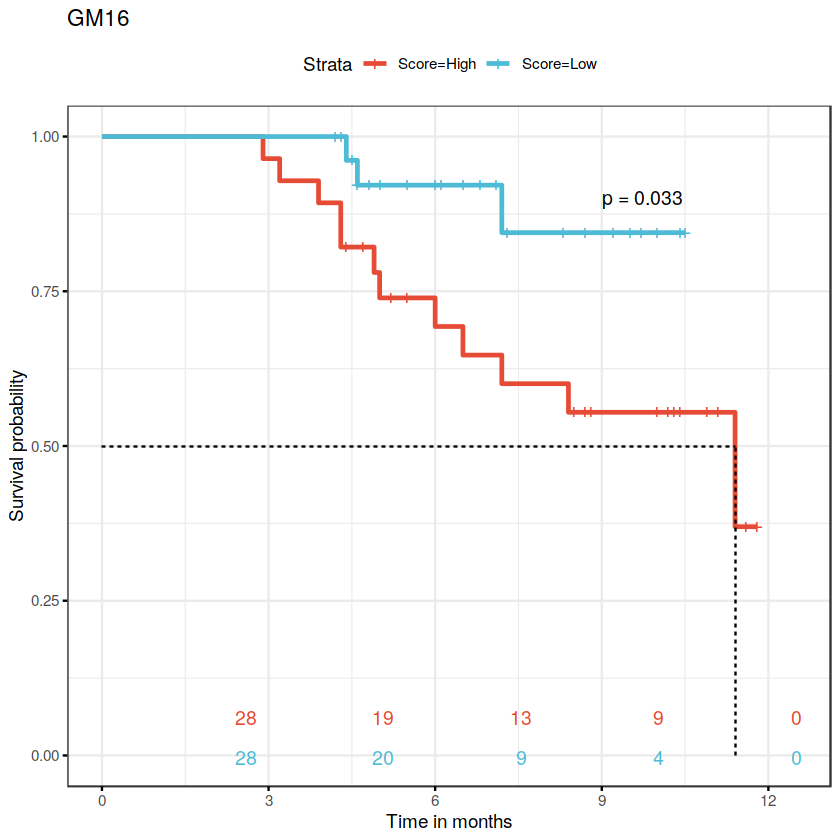

In [45]:
 p = ggsurvplot(
    fit,                     # survfit object with calculated statistics.
    data = fibroblast_ratio,             # data used to fit survival curves.
    risk.table = TRUE,       # show risk table.
    pval = TRUE,             # show p-value of log-rank test.
    #conf.int = TRUE,         # show confidence intervals for
    palette = "npg",
    xlab = "Time in months",   # customize X axis label.
    ggtheme = theme_bw(),
    #conf.int.style = "step",  # customize style of confidence intervals  "ribbon" 'step'
    surv.median.line = "hv",  # add the median survival pointer.
    # legend.labs = c("TP1", "TP2","TP3","TP4","TP5")    # change legend labels.
    tables.y.text = T,
    risk.table.pos = "in",
    risk.table.col = "strata",
    fontsize = 4,
    pval.size = 4,
    #surv.plot.height = 0.8,
    #tables.height = 0.2,
    pval.coord = c(9, 0.9),
    legend = "top",
    title = "GM16"
  )
p

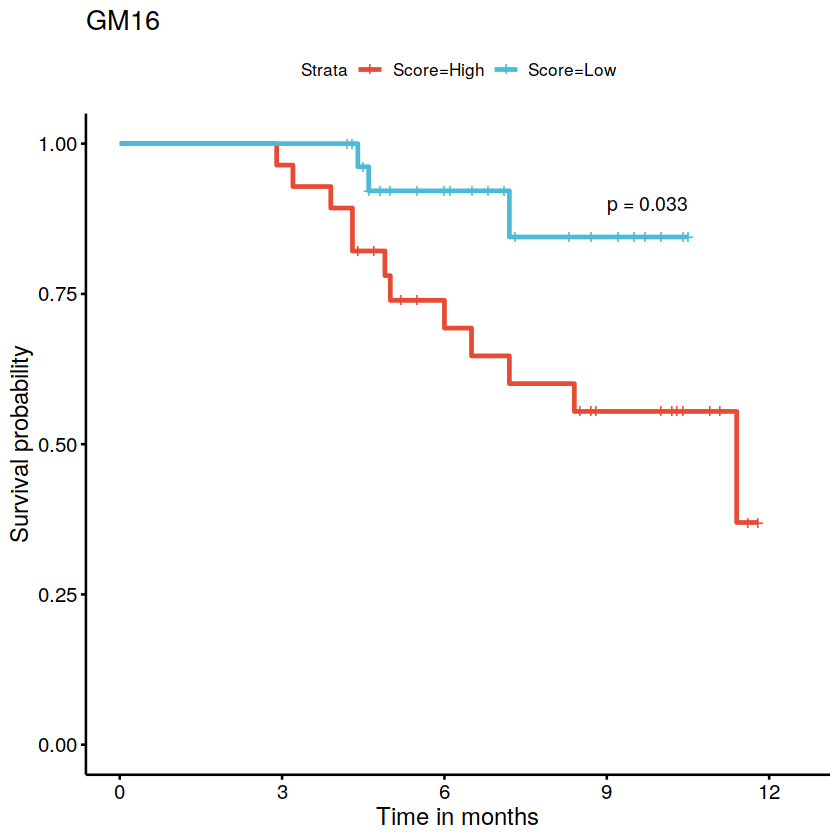

In [50]:
p = ggsurvplot(
    fit,                     # survfit object with calculated statistics.
    data = fibroblast_ratio,             # data used to fit survival curves.
    #risk.table = TRUE,       # show risk table.
    pval = TRUE,             # show p-value of log-rank test.
    #conf.int = TRUE,         # show confidence intervals for
    palette = "npg",
    xlab = "Time in months",   # customize X axis label.
    #ggtheme = theme_bw(),
    #conf.int.style = "step",  # customize style of confidence intervals  "ribbon" 'step'
    #surv.median.line = "hv",  # add the median survival pointer.
    # legend.labs = c("TP1", "TP2","TP3","TP4","TP5")    # change legend labels.
    tables.y.text = T,
    risk.table.pos = "in",
    risk.table.col = "strata",
    fontsize = 4,
    pval.size = 4,
    #surv.plot.height = 0.8,
    #tables.height = 0.2,
    pval.coord = c(9, 0.9),
    legend = "top",
    title = "GM16"
  )
p

In [51]:
pdf("../submit/figure/OS_survivalV3.pdf",height = 3.5,width = 3.5)
print(p,newpage = FALSE)
dev.off()

png 
  2

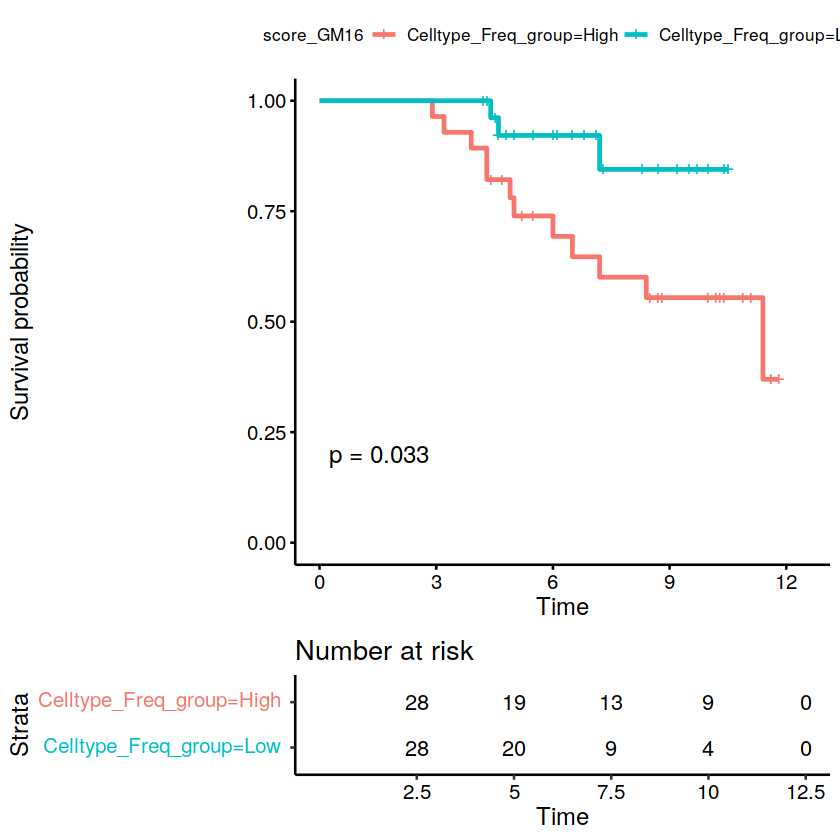

In [179]:

fit<-survfit(Surv(OS_month, event01)~Celltype_Freq_group, data=fibroblast_ratio)
print(ggsurvplot(fit, data = fibroblast_ratio, risk.table = TRUE, conf.int = FALSE,pval = TRUE,
           xlab="Time")+
  guides(
    fill = guide_legend(title = itype),
    color = guide_legend(title = itype)
  ))

In [ ]:
# 下面是循环每一种细胞类型都看

In [171]:
pdf(paste0("./survivalV5.pdf"),width = 10,height = 8)
for(itype in colnames(unique(celltype_info))[1:23]){
      fibroblast_ratio[paste0("Celltype","_Freq_group")] = ifelse(fibroblast_ratio[itype] > median(fibroblast_ratio[,itype]),'High','Low')
      fit<-survfit(Surv(OS_month, event01)~Celltype_Freq_group, data=fibroblast_ratio)
      print(ggsurvplot(fit, data = fibroblast_ratio, risk.table = TRUE, conf.int = FALSE,pval = TRUE,
           xlab="Time")+
  guides(
    fill = guide_legend(title = itype),
    color = guide_legend(title = itype)
  ))
}
dev.off()

png 
  2

In [170]:
getwd()

[1] "/home/wyh/scdata/combined_data/Epithelial/group_compare"

In [ ]:
# 单独11个基因进行打分

In [26]:
colnames(unique(celltype_info))[1:2]

[1] "score_GM1" "score_GM2"

In [29]:
colnames(fibroblast_ratio)

[1] "B_C0_IGHA1"                 "B_C1_IGHD"                 
  [3] "B_C10_MT1G"                 "B_C2_MT2A"                 
  [5] "B_C3_IGHG1"                 "B_C4_AOPE"                 
  [7] "B_C5_ISG15"                 "B_C6_SOCS1"                
  [9] "B_C7_RGS13"                 "B_C8_PCLAF"                
 [11] "B_C9_MGP"                   "CD4T_C0_ANXA1"             
 [13] "CD4T_C1_FOXP3"              "CD4T_C2_CCR7"              
 [15] "CD4T_C3_CXCL13"             "CD4T_C4_Unassign"          
 [17] "CD4T_C5_MT1X"               "CD4T_C6_AOPE"              
 [19] "CD4T_C7_ISG15"              "CD4T_C8_MKI67"             
 [21] "CD4T_C9_COL1A1"             "CD8T_C0_CCR7_GZMK"         
 [23] "CD8T_C1_CXCL13"             "CD8T_C10_SPP1"             
 [25] "CD8T_C11_PCLAF"             "CD8T_C13_PDCD1"            
 [27] "CD8T_C14_Unassign"          "CD8T_C15_COL1A1"           
 [29] "CD8T_C16_GNLY"              "CD8T_C17_Unassign"         
 [31] "CD8T_C18_IFIT2"             "CD8T_C19_CD24"             
 [33] "CD8T_C2_GZMK"               "CD8T_C20_HAVCR2"           
 [35] "CD8T_C3_KLRC1"              "CD8T_C4_IFI27"             
 [37] "CD8T_C5_TNFRSF9"            "CD8T_C6_LTB"               
 [39] "CD8T_C7_APOE"               "CD8T_C8_MKI67"             
 [41] "CD8T_C9_MT1X_MT1E"          "DC_C0_cDC2_IL1B"           
 [43] "DC_C1_cDC2_others"          "DC_C2_cDC3_FSCN1"          
 [45] "DC_C3_cDC2_FCGBP"           "DC_C4_cDC2_PPP1R14A"       
 [47] "DC_C5_cDC1"                 "DC_C6_pDC"                 
 [49] "DC_C7_cDC3_ACY3"            "EC_C0_ACKR1"               
 [51] "EC_C1_KDR"                  "EC_C2_CXCR4"               
 [53] "EC_C3_GJA5"                 "EC_C4_TMSB4X"              
 [55] "EC_C5_PROX1"                "EC_C6_MKI67"               
 [57] "EC_C7_FCN3"                 "EC_C8_ACKR1_MT1X"          
 [59] "Epithelial"                 "F_C0_MMP11"                
 [61] "F_C1_CFD"                   "F_C10_ACTG2"               
 [63] "F_C11_APOD"                 "F_C2_COLEC11"              
 [65] "F_C3_IGFBP2"                "F_C4_CCN5"                 
 [67] "F_C5_KRT19"                 "F_C6_MMP1"                 
 [69] "F_C7_COL4A2"                "F_C8_MT1X"                 
 [71] "F_C9_S100B"                 "M_C0_FOLR2"                
 [73] "M_C1_S100A8"                "M_C2_SPP1"                 
 [75] "M_C3_FCGBP"                 "M_C4_others"               
 [77] "M_C5_PCLAF"                 "M_C6_CCL18"                
 [79] "M_C7_AGR2"                  "M_C8_MMP9"                 
 [81] "Mast"                       "N_C0_N0"                   
 [83] "N_C1_N2"                    "N_C10_N0"                  
 [85] "N_C11_N3"                   "N_C2_N1"                   
 [87] "N_C3_N1"                    "N_C4_N1"                   
 [89] "N_C5_N4"                    "N_C6_N2"                   
 [91] "N_C7_N0"                    "N_C8_N3"                   
 [93] "N_C9_Nc"                    "NK_C0_FCGR3A"              
 [95] "NK_C1_AREG"                 "NK_C10_HLA-DRA"            
 [97] "NK_C11_TGFB1"               "NK_C12_SRGAP3"             
 [99] "NK_C13_CXCL8"               "NK_C4_IL7R_AREG"           
[101] "NK_C5_ISG15"                "NK_C6_MKI67"               
[103] "NK_C9_GZMK"                 "NKT_C2_GZMH"               
[105] "NKT_C3_CAPG"                "NKT_C7_NDFIP2"             
[107] "NKT_C8_TRGC2"               "PC_C0_IGHG1_IGHA1"         
[109] "PC_C1_Unassign"             "PC_C2_IGHA1_PGC"           
[111] "PC_C3_IGHG2_IGKV"           "PC_C4_IGHM"                
[113] "PC_C5_STMN1"                "PC_C6_IGHG2_CST3"          
[115] "PC_C7_IGHG1_IGLV3"          "Per_C0_RGS5"               
[117] "Per_C1_MYH11"               "Per_C2_VCAN"               
[119] "Per_C3_STEAP4"              "γdT_C12_TRDC"              
[121] "NewSample.ID"               "Sample.ID"                 
[123] "Tumors.for.scRNA.seq"       "Sex"                       
[125] "Age"                       

In [ ]:
# 以下是实验，看一下和预后的关系，TME的作为分母

In [28]:
fibroblast_ratio = fibroblast_ratio_all
fibroblast_ratio$NewSample.ID = rownames(fibroblast_ratio)
#fibroblast_ratio = fibroblast_ratio[fibroblast_ratio$Tumors.for.scRNA.seq.short=="P",]
#fibroblast_ratio = fibroblast_ratio[fibroblast_ratio$histological.type.short %in% "adeno",]

common_patient = intersect(rownames(fibroblast_ratio),rownames(survival_info))
fibroblast_ratio = left_join(fibroblast_ratio[common_patient,],survival_info[common_patient,],by = "NewSample.ID")
fibroblast_ratio$event01 = ifelse(fibroblast_ratio$event=="dead",1,0)

In [36]:
itype = "F_C0_MMP11"
fibroblast_ratio[paste0("Score")] = ifelse(fibroblast_ratio[itype] > median(fibroblast_ratio[,itype]),'High','Low')

In [37]:
fit<-survfit(Surv(OS_month, event01)~Score, data=fibroblast_ratio)
 

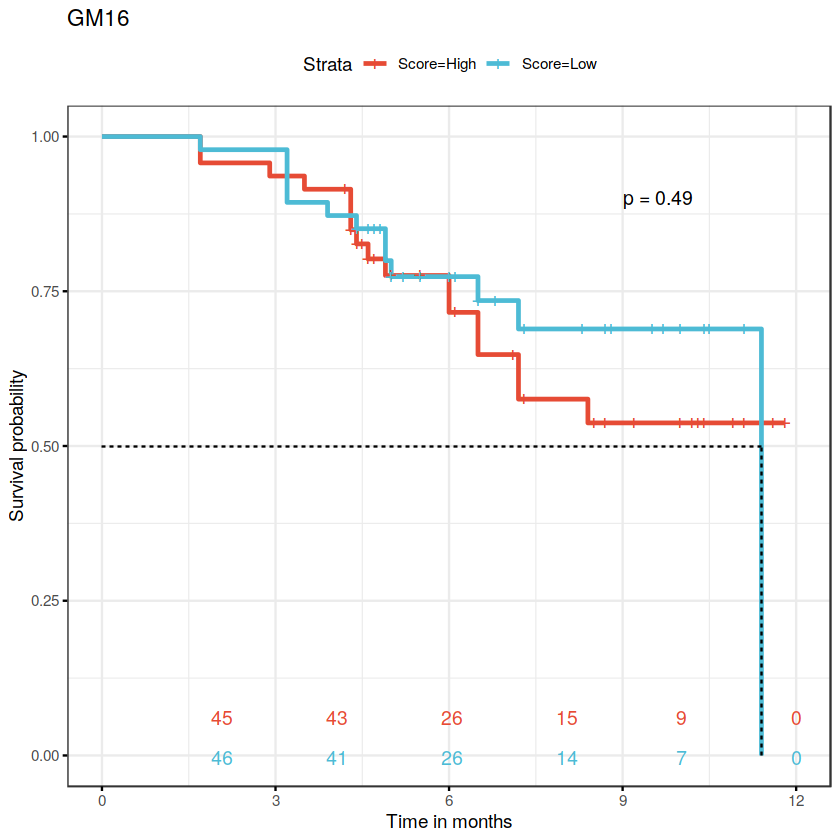

In [38]:
 p = ggsurvplot(
    fit,                     # survfit object with calculated statistics.
    data = fibroblast_ratio,             # data used to fit survival curves.
    risk.table = TRUE,       # show risk table.
    pval = TRUE,             # show p-value of log-rank test.
    #conf.int = TRUE,         # show confidence intervals for
    palette = "npg",
    xlab = "Time in months",   # customize X axis label.
    ggtheme = theme_bw(),
    #conf.int.style = "step",  # customize style of confidence intervals  "ribbon" 'step'
    surv.median.line = "hv",  # add the median survival pointer.
    # legend.labs = c("TP1", "TP2","TP3","TP4","TP5")    # change legend labels.
    tables.y.text = T,
    risk.table.pos = "in",
    risk.table.col = "strata",
    fontsize = 4,
    pval.size = 4,
    #surv.plot.height = 0.8,
    #tables.height = 0.2,
    pval.coord = c(9, 0.9),
    legend = "top",
    title = "GM16"
  )
p

# 计算每个病人异质性

In [4]:
library(SeuratDisk)
library(dplyr)

In [6]:
# Convert(paste0("/home/wyh/scdata/combined_data/Epithelial/adata_adeno_P.h5ad"), "h5seurat",assay = "RNA",overwrite = TRUE)

Warning message:
“Unknown file type: h5ad”
Creating h5Seurat file for version 3.1.5.9900

Adding X as data

Adding X as counts

Adding meta.features from var

Adding X_cnv as cell embeddings for cnv

Adding X_cnv_pca as cell embeddings for cnv_pca

Adding X_cnv_umap as cell embeddings for cnv_umap

Adding X_pca as cell embeddings for pca

Adding X_umap as cell embeddings for umap

Adding miscellaneous information for cnv

Adding miscellaneous information for pca

Adding standard deviations for pca

Adding miscellaneous information for umap

Adding XGC_colors to miscellaneous data

Adding cell_state_colors to miscellaneous data

Adding cnv_leiden_colors to miscellaneous data

Adding cnv_neighbors to miscellaneous data

Adding cnv_status_colors to miscellaneous data

Adding hvg to miscellaneous data

Adding leiden to miscellaneous data

Adding leiden_colors to miscellaneous data

Adding log1p to miscellaneous data

Adding metastasis.type_colors to miscellaneous data

Adding layer counts 

In [ ]:
seuratObject <- LoadH5Seurat("/home/wyh/scdata/combined_data/Epithelial/adata_adeno_P.h5seurat"),assays = "RNA",meta.data = FALSE, misc = FALSE)

In [ ]:
estimateDiversity <- function(sample, seurat_object){
    seurat_object <- subset(seurat_object, idents=sample)
    pca <- Embeddings(object = seurat_object[["pca"]])
    number <- min(30, dim(pca)[2])
    print(number)
    pca <- pca[, 1:number]
    print(dim(pca))
    pca_mean <- colMeans(pca)
    pca_sd <- sapply(as.data.frame(pca), function(x)sd(x))

    pca <- as.tibble(pca) %>% filter(
        PC_1 <= (pca_mean[1]+3*pca_sd[1]) & PC_1 >= (pca_mean[1]-3*pca_sd[1]), 
        PC_2 <= (pca_mean[2]+3*pca_sd[2]) & PC_2 >= (pca_mean[2]-3*pca_sd[2]), 
        PC_3 <= (pca_mean[3]+3*pca_sd[3]) & PC_3 >= (pca_mean[3]-3*pca_sd[3]), 
    )
    print(dim(pca))
    pca_mean <- colMeans(pca)
    diversity_score <- apply(pca, 1, function(x){
        sqrt(sum((x - pca_mean)**2))
    })
    diversity_score <- mean(diversity_score)
    return(diversity_score)
}

In [ ]:
estimateIQR <- function(sample, seurat_object){
    seurat_object <- subset(seurat_object, idents=sample)
    exp <- GetAssayData(seurat_object)
    col <- colnames(exp)
    cor_iqr <- cor(as.matrix(exp)) %>% as.tibble() %>% pivot_longer(col)
    cor_iqr <- IQR(as.numeric(cor_iqr$value))
    return(cor_iqr)
}

In [163]:
sample_score = read.csv("/home/wyh/scdata/combined_data/Epithelial/submit/figure_data/heatmap_GM_score.csv",row.names = 1)
sample_score = sample_score[,1:23]

In [164]:
head(sample_score)

score_GM1 score_GM2  score_GM3 score_GM4  score_GM5 score_GM6
GBC_035_P 0.4586925 0.02840488 0.2780742 0.03438038 0.7267642 0.1293505
GBC_043_P 0.3182066 0.02032881 0.3156719 0.06218493 0.5463800 0.1055279
GBC_064_P 0.5031656 0.06865425 0.4166301 0.03097786 0.4103061 0.1659757
GBC_071_P 0.2695804 0.06431136 0.3410233 0.06988886 0.3956535 0.1706530
GBC_082_P 0.2849555 0.03943362 0.4433895 0.08962813 0.1125226 0.1237556
GBC_009_P 0.3339466 0.05515302 0.2516520 0.09205186 0.4710810 0.1956098
          score_GM7 score_GM8  score_GM9  score_GM10 ⋯ score_GM14 score_GM15
GBC_035_P 0.2321376 0.08996219 0.09981393 0.01890455 ⋯ 0.09856125 0.06034987
GBC_043_P 0.2662599 0.31809487 0.12102445 0.06709888 ⋯ 0.11001130 0.10040963
GBC_064_P 0.1112382 0.73032513 0.11435648 0.05006593 ⋯ 0.09141954 1.00000000
GBC_071_P 0.1259309 0.61623754 0.11850162 0.06646982 ⋯ 0.06312833 0.09961307
GBC_082_P 0.2404007 0.71075341 0.11147916 0.03042192 ⋯ 0.06829810 0.10432344
GBC_009_P 0.2116509 0.19753259 0.14174943 0.03757614 ⋯ 0.08685188 0.07724677
          score_GM16 score_GM17 score_GM18 score_GM19 score_GM20 score_GM21
GBC_035_P 0.32241957 0.05059309 0.1681024  0.11121276 0.2237764  0.11416991
GBC_043_P 0.20065705 0.06447177 0.4230563  0.12965145 0.2025931  0.02358529
GBC_064_P 0.16894142 0.03675231 0.2727616  0.20654213 0.2624108  0.06917116
GBC_071_P 0.05663718 0.10044587 0.1722419  0.06317858 0.1821336  0.04144993
GBC_082_P 0.13227326 0.08174981 0.1294929  0.15757397 0.1218395  0.09246023
GBC_009_P 0.28958321 0.10556544 0.1989283  0.17920380 0.2038088  0.09740246
          score_GM22 score_GM23
GBC_035_P 0.03545301 0.11218794
GBC_043_P 0.06558911 0.10702875
GBC_064_P 0.09725947 0.12366556
GBC_071_P 0.07506250 0.19246169
GBC_082_P 0.10883879 0.19486861
GBC_009_P 0.07133085 0.09721158

In [343]:
diversity_score = read.csv("/home/wyh/scdata/combined_data/Epithelial/group_compare/adeno_p/diversity/diversity_score_PC30.csv",row.names = 1)

In [344]:
IQR_score = read.csv("/home/wyh/scdata/combined_data/Epithelial/group_compare/adeno_p/diversity/IQR_score_HVG.csv",row.names = 1)

In [345]:
sample_score['diversity'] = diversity_score[rownames(sample_score),]
sample_score['IQR'] = IQR_score[rownames(sample_score),]

In [346]:
aa = rlm(diversity~score_GM16, data=sample_score)

In [347]:
f.robftest(aa, var = "score_GM16")


	robust F-test (as if non-random weights)

data:  from rlm(formula = diversity ~ score_GM16, data = sample_score)
F = 2.8336, p-value = 0.09658
alternative hypothesis: true score_GM16 is not equal to 0


In [223]:
pdf("/home/wyh/scdata/combined_data/Epithelial/group_compare/adeno_p/diversity/diversity_20.pdf")
for(iGM in paste0("score_GM",c(1,3,5,6,7,8,16))){
    data_plot["score_GM"] = data_plot[iGM]
    a = ggplot(data_plot, aes(diversity, score_GM))+
        geom_point(size=1,shape=1)+
        geom_smooth(method = "lm")+stat_cor( method = "spearman")+ylab("IQR")+xlab(iGM)+ggtitle(iGM)
    print(a)
}
dev.off()

`geom_smooth()` using formula = 'y ~ x'
`geom_smooth()` using formula = 'y ~ x'
`geom_smooth()` using formula = 'y ~ x'
`geom_smooth()` using formula = 'y ~ x'
`geom_smooth()` using formula = 'y ~ x'
`geom_smooth()` using formula = 'y ~ x'
`geom_smooth()` using formula = 'y ~ x'


png 
  2

In [168]:
rownames(sample_score)[which(sample_score['diversity']==max(sample_score['diversity']))]

[1] "GBC_071_P"

In [351]:
sample_score = sample_score[rownames(sample_score)[which(sample_score['diversity']!=max(sample_score['diversity']))],]

In [352]:
dim(sample_score)

[1] 74 26

In [171]:
# ('GBC_002_P', 104),
#  ('GBC_076_P', 83),
#  ('GBC_079_P', 82),
#  ('GBC_057_P', 78),
#  ('GBC_085_P', 70),
#  ('GBC_058_P', 50),
#  ('GBC_068_P', 43),
#  ('GBC_048_P', 42),
#  ('GBC_074_P', 31),
#  ('GBC_049_P', 25),
#  ('GBC_050_P', 8)]

In [172]:
# sample_score = sample_score[!(rownames(sample_score) %in% c("GBC_050_P","GBC_049_P","GBC_074_P","GBC_048_P","GBC_068_P","GBC_058_P","GBC_085_P","GBC_057_P",'GBC_079_P','GBC_076_P')),]

In [173]:
# sample_score = sample_score[!(rownames(sample_score) %in% c("GBC_050_P","GBC_049_P","GBC_074_P","GBC_048_P","GBC_068_P","GBC_058_P")),]

In [174]:
itype = 'score_GM16'
sample_score[paste0("Score")] = ifelse(sample_score[itype] > median(sample_score[,itype]),'High','Low')

In [231]:
cor.test(sample_score[,'diversity'],sample_score[,'score_GM16'],method = "spearman",alternative = "greater")


	Spearman's rank correlation rho

data:  sample_score[, "diversity"] and sample_score[, "score_GM16"]
S = 59728, p-value = 0.09869
alternative hypothesis: true rho is greater than 0
sample estimates:
      rho 
0.1503841 


In [228]:
library("sfsmisc")


Attaching package: ‘sfsmisc’


The following object is masked from ‘package:data.table’:

    last


The following object is masked from ‘package:dplyr’:

    last




In [354]:
pdf("./submit/figure/GM16_diversity.pdf",height = 4,width = 4)
ggplot(sample_score, aes(score_GM16, diversity))+
        geom_point(size=1,shape=1)+
        geom_smooth(method = "rlm")+stat_cor( method = "spearman")+ylab("diversity")+xlab("score_GM16")+ggtitle(iGM)+theme_classic()
dev.off()

`geom_smooth()` using formula = 'y ~ x'


png 
  2

In [148]:
rownames(fibroblast_ratio) = fibroblast_ratio$NewSample.ID

In [89]:
fibroblast_ratio$diversity_score = diversity_score[fibroblast_ratio$NewSample.ID,]
fibroblast_ratio$IQR_score = IQR_score[fibroblast_ratio$NewSample.ID,]

In [98]:
itype = "IQR_score"
fibroblast_ratio[paste0("Score")] = ifelse(fibroblast_ratio[itype] > median(fibroblast_ratio[,itype]),'High','Low')

In [99]:
fit<-survfit(Surv(OS_month, event01)~Score, data=fibroblast_ratio)
 

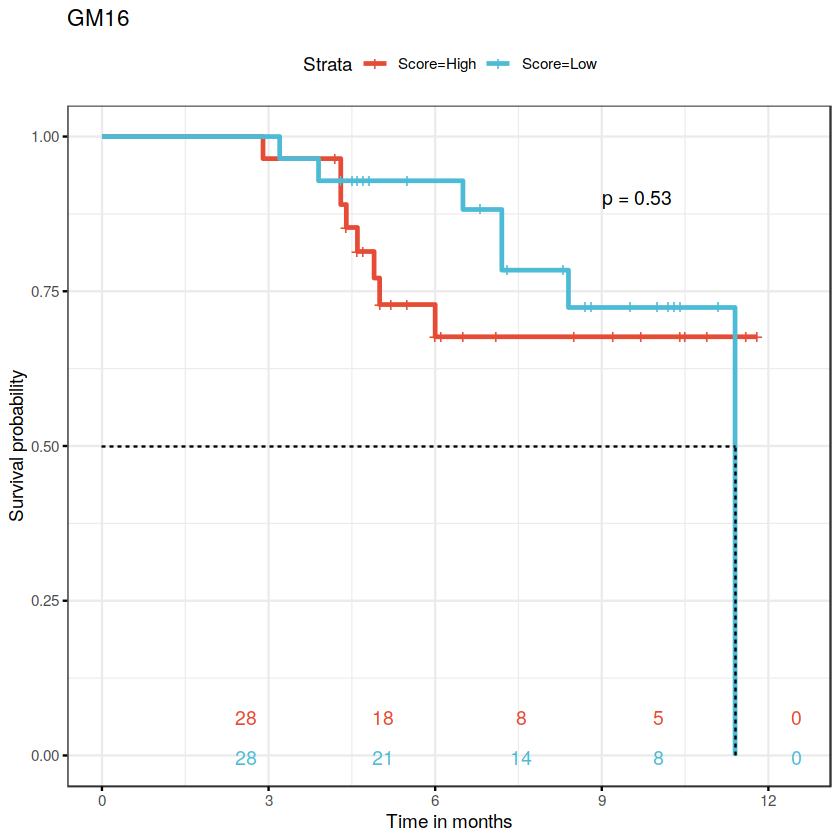

In [100]:
 p = ggsurvplot(
    fit,                     # survfit object with calculated statistics.
    data = fibroblast_ratio,             # data used to fit survival curves.
    risk.table = TRUE,       # show risk table.
    pval = TRUE,             # show p-value of log-rank test.
    #conf.int = TRUE,         # show confidence intervals for
    palette = "npg",
    xlab = "Time in months",   # customize X axis label.
    ggtheme = theme_bw(),
    #conf.int.style = "step",  # customize style of confidence intervals  "ribbon" 'step'
    surv.median.line = "hv",  # add the median survival pointer.
    # legend.labs = c("TP1", "TP2","TP3","TP4","TP5")    # change legend labels.
    tables.y.text = T,
    risk.table.pos = "in",
    risk.table.col = "strata",
    fontsize = 4,
    pval.size = 4,
    #surv.plot.height = 0.8,
    #tables.height = 0.2,
    pval.coord = c(9, 0.9),
    legend = "top",
    title = "GM16"
  )
p

In [178]:
data_plot = sample_score[,c('diversity','IQR',paste0("score_GM",c(1,3,5,6,7,8,16)))]
dim(data_plot)

[1] 75  9

In [179]:
getwd()

[1] "/home/wyh/scdata/combined_data/Epithelial"

In [19]:
pdf("/home/wyh/scdata/combined_data/Epithelial/group_compare/adeno_p/diversity/IQR_HVG.pdf")
for(iGM in paste0("score_GM",c(1,3,5,6,7,8,16))){
    data_plot["score_GM"] = data_plot[iGM]
    a = ggplot(data_plot, aes(IQR, score_GM))+
        geom_point(size=1,shape=1)+
        geom_smooth(method = "lm")+stat_cor( method = "spearman")+ylab("IQR")+xlab(iGM)+ggtitle(iGM)
    print(a)
}
dev.off()

`geom_smooth()` using formula = 'y ~ x'
`geom_smooth()` using formula = 'y ~ x'
`geom_smooth()` using formula = 'y ~ x'
`geom_smooth()` using formula = 'y ~ x'
`geom_smooth()` using formula = 'y ~ x'
`geom_smooth()` using formula = 'y ~ x'
`geom_smooth()` using formula = 'y ~ x'


png 
  2

In [182]:
data_plot$type = patient_info[rownames(data_plot),"metastasis.type"]


In [183]:
data_plot$type = as.character(data_plot$type)

In [186]:
data_plot$type[data_plot$type=="P_LI"] = "P"
data_plot$type[data_plot$type %in% c("P_LM","P_LN")] = "P_Mets"

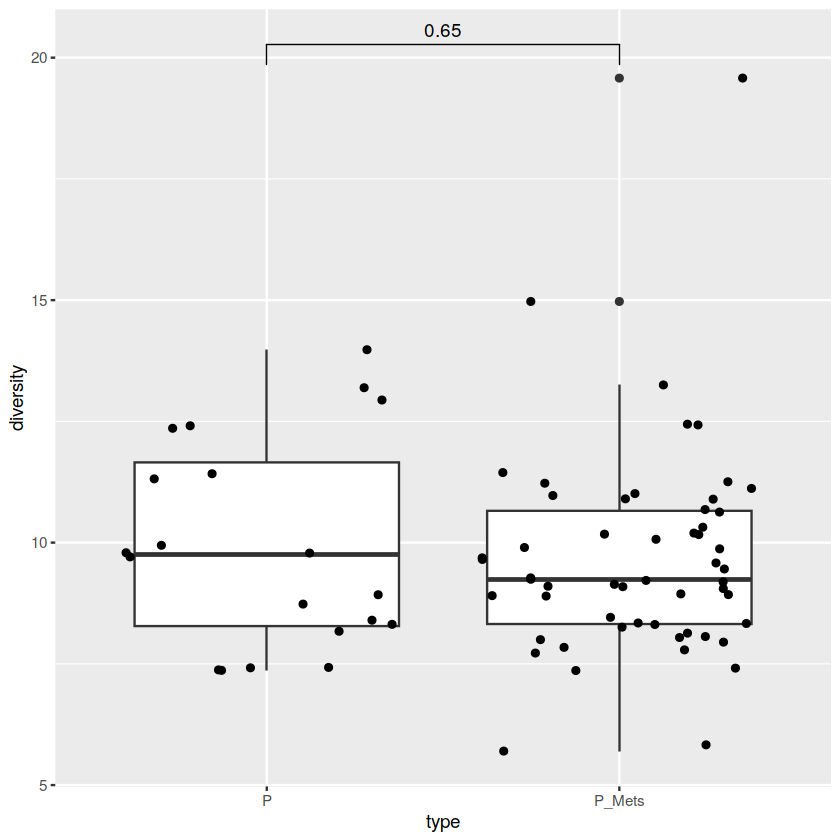

In [189]:
ggplot(data_plot, aes( y=diversity, x=type)) + geom_boxplot()+geom_jitter()+
  stat_compare_means(comparisons = list(
  c("P","P_Mets")),method = "wilcox.test",method.args = list(alternative = "less"))


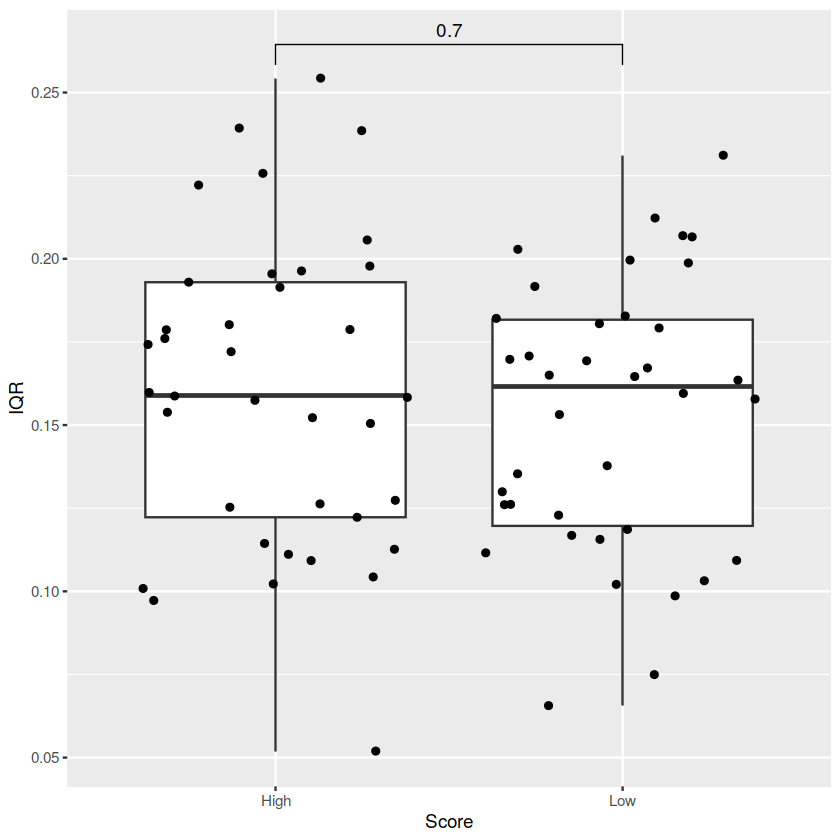

In [190]:
ggplot(sample_score, aes( y=IQR, x=Score)) + geom_boxplot()+geom_jitter()+
  stat_compare_means(comparisons = list(
  c("High","Low")),method = "wilcox.test")


In [192]:
data_plot$type = ifelse(data_plot[,"score_GM16"] > median(data_plot[,"score_GM16"]),'High','Low')

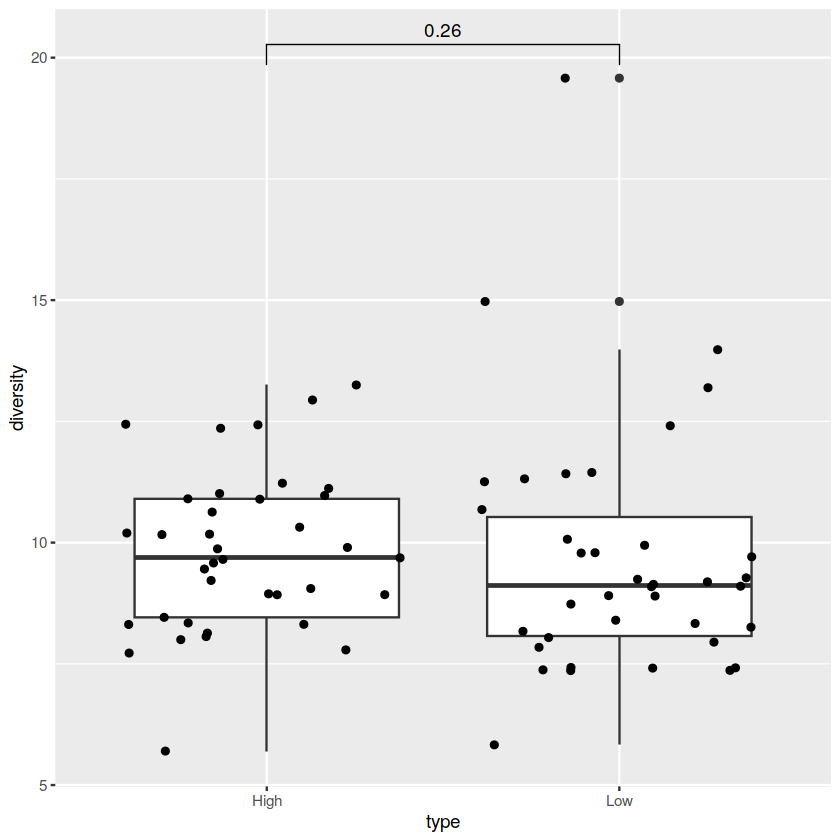

In [196]:
ggplot(data_plot, aes( y= diversity, x=type)) + geom_boxplot()+geom_jitter()+
  stat_compare_means(comparisons = list(
  c("High","Low")),method = "wilcox.test")
